# Schedule TPC-DS 1 Descriptor

This notebook contains work pertatining to pattern learning / identification for a database workload schedule. It contains descriptors of the available data through plot visualizations, so as to better understand which resource play a part into reflecting underlying workloads.

## Data Preprocessing

### Module Installation and Importing Libraries

In [7]:
# Module Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Configuration Cell

Tweak parametric changes from this cell to influence outcome of experiment. 
NB: This experiment demonstrates at time  step = 1 (1 minute in advance). Further down in experiment, other timestep results are also featured and evaluated.

In [8]:
tpcds='TPCDS1'
nrows=None

### Read data from file into Pandas Dataframes

In [9]:
# Root path
#root_dir = 'C:/Users/gabriel.sammut/University/Data_ICS5200/Schedule/' + tpcds
root_dir = 'D:/Projects/Datagenerated_ICS5200/Schedule/' + tpcds

# Open Data
rep_hist_sysmetric_summary_path = root_dir + '/rep_hist_sysmetric_summary.csv'

rep_hist_sysmetric_summary_df = pd.read_csv(rep_hist_sysmetric_summary_path,nrows=nrows)

def prettify_header(headers):
    """
    Cleans header list from unwated character strings
    """
    header_list = []
    [header_list.append(header.replace("(","").replace(")","").replace("'","").replace(",","")) for header in headers]
    return header_list

rep_hist_sysmetric_summary_headers = prettify_header(rep_hist_sysmetric_summary_df.columns.values)

# Replace original headers with a prettified version of the same column list
rep_hist_sysmetric_summary_df = pd.read_csv(rep_hist_sysmetric_summary_path, names=rep_hist_sysmetric_summary_headers)

rep_hist_sysmetric_summary_df.drop(rep_hist_sysmetric_summary_df.index[0],inplace=True)

print(rep_hist_sysmetric_summary_df.head())

  SNAP_ID        DBID INSTANCE_NUMBER           BEGIN_TIME  \
1   43414  2634225673               1  2018-11-16 17:33:06   
2   43414  2634225673               1  2018-11-16 17:33:06   
3   43414  2634225673               1  2018-11-16 17:33:06   
4   43414  2634225673               1  2018-11-16 17:33:06   
5   43414  2634225673               1  2018-11-16 17:33:06   

              END_TIME INTSIZE GROUP_ID METRIC_ID                METRIC_NAME  \
1  2018-11-16 17:34:06    6003        2      2000     Buffer Cache Hit Ratio   
2  2018-11-16 17:34:06    6003        2      2001         Memory Sorts Ratio   
3  2018-11-16 17:34:06    6003        2      2002  Redo Allocation Hit Ratio   
4  2018-11-16 17:34:06    6003        2      2003   User Transaction Per Sec   
5  2018-11-16 17:34:06    6003        2      2004     Physical Reads Per Sec   

                      METRIC_UNIT      ...         CON_DBID CON_ID  \
1   % (LogRead - PhyRead)/LogRead      ...       2634225673      0   
2  % M

# Dataset Description

All data sources are retrieved from Oracle defined tables/views. These sources have been specifically chosen because they accurately portray a database system under load, across a period of time. Such data sources were polled at regular intervals (60 seconds), and recorded into intermediatery tables for future data mining potential. Each statistic set corresponds to a 'SNAP_ID', which quantifies a particular resource usage at a point in time. 'SNAP_ID' delta equates to 60 seconds. In addition, relavent SQL access plans taken during the workloads execution were also captured.

Statistical calculations:
* Column Names
* Dataframe Row Counts
* Mean (were applicable)
* Standard Dev (were applicable)
* Quartile Percentile
* Min / Max

In [10]:
print('-----------------------------------------------------------')
print('Dataframe Row Count: REP_HIST_SYSMETRIC_SUMMARY - ' + str(len(rep_hist_sysmetric_summary_df)))
print('-----------------------------------------------------------\n')

print('\n\nREP_HIST_SYSMETRIC_SUMMARY:')
print(rep_hist_sysmetric_summary_df.describe())

-----------------------------------------------------------
Dataframe Row Count: REP_HIST_SYSMETRIC_SUMMARY - 3192770
-----------------------------------------------------------



REP_HIST_SYSMETRIC_SUMMARY:
        SNAP_ID        DBID  INSTANCE_NUMBER           BEGIN_TIME  \
count   3192770     3192770          3192770              3192770   
unique    19832           2                2                19831   
top       43444  2634225673                1  2018-11-26 20:16:07   
freq        161     3160003          3160003                  161   

                   END_TIME  INTSIZE  GROUP_ID  METRIC_ID  \
count               3192770  3192770   3192770    3192770   
unique                19831       30         2        322   
top     2018-11-26 20:16:07     6003         2       2121   
freq                    161  2089031   3160003      19628   

                           METRIC_NAME        METRIC_UNIT      ...       \
count                          3192770            3192770      .

# Dataset Extraction

The above datasets were extracted from the following user defined tables:
* REP_HIST_SYSMETRIC_SUMMARY

Each table corresponds to an Oracle defined table, whose sole function is to offload data from Oracle defined tables (which tend to have a retention period) into a user defined table. Table REP_HIST_SNAPSHOT, REP_HIST_SYSMETRIC_SUMMARY and REP_HIST_SYSSTAT can be joined through the 'SNAP_ID' column. Table REP_VSQL_PLAN can be joined to REP_HIST_SNAPSHOT through the 'SQL_ID' column.

For table REP_HIST_SYSMETRIC_SUMMARY, the Oracle history table DBA_HIST_SNAPSHOT (https://docs.oracle.com/cd/B19306_01/server.102/b14237/statviews_3177.htm#REFRN23442) was joined with DBA_HIST_SYSMETRIC_SUMMARY (https://docs.oracle.com/cd/E18283_01/server.112/e17110/statviews_4059.htm). This combination contains a history summary of past incurred metrics on the database instance, as well as the amount recorded per metric at a particular established snapshots. The specific query used can be found further below.

``` sql
/*REP_HIST_SYSMETRIC_SUMMARY*/
select dhss.*,
       dhsnap.startup_time,
       dhsnap.flush_elapsed,
       dhsnap.snap_level,
       dhsnap.error_count,
       dhsnap.snap_flag,
       dhsnap.snap_timezone
from DBA_HIST_SYSMETRIC_SUMMARY dhss,
     dba_hist_snapshot dhsnap
where dhss.snap_id = dhsnap.snap_id
and dhss.dbid = dhsnap.dbid
and dhss.instance_number = dhsnap.instance_number
and dhsnap.snap_id between '544' and '545';
```

# Data Visualization

The following section visualizes each dataset through a number of pictorial graphs, so as to better visualize the underlying load distribution.

## Table REP_HIST_SYSMETRIC_SUMMARY 

Plotting database snapshot resources over time

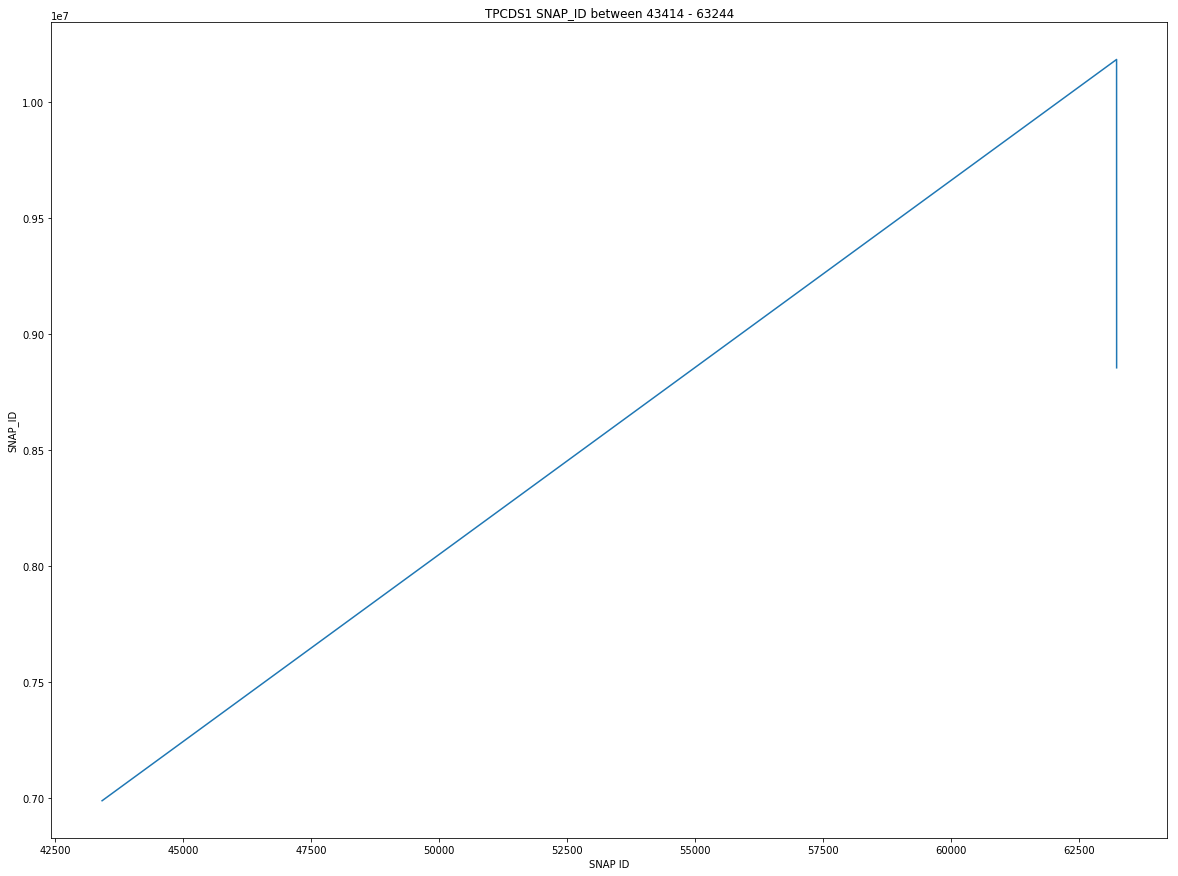

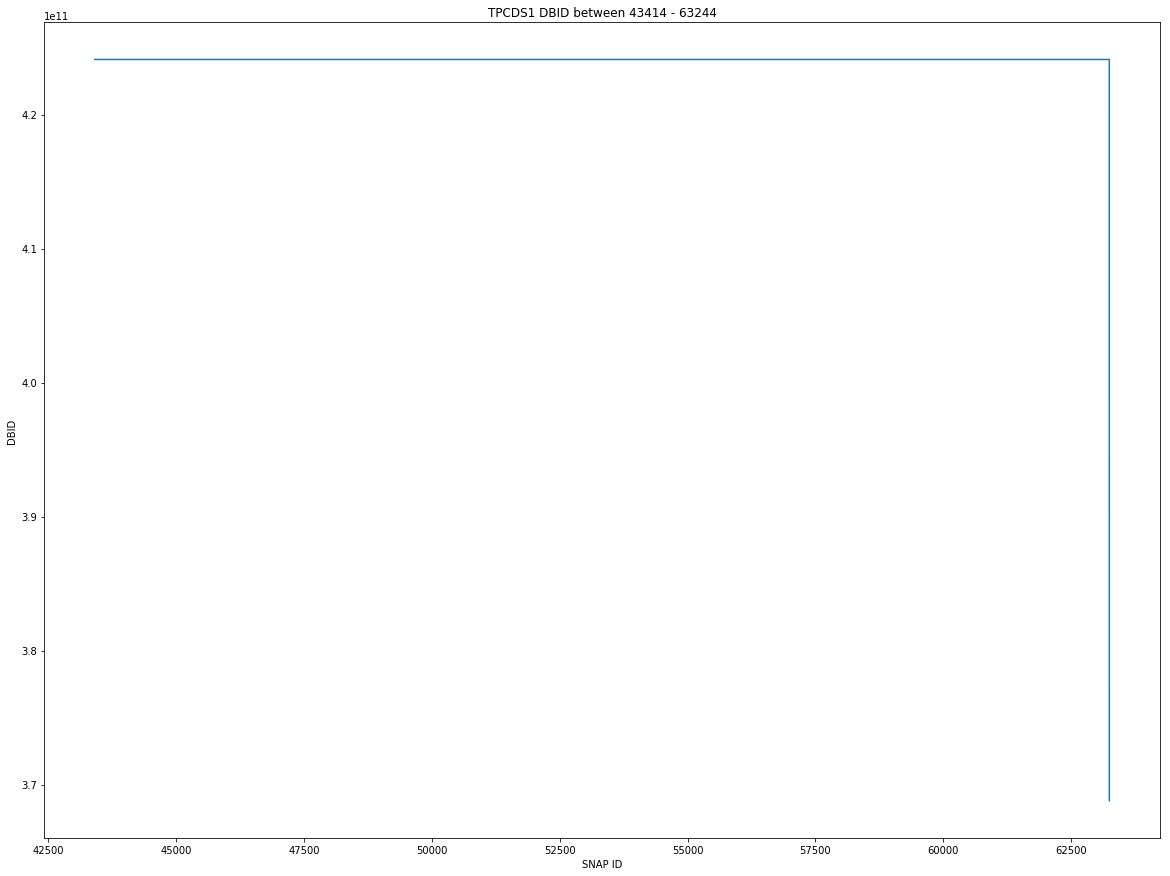

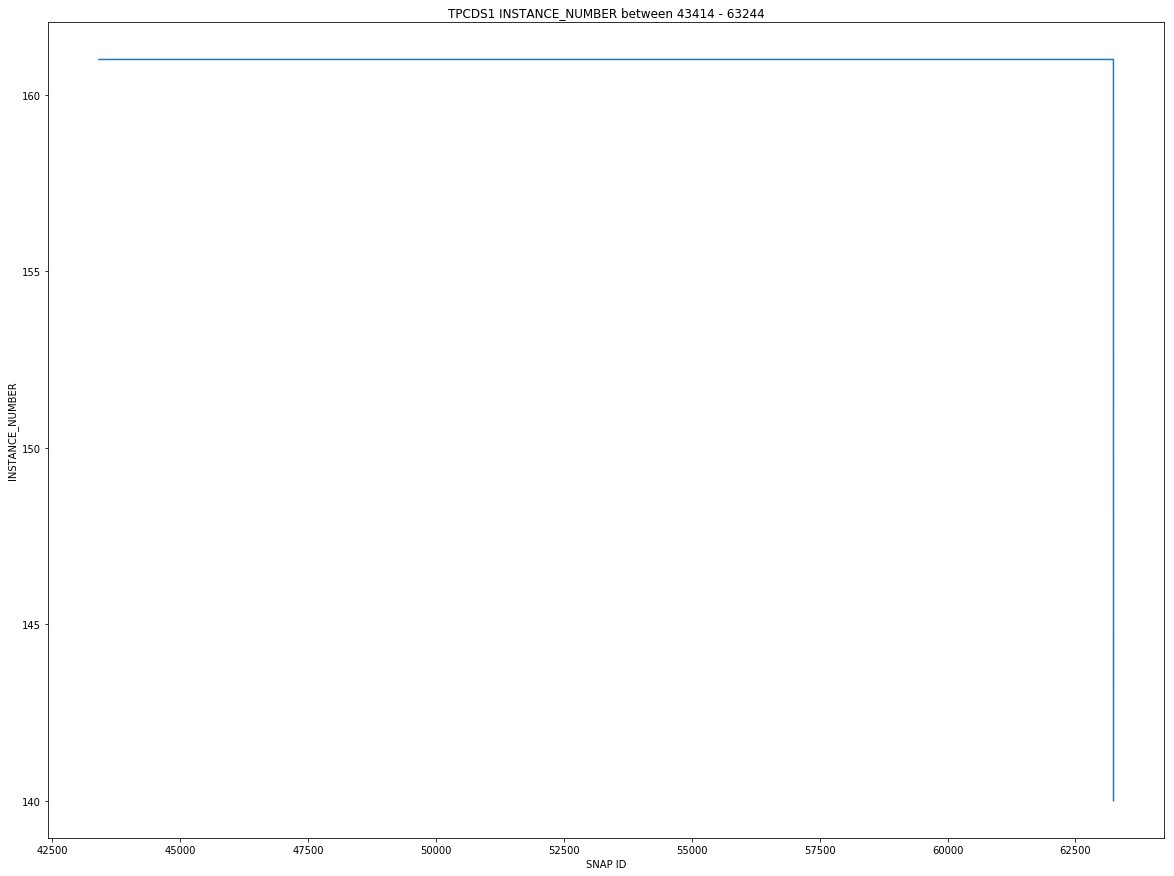

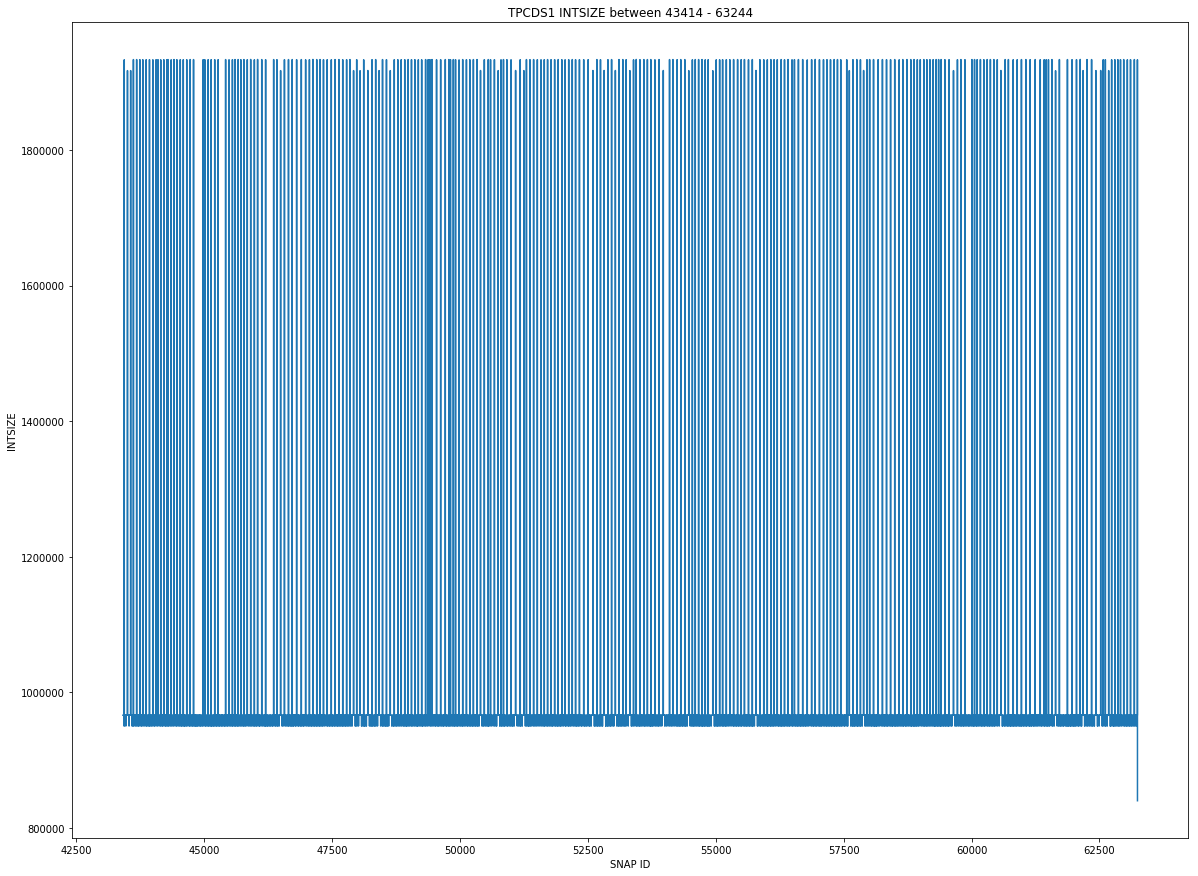

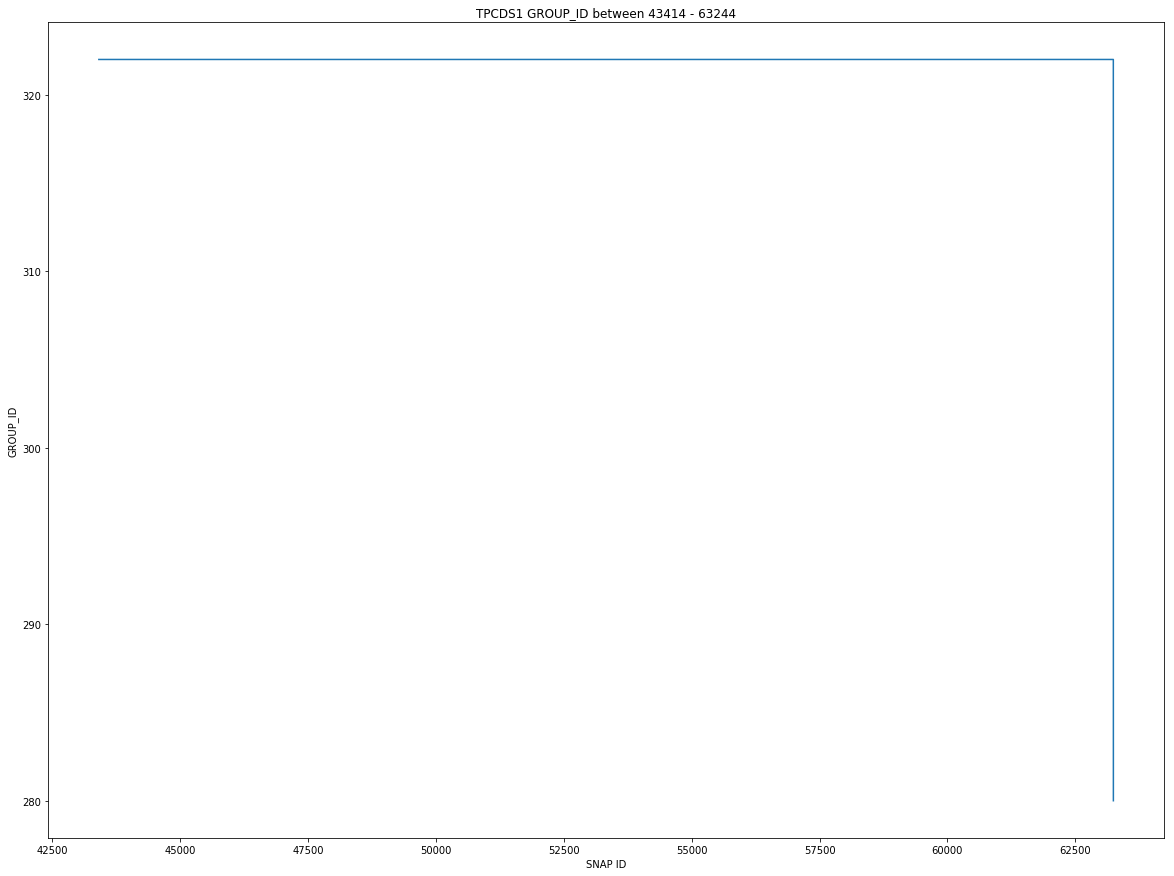

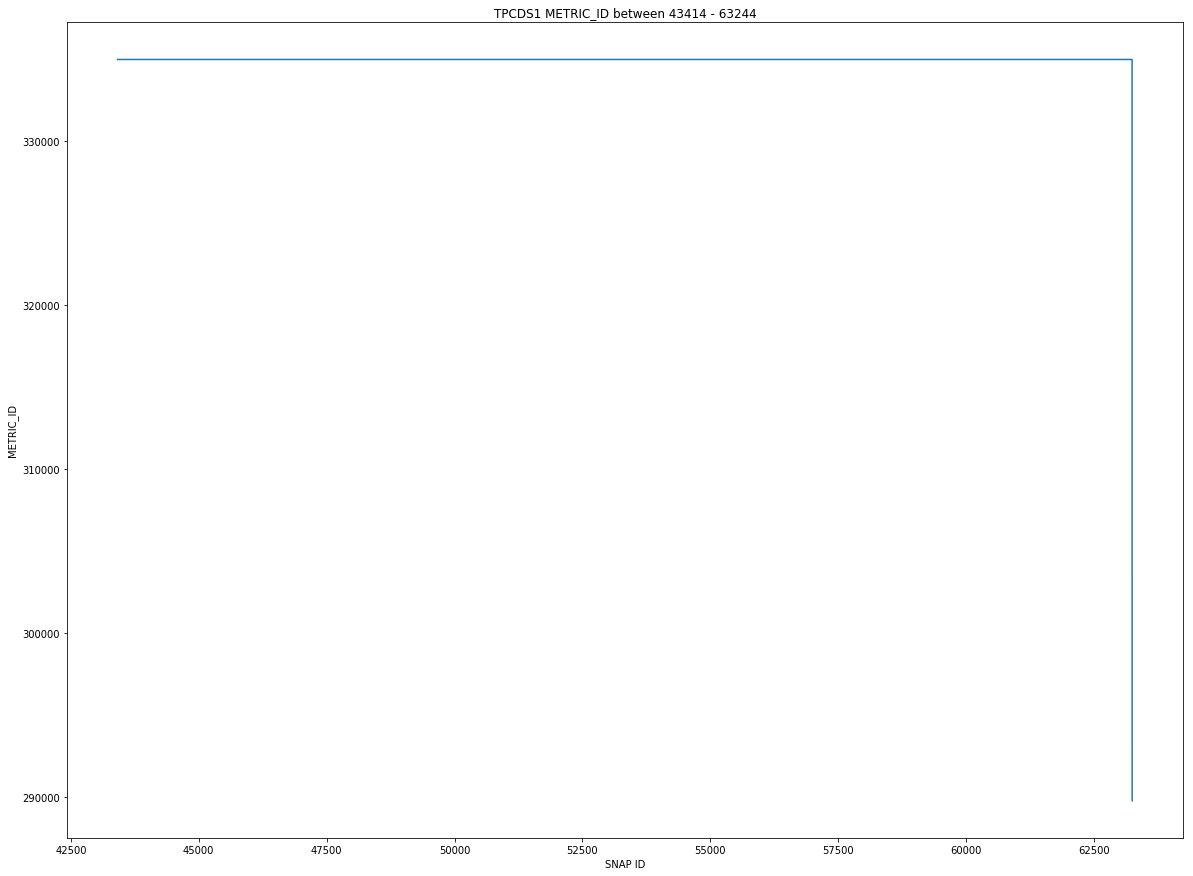

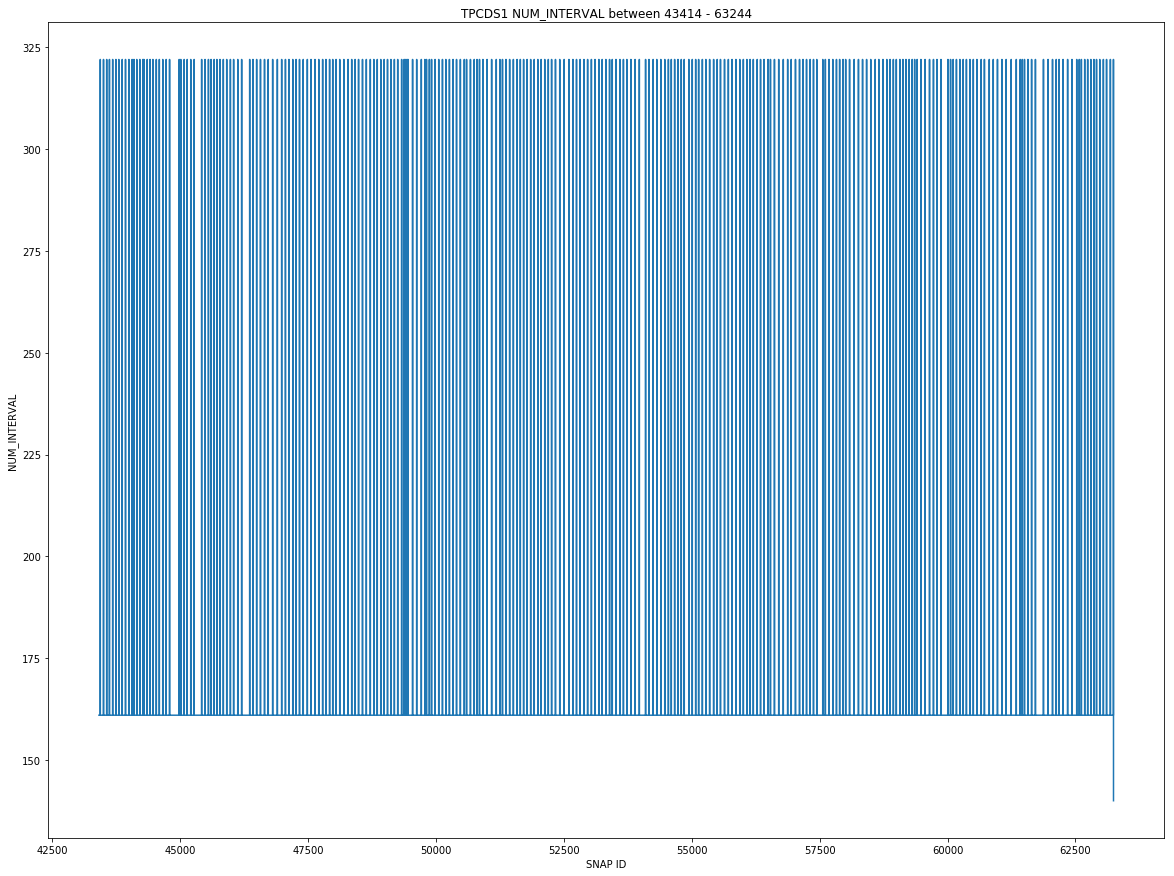

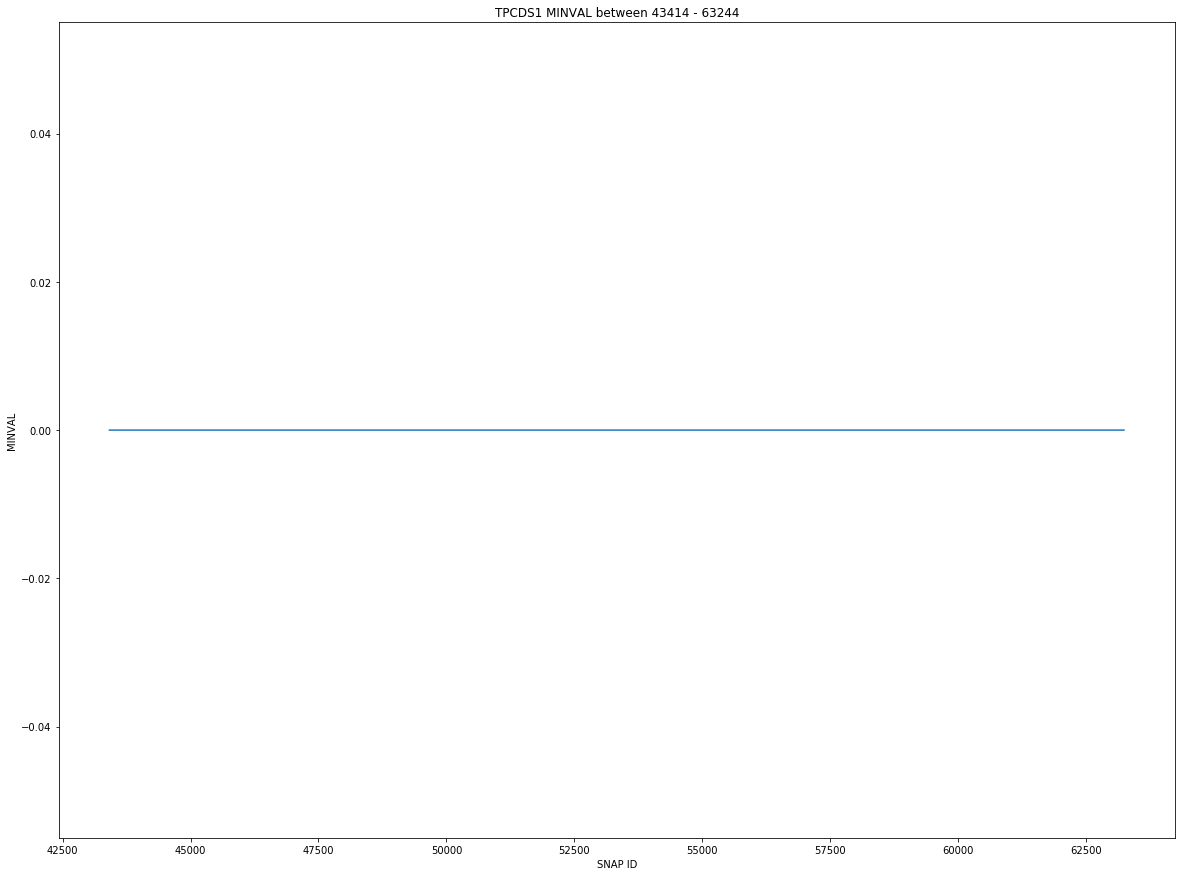

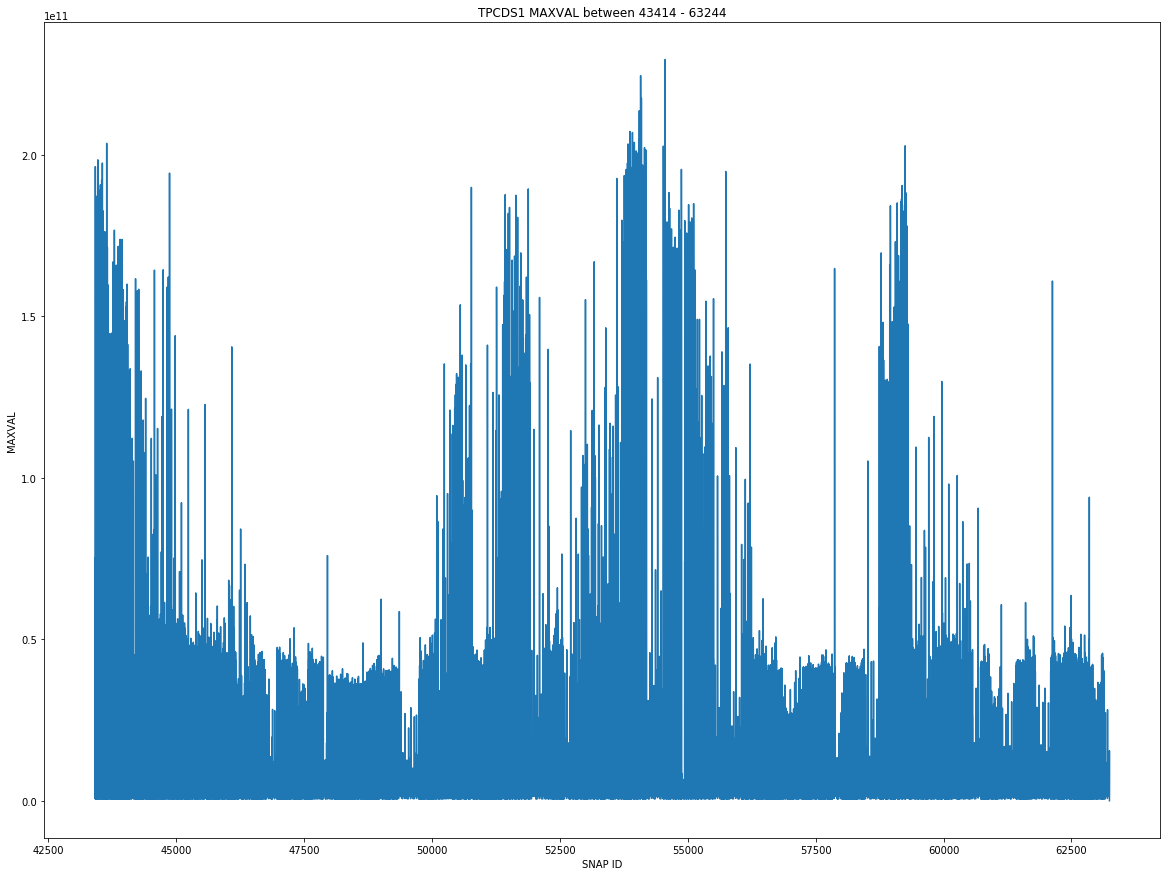

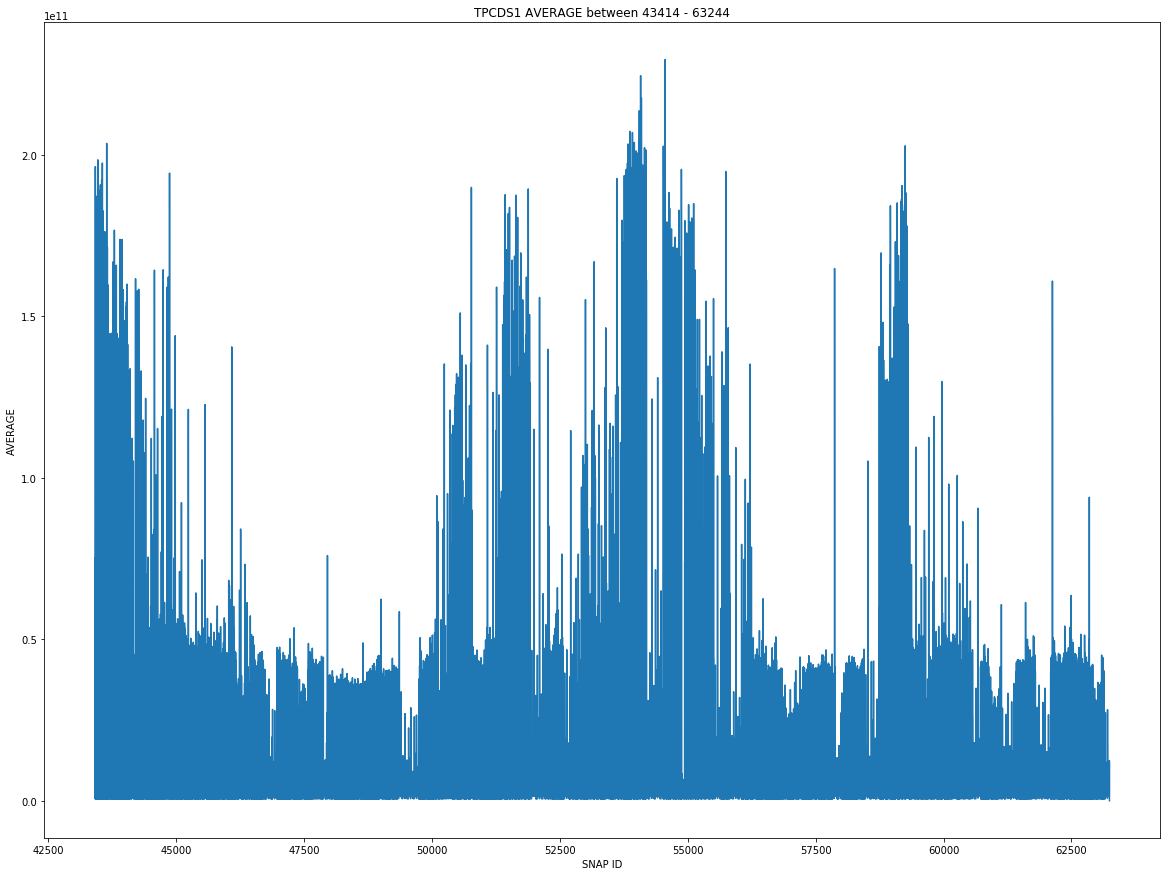

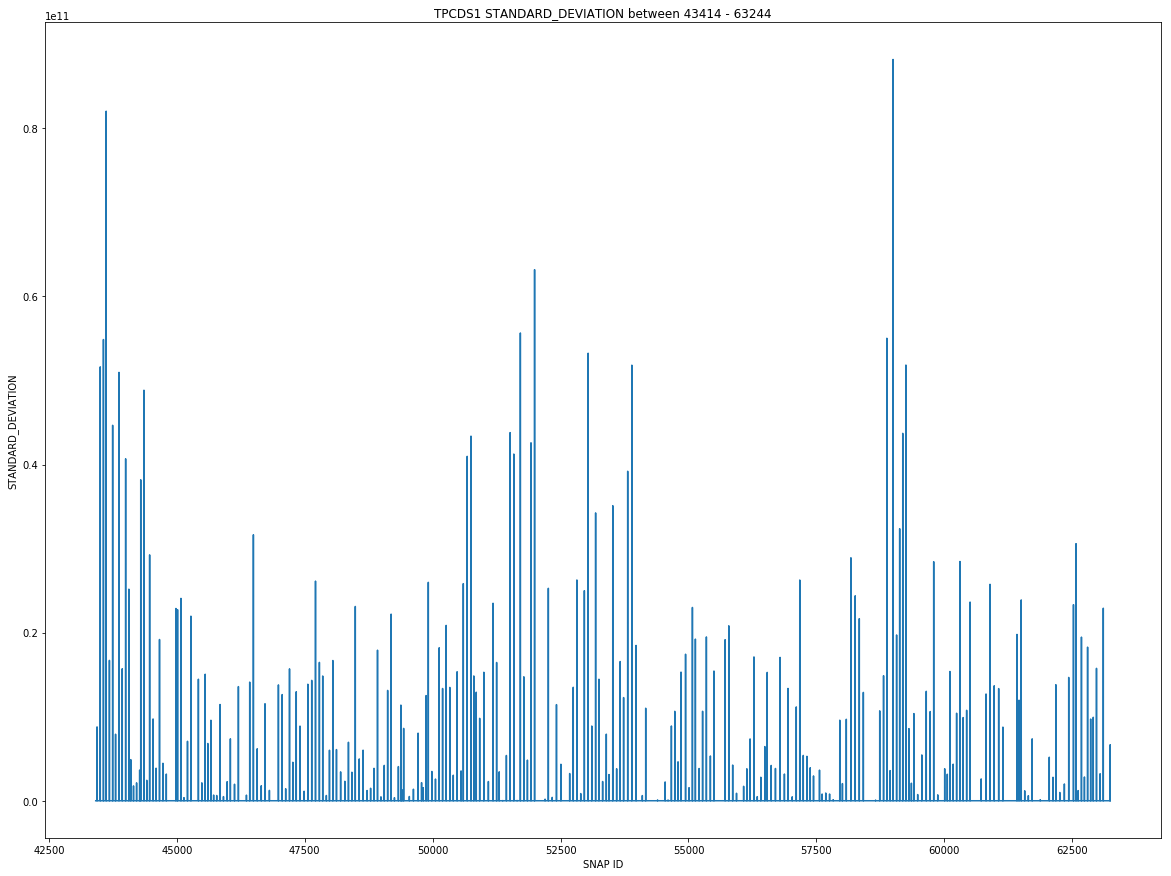

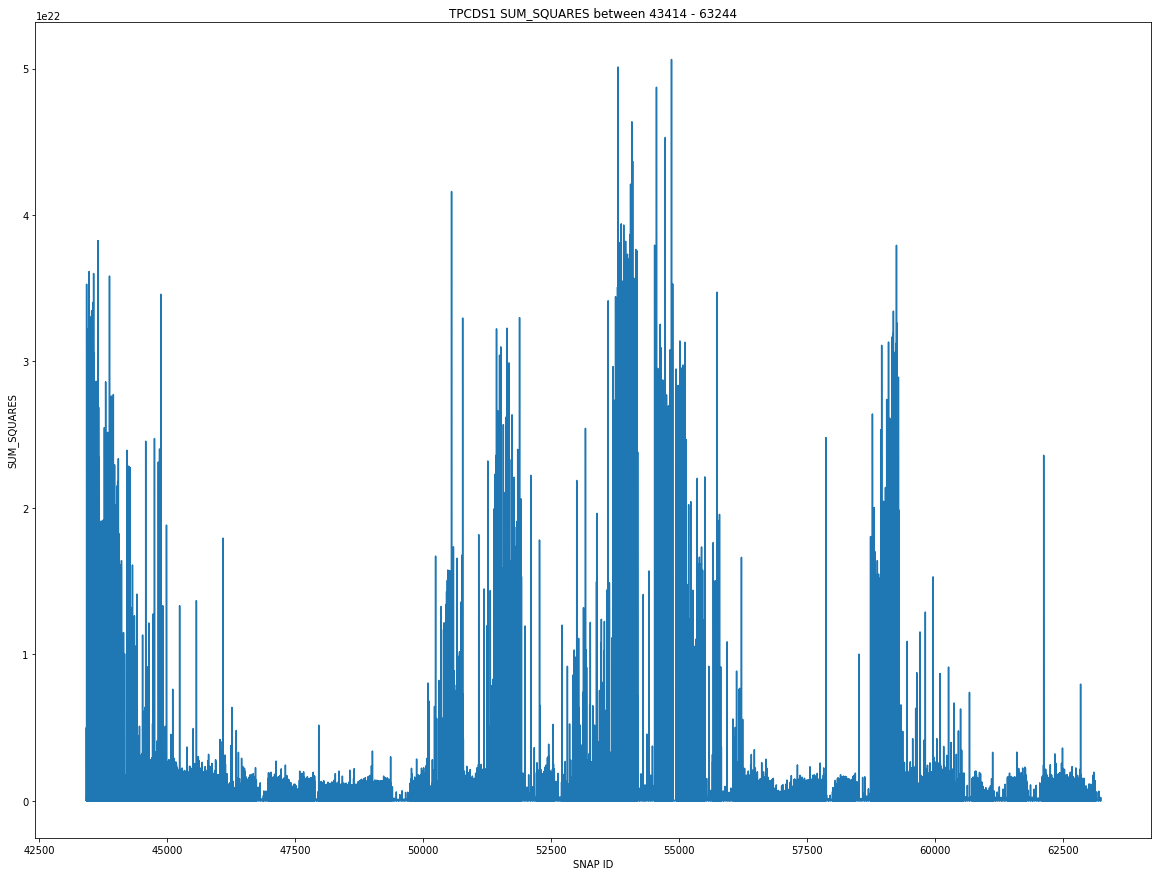

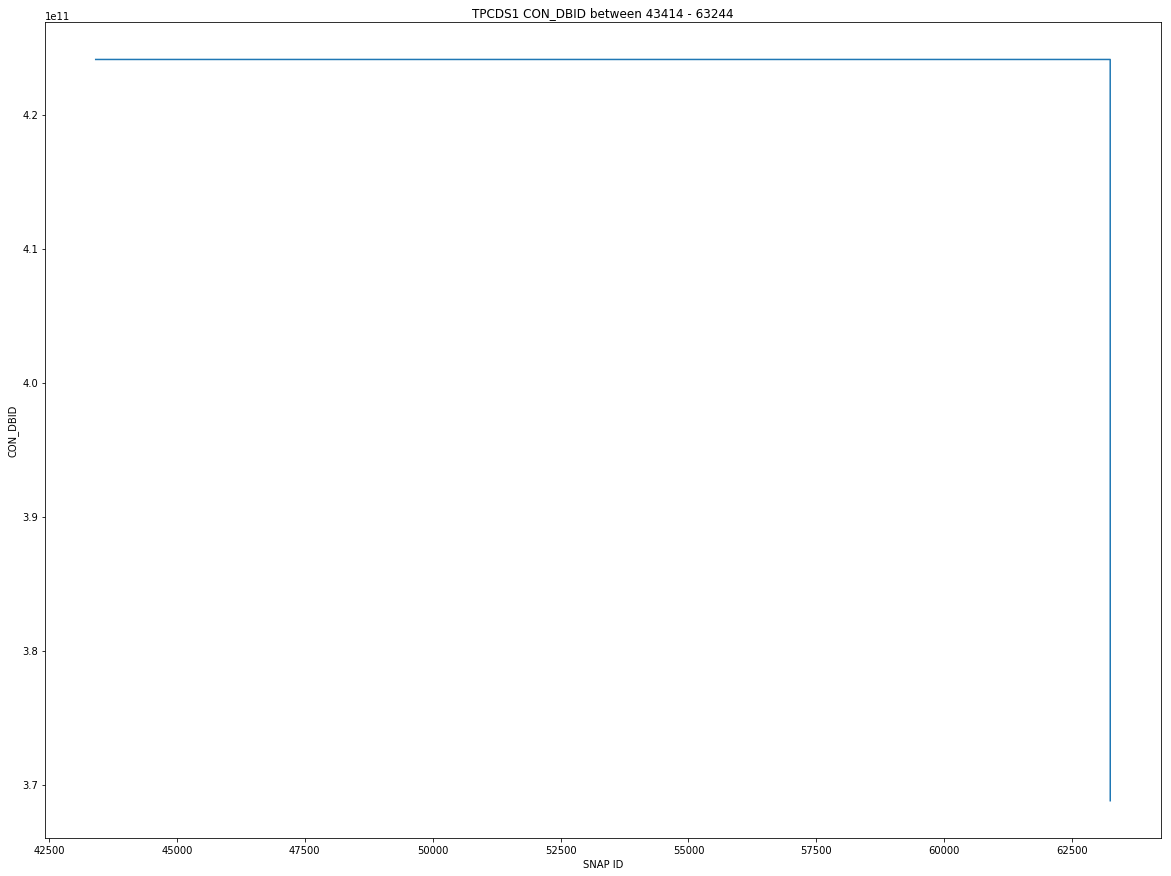

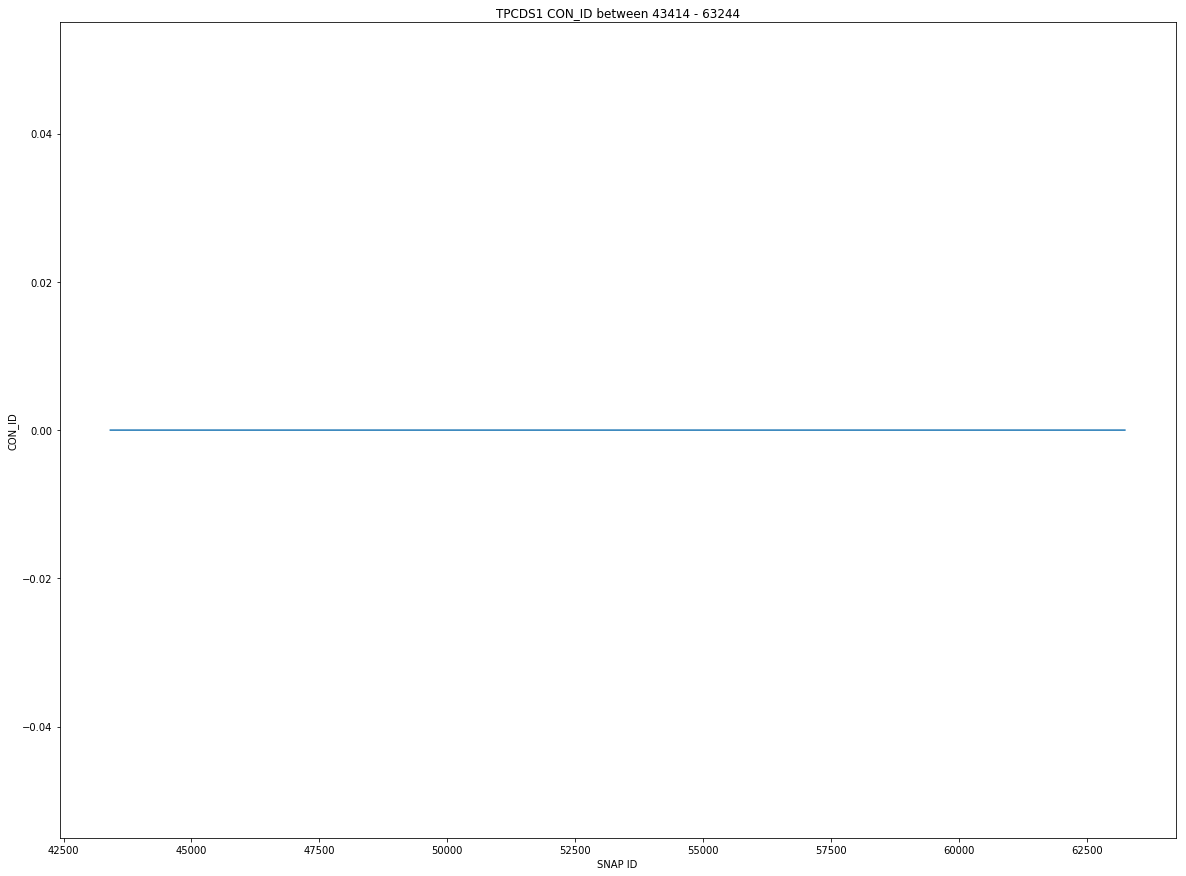

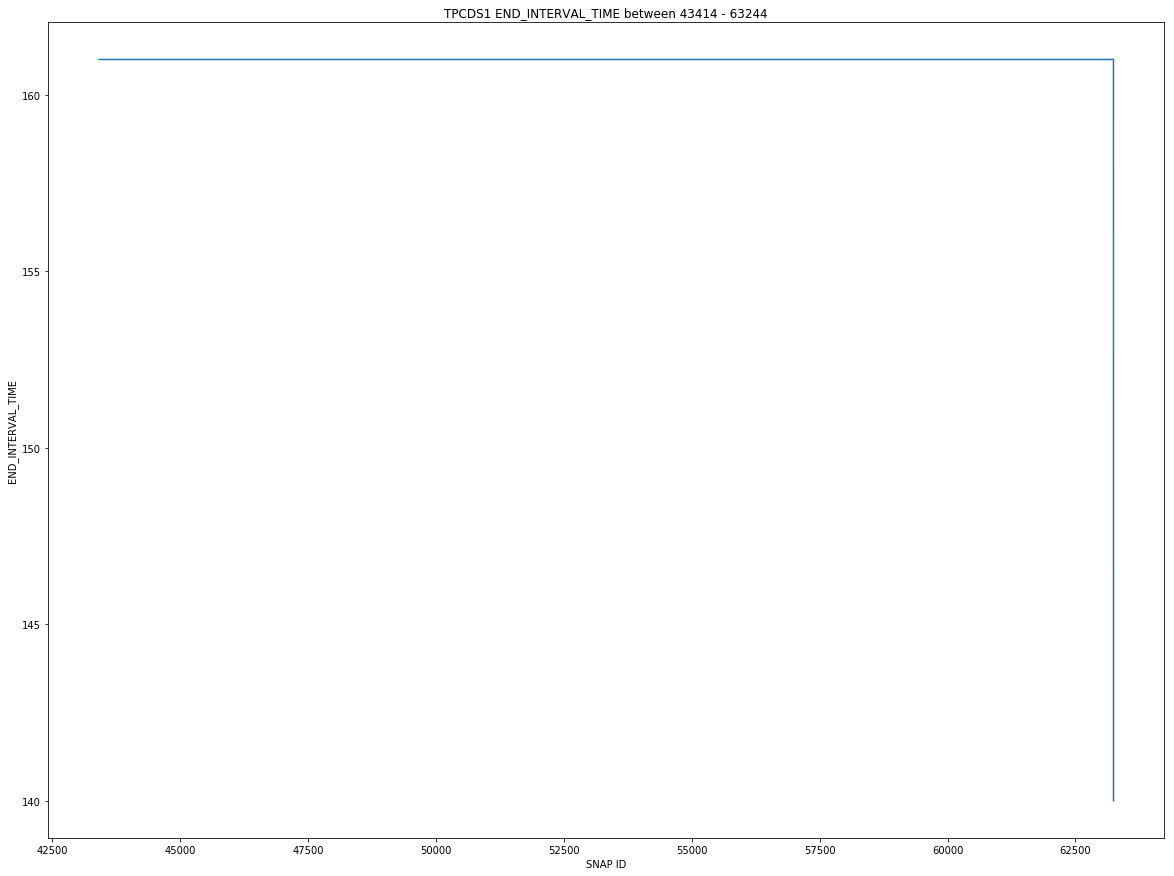

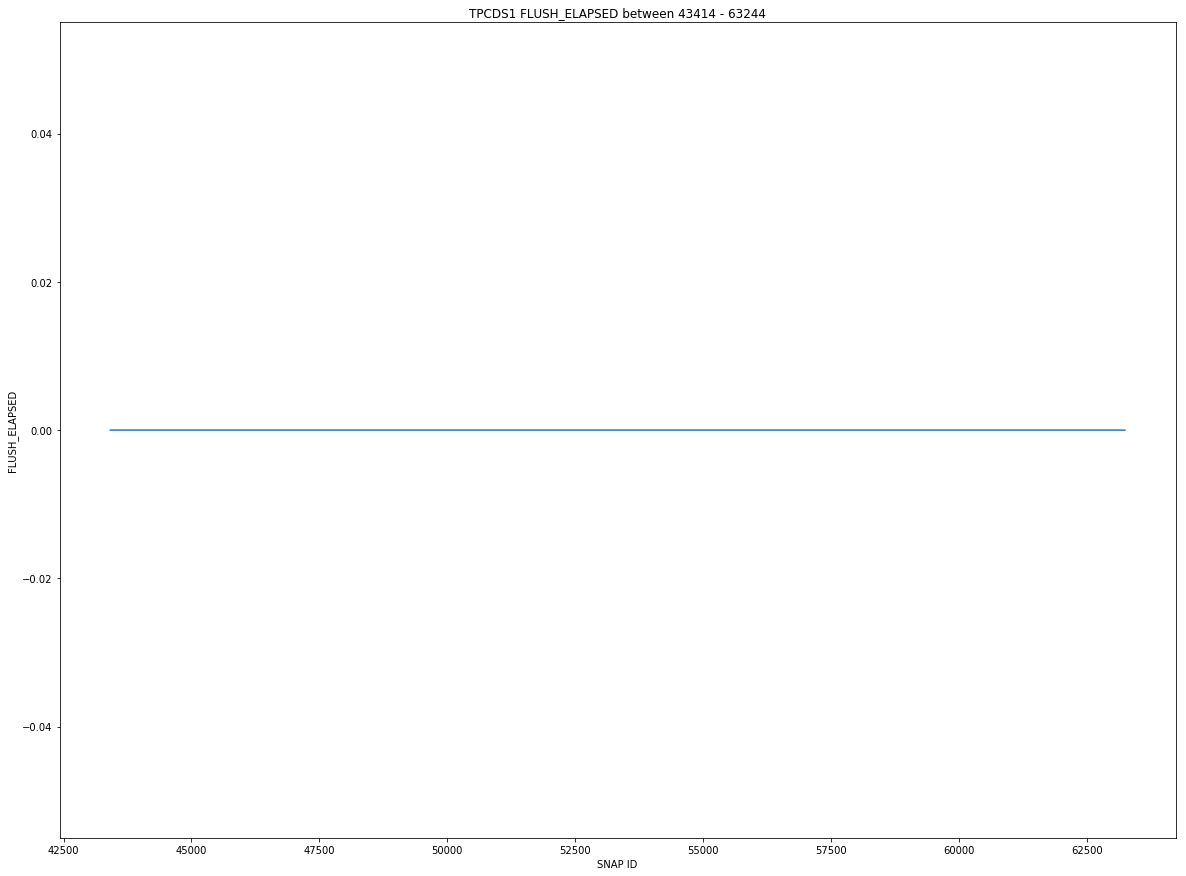

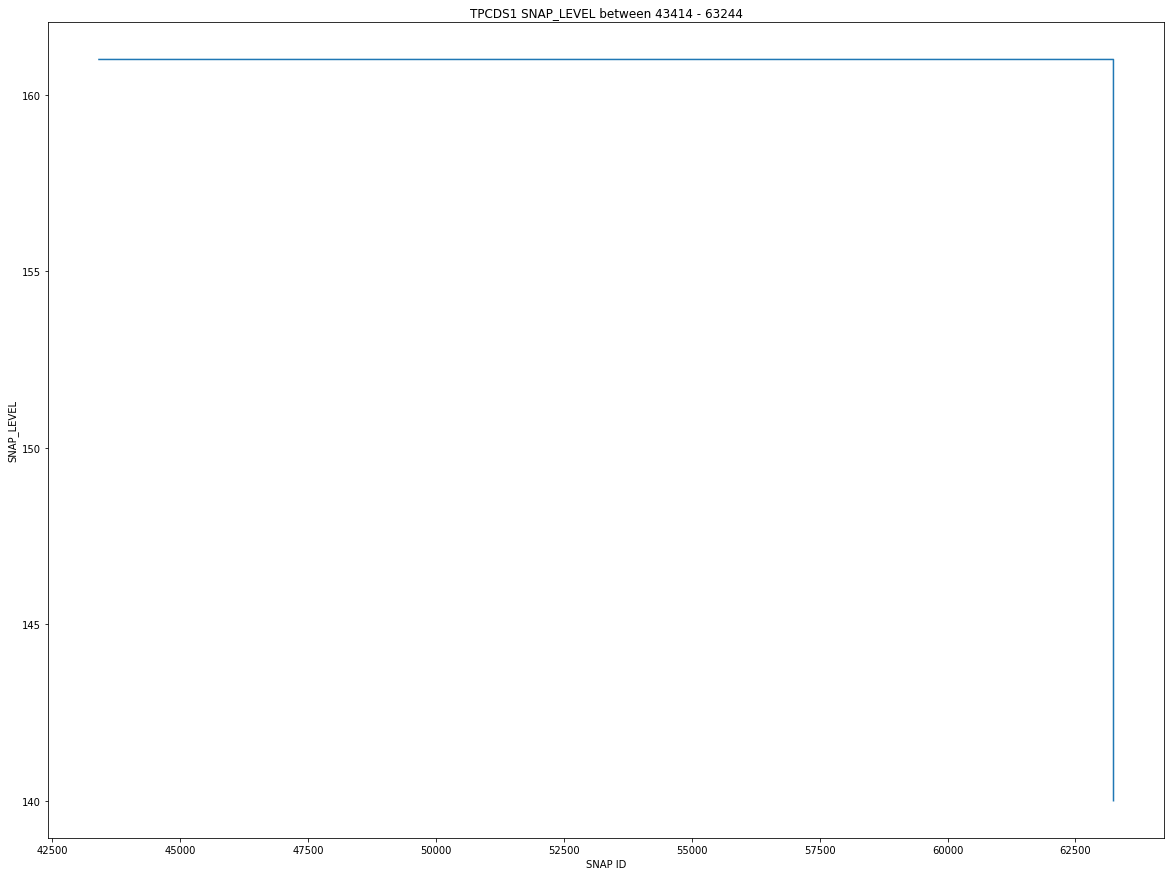

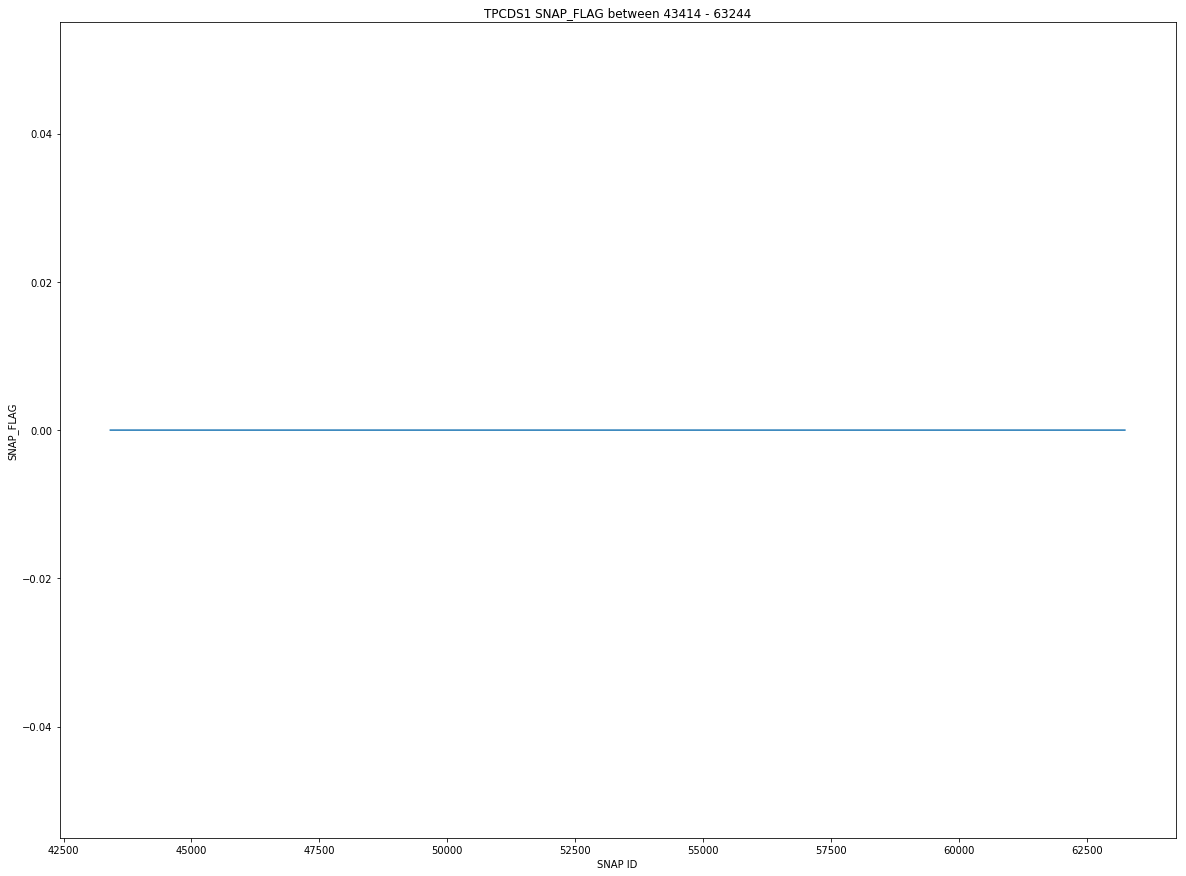

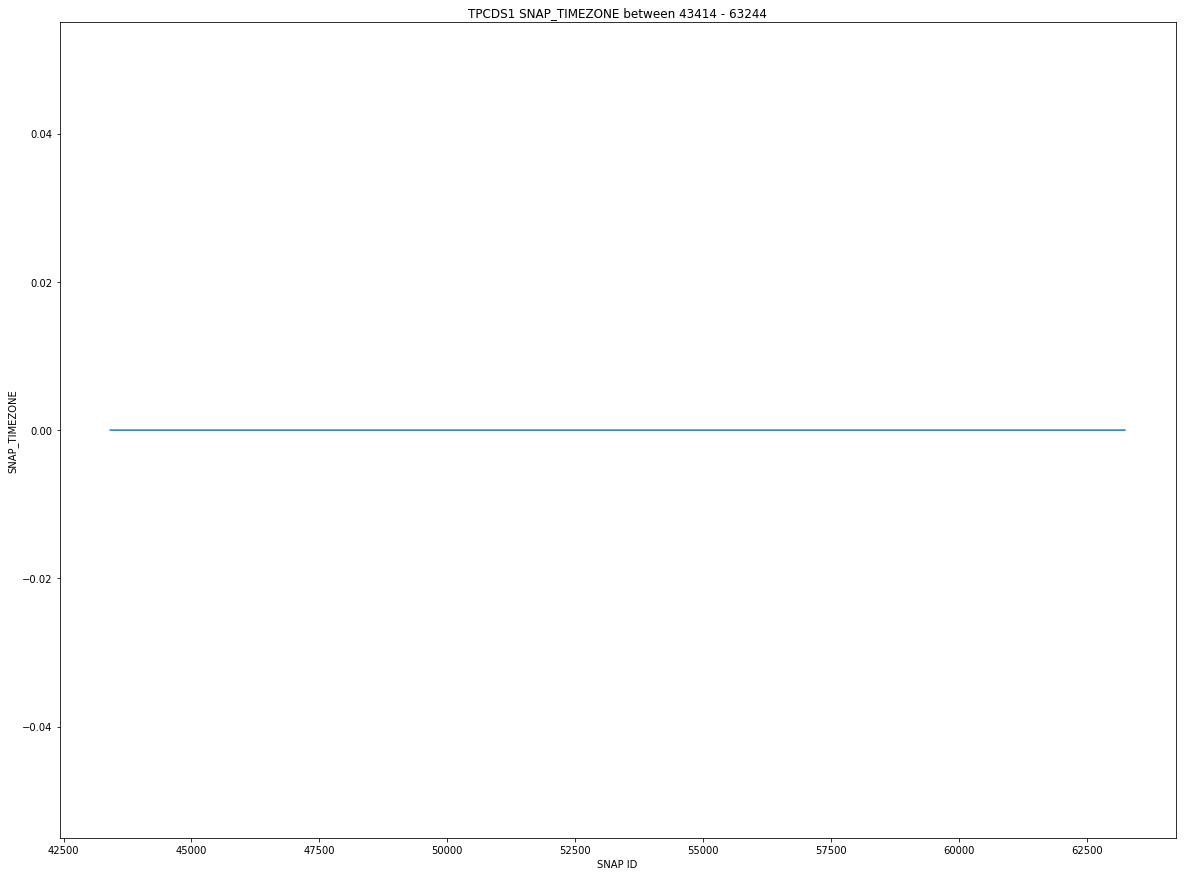

In [11]:
class SnapShotVisualization:
    """
    This class is dedicatedto visualizing collected data over a period of snapshot identifiers.
    """
    def __init__(self, table=None, tpc_type=None, df=None):
        """
        Class constructor.
        :param table:    (String) Denotes which table is going to be utilized. Used for plot purposes.
        :param tpc_type: (String) Denotes which tpc type these experimental plots pertain to.
        :param df:       (Pandas) Data matrix.
        :return: None
        """
        self.__table = table
        self.__tpc_type = tpc_type
        self.__df = df
        
    def plot_snapshot_distribution(self, column):
        """
        Plots line graph, based on input column.
        :param column: (String) Denotes feature column to plot against SNAP_ID feature.
        :return: None
        """
        tpc_type = self.__tpc_type.upper()
        table=self.__table.lower()
        df = self.__df
        
        if column is None or tpc_type is None:
            raise ValueError('Parameters were declared incorrectly!')

        # Convert to float
        try:
            df['SNAP_ID'] = df['SNAP_ID'].astype(float)
            df[column]=df[column].astype(float)
            start_snap, end_snap = int(df['SNAP_ID'].min()), int(df['SNAP_ID'].max())
        except ValueError:
            return None

        # Sort by order of execute time
        df = df.sort_values(by=['SNAP_ID'])

        # Group by SNAP_ID
        df = df.groupby(['SNAP_ID'])[column].sum()

        fig, ax = plt.subplots()
        df.plot(kind='line', x='SNAP_ID', y=column, ax=ax)
        plt.ylabel(column)
        plt.xlabel('SNAP ID')
        plt.title(tpc_type + ' ' + str(column) + " between " + str(start_snap) + " - " + str(end_snap))
        plt.rcParams['figure.figsize'] = [20, 15]
        plt.show()

    def plot_snapshot_ratios(self, column):
        """
        Plots Pie Chart, based on input column.
        :param column: (String) Denotes feature column to plot against SNAP_ID feature.
        :return: None
        """
        tpc_type = self.__tpc_type.upper()
        table=self.__table.lower()
        df = self.__df
        
        if column is None or tpc_type is None:
            raise ValueError('Parameters were declared incorrectly!')

        df = df.groupby([column])[column].count()

        # Sort by operation counts
        series = pd.Series(df.values, index=df.index, name='series')
        series.plot.pie(figsize=(6, 6))
        #plt.xticks([])
        plt.ylabel(column)
        plt.title(tpc_type + ' ' + str(column) + ' Ratio')
        plt.rcParams['figure.figsize'] = [40, 30]
        plt.legend(bbox_to_anchor=(0.95,0.95))
        plt.show()
        
ssv = SnapShotVisualization(table='rep_hist_sysmetric_summary', 
                            tpc_type=tpcds, 
                            df=rep_hist_sysmetric_summary_df)
# Invocation
for header in rep_hist_sysmetric_summary_df.columns:
    ssv.plot_snapshot_distribution(column=header)

### Table Pivots

To better handle the following table, a number of table pivots are made on tables:
* rep_hist_sysmetric_summary

In [12]:
# Table REP_HIST_SYSMETRIC_SUMMARY
rep_hist_sysmetric_summary_df = rep_hist_sysmetric_summary_df.pivot(index='SNAP_ID', columns='METRIC_NAME', values='AVERAGE')
rep_hist_sysmetric_summary_df.reset_index(inplace=True)
print(rep_hist_sysmetric_summary_df.columns)
rep_hist_sysmetric_summary_df[['SNAP_ID']] = rep_hist_sysmetric_summary_df[['SNAP_ID']].astype(int)
rep_hist_sysmetric_summary_df.sort_values(by=['SNAP_ID'],inplace=True,ascending=True)
print("REP_HIST_SYSMETRIC Shape: " + str(rep_hist_sysmetric_summary_df.shape))

# Refreshing columns with pivoted columns
def convert_list_to_upper(col_list):
    """
    Takes a string and converts elements to upper
    """
    upper_col_list = []
    for col in col_list:
        upper_col_list.append(col.upper())
    return upper_col_list

rep_hist_sysmetric_summary_df.rename(str.upper, inplace=True, axis='columns')

# DF Shape
print('Table [REP_HIST_SYSMETRIC_SUMMARY] - ' + str(rep_hist_sysmetric_summary_df.shape))

Index(['SNAP_ID', 'Active Parallel Sessions', 'Active Serial Sessions',
       'Average Active Sessions',
       'Average Synchronous Single-Block Read Latency',
       'Background CPU Usage Per Sec', 'Background Checkpoints Per Sec',
       'Background Time Per Sec', 'Branch Node Splits Per Sec',
       'Branch Node Splits Per Txn',
       ...
       'User Commits Percentage', 'User Limit %',
       'User Rollback Undo Records Applied Per Txn',
       'User Rollback UndoRec Applied Per Sec', 'User Rollbacks Per Sec',
       'User Rollbacks Percentage', 'User Transaction Per Sec',
       'VM in bytes Per Sec', 'VM out bytes Per Sec',
       'Workload Capture and Replay status'],
      dtype='object', name='METRIC_NAME', length=162)
REP_HIST_SYSMETRIC Shape: (19831, 162)
Table [REP_HIST_SYSMETRIC_SUMMARY] - (19831, 162)


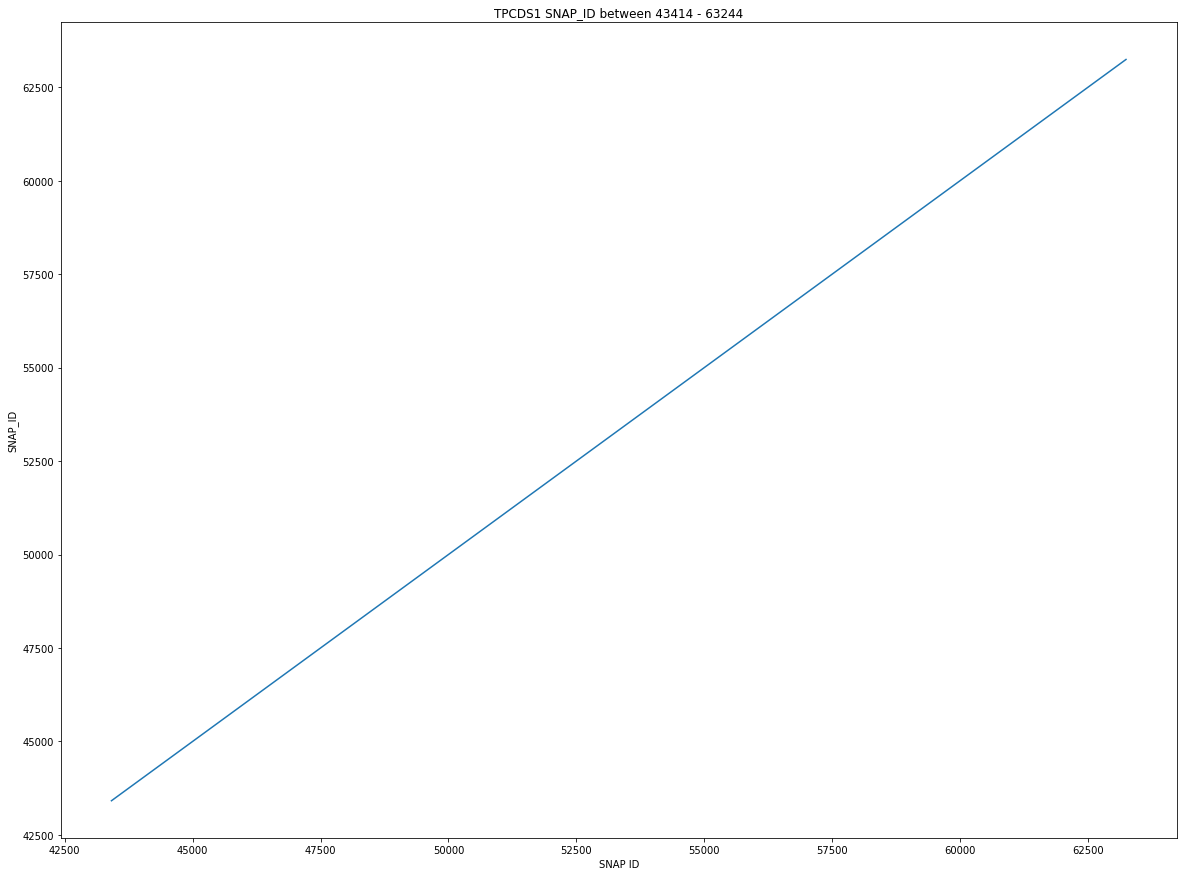

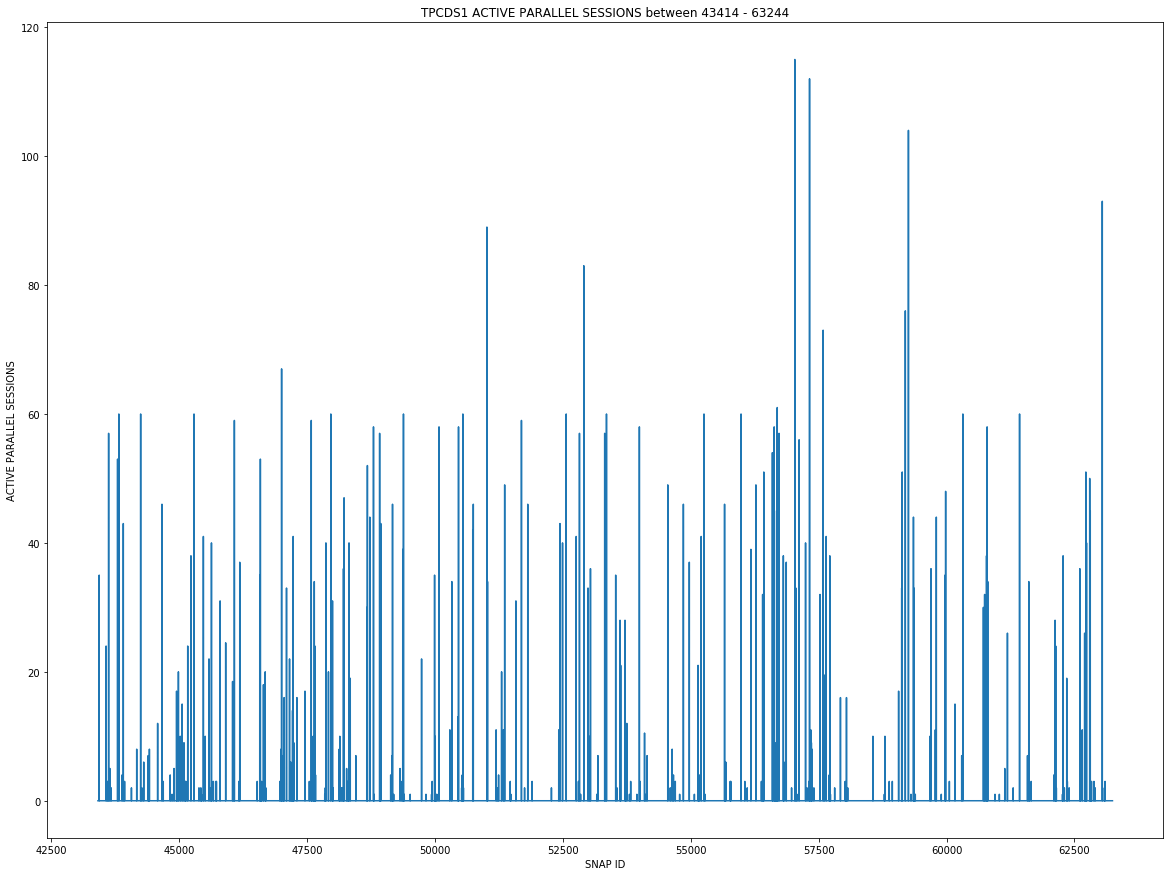

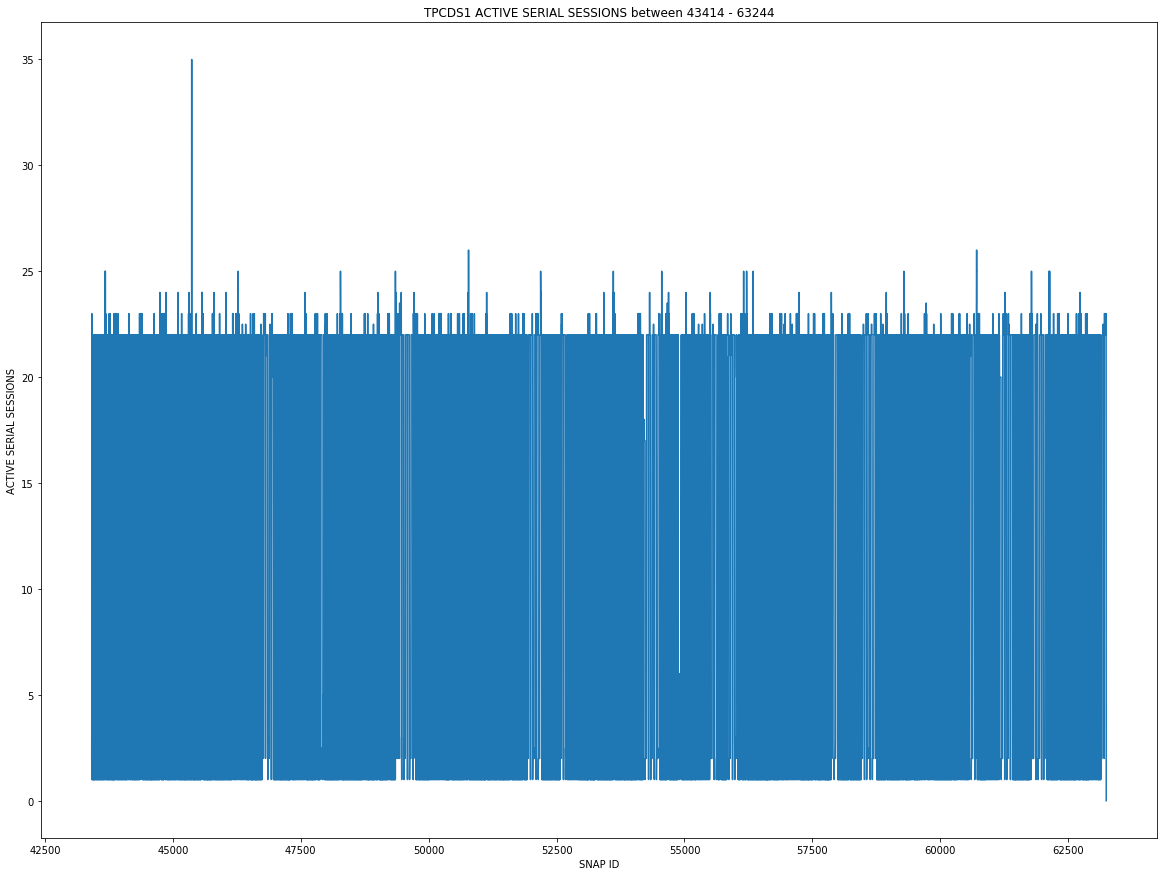

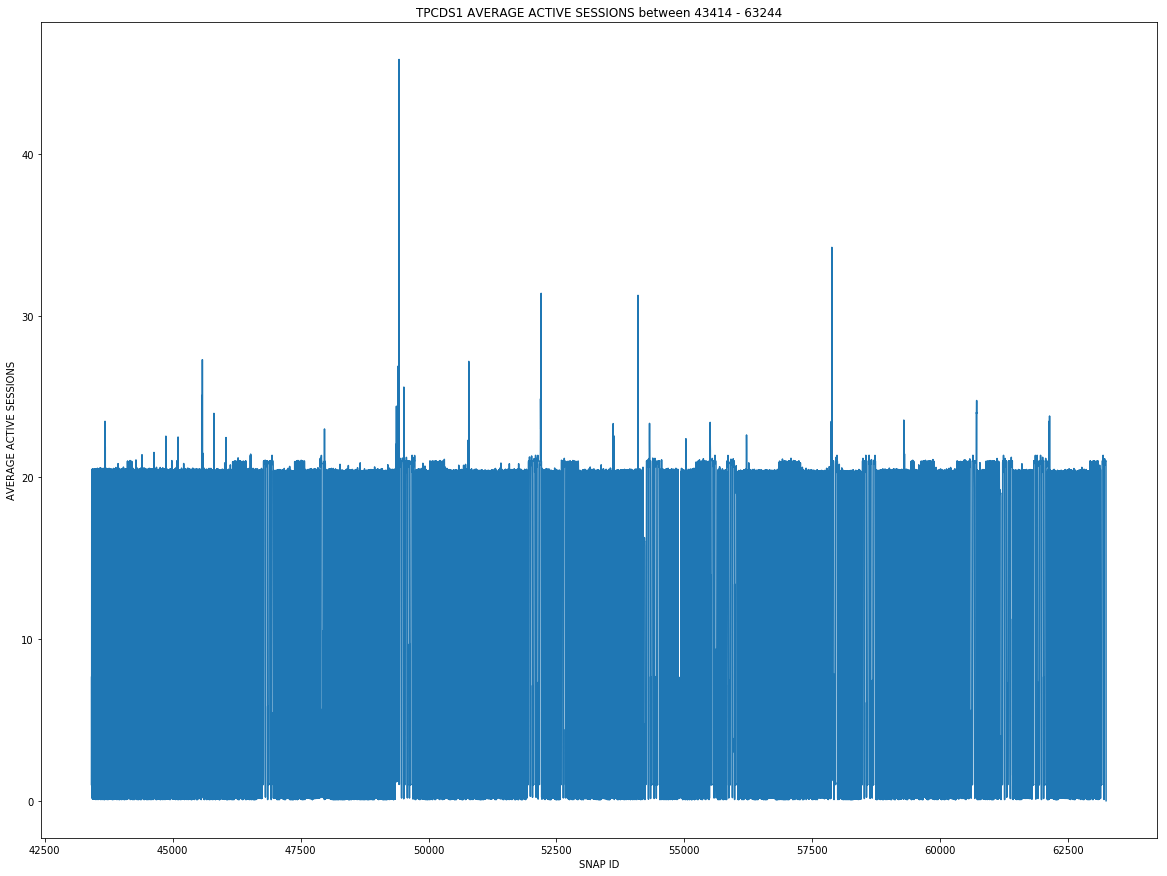

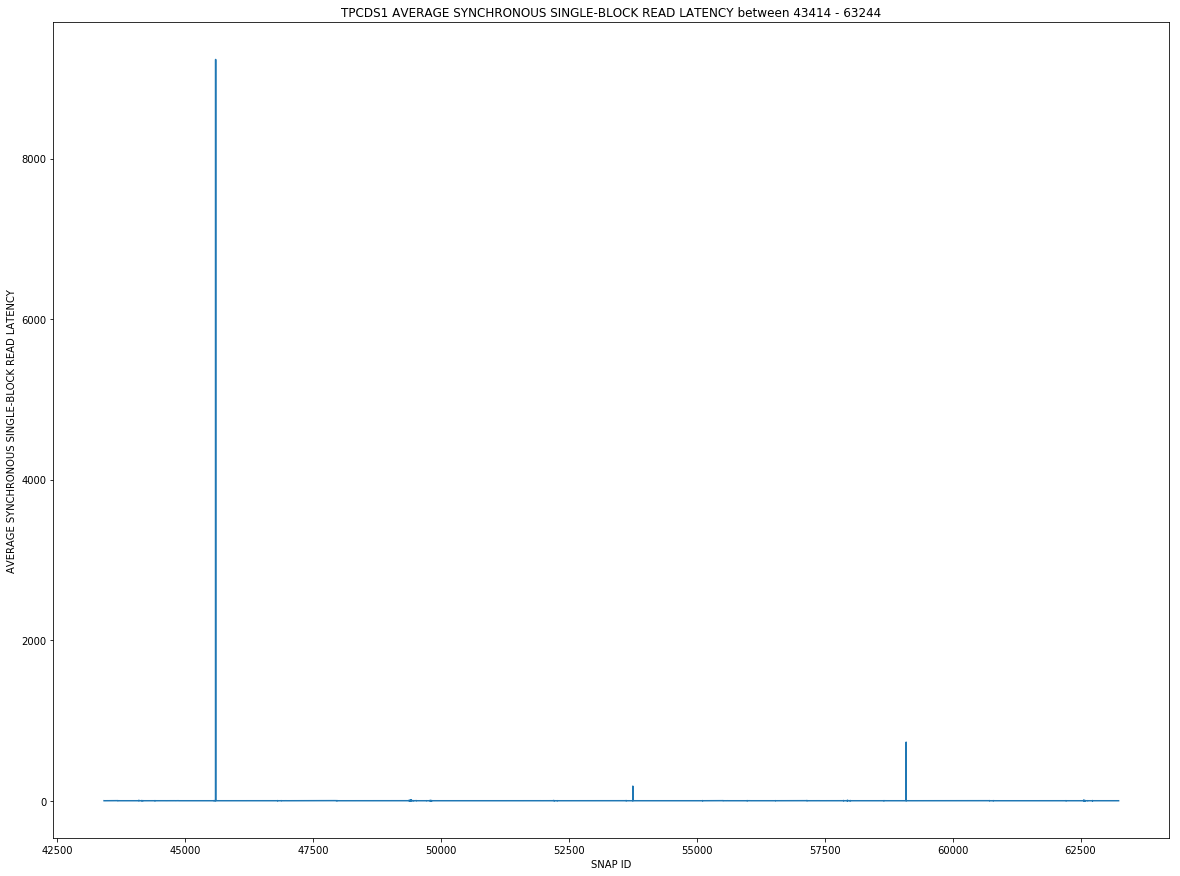

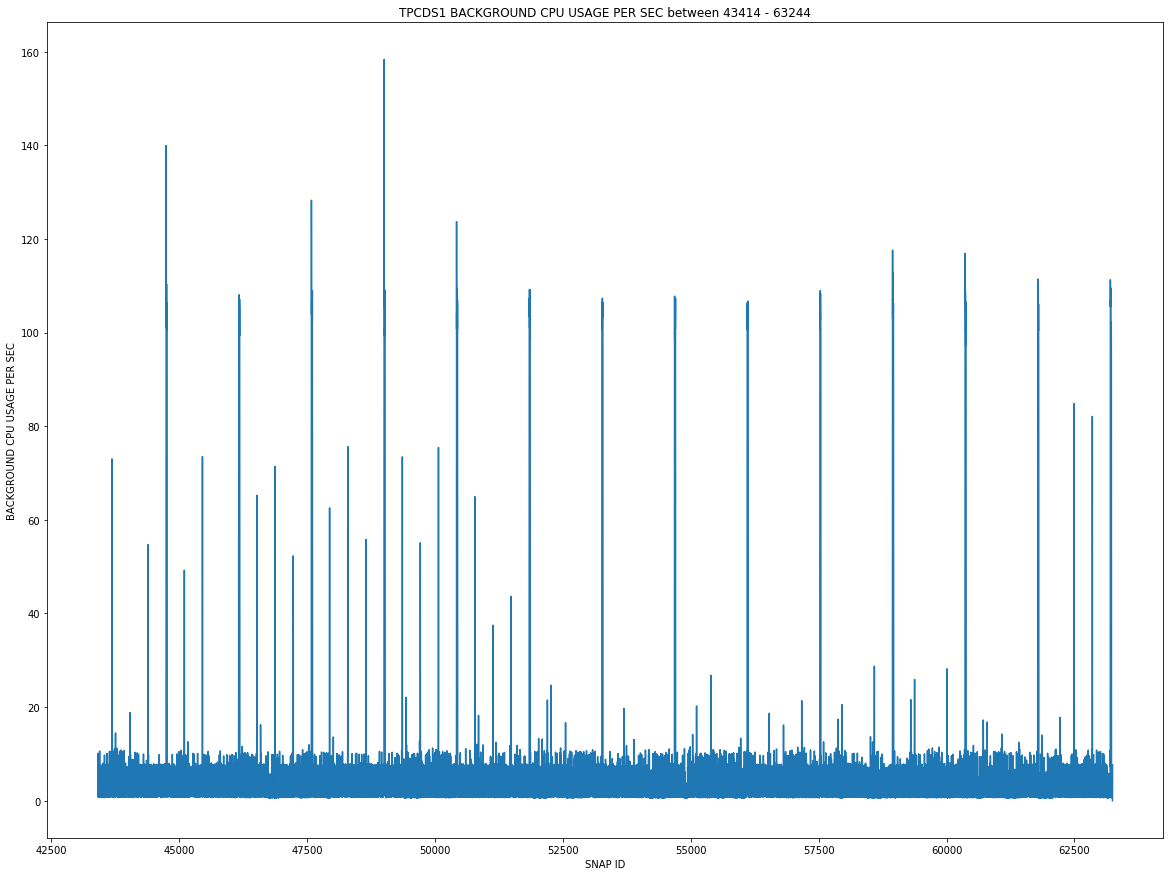

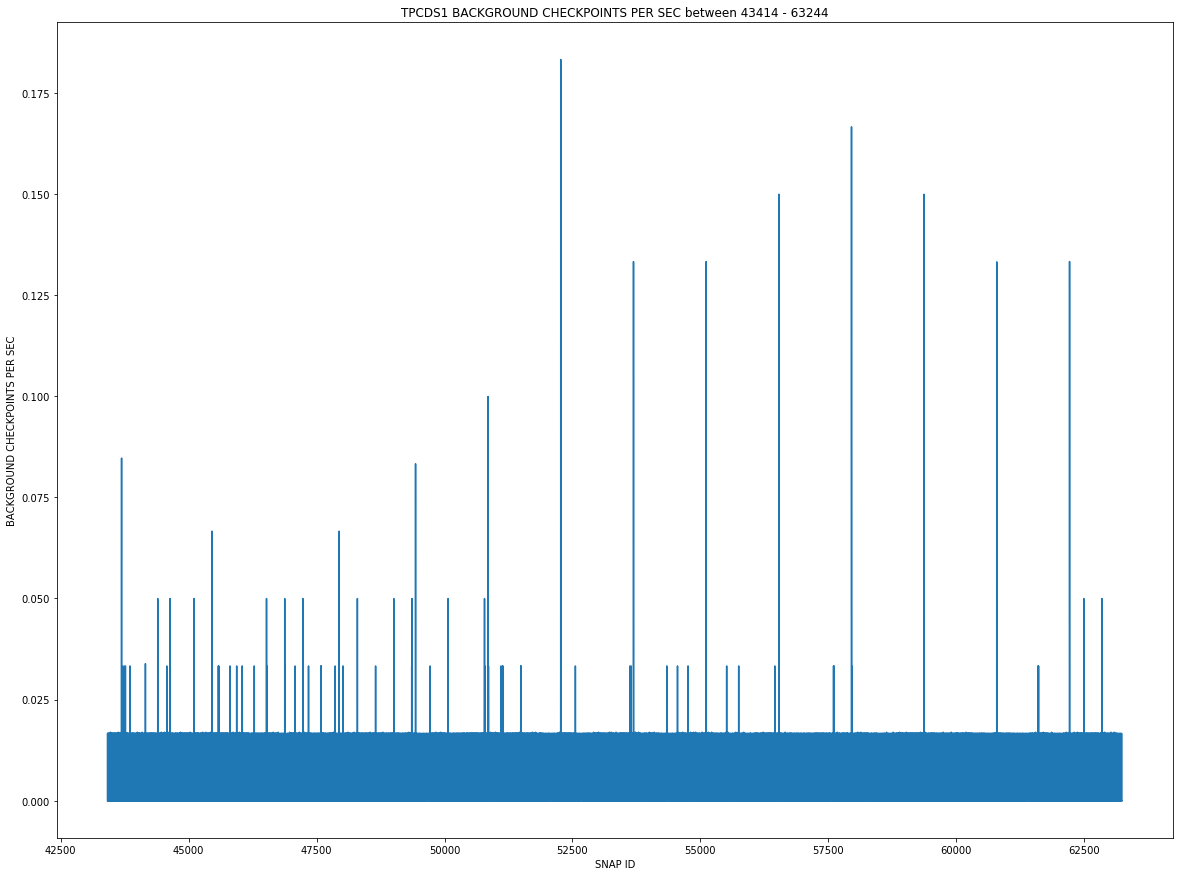

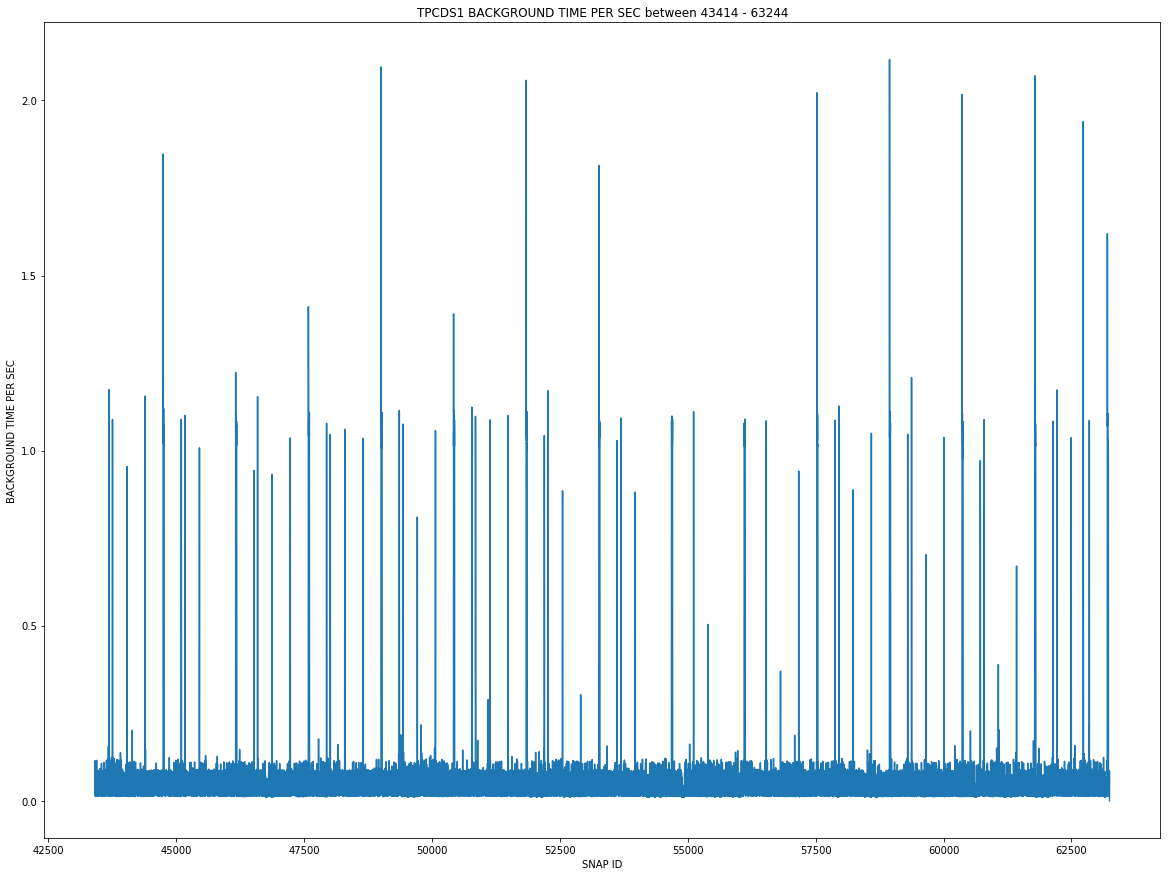

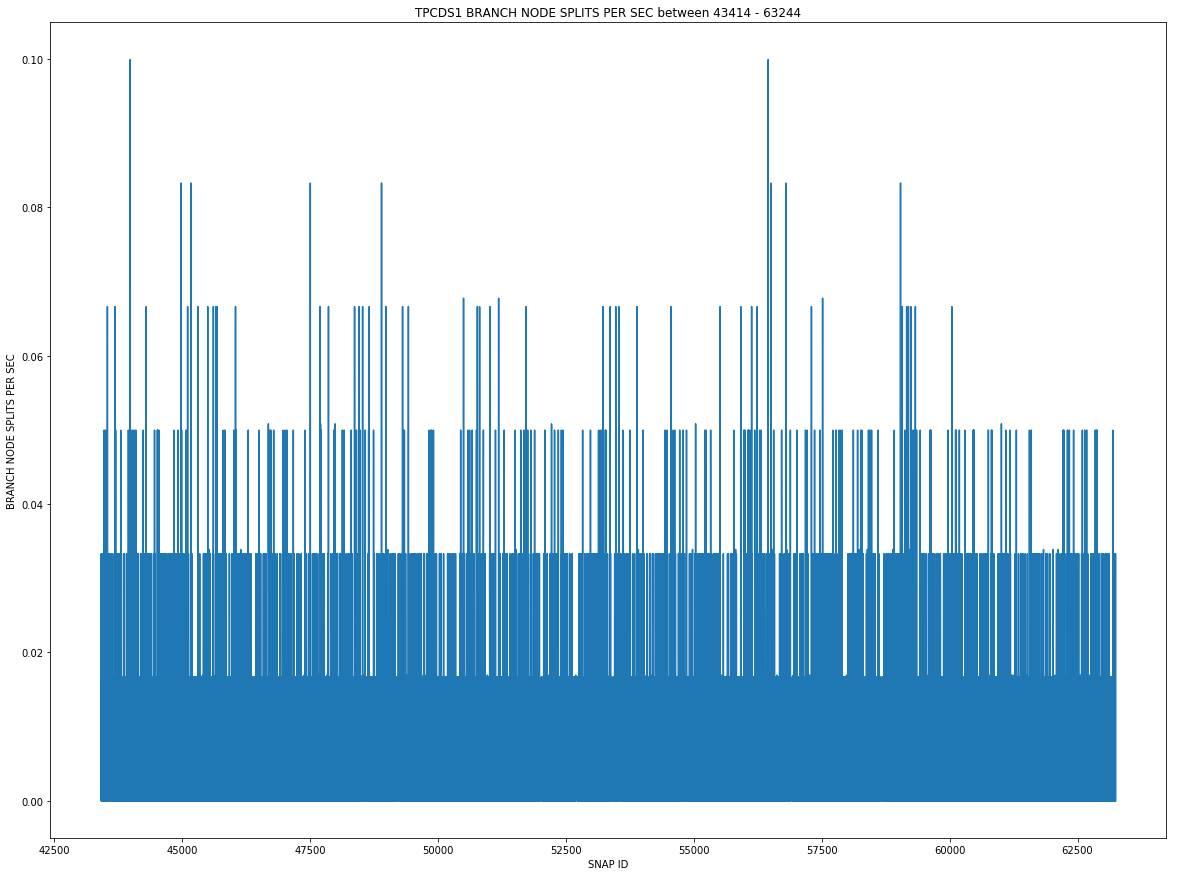

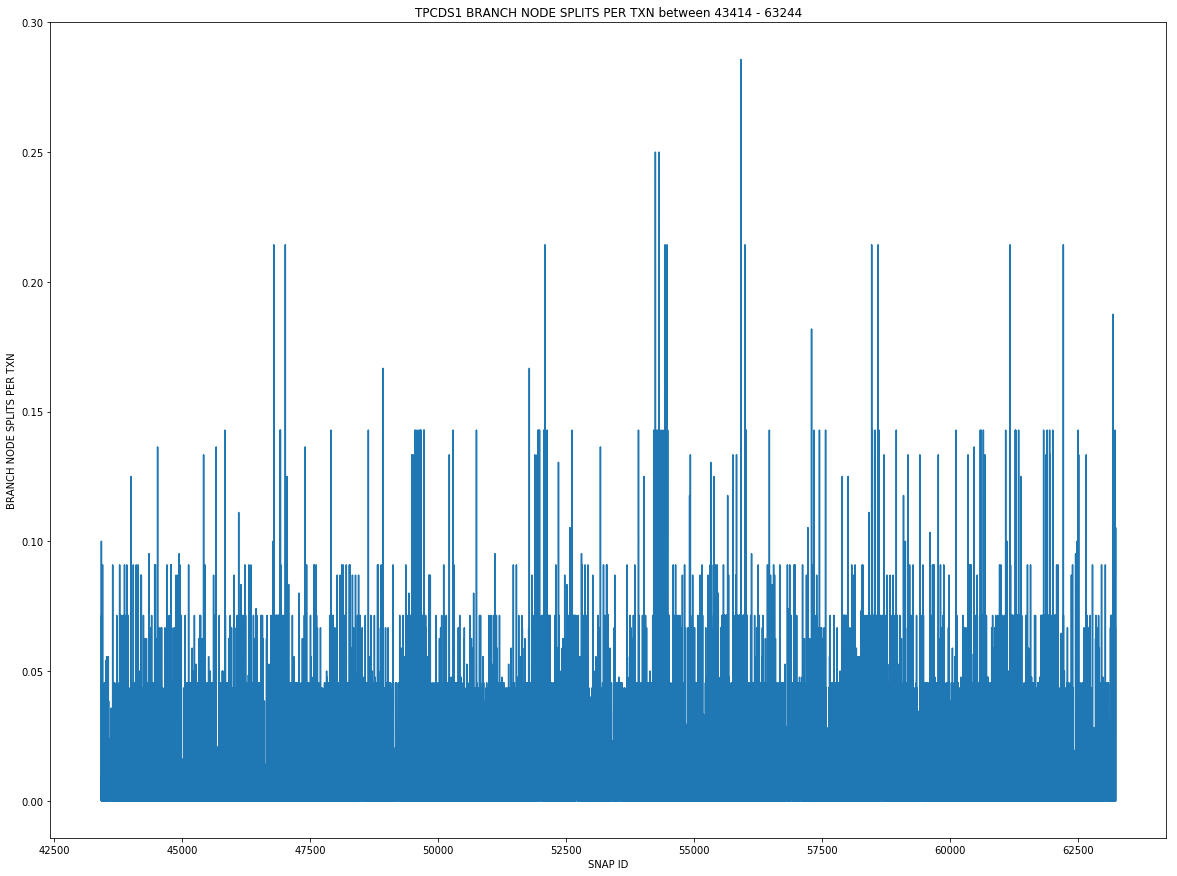

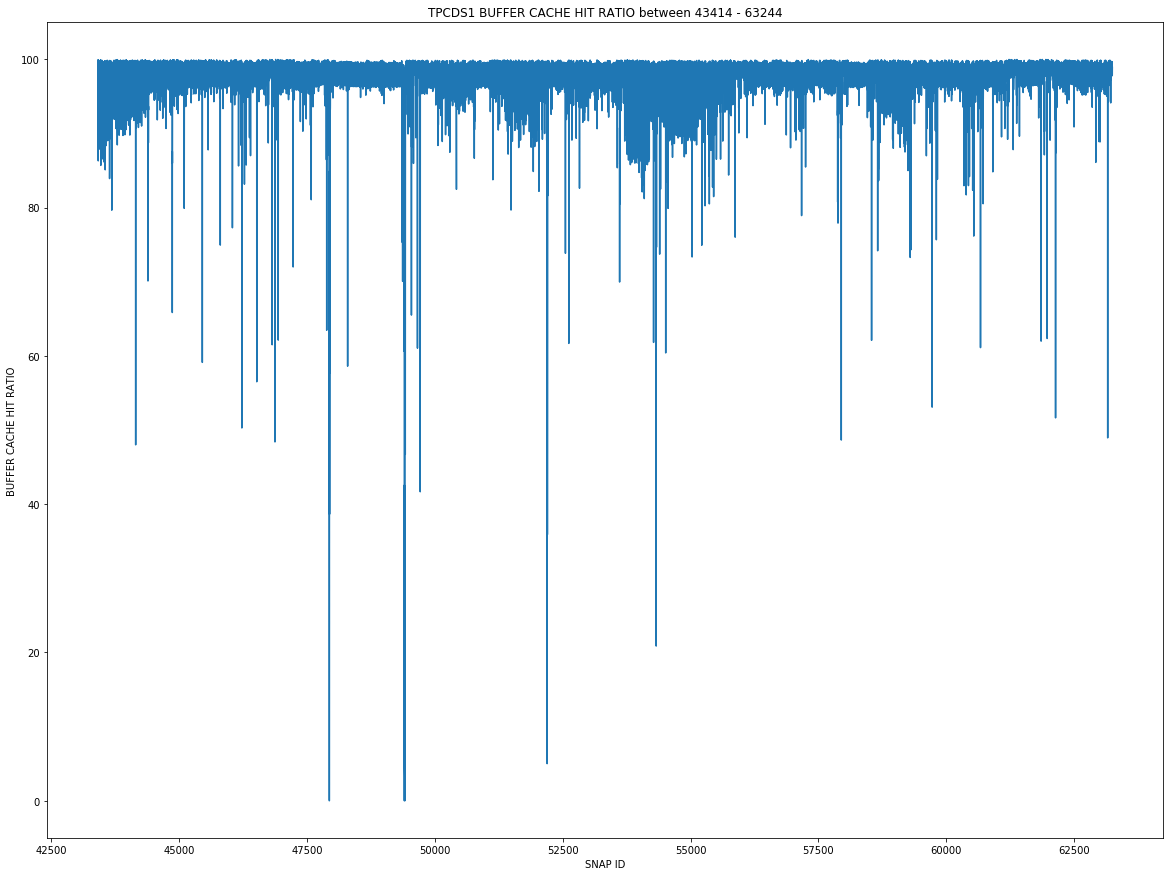

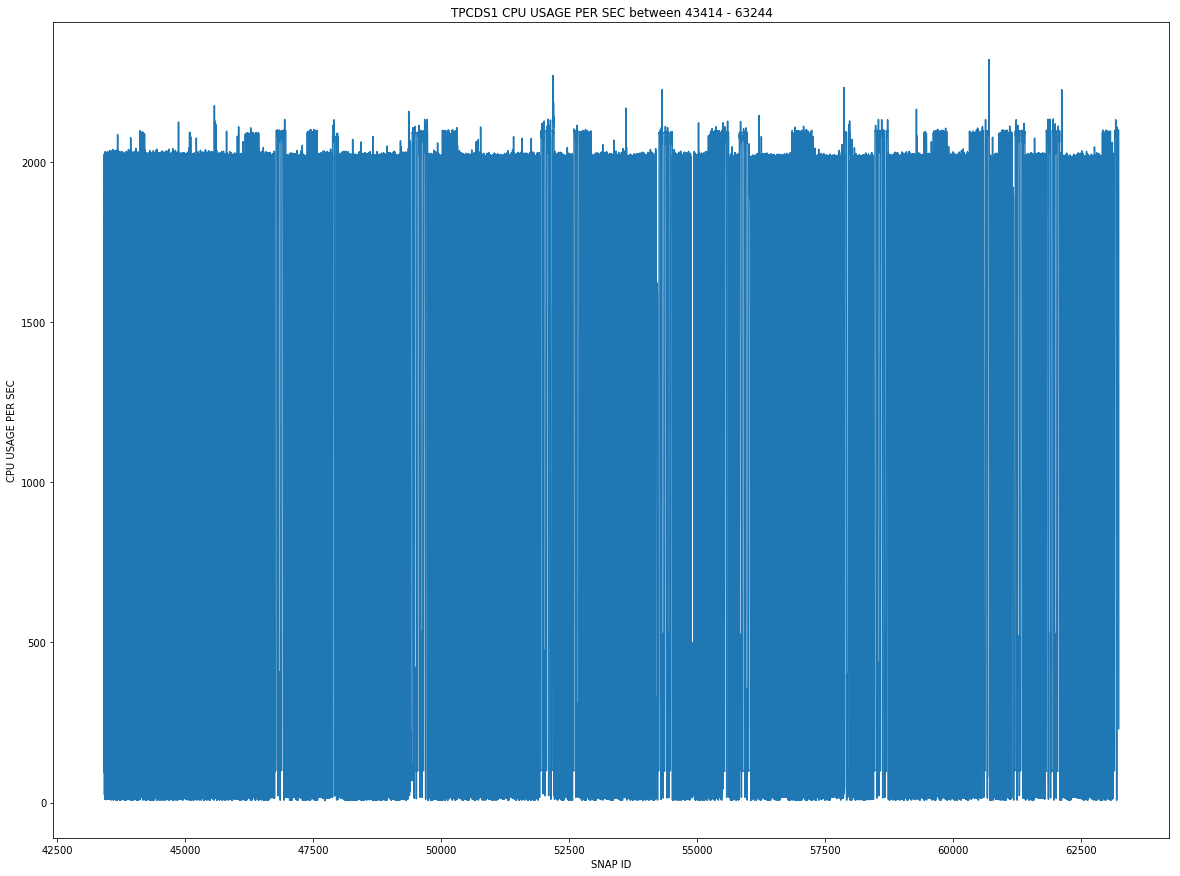

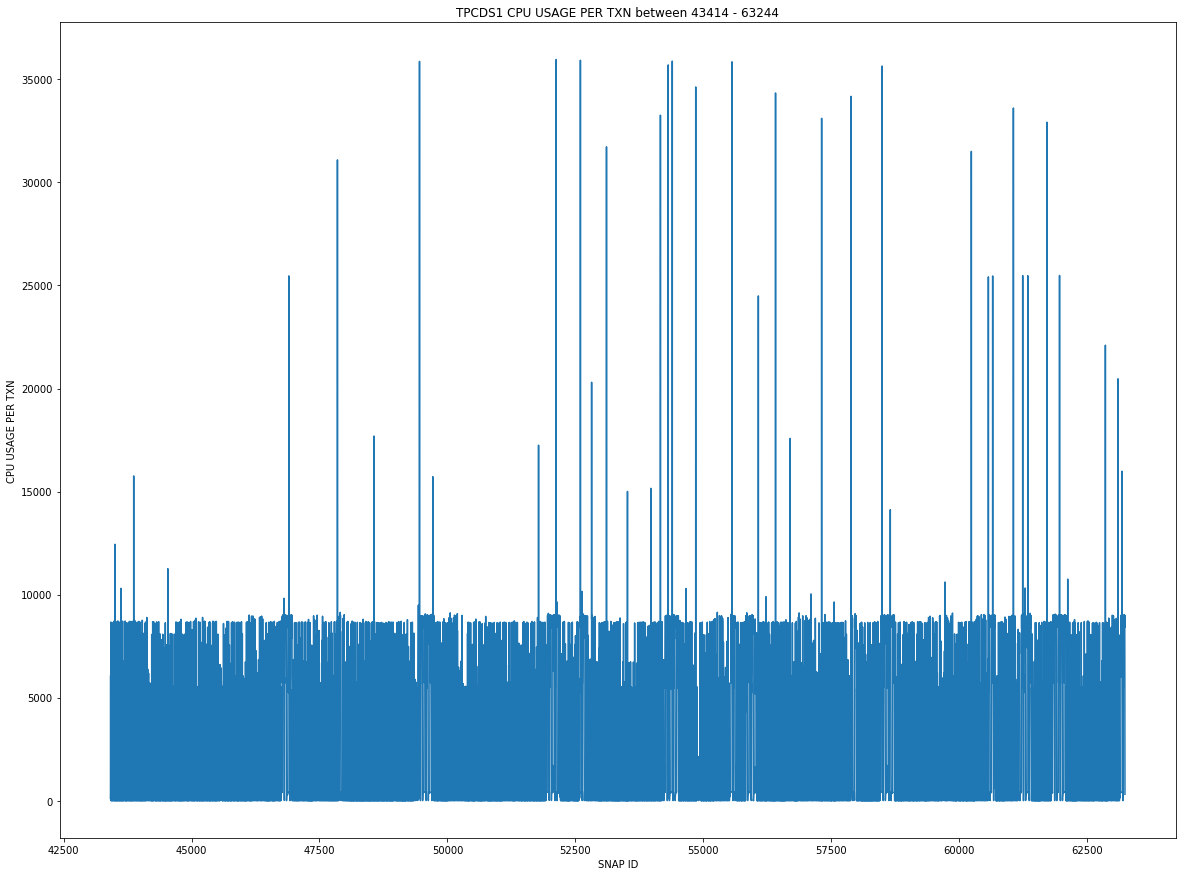

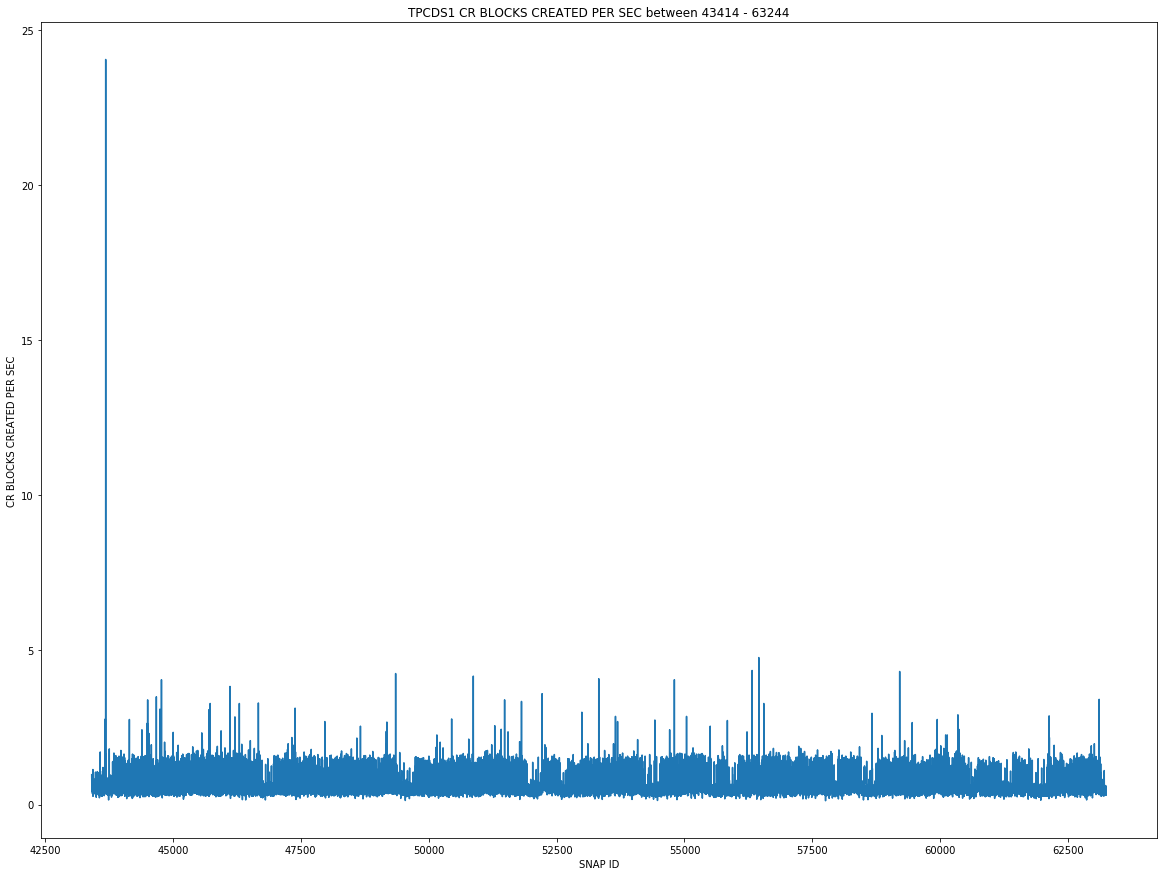

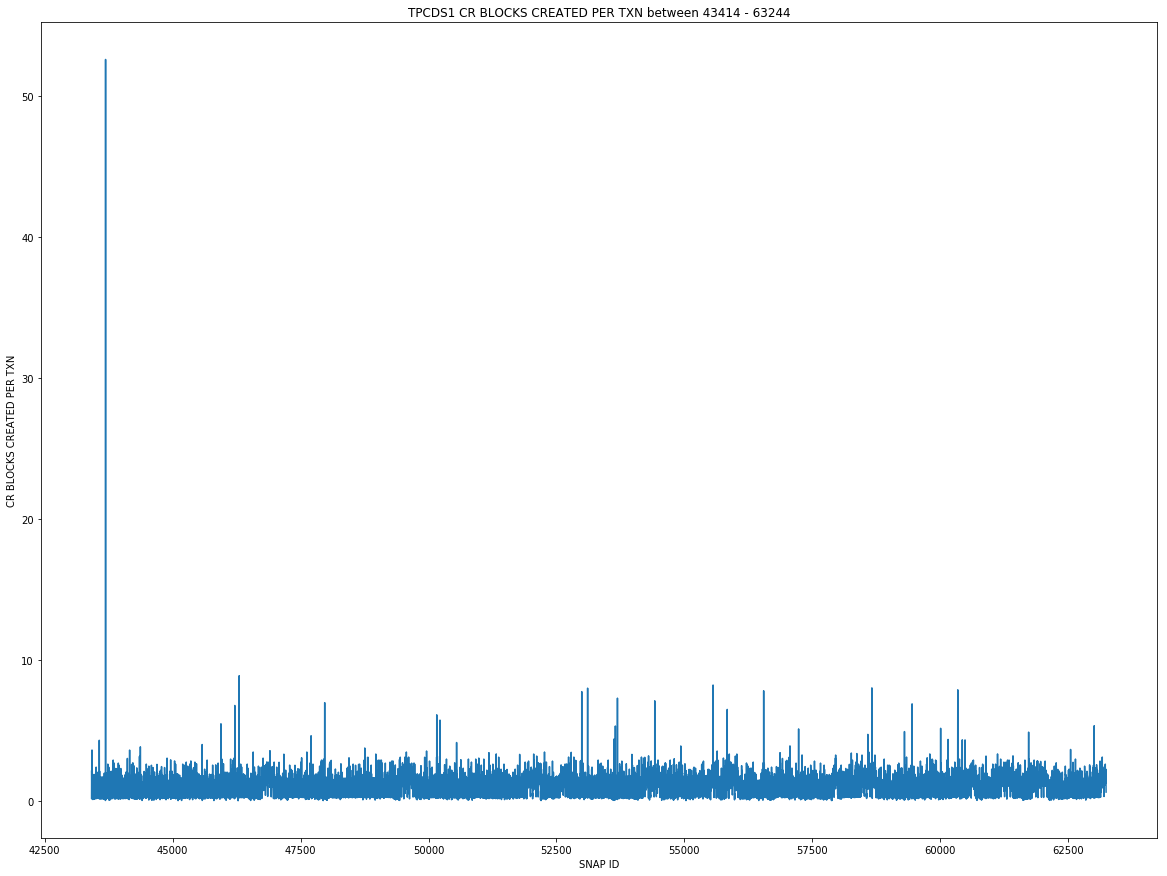

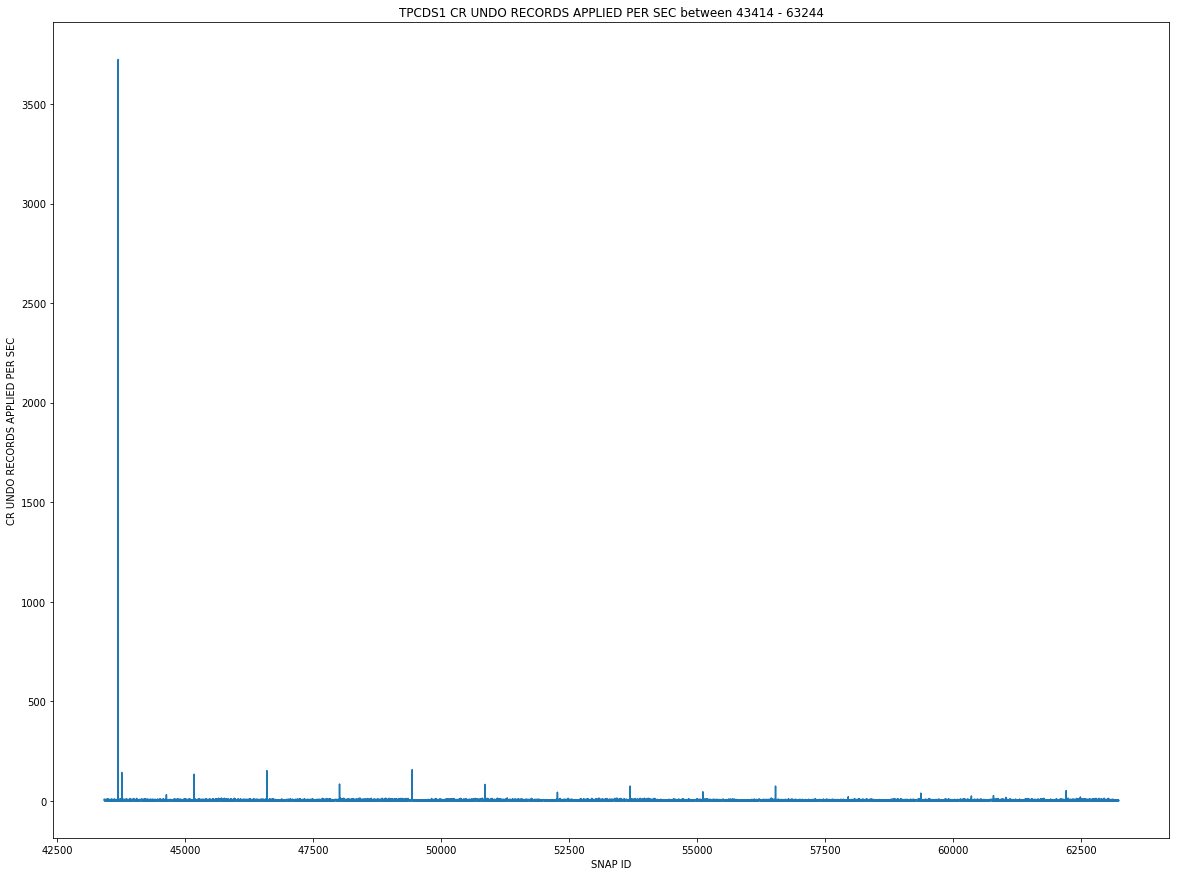

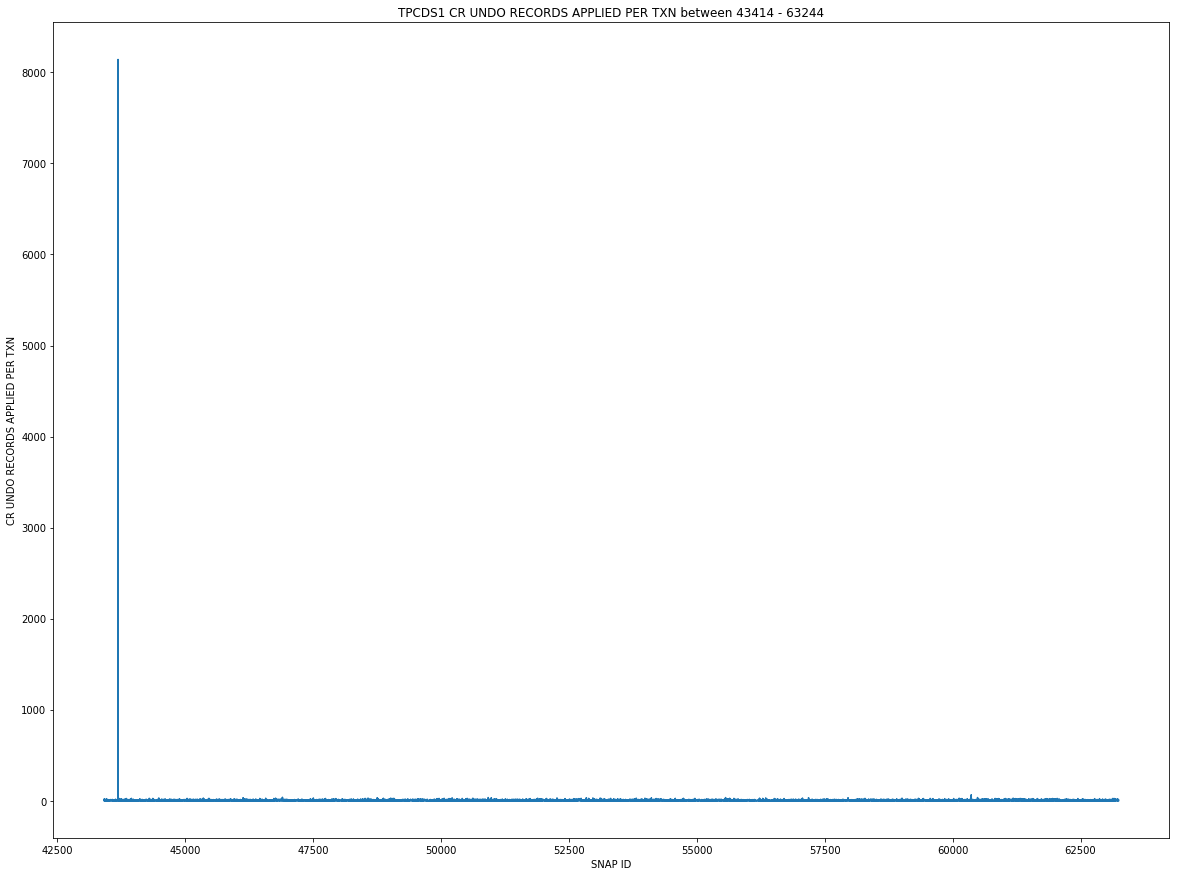

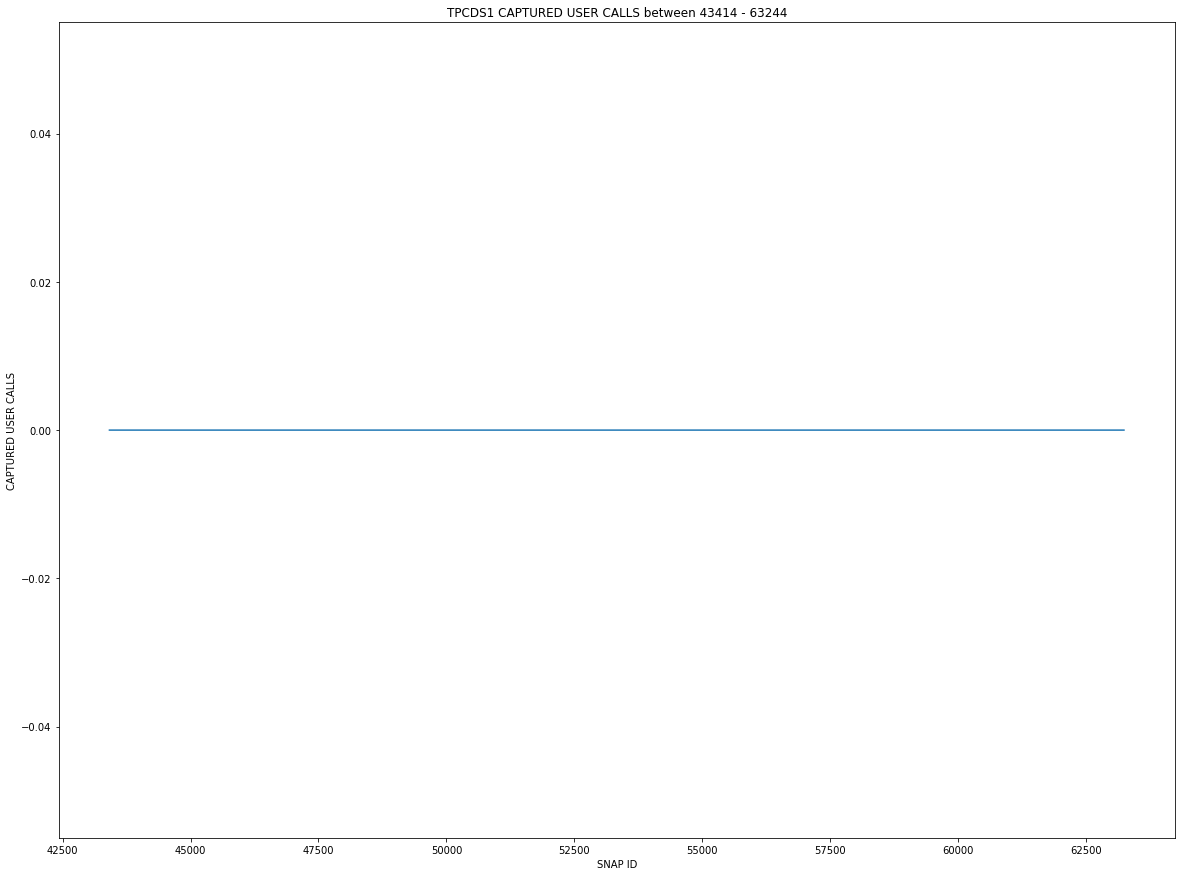

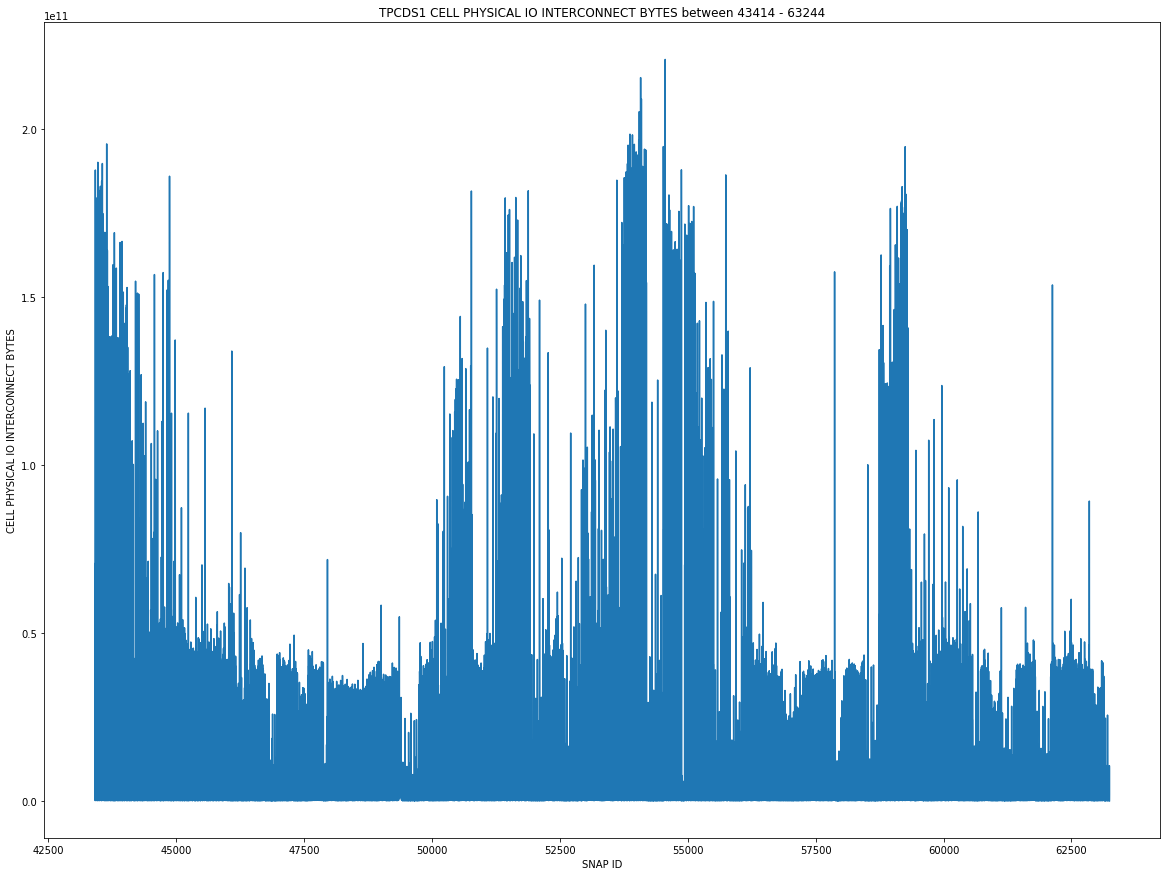

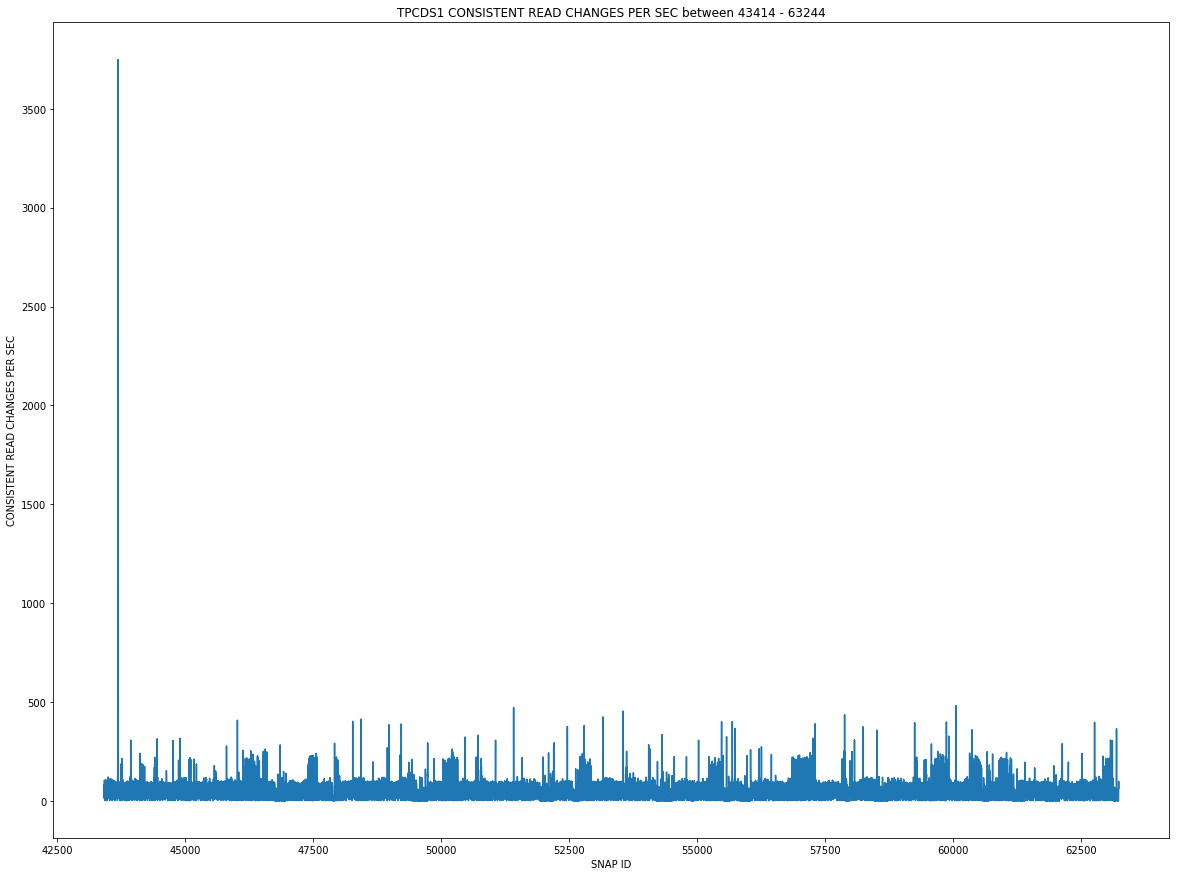

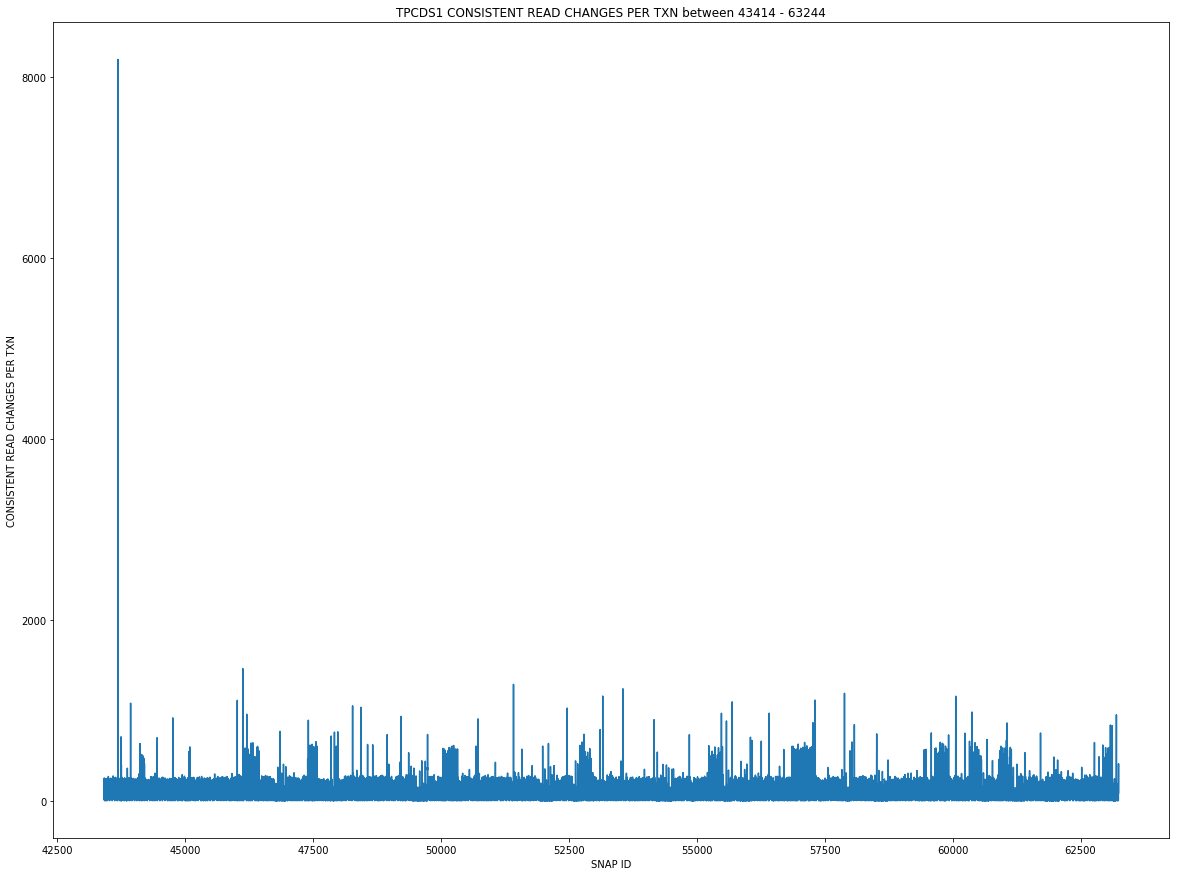

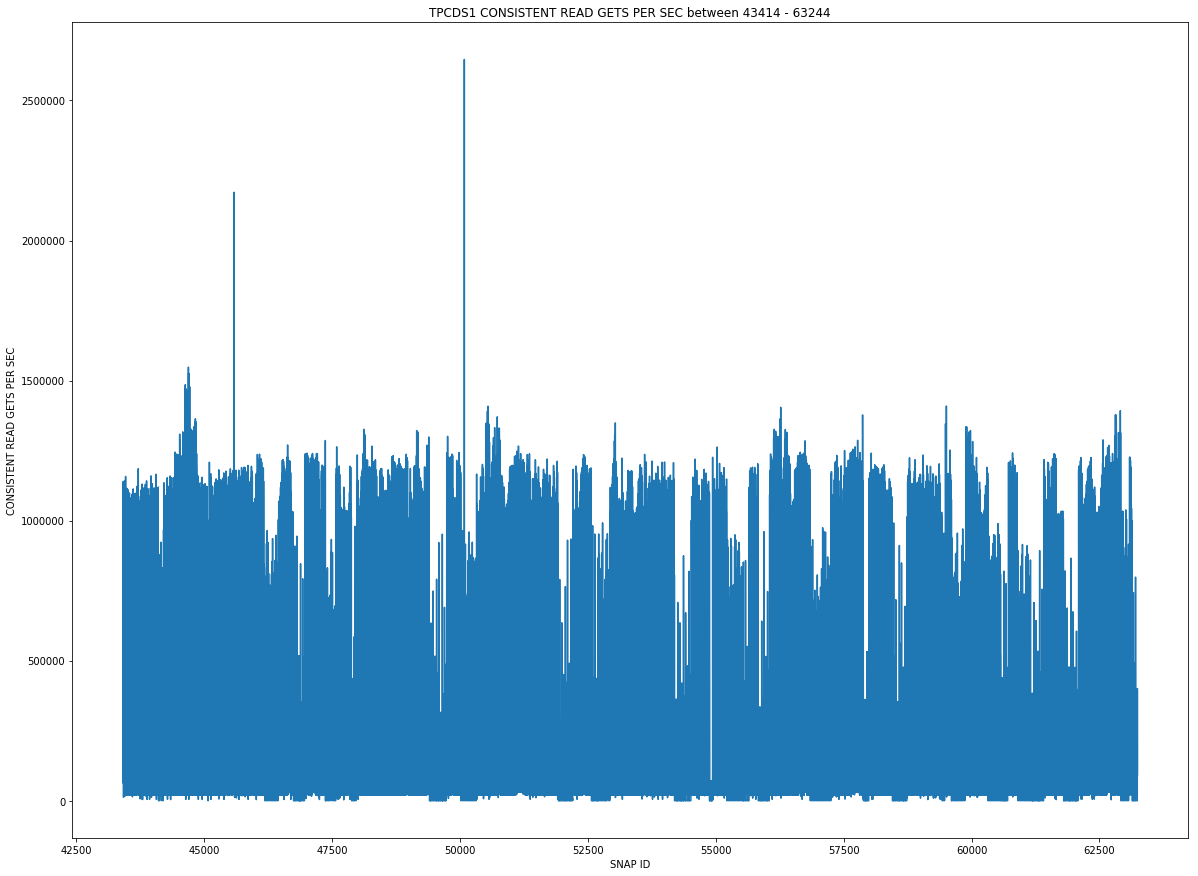

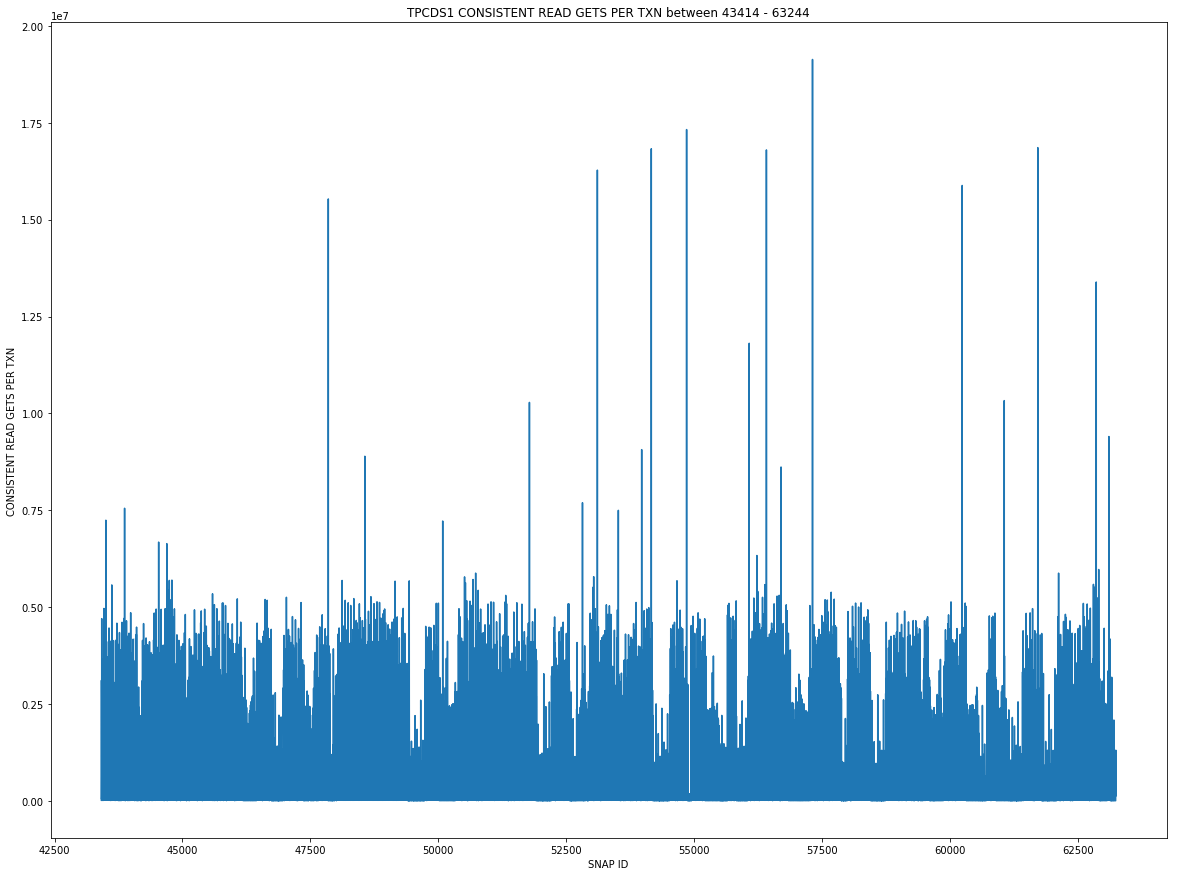

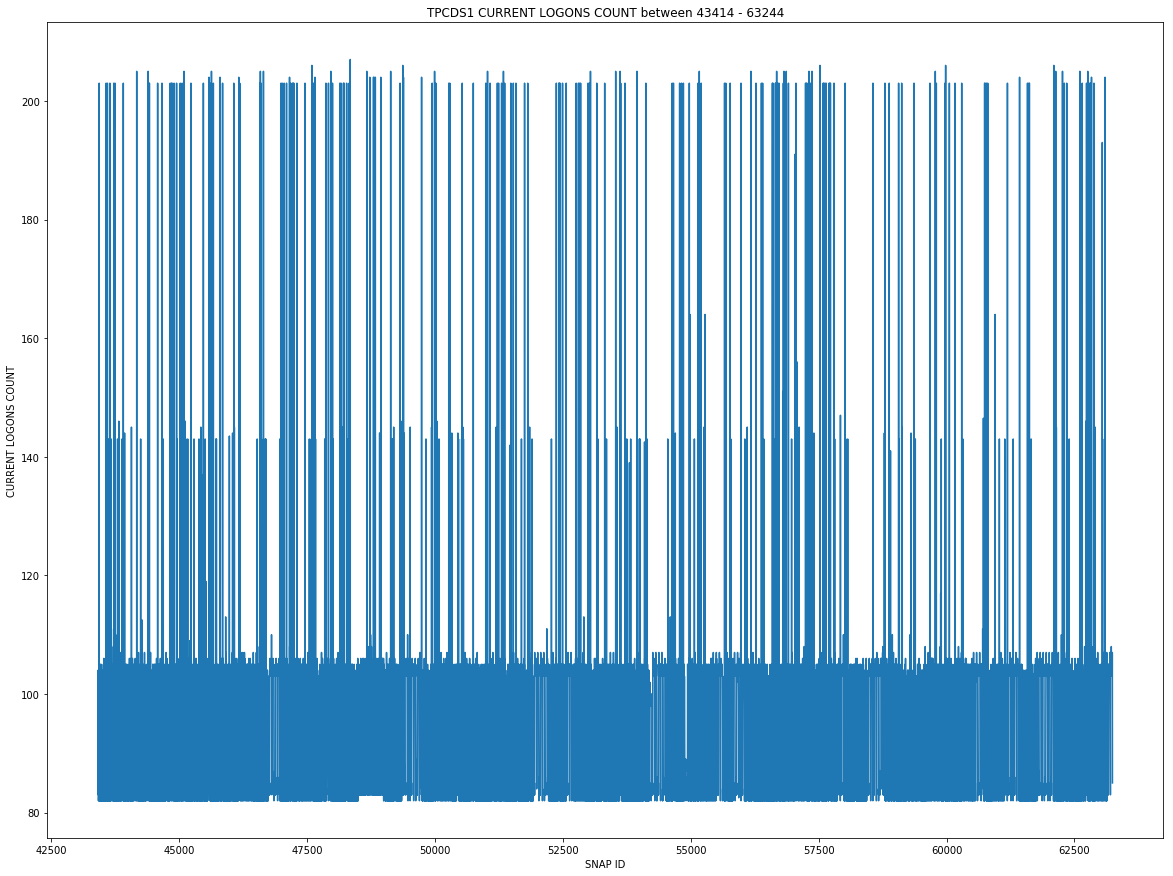

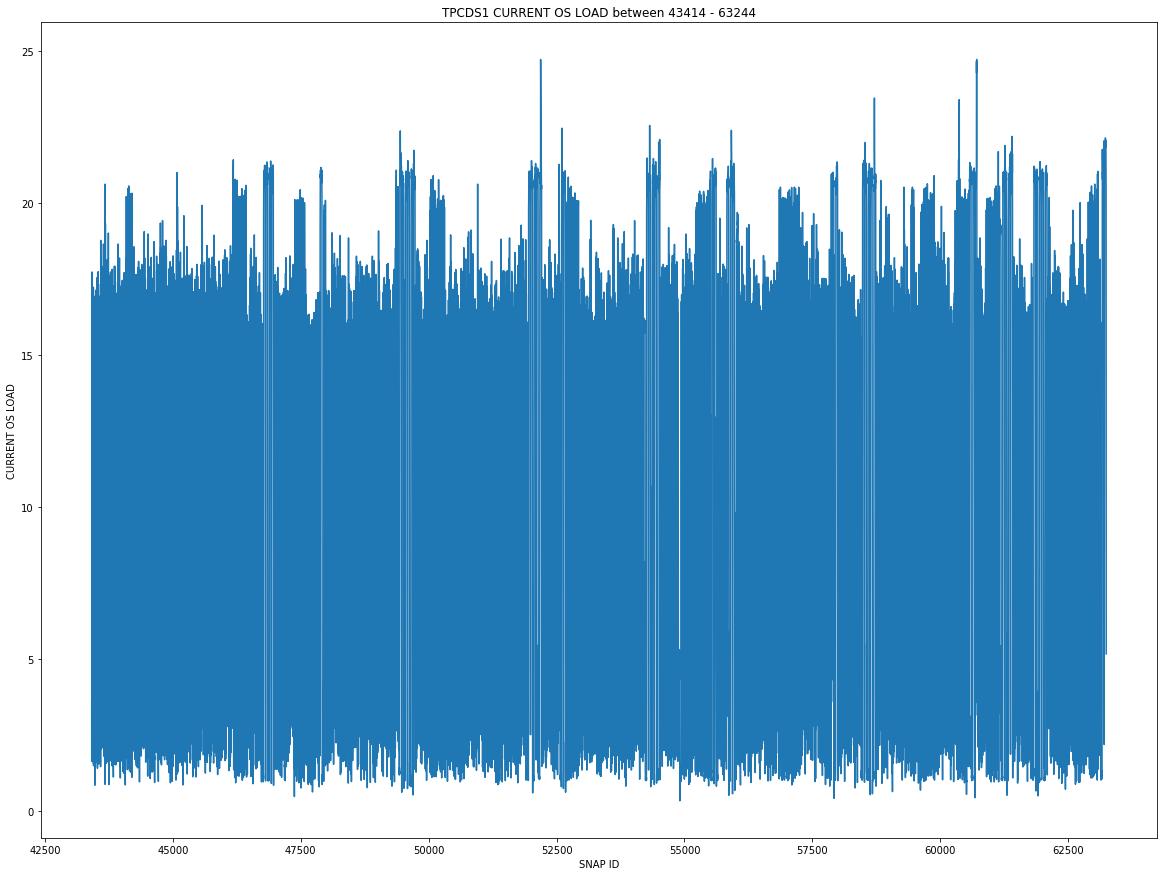

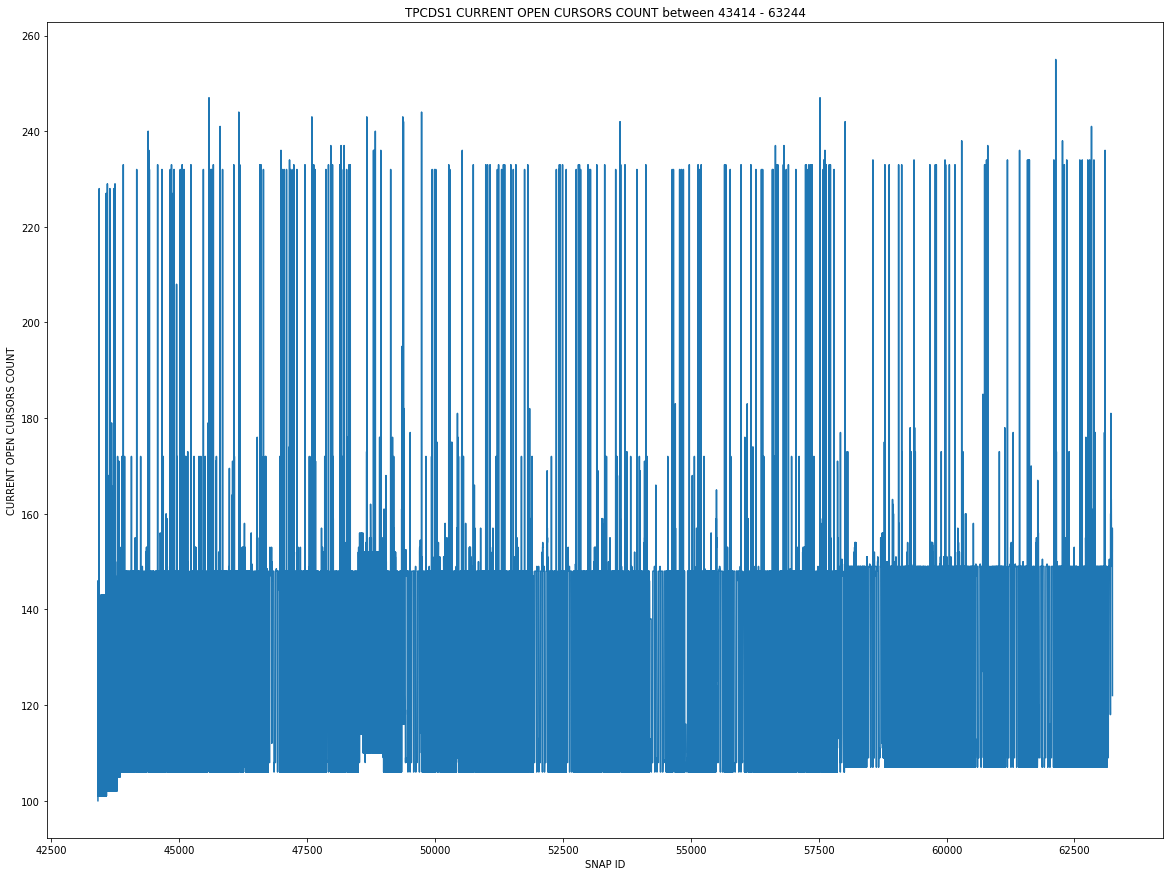

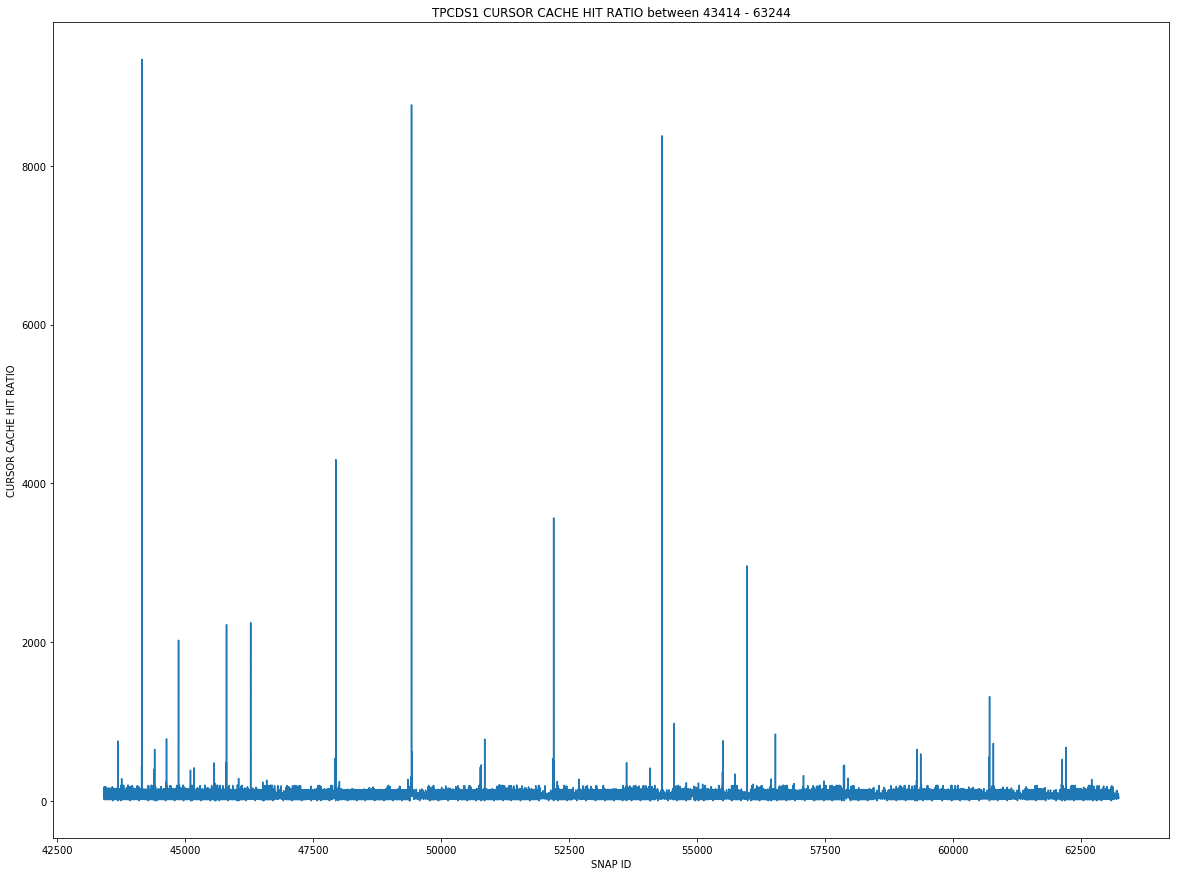

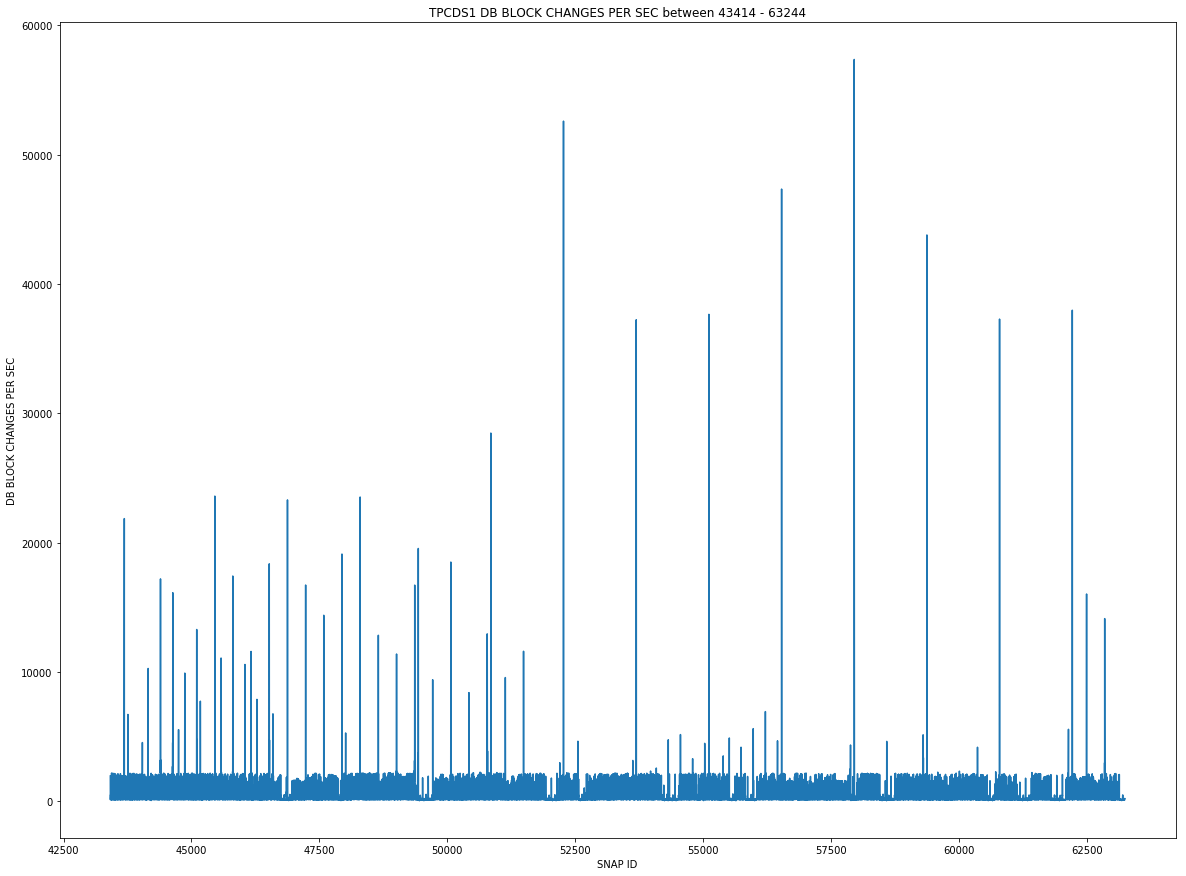

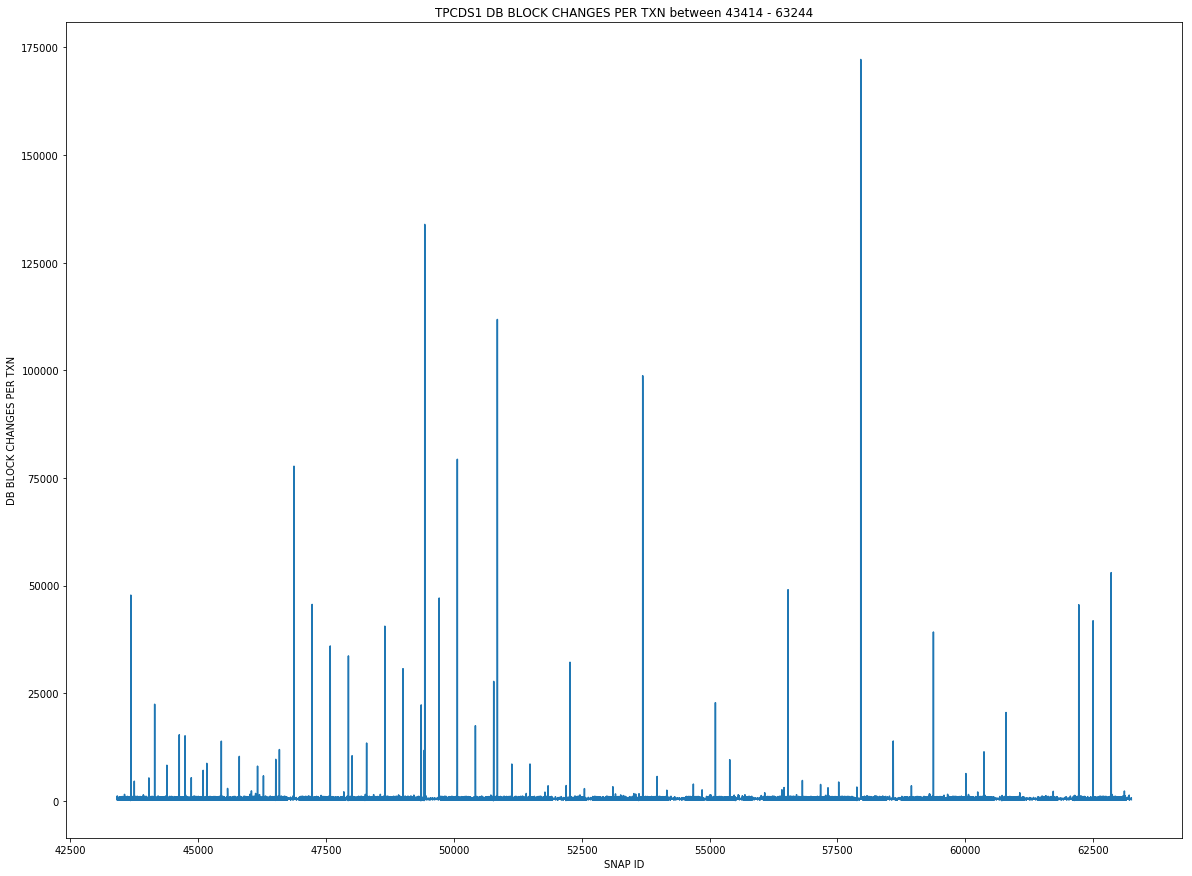

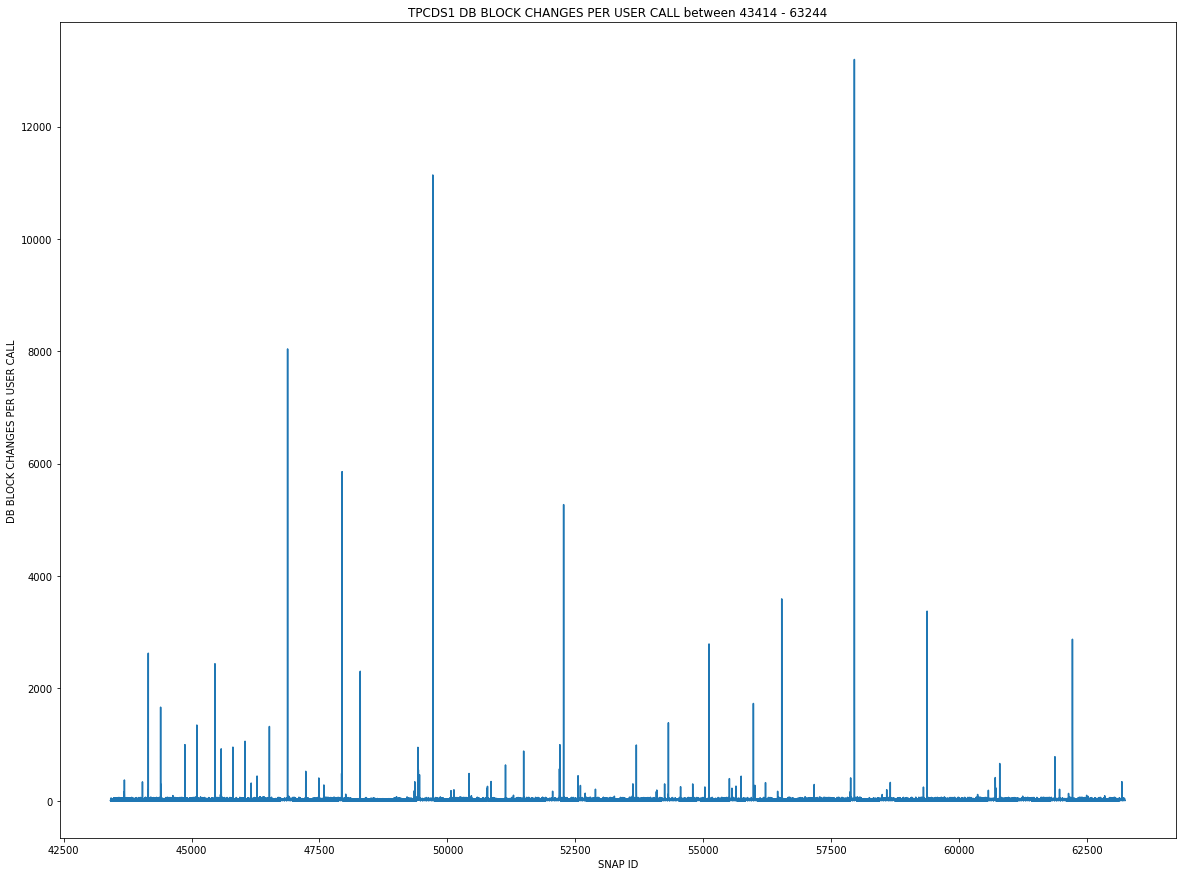

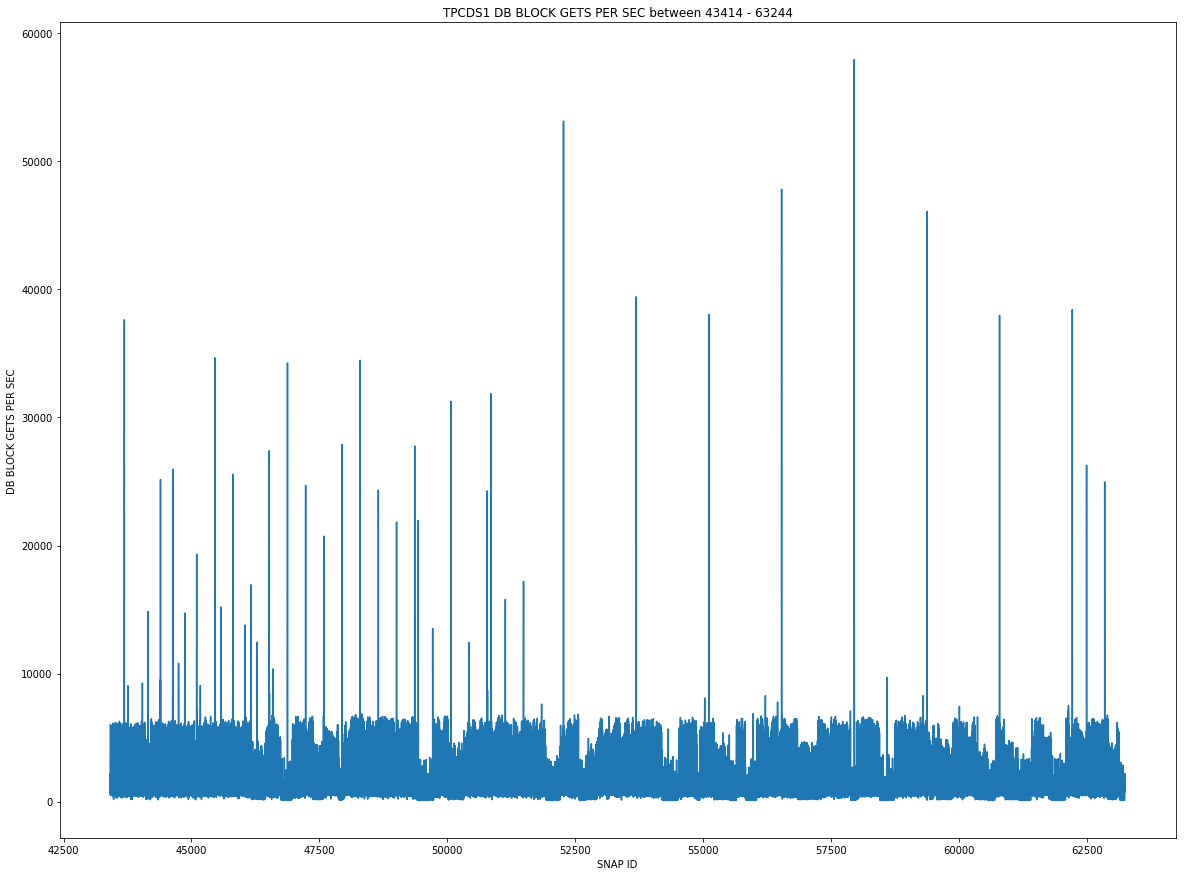

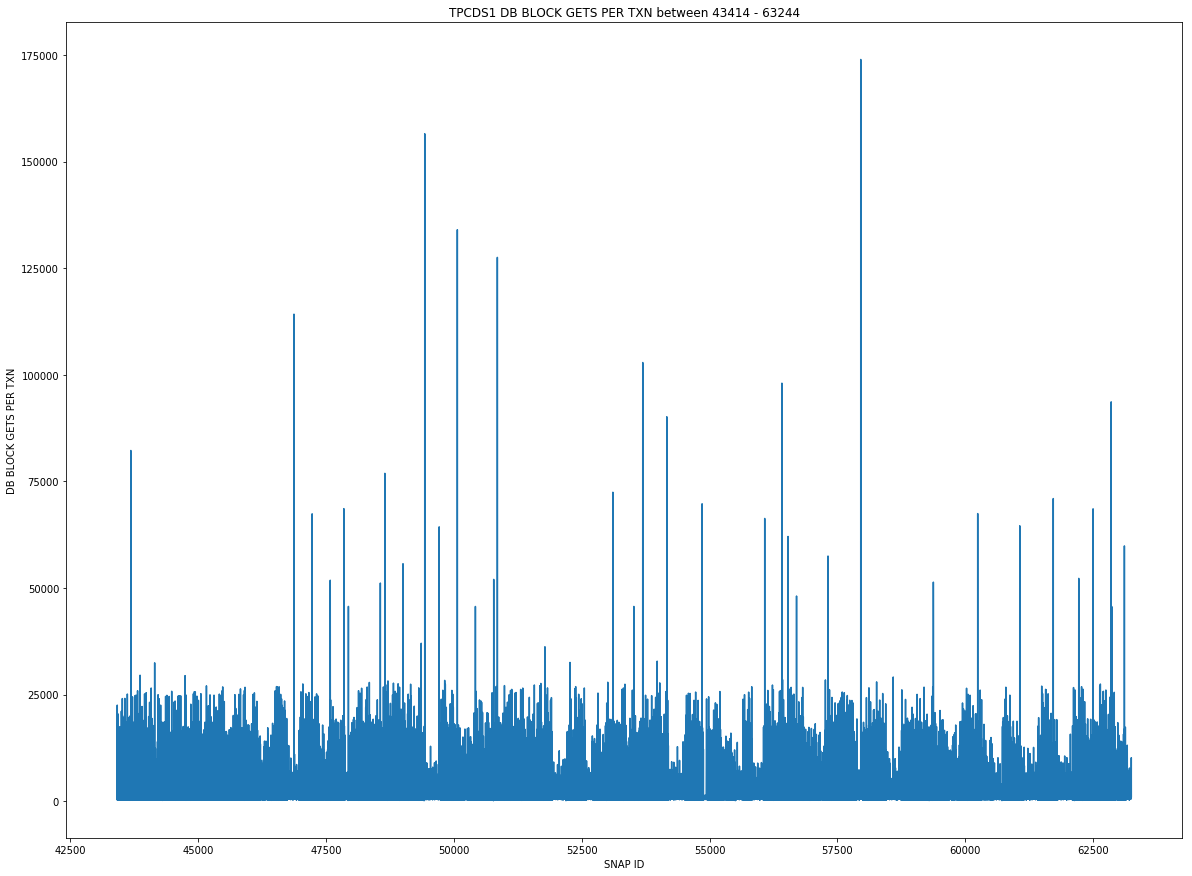

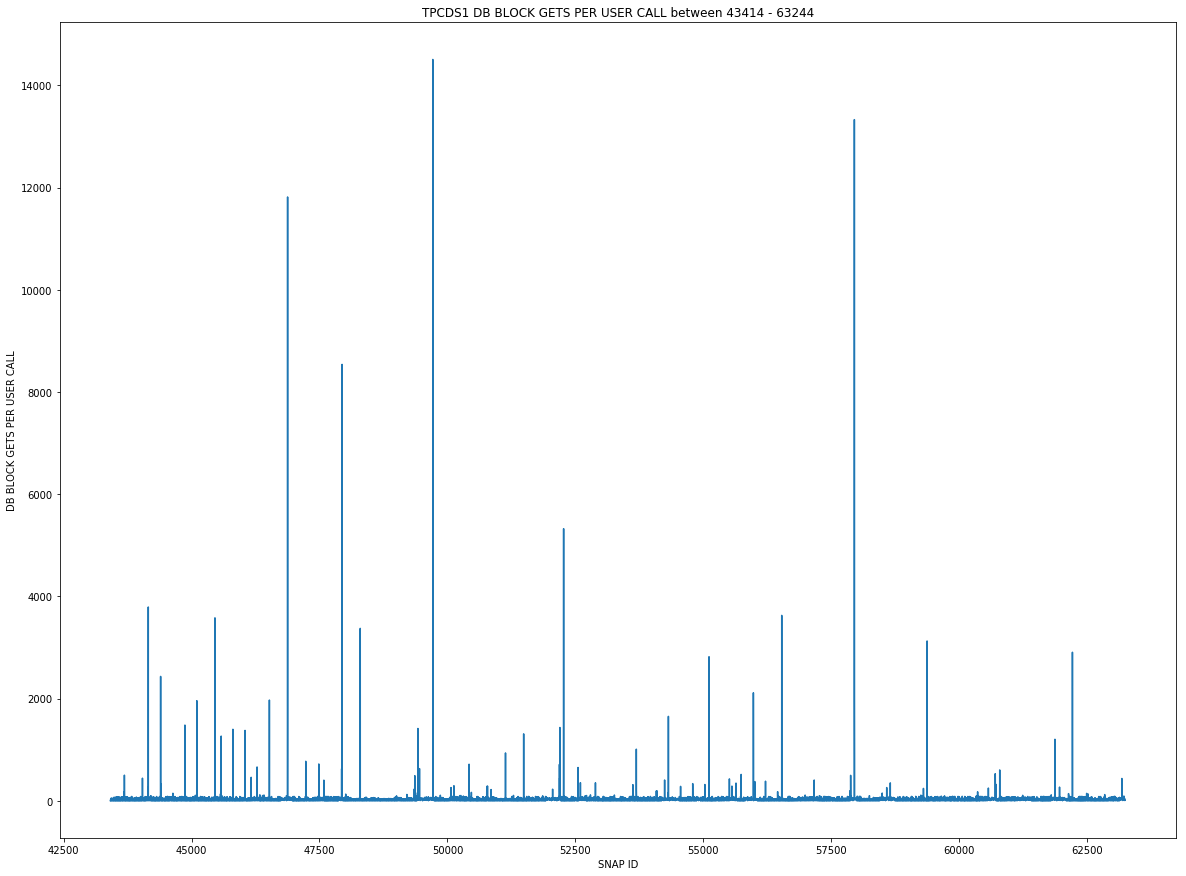

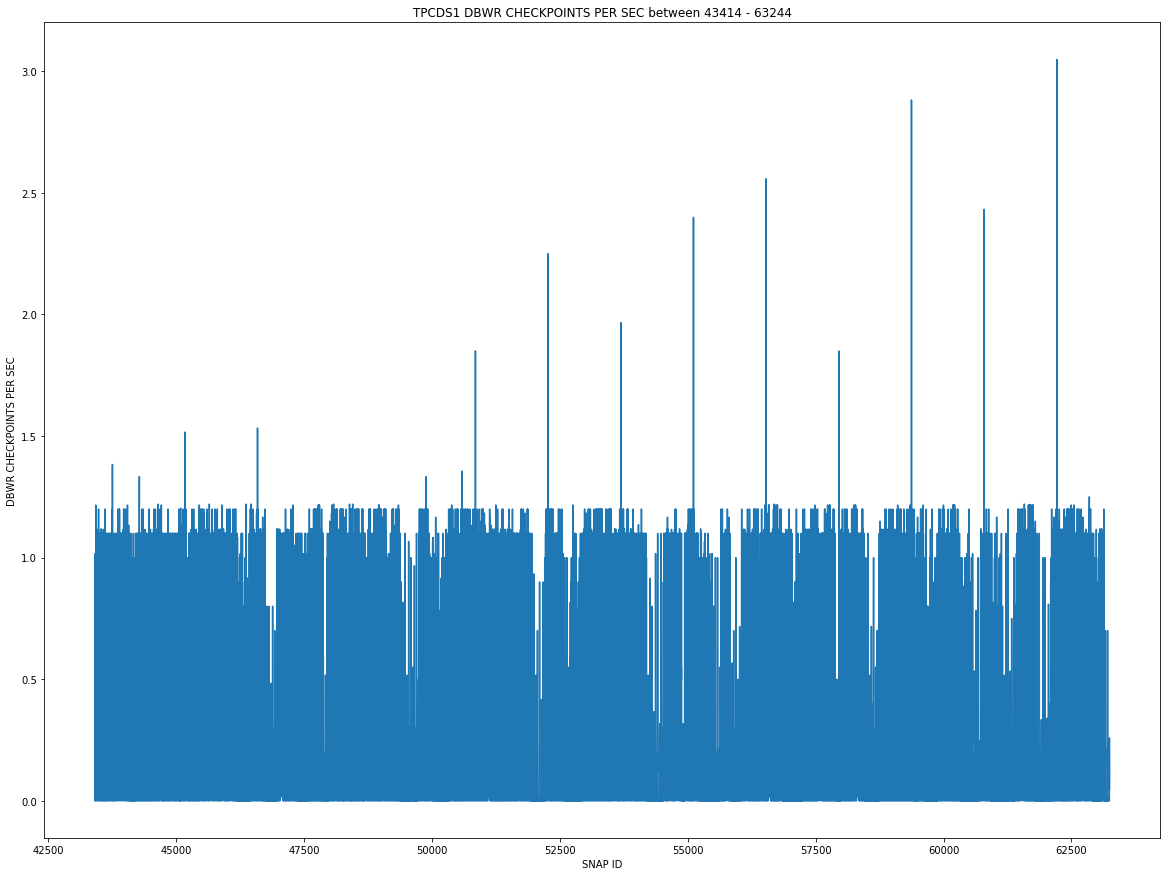

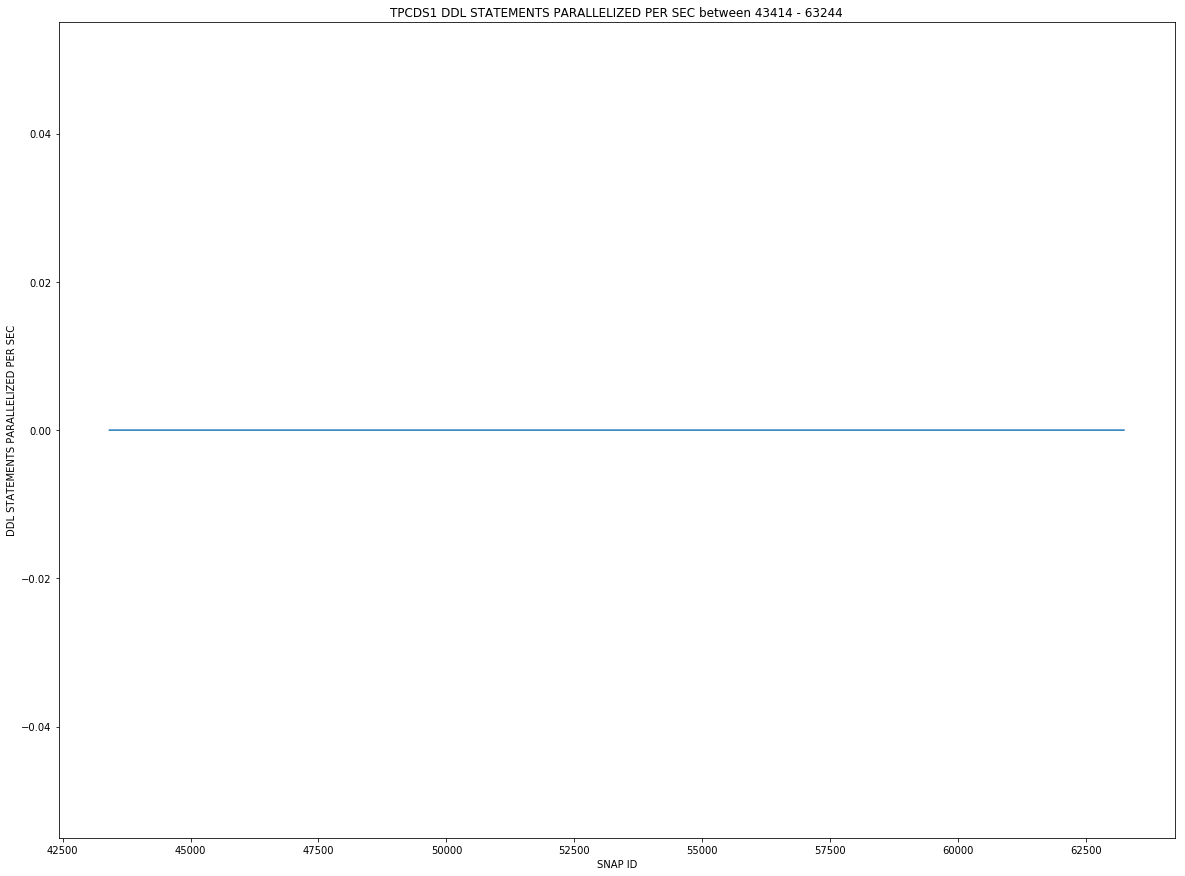

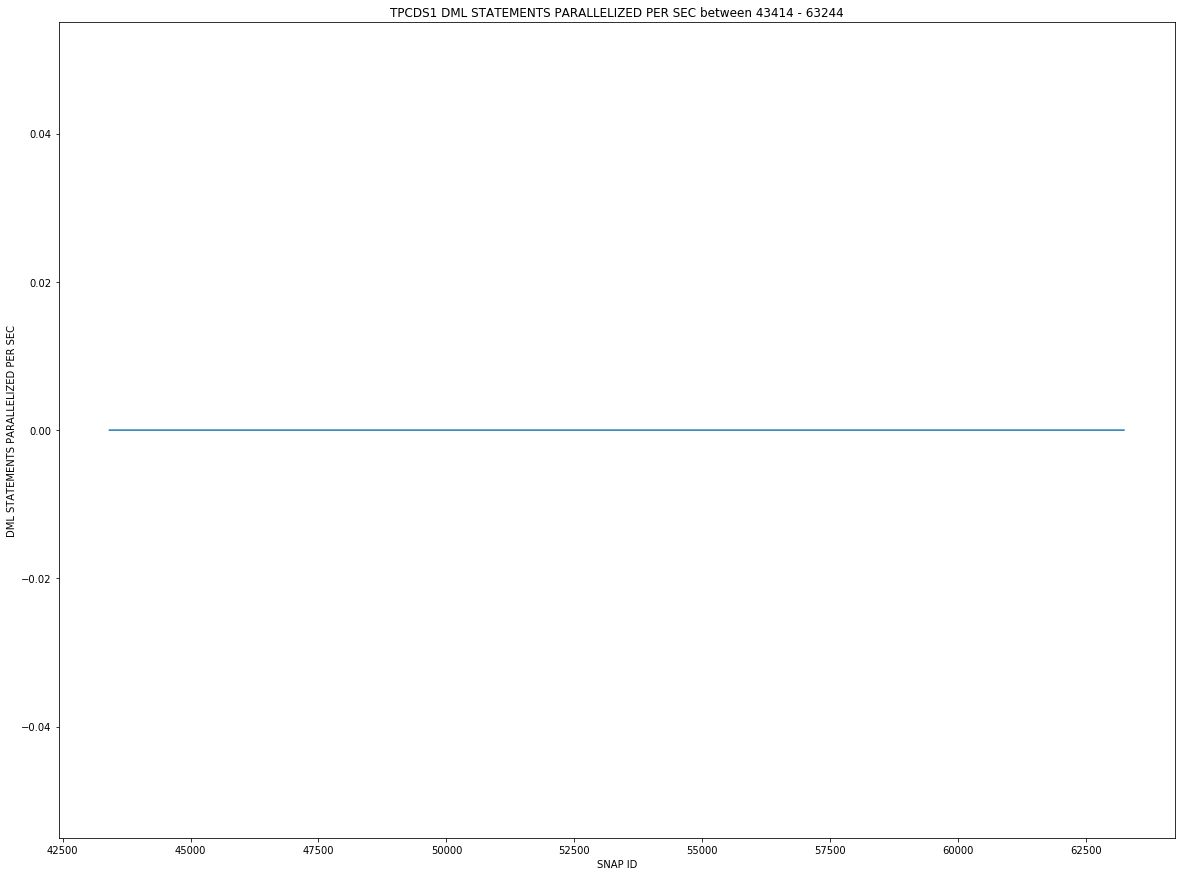

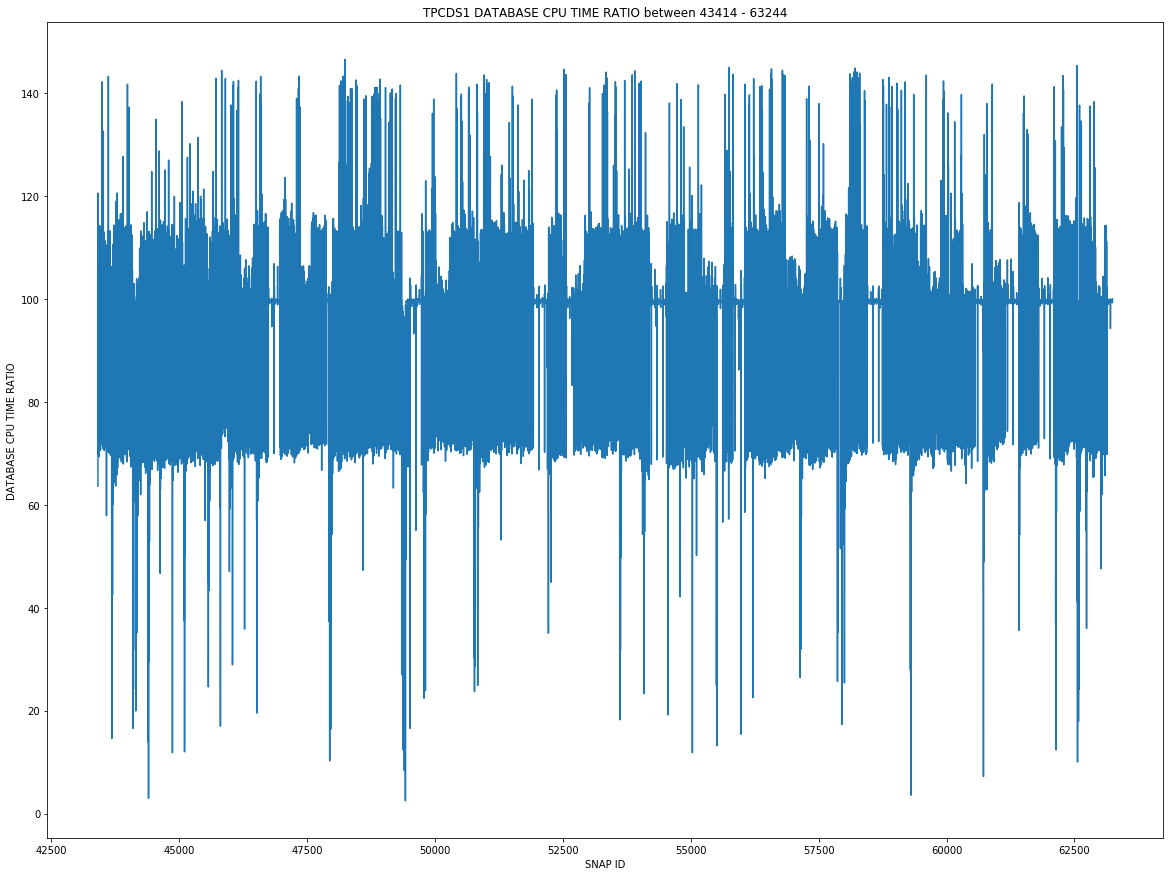

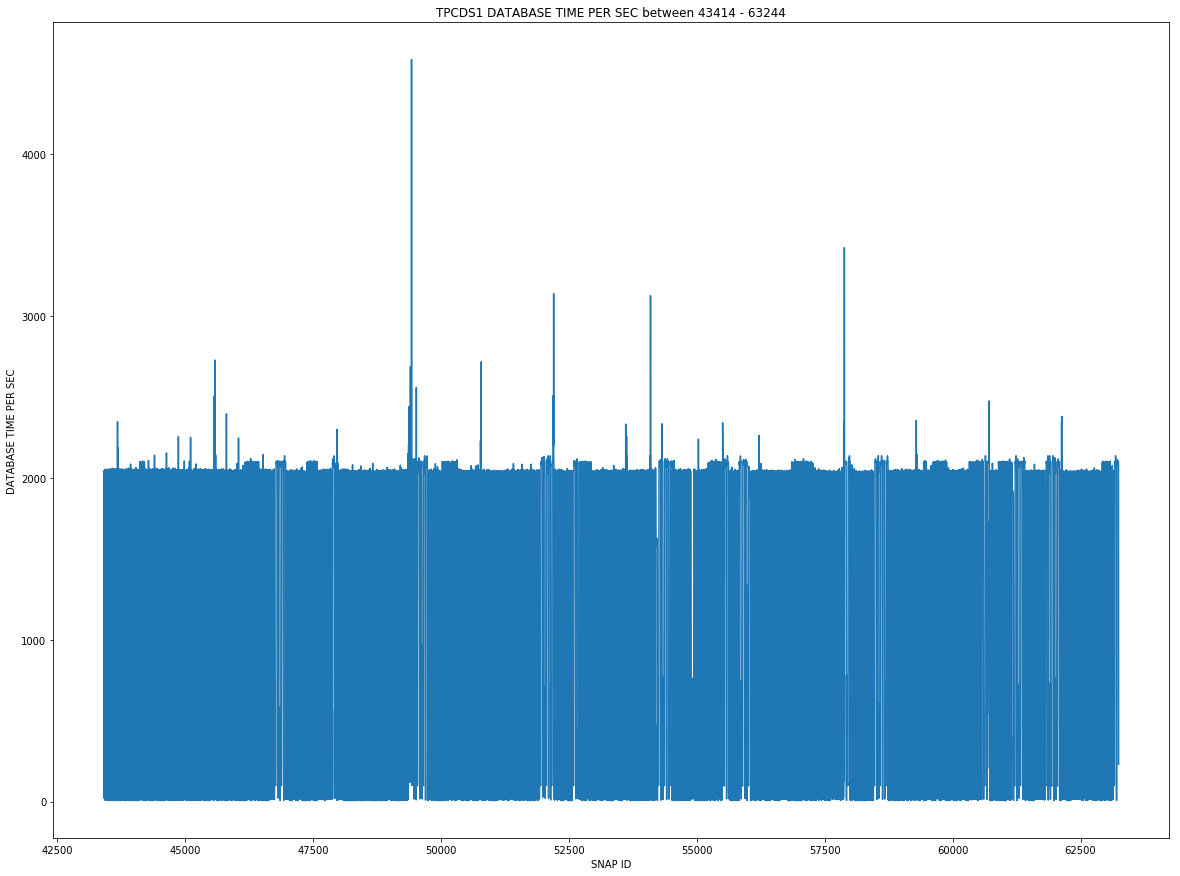

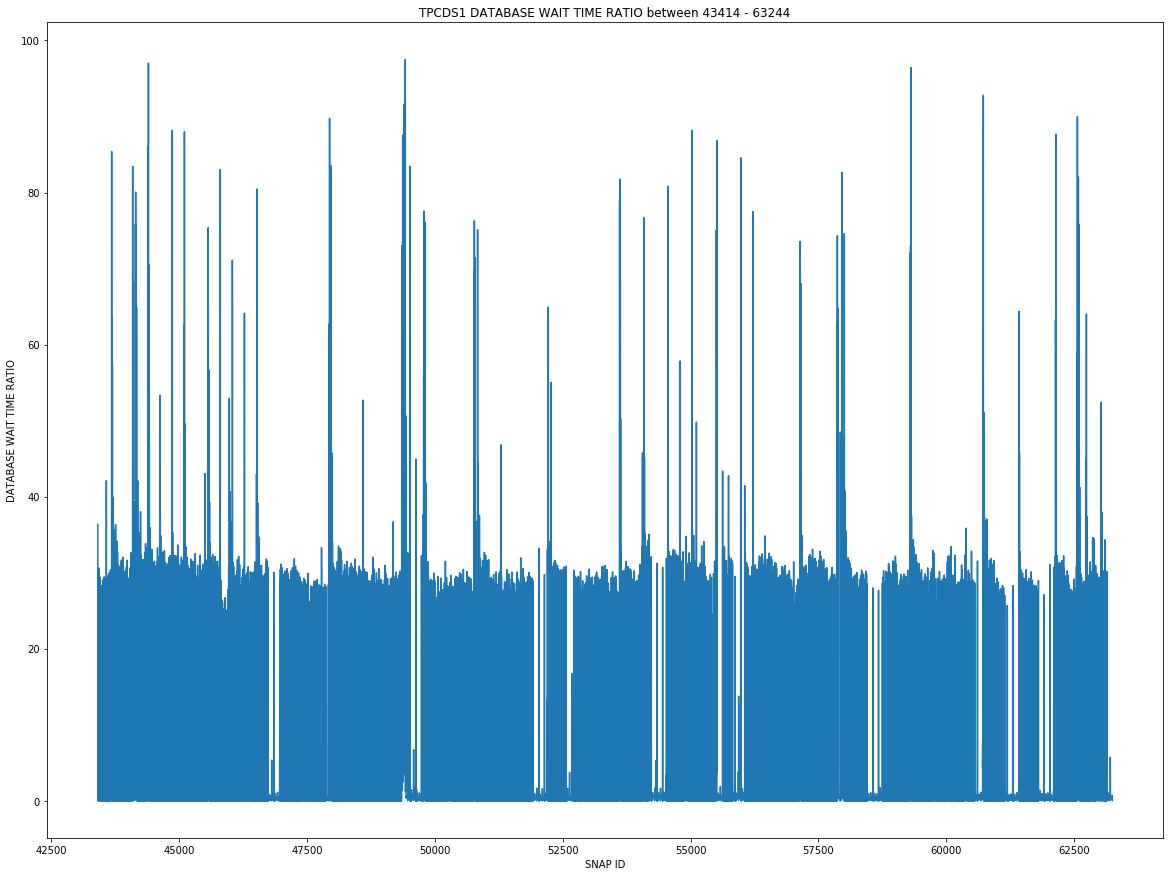

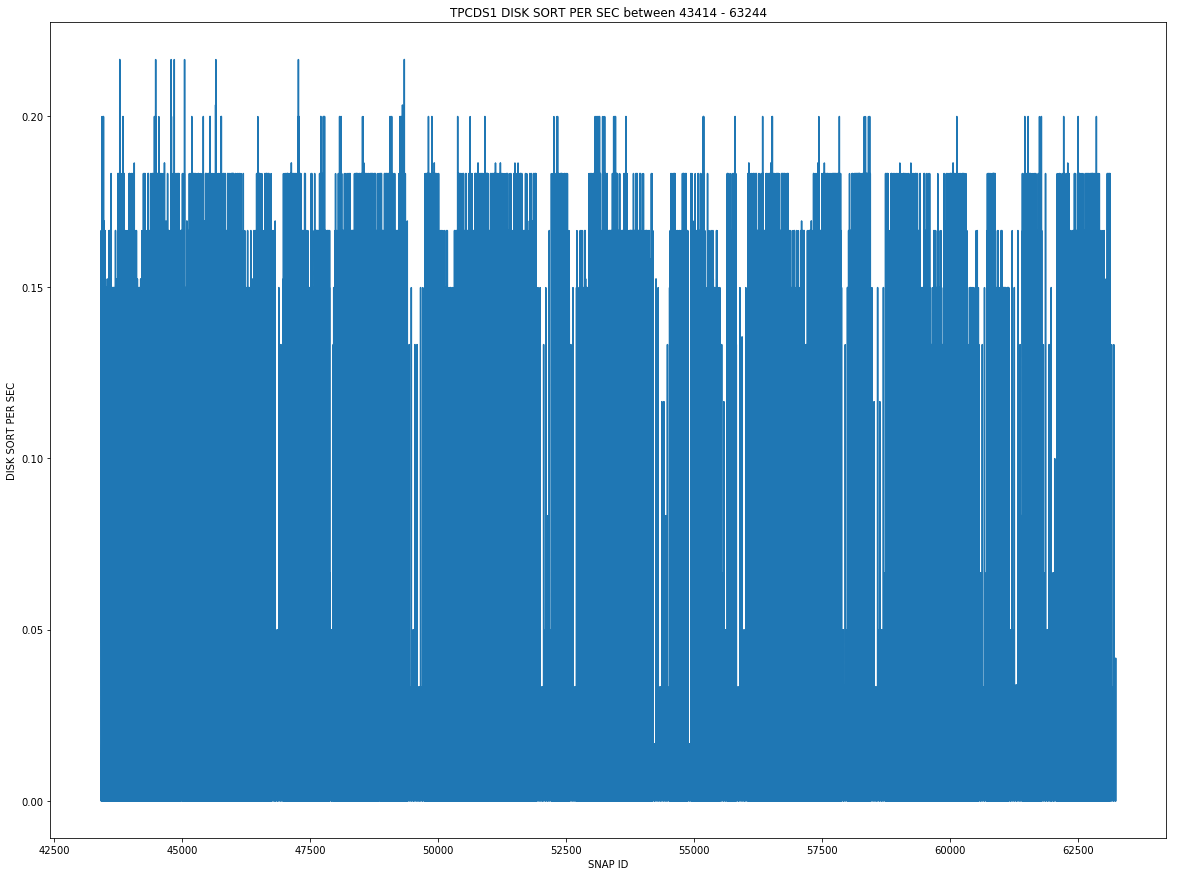

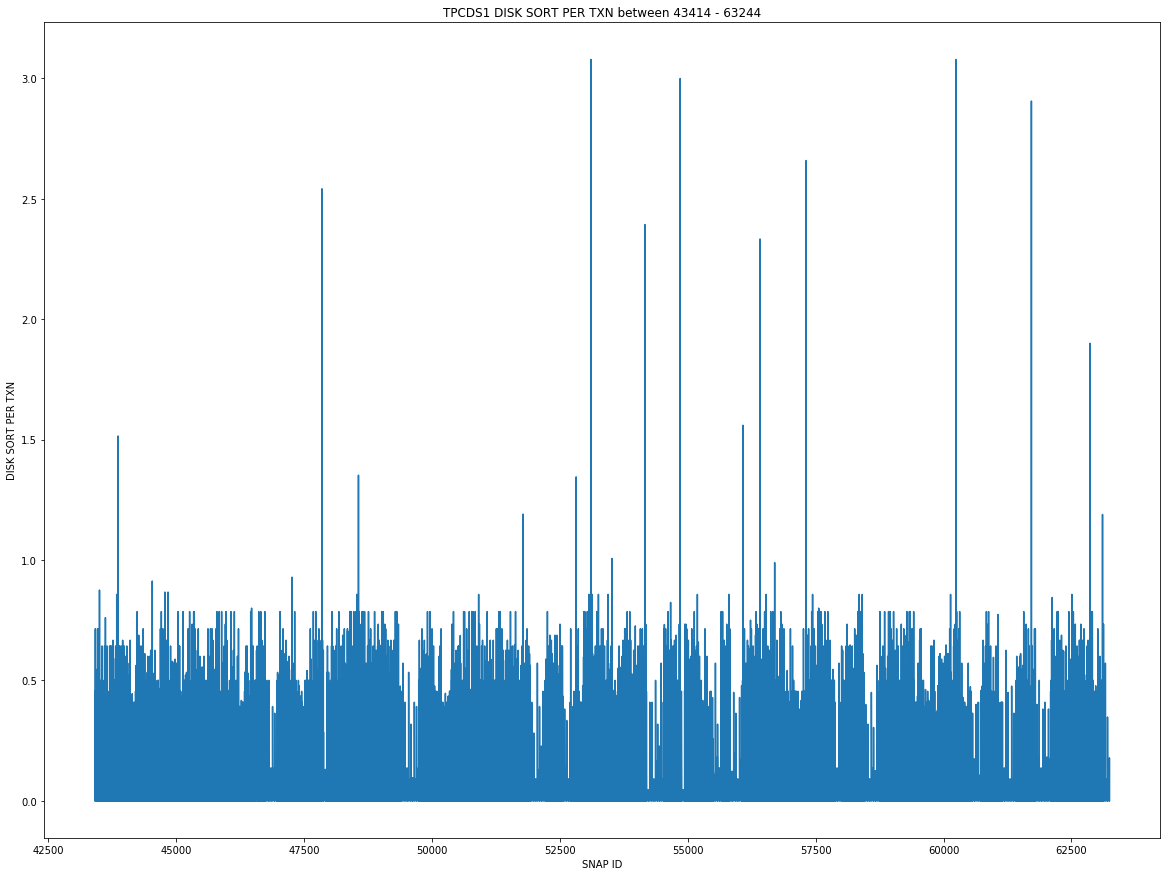

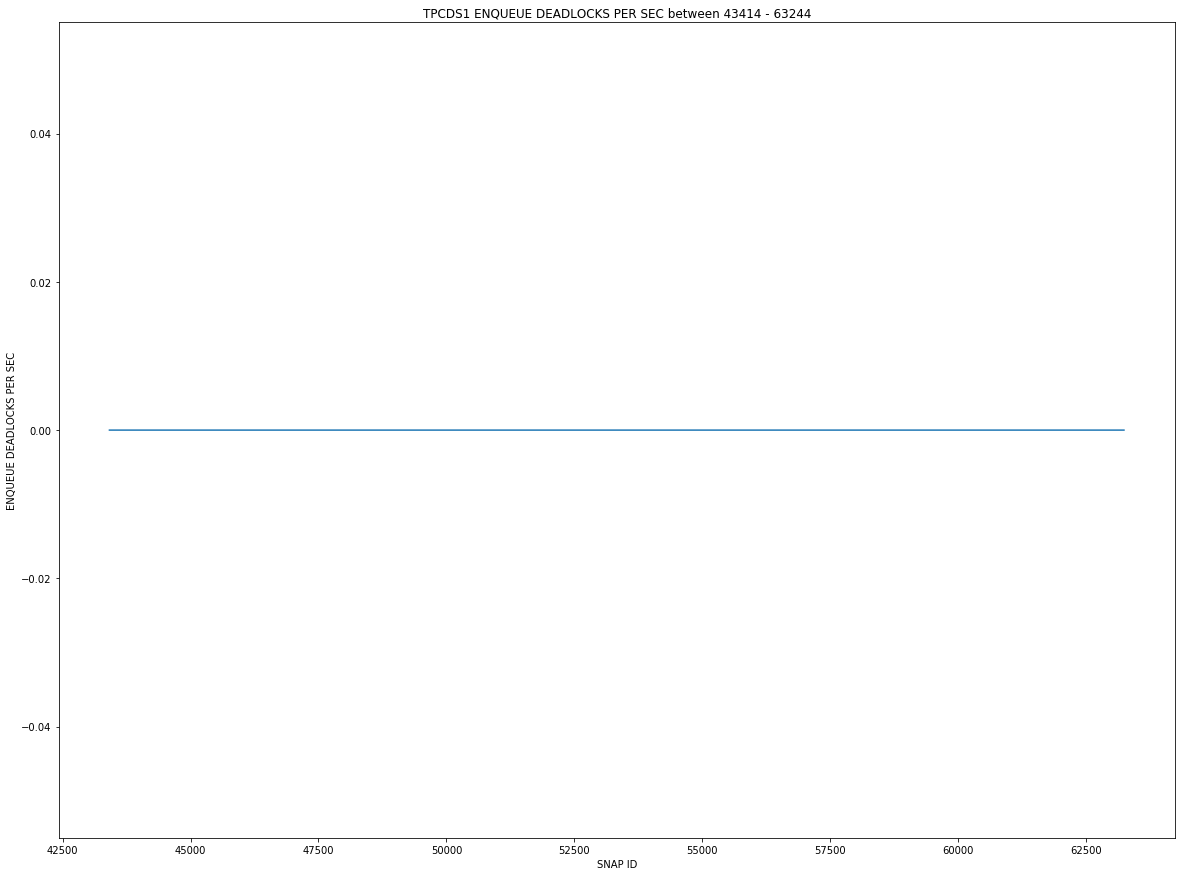

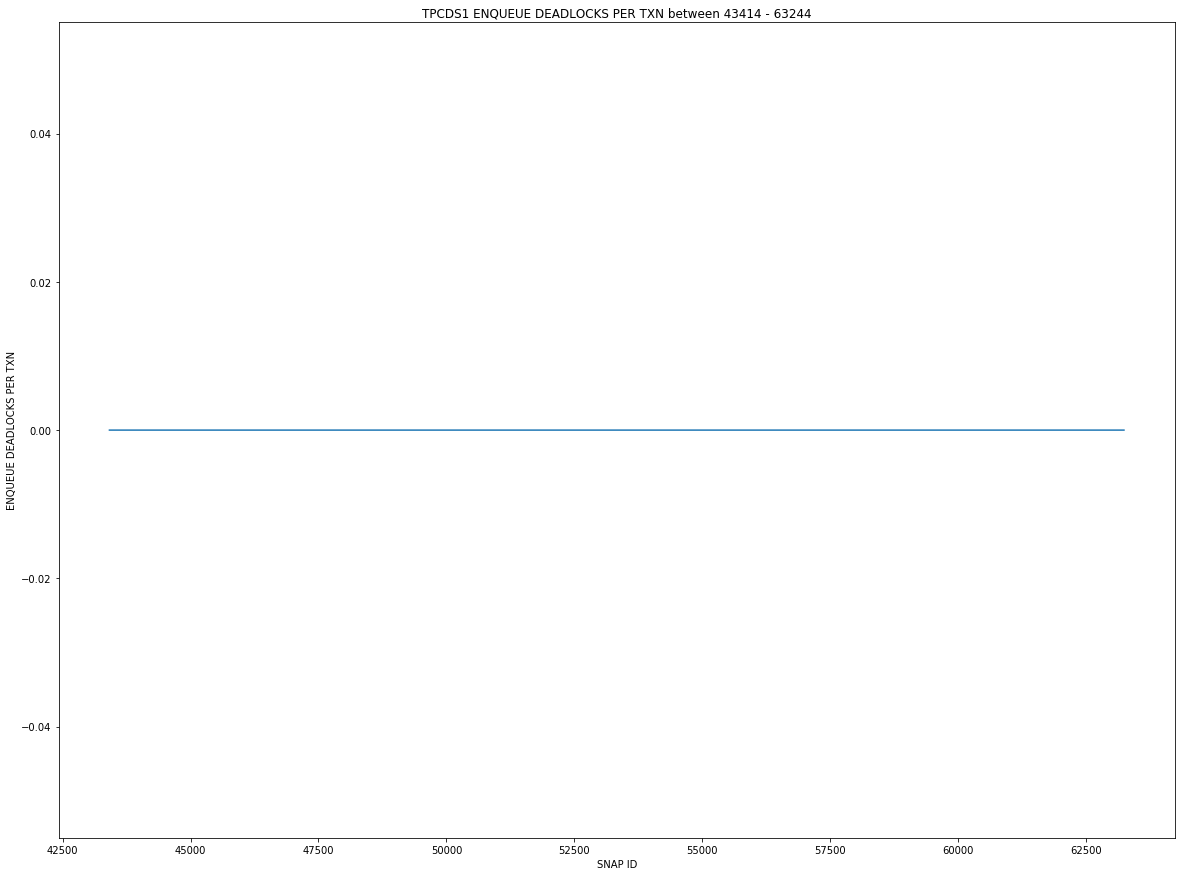

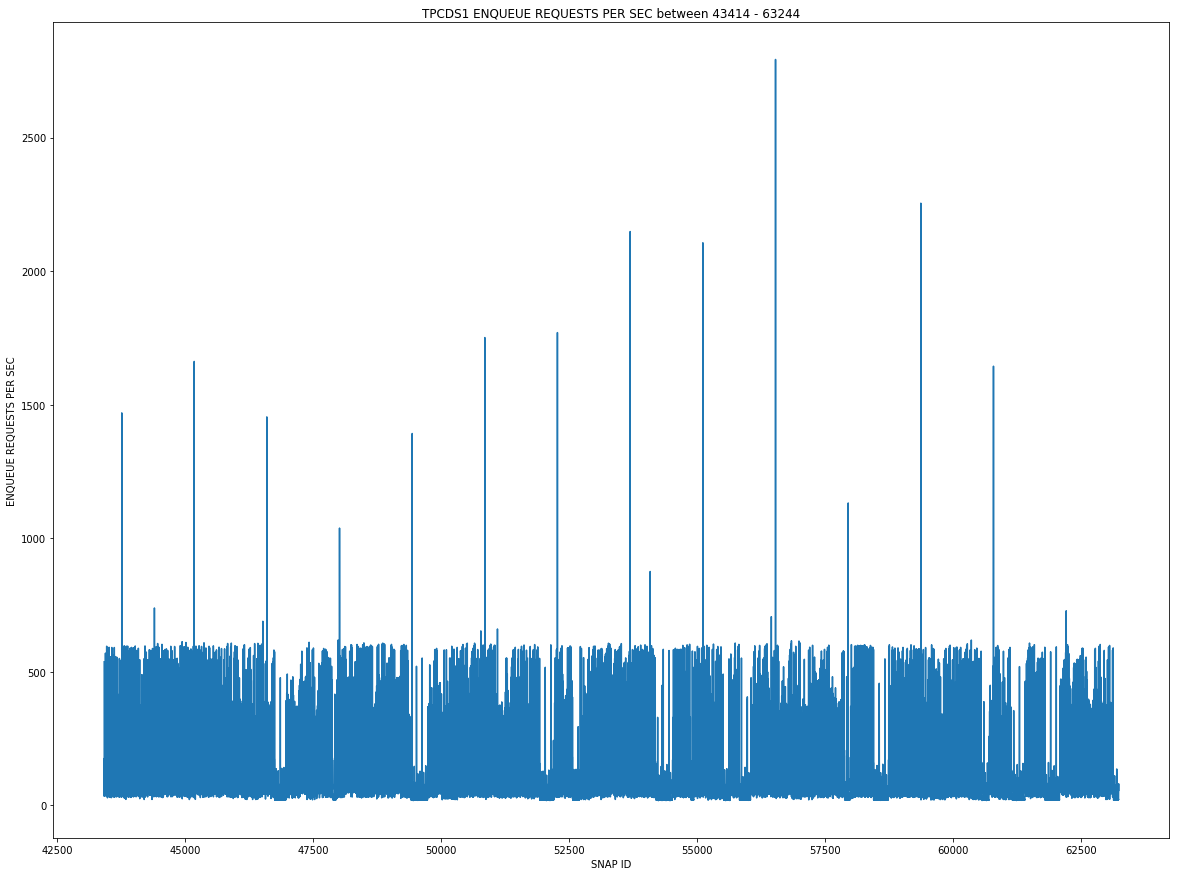

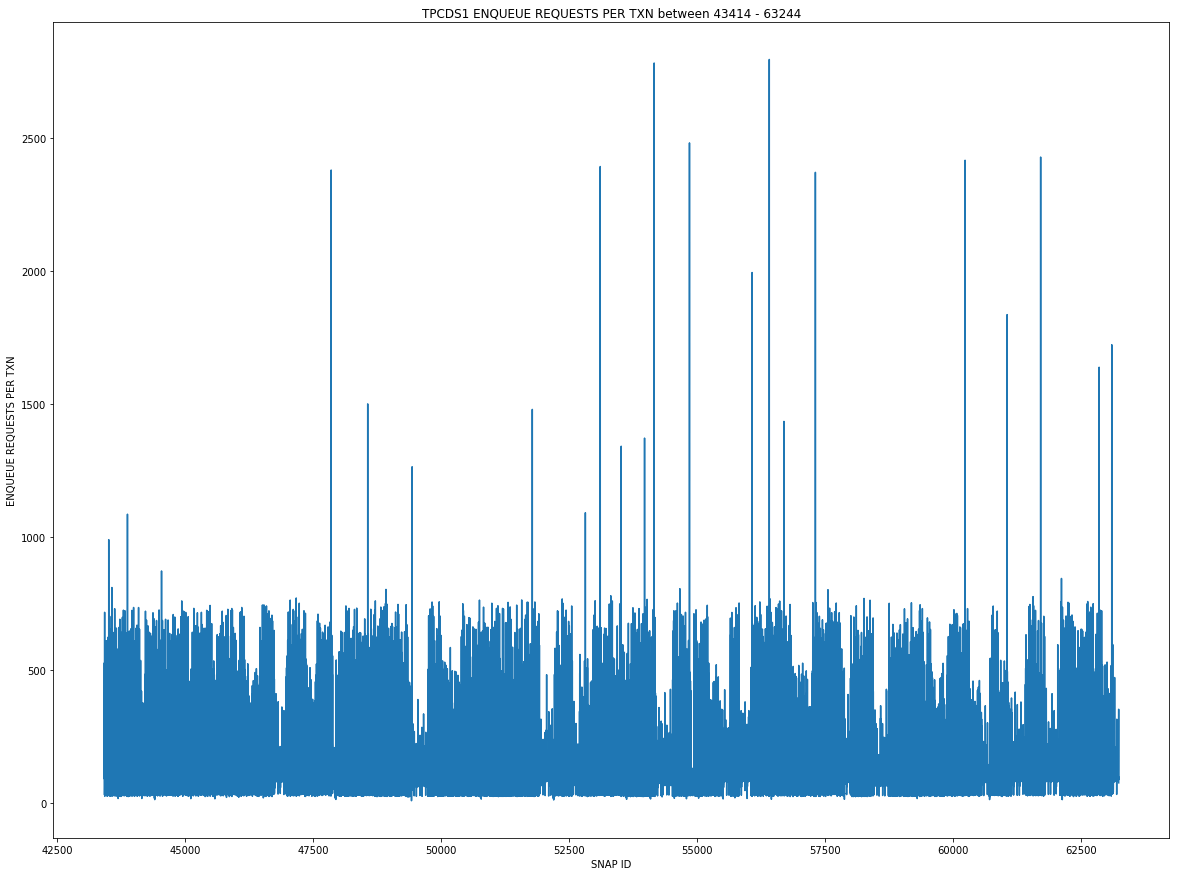

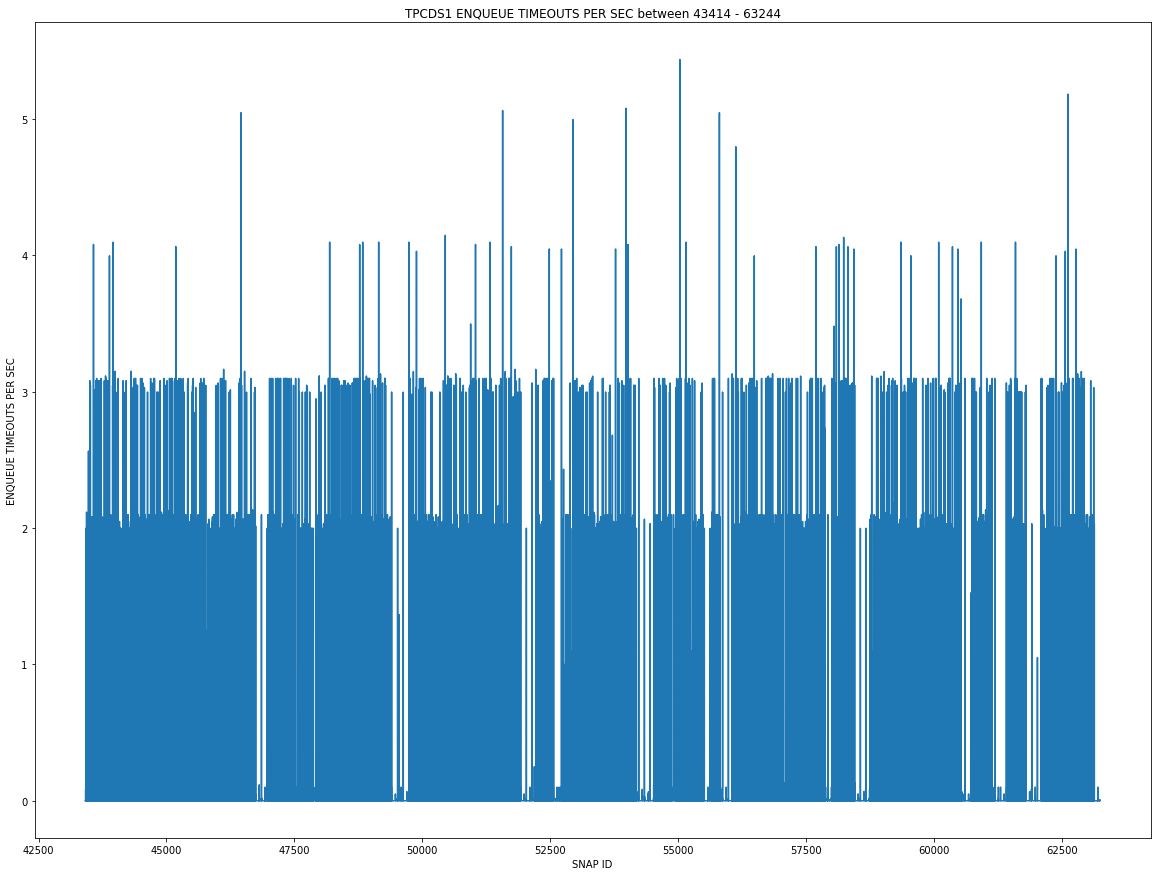

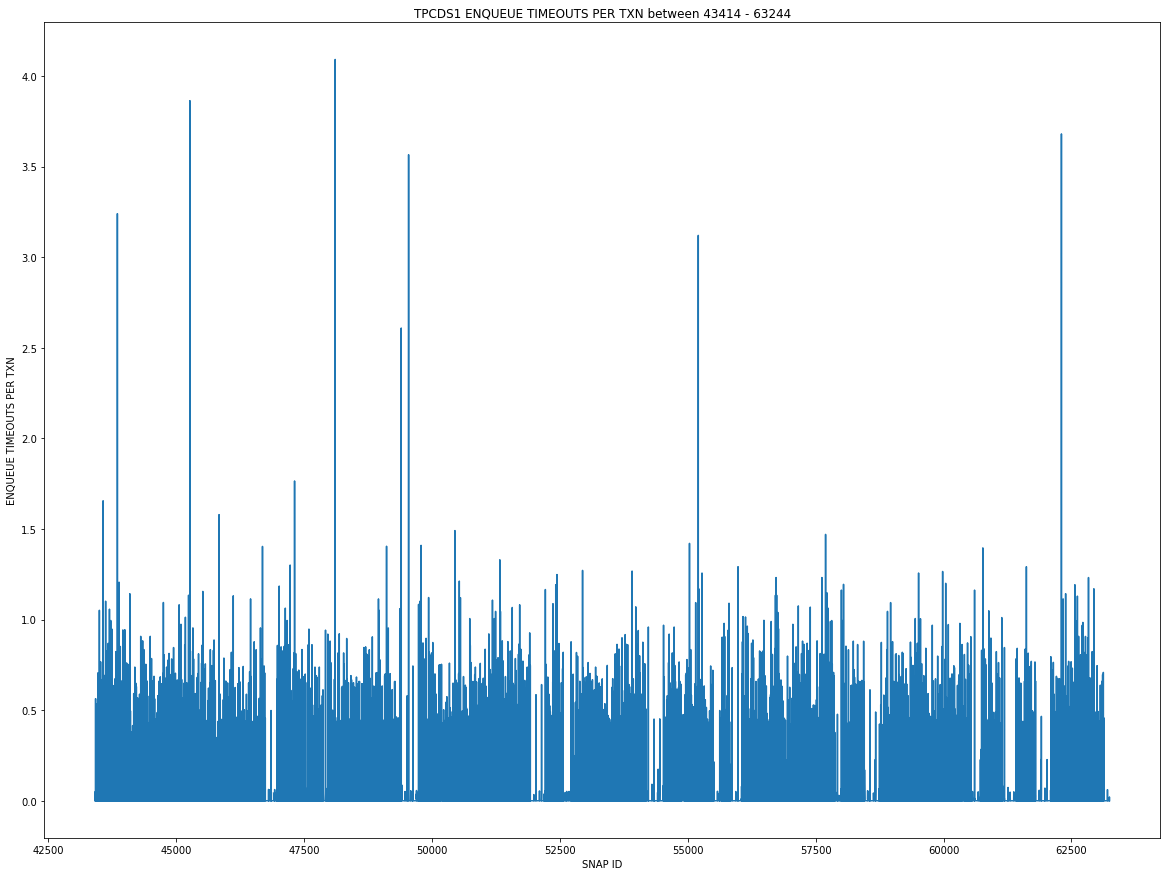

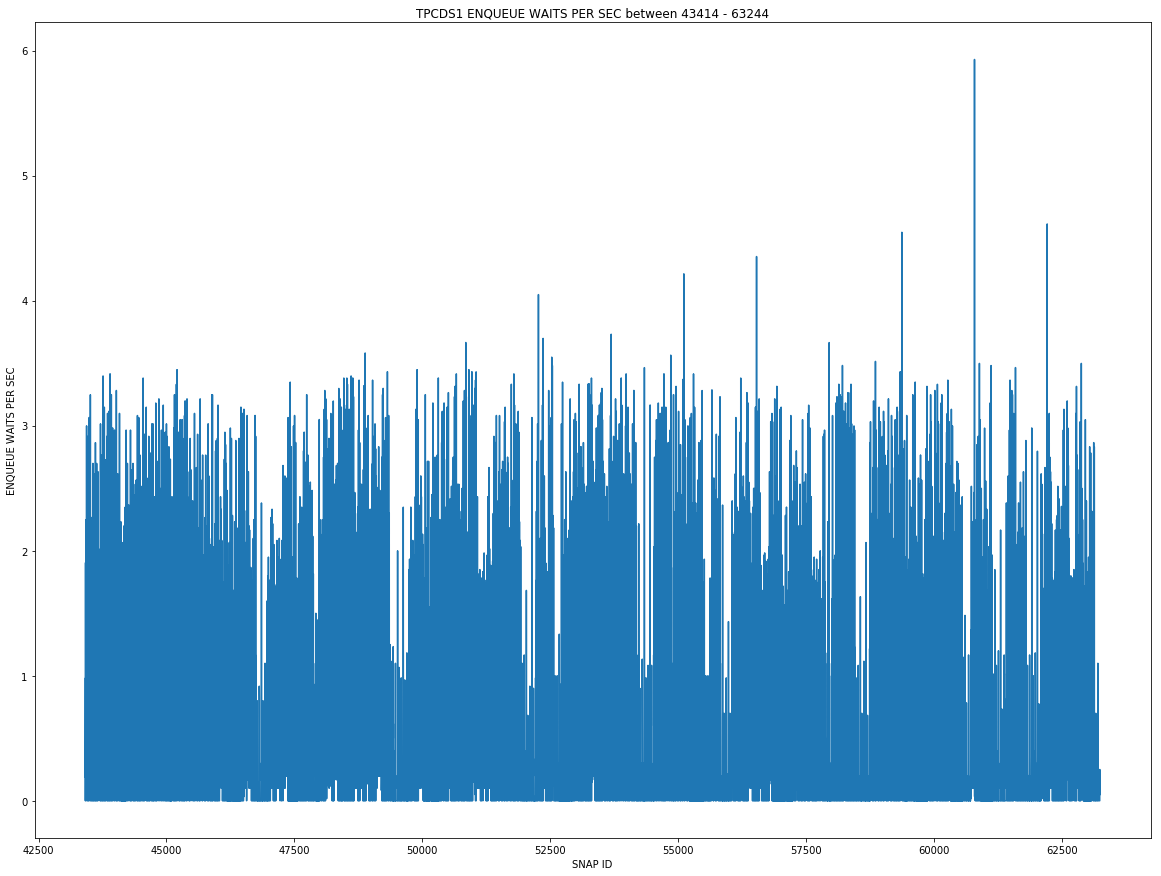

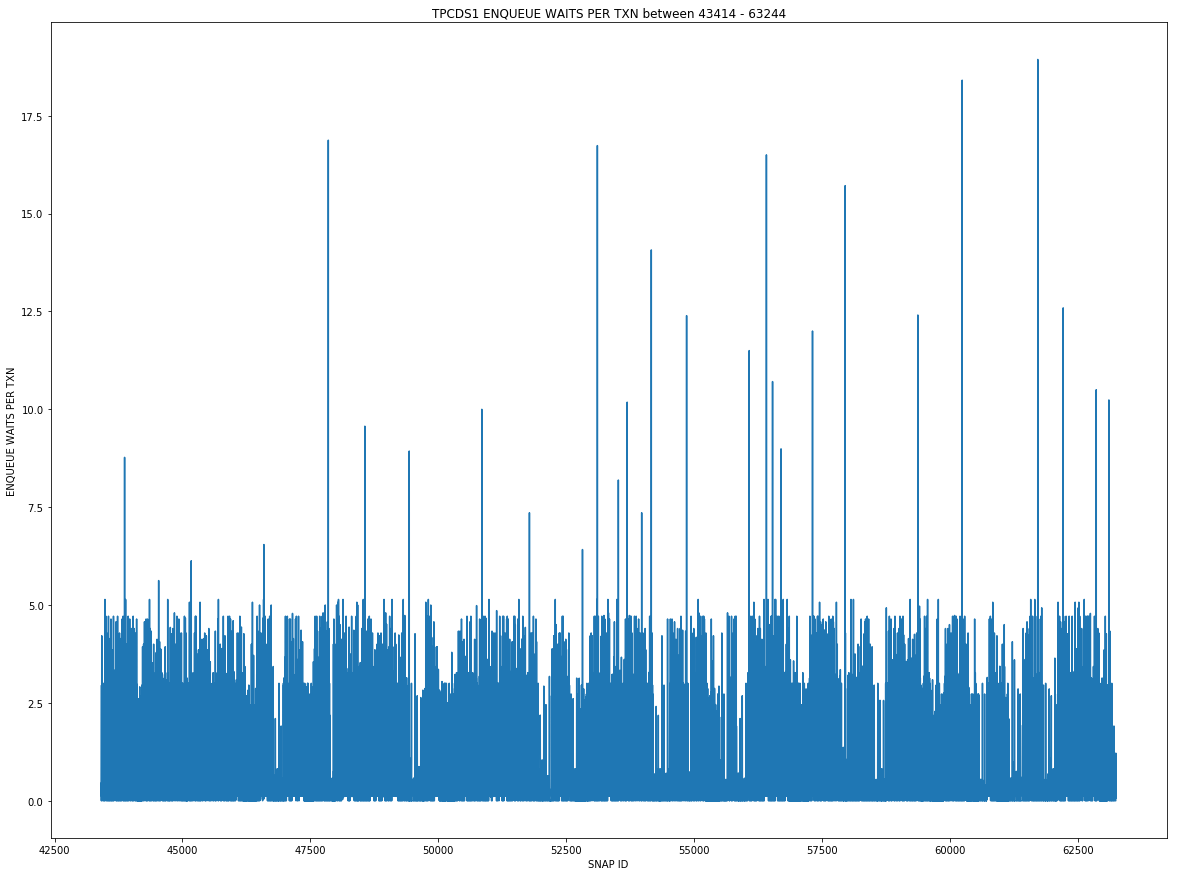

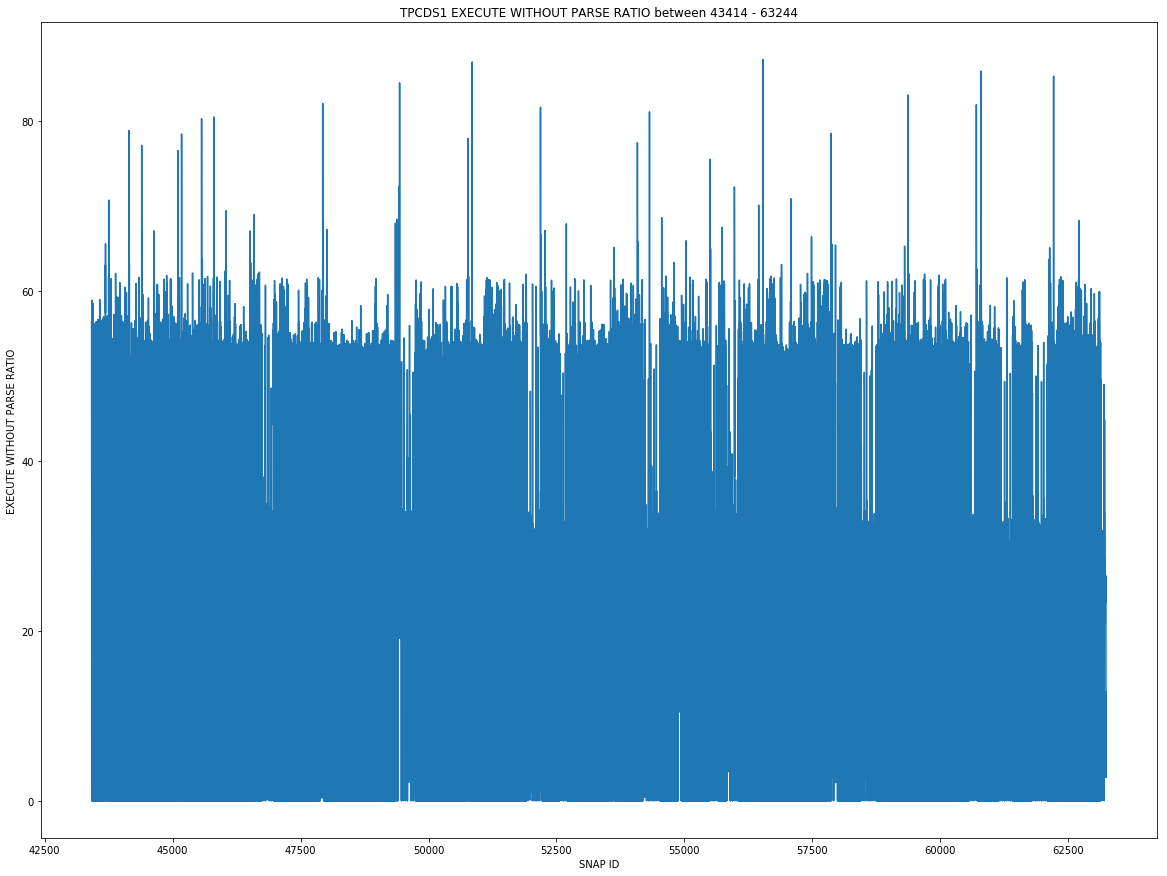

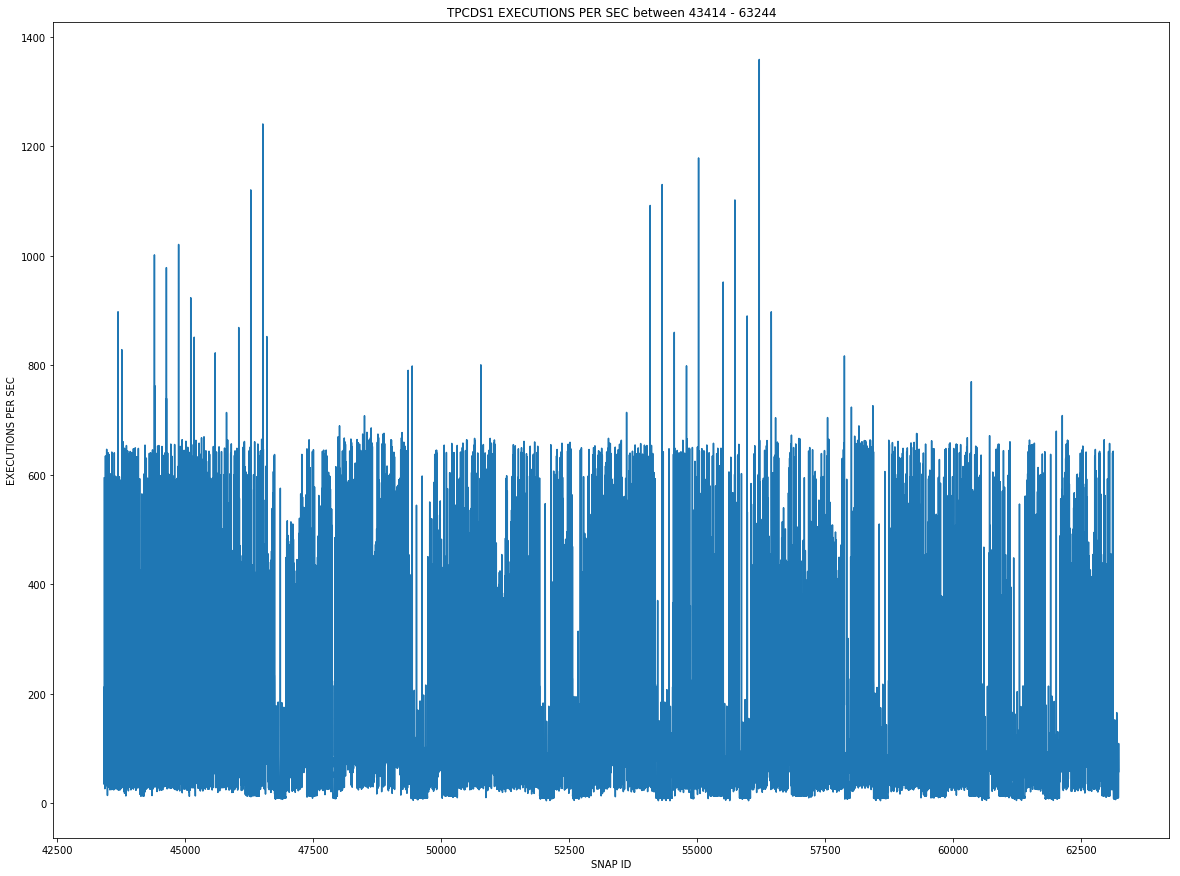

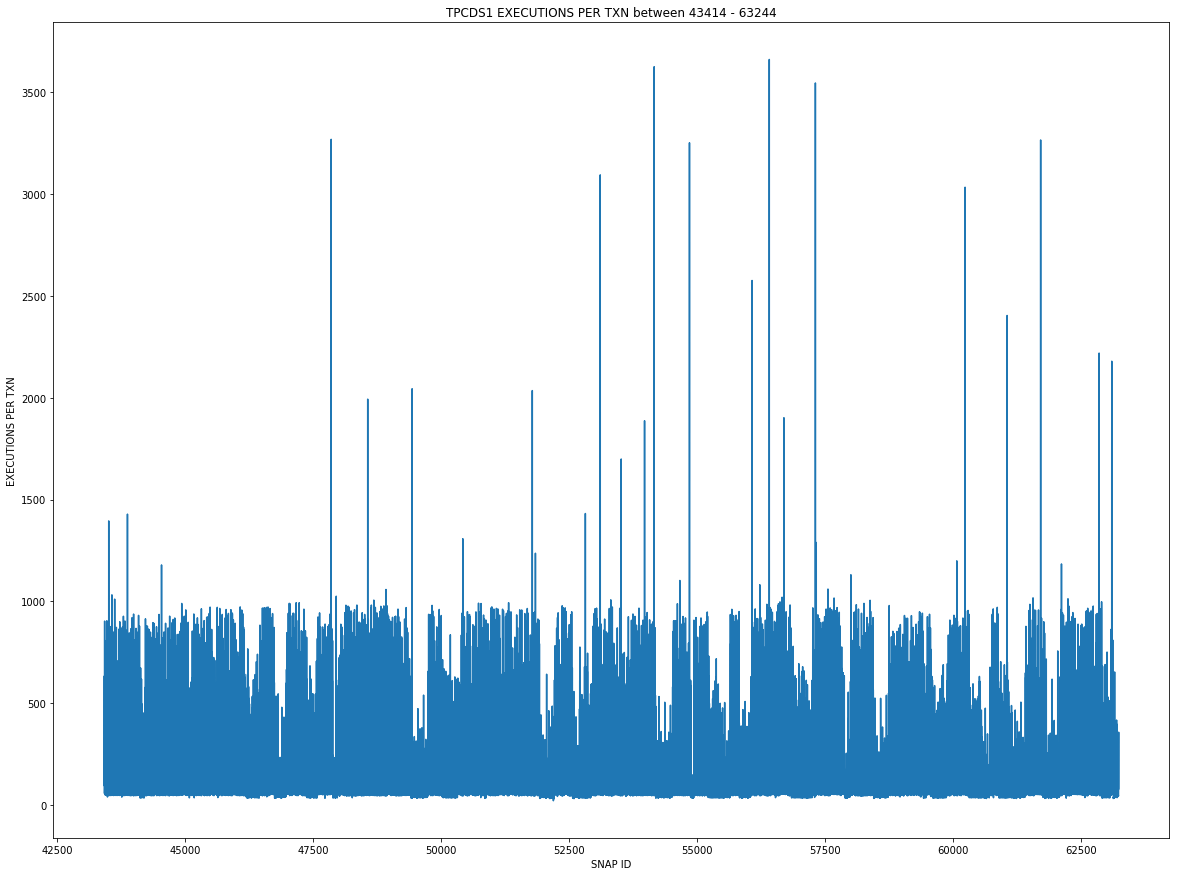

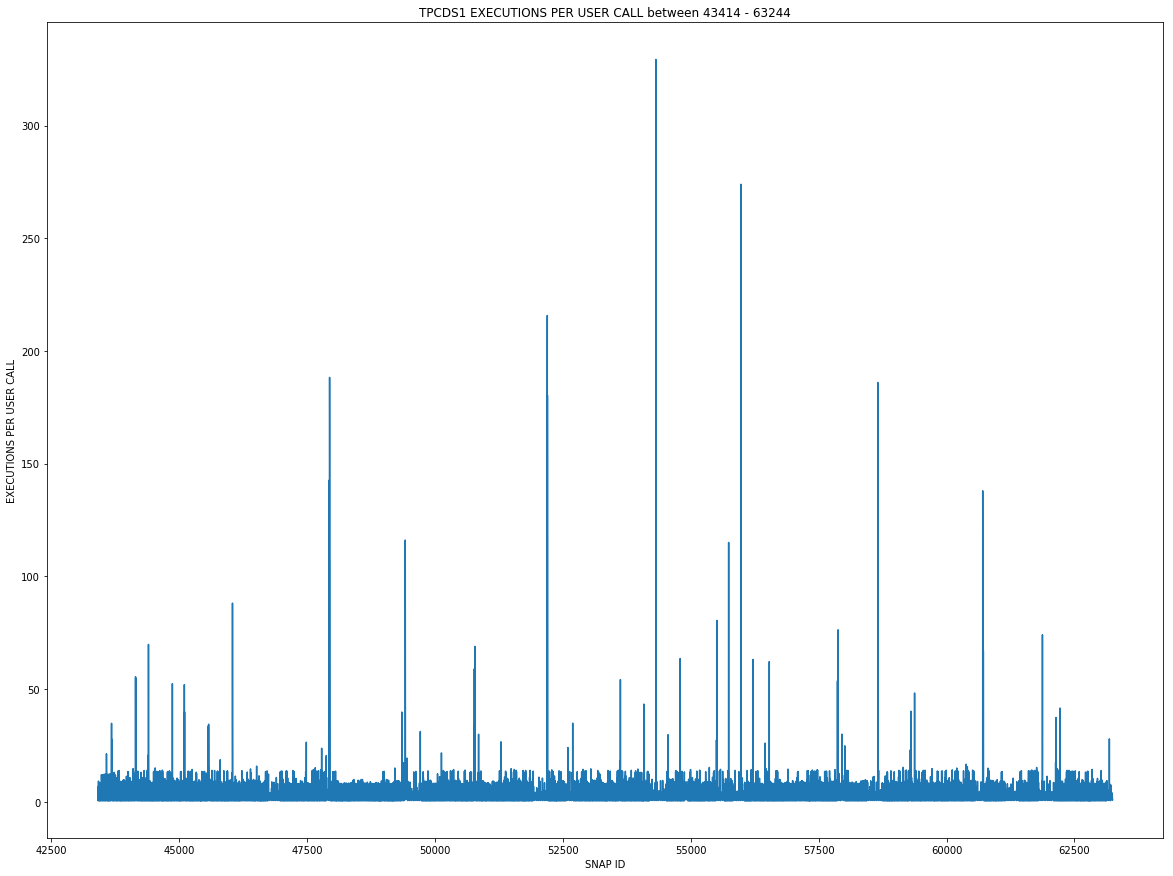

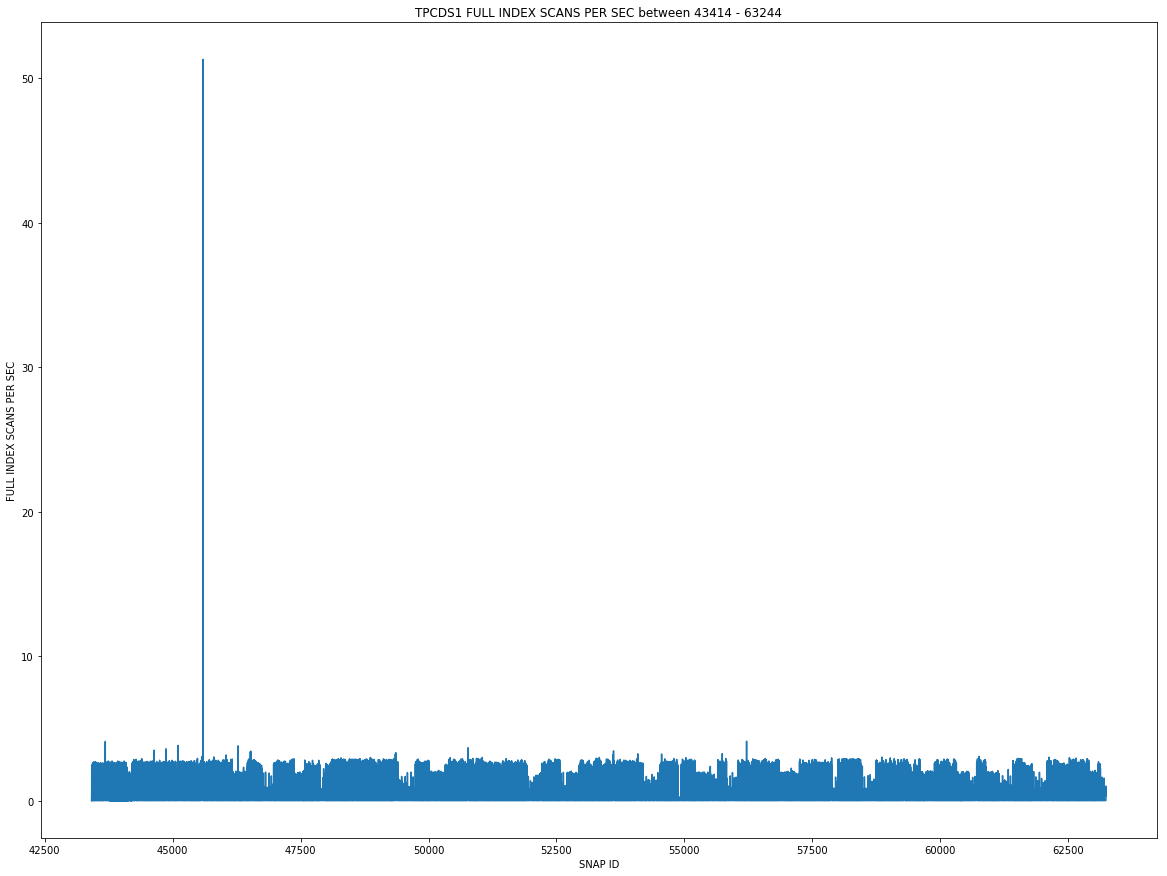

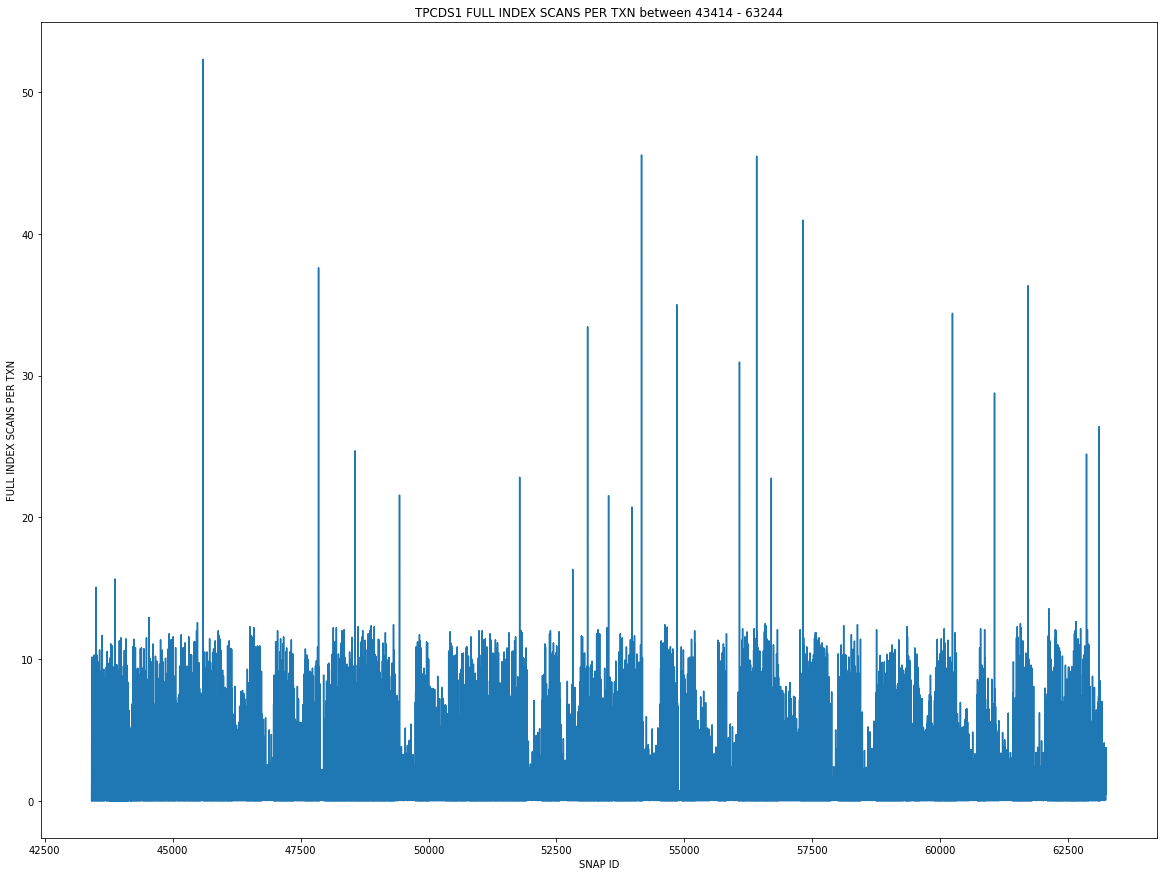

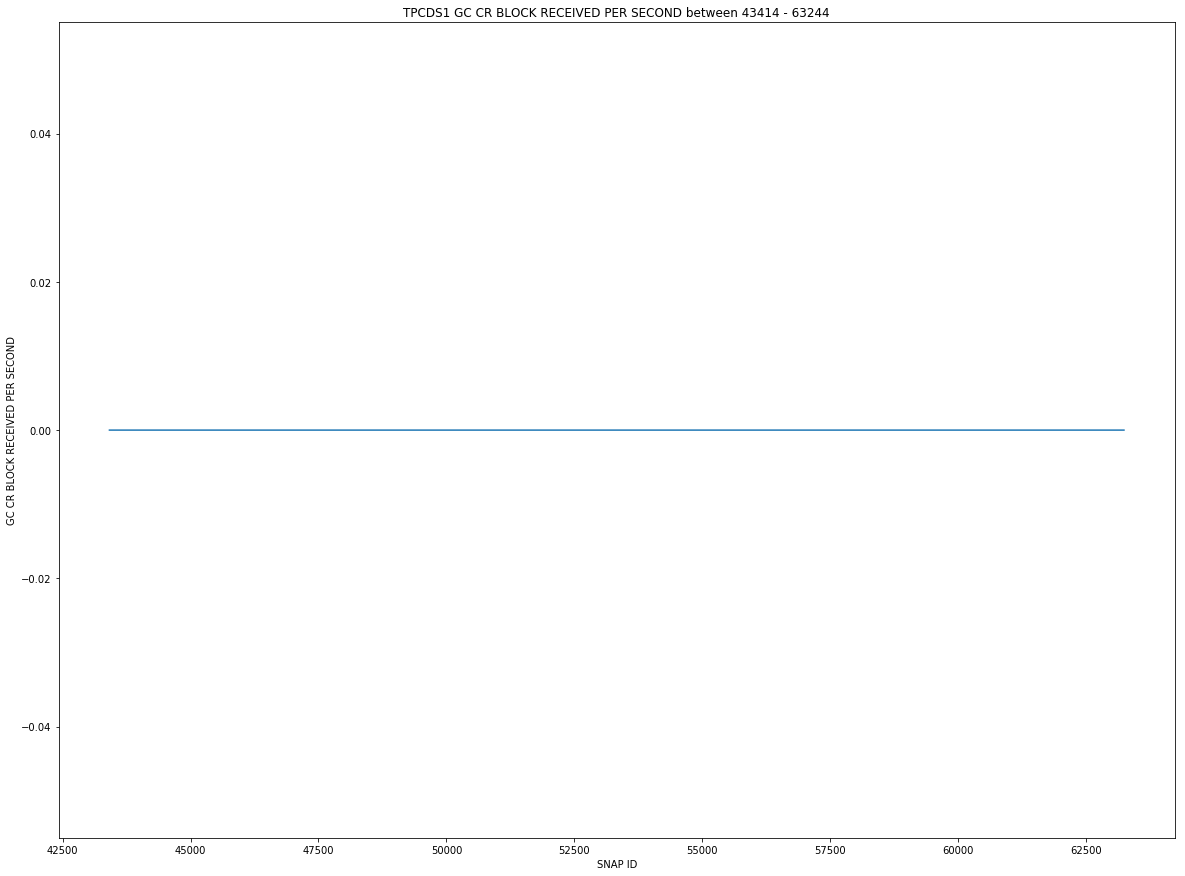

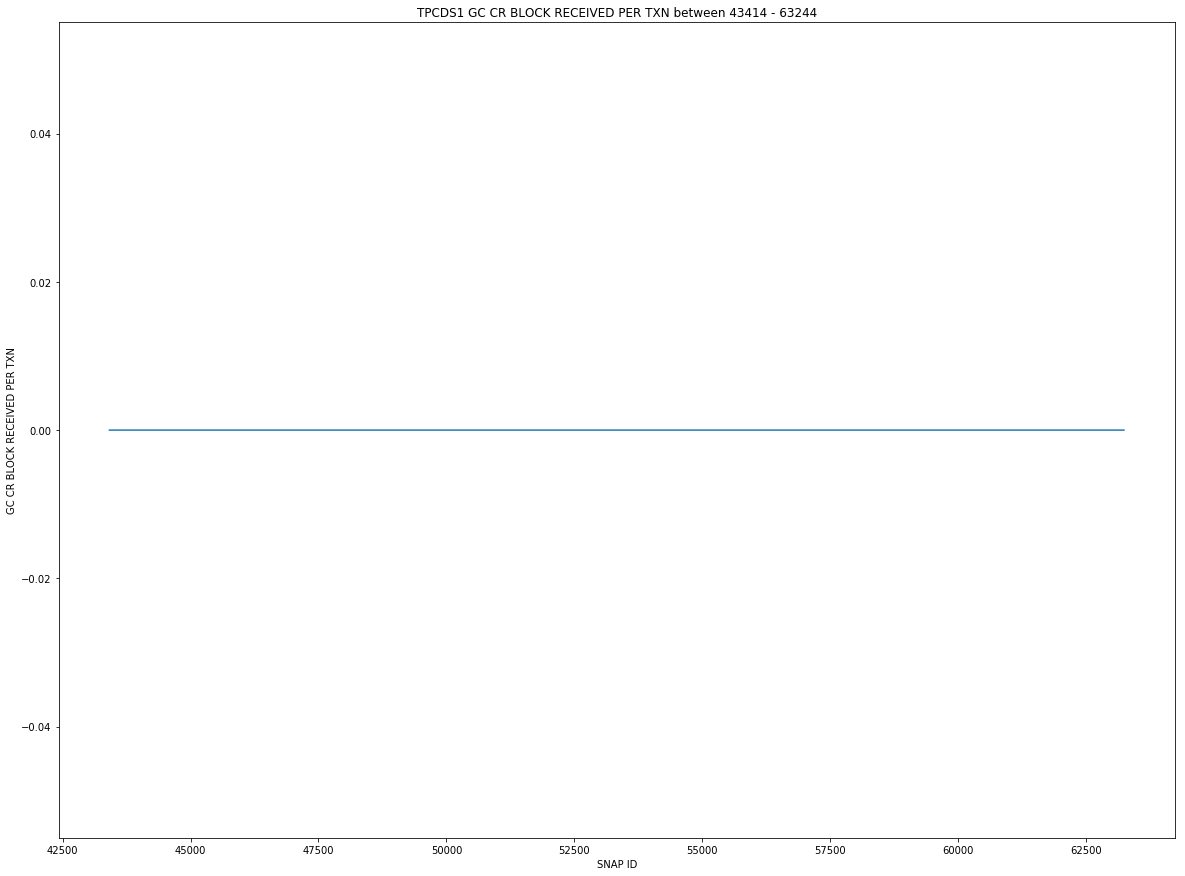

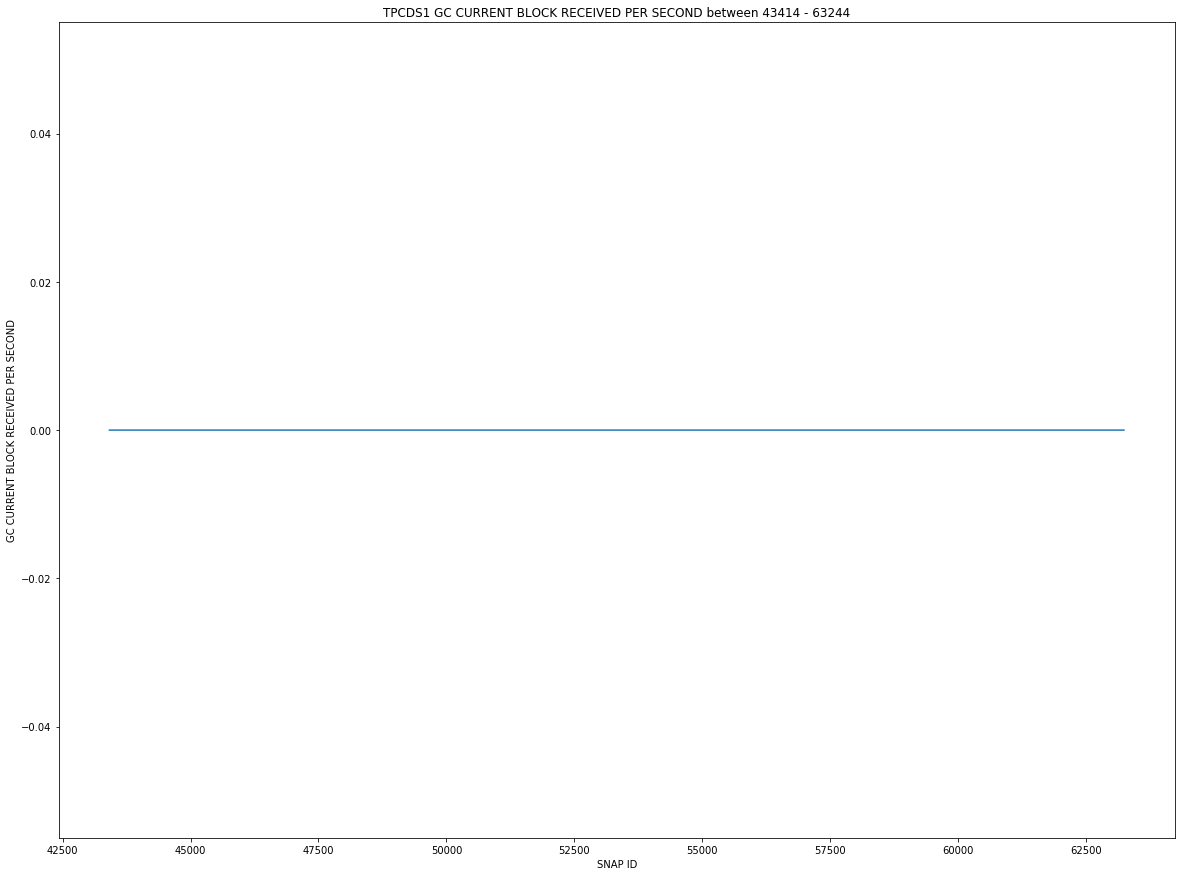

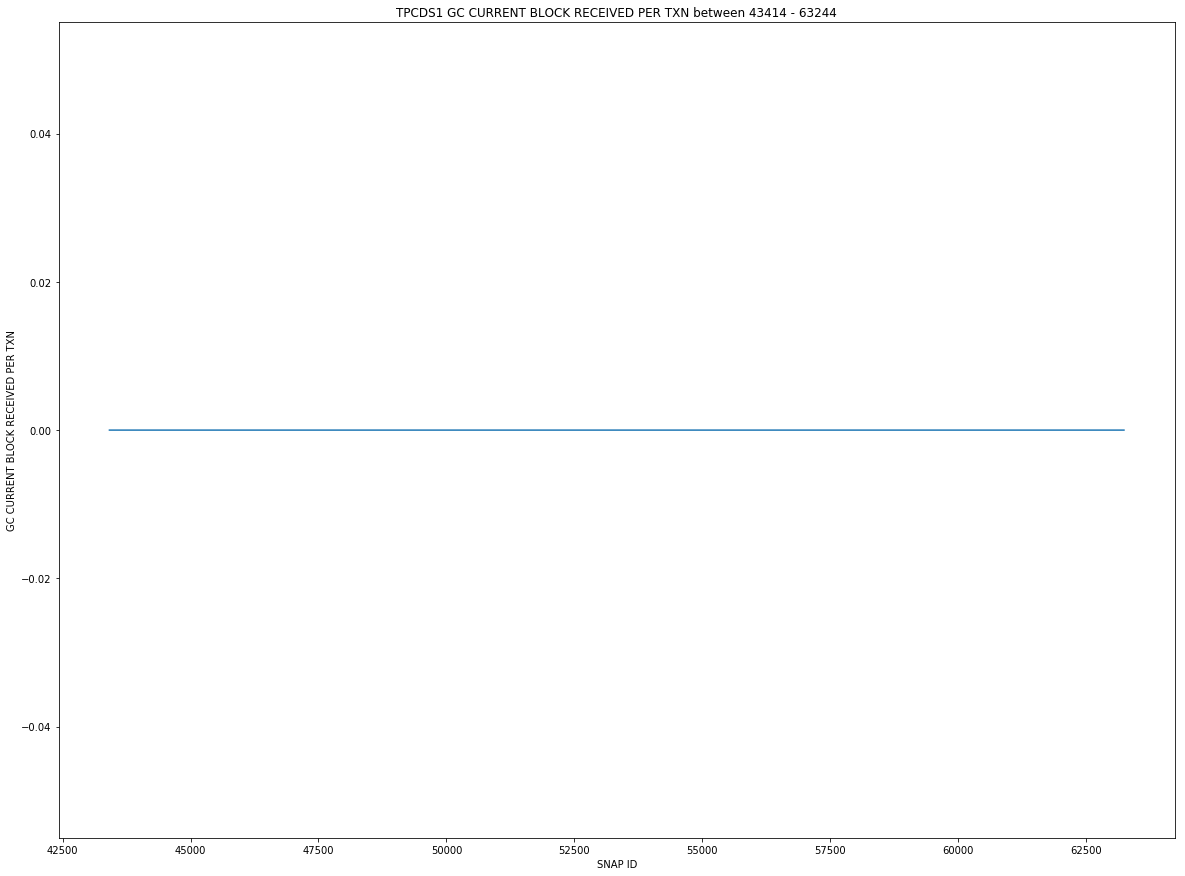

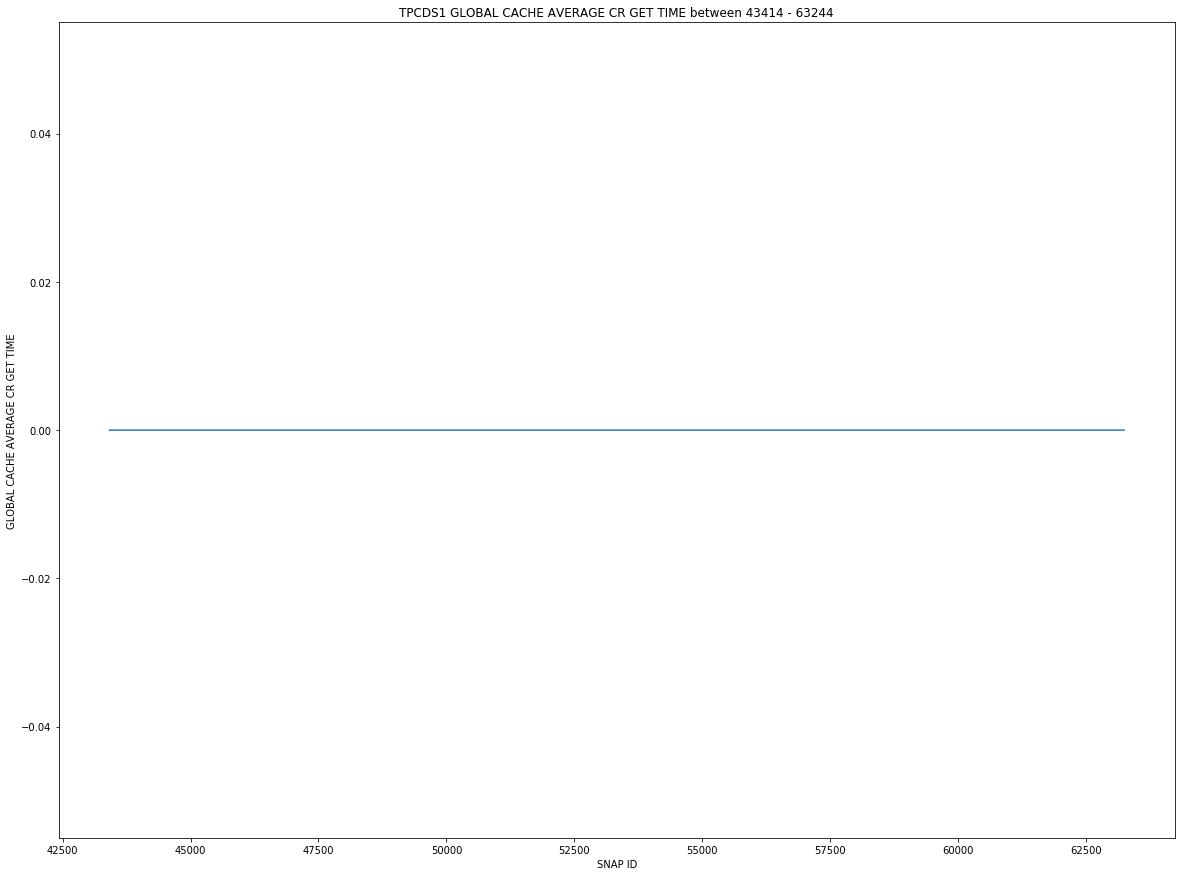

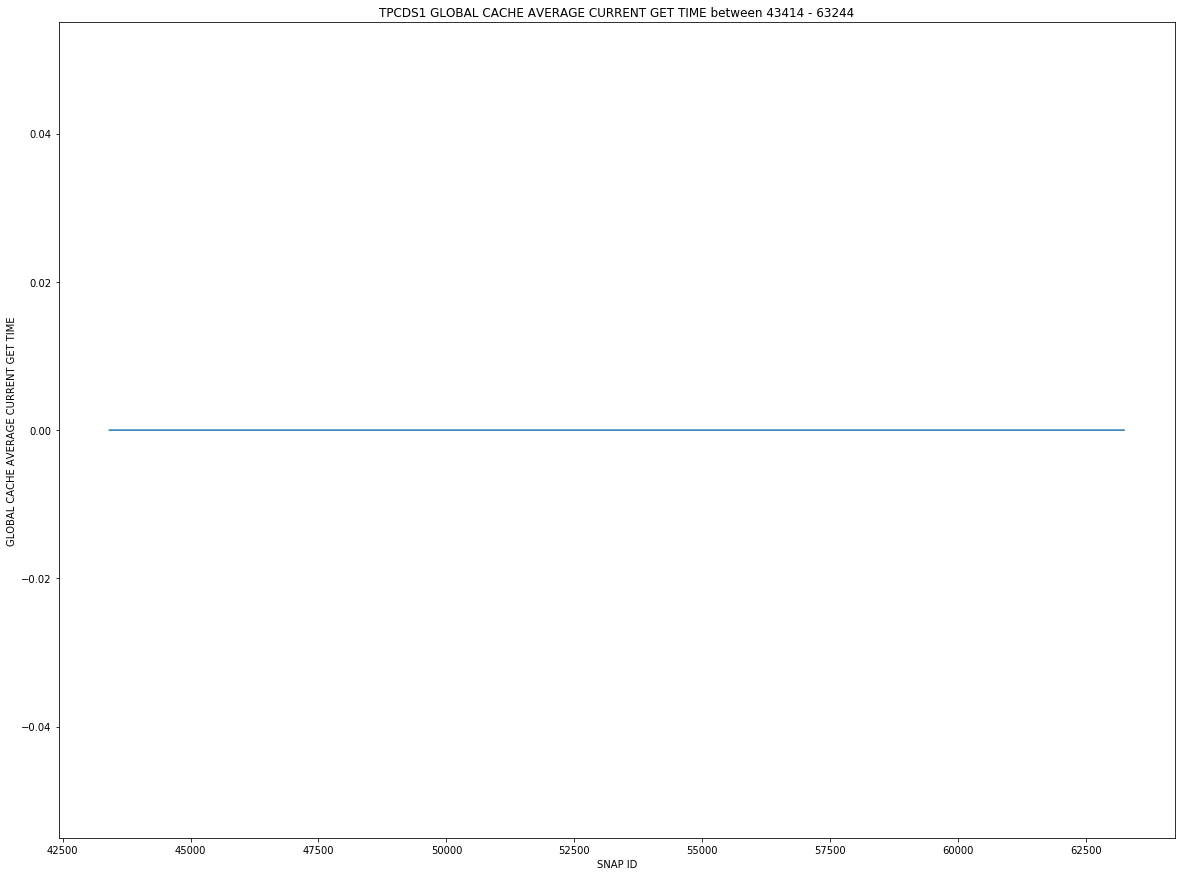

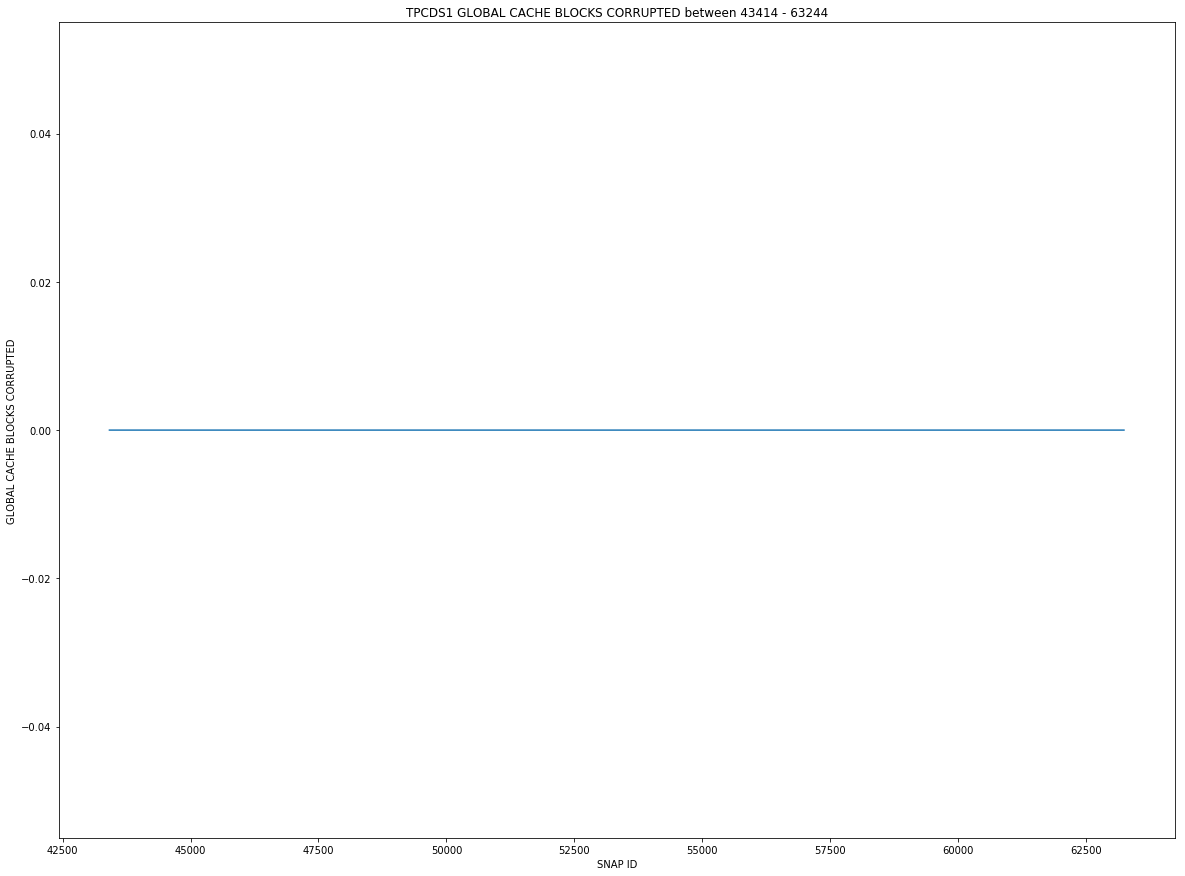

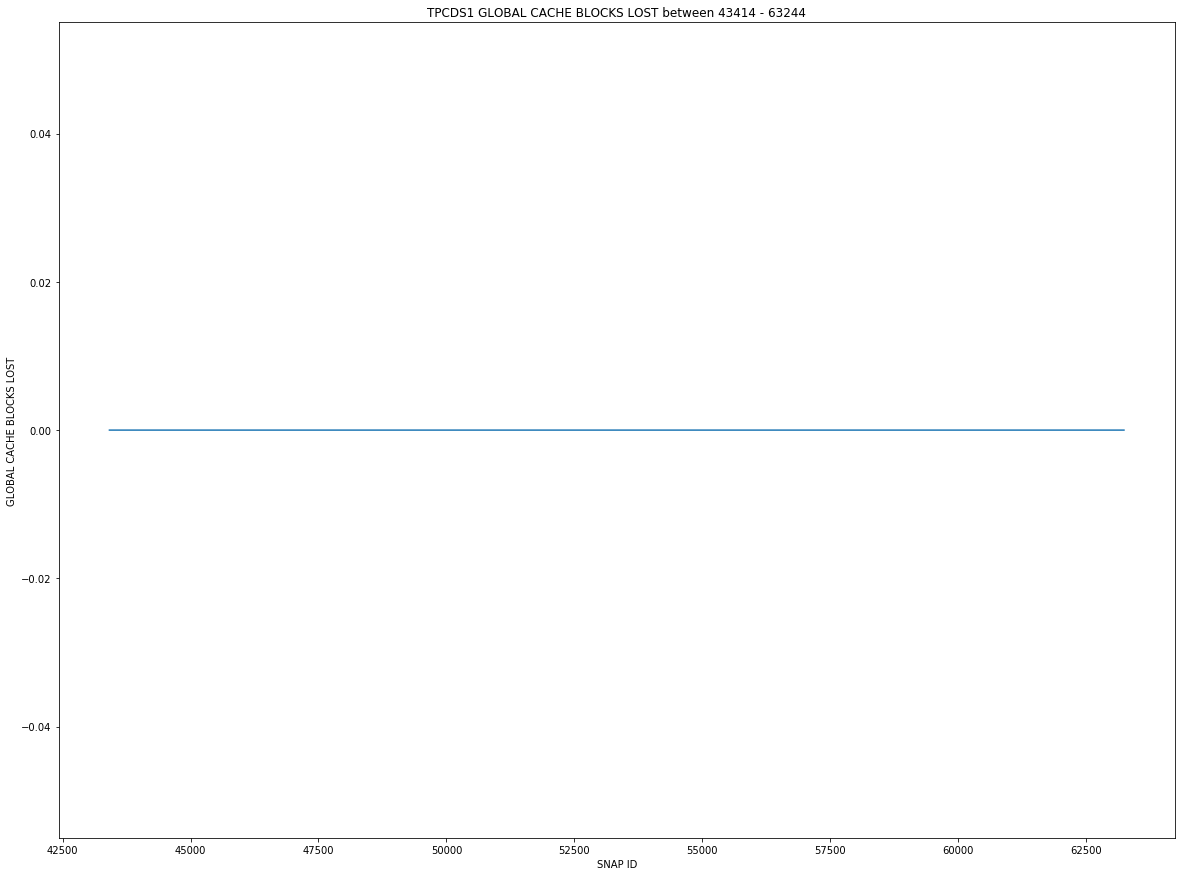

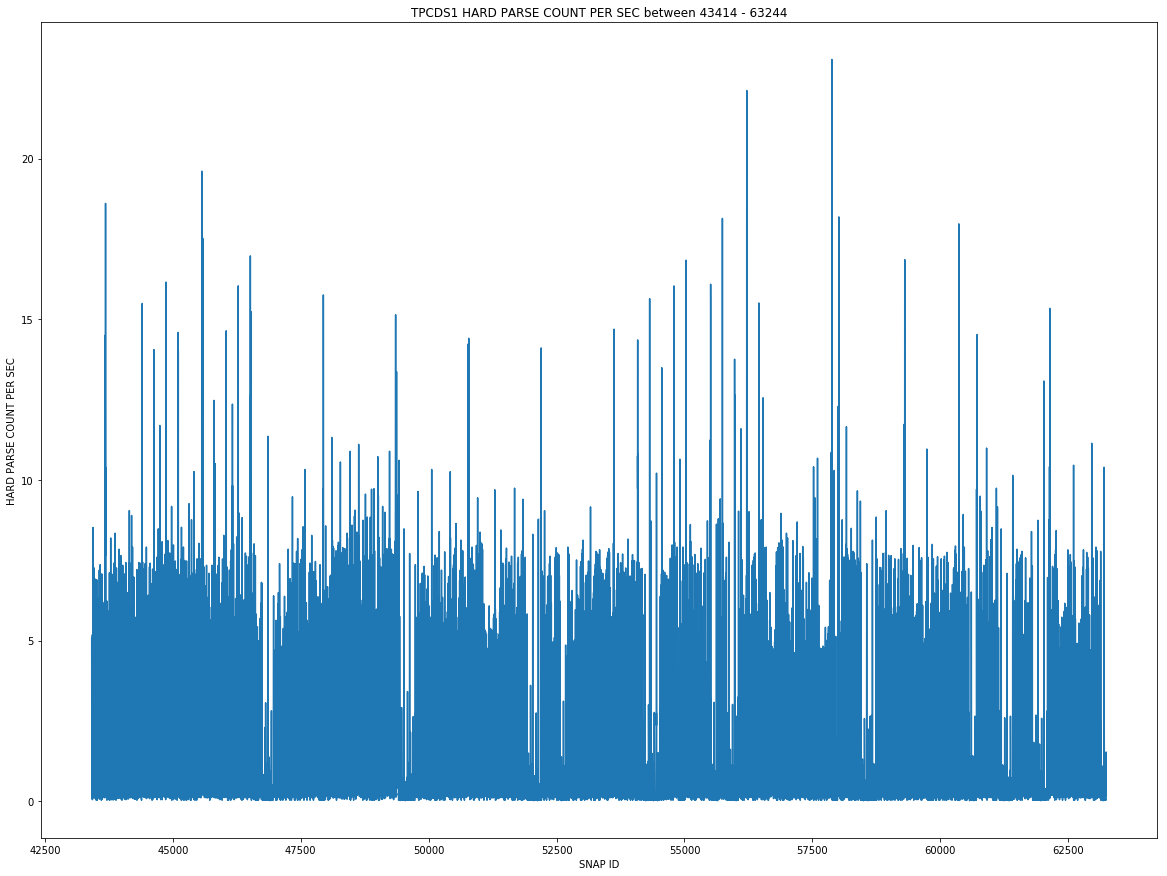

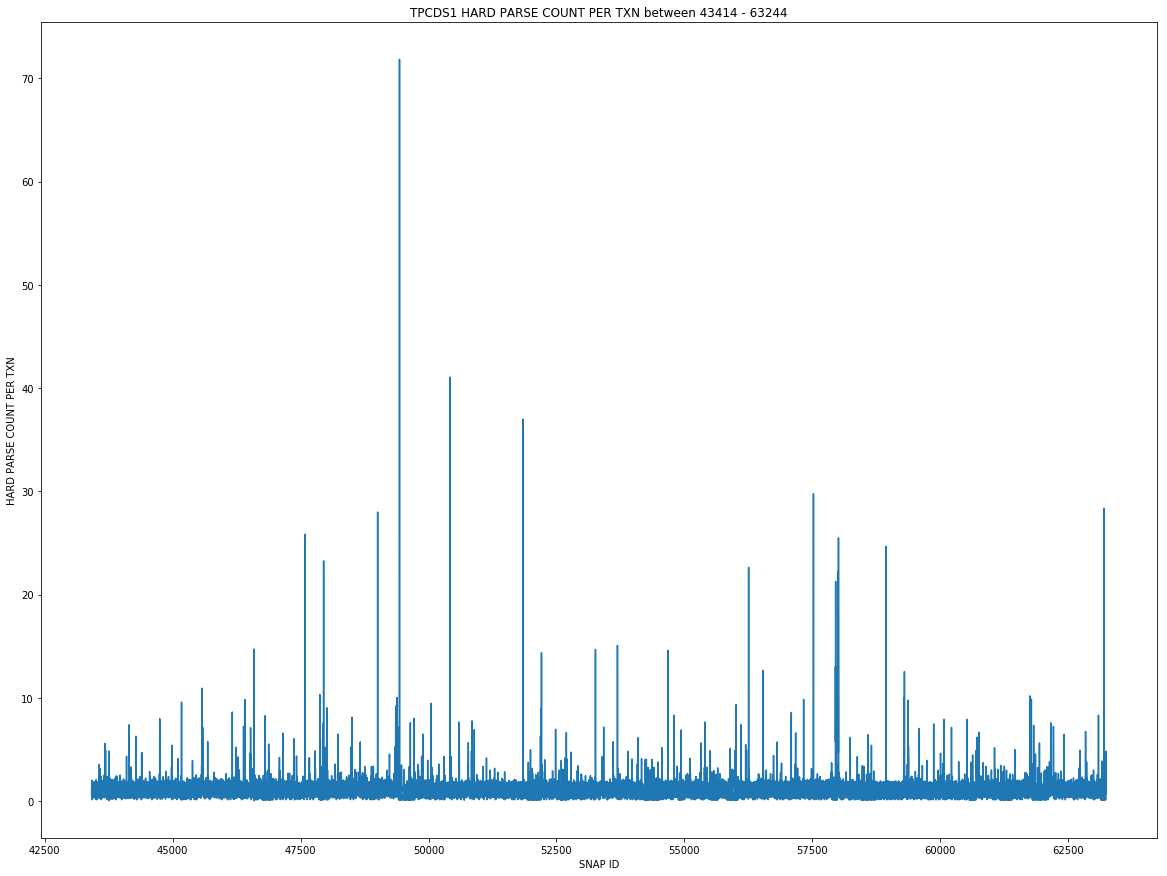

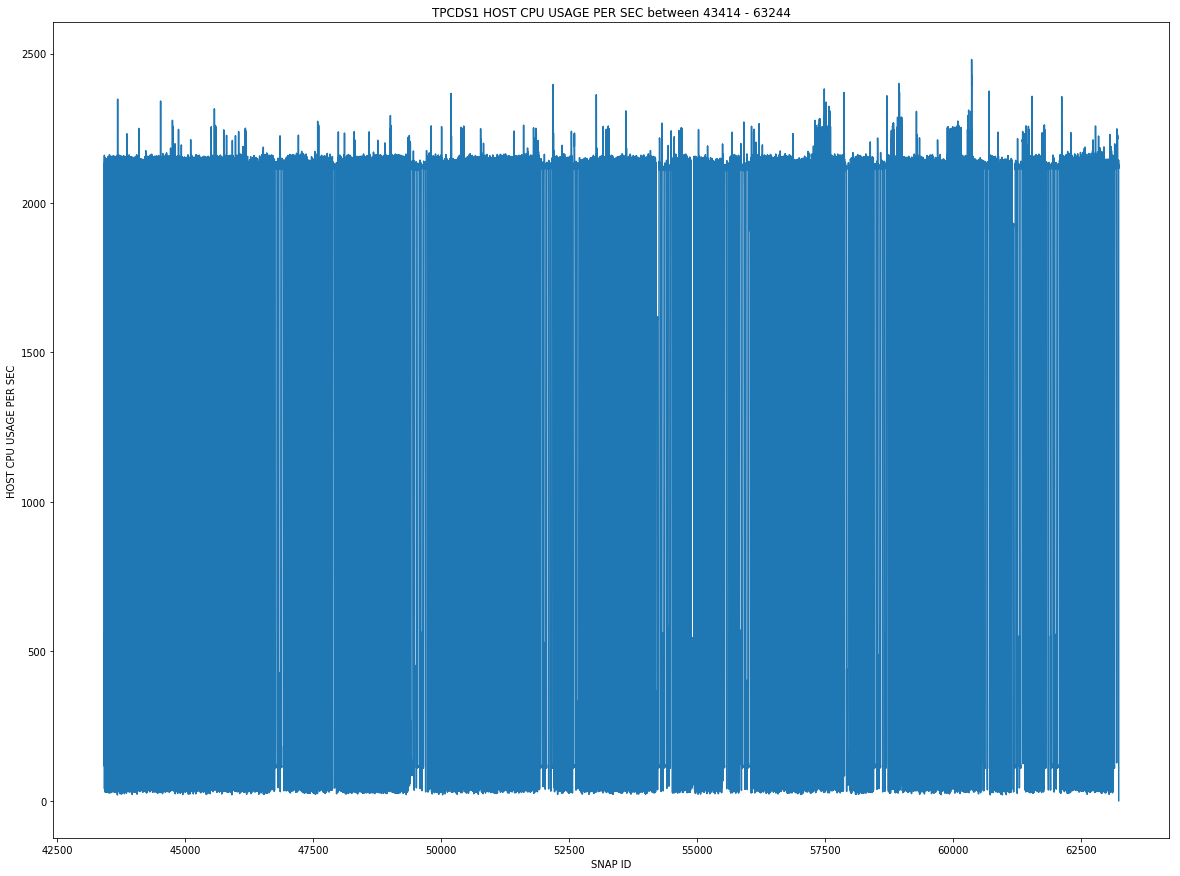

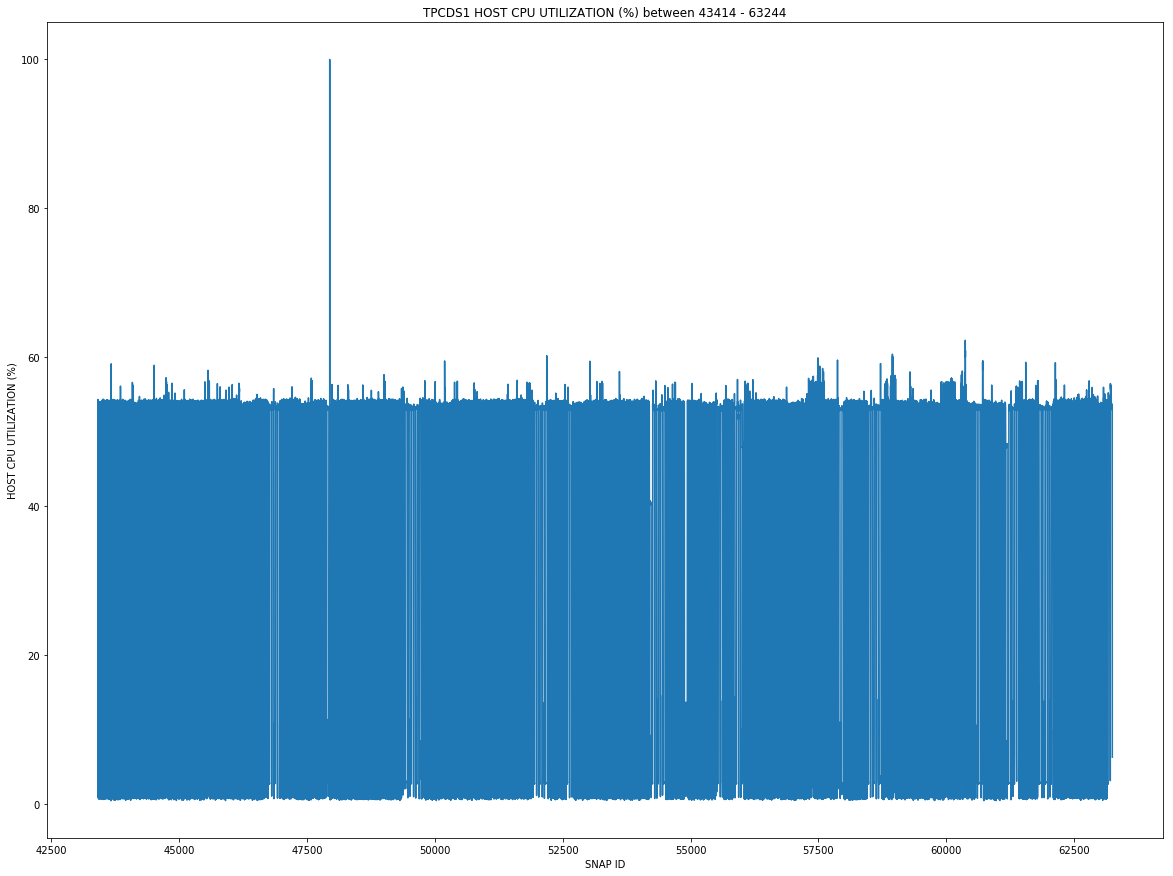

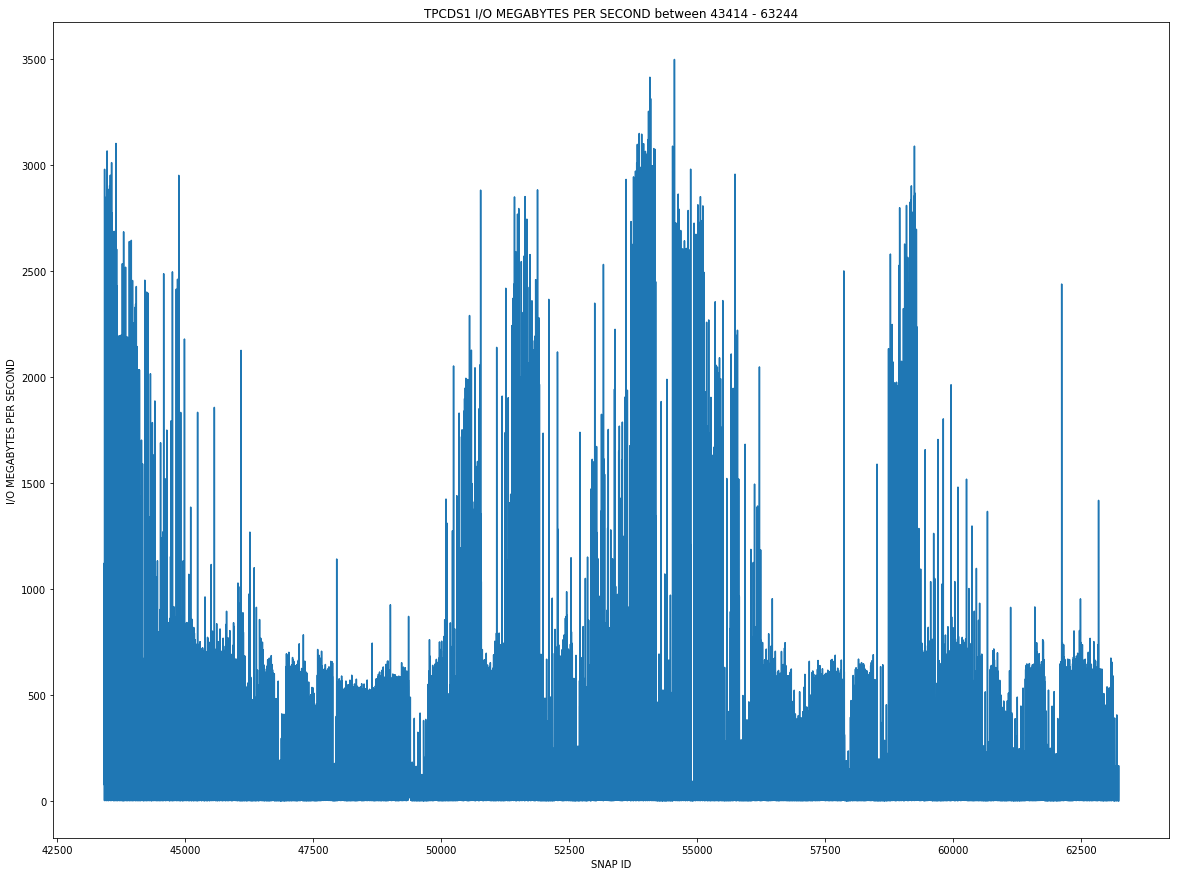

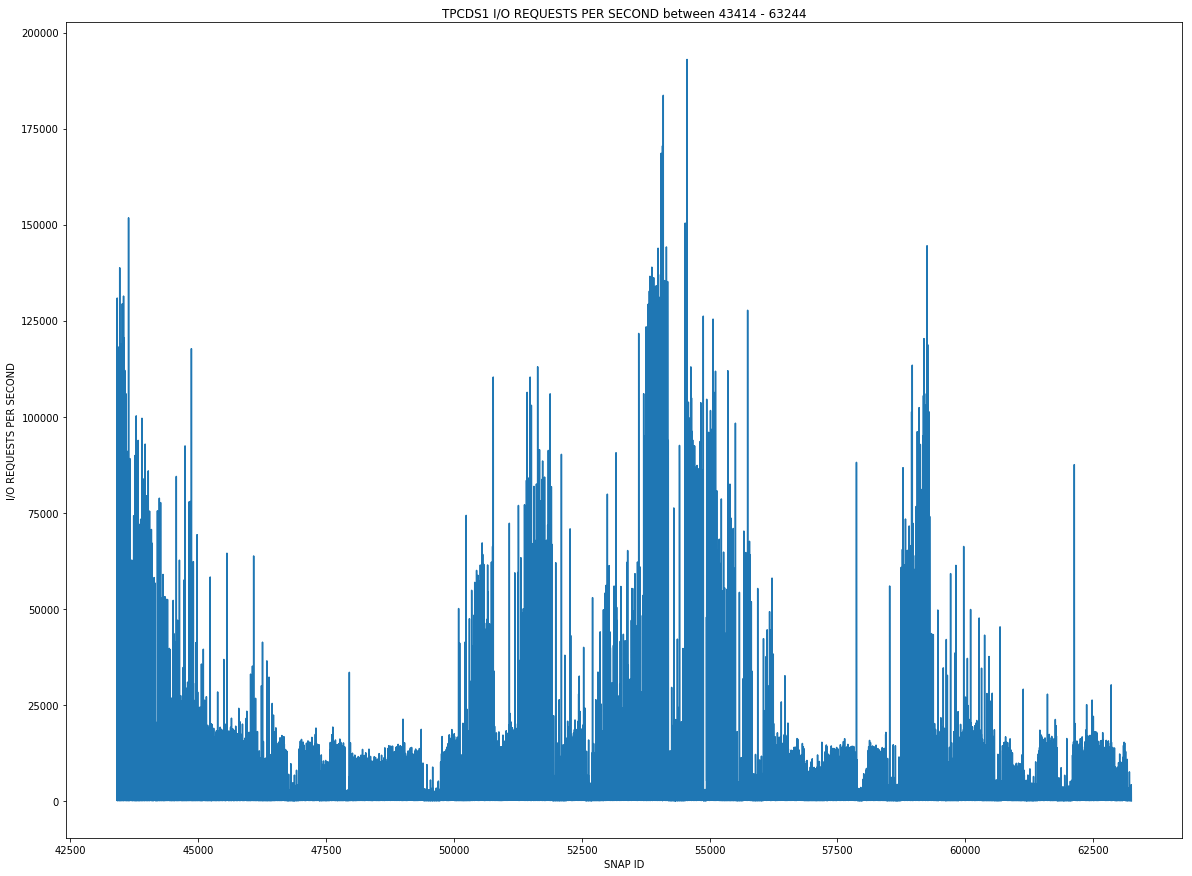

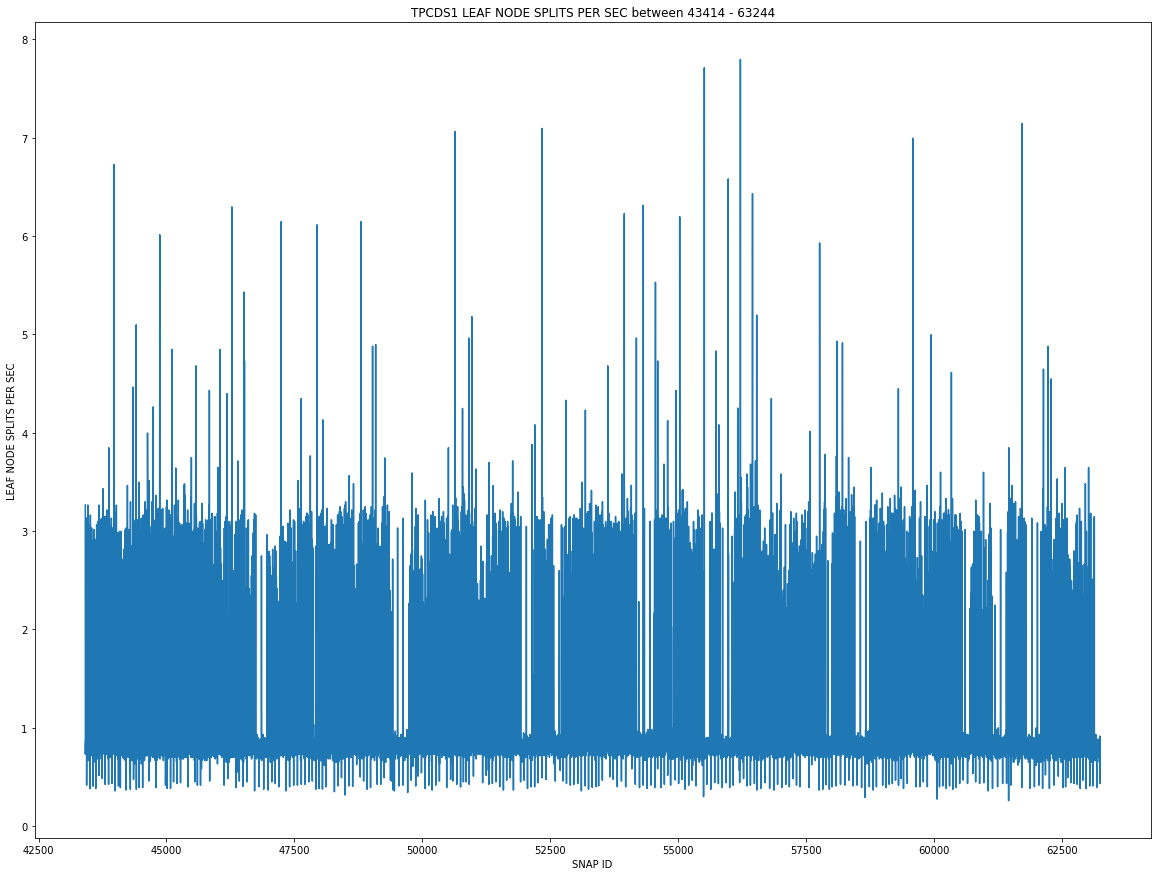

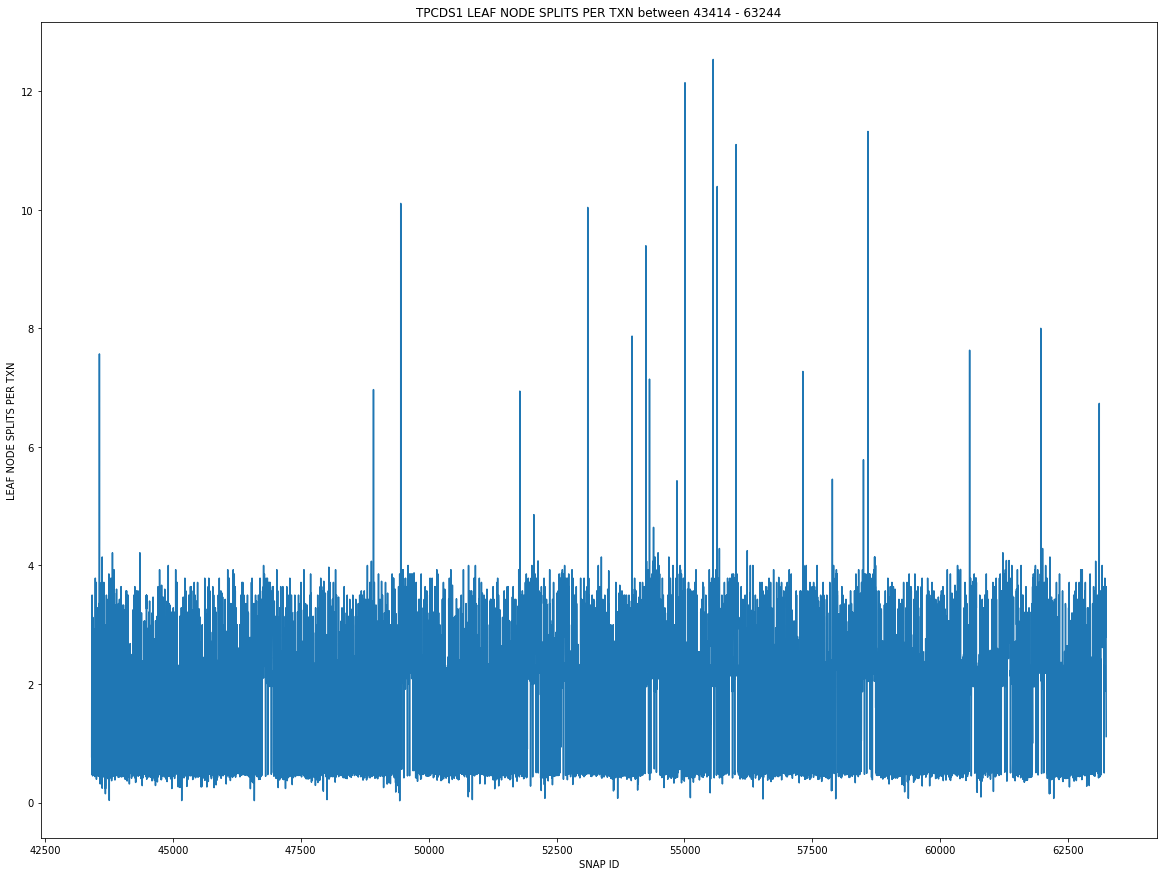

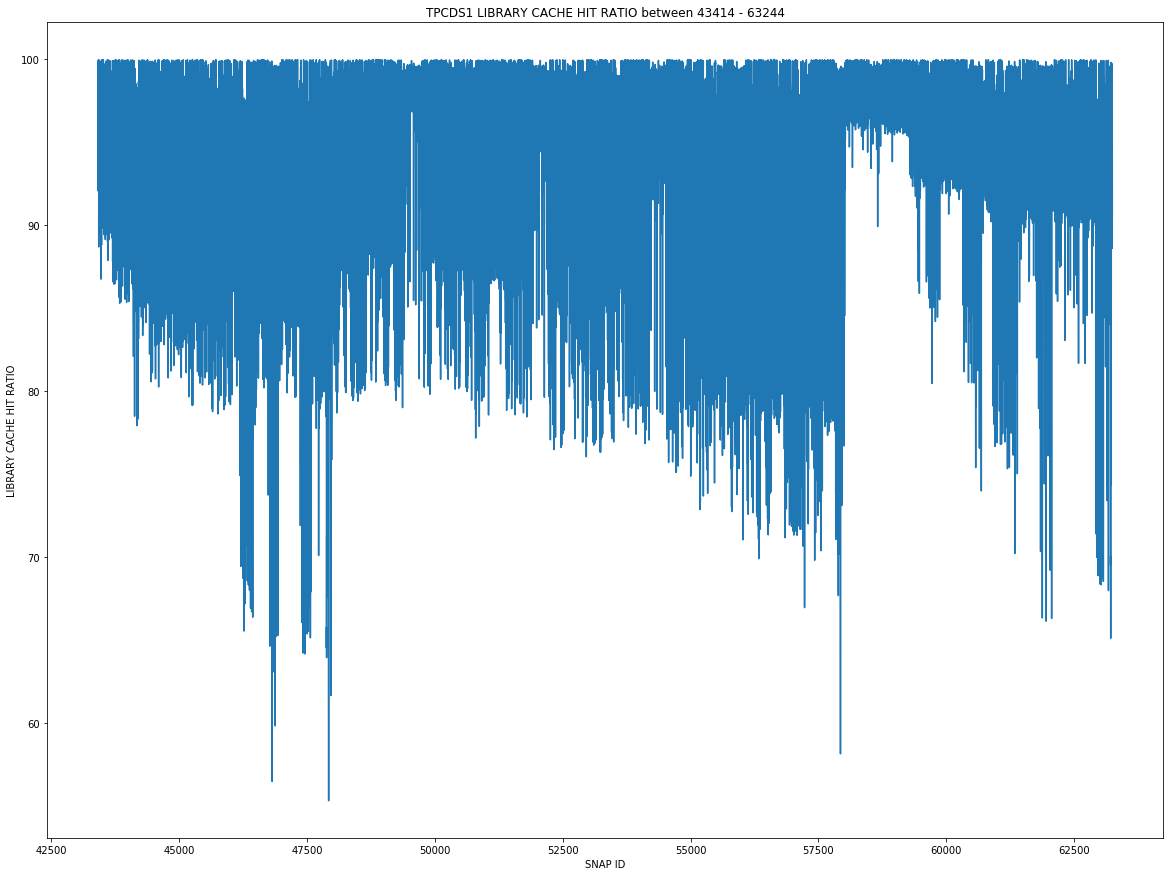

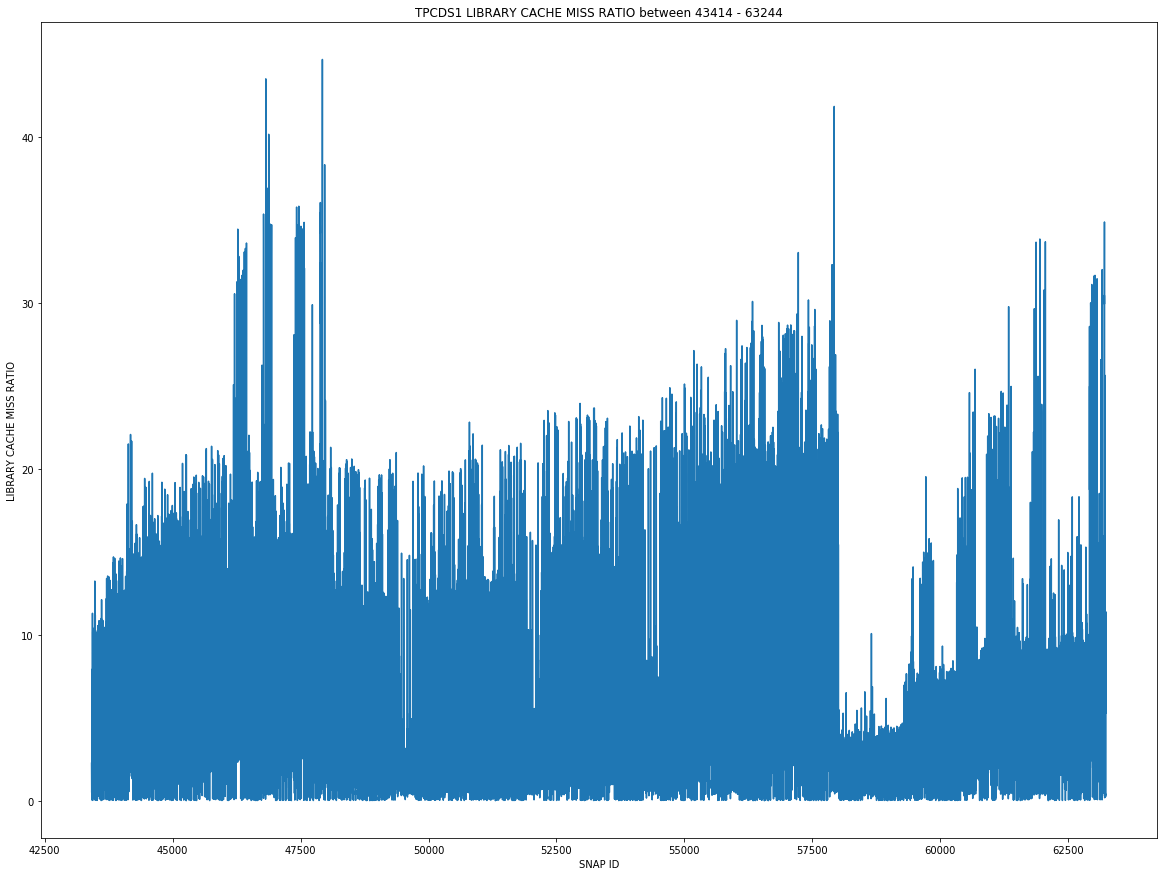

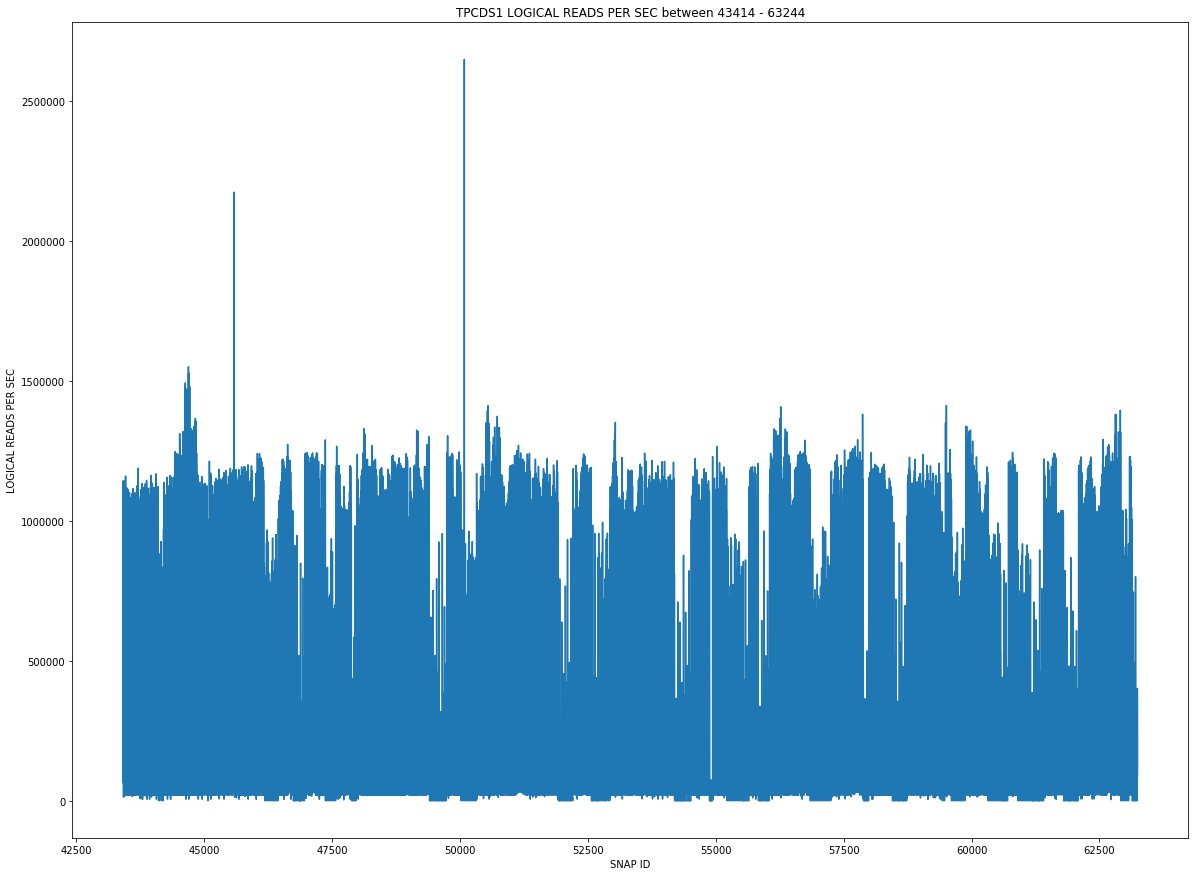

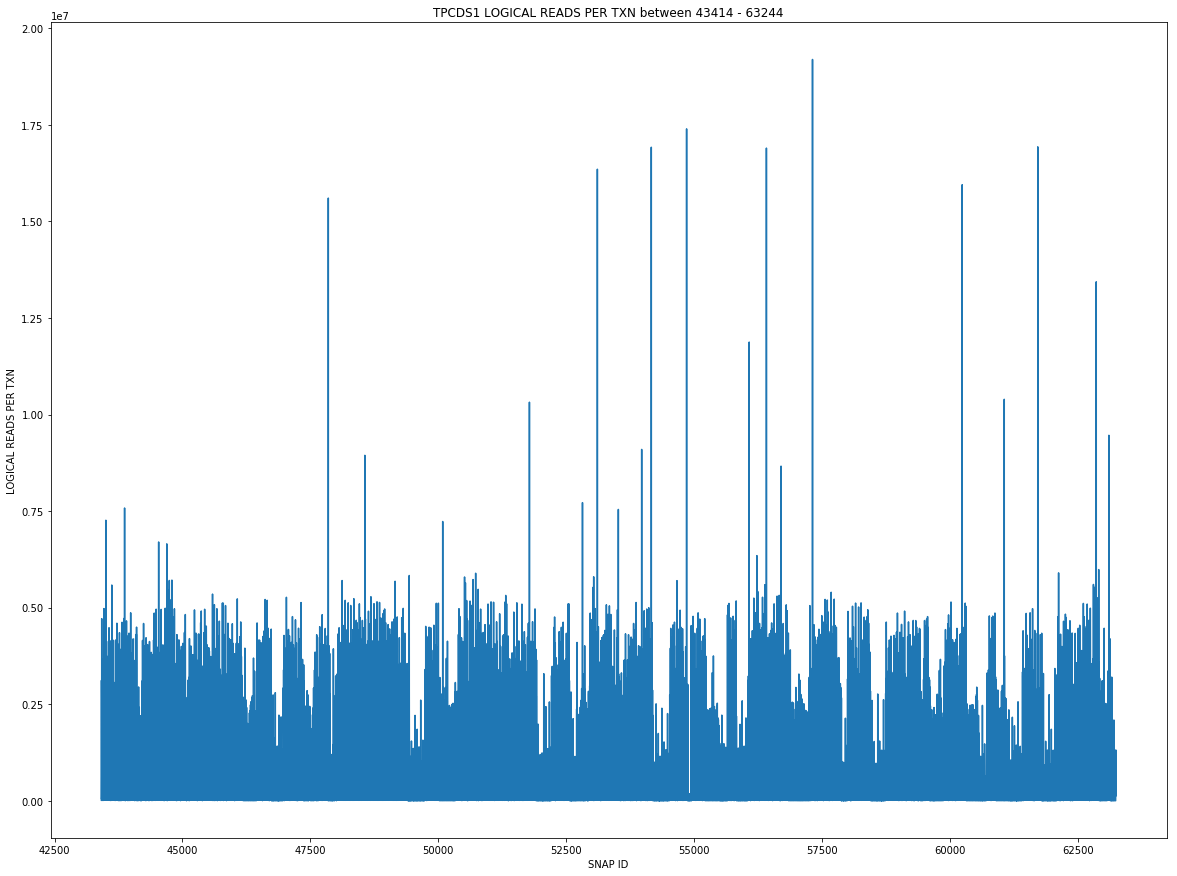

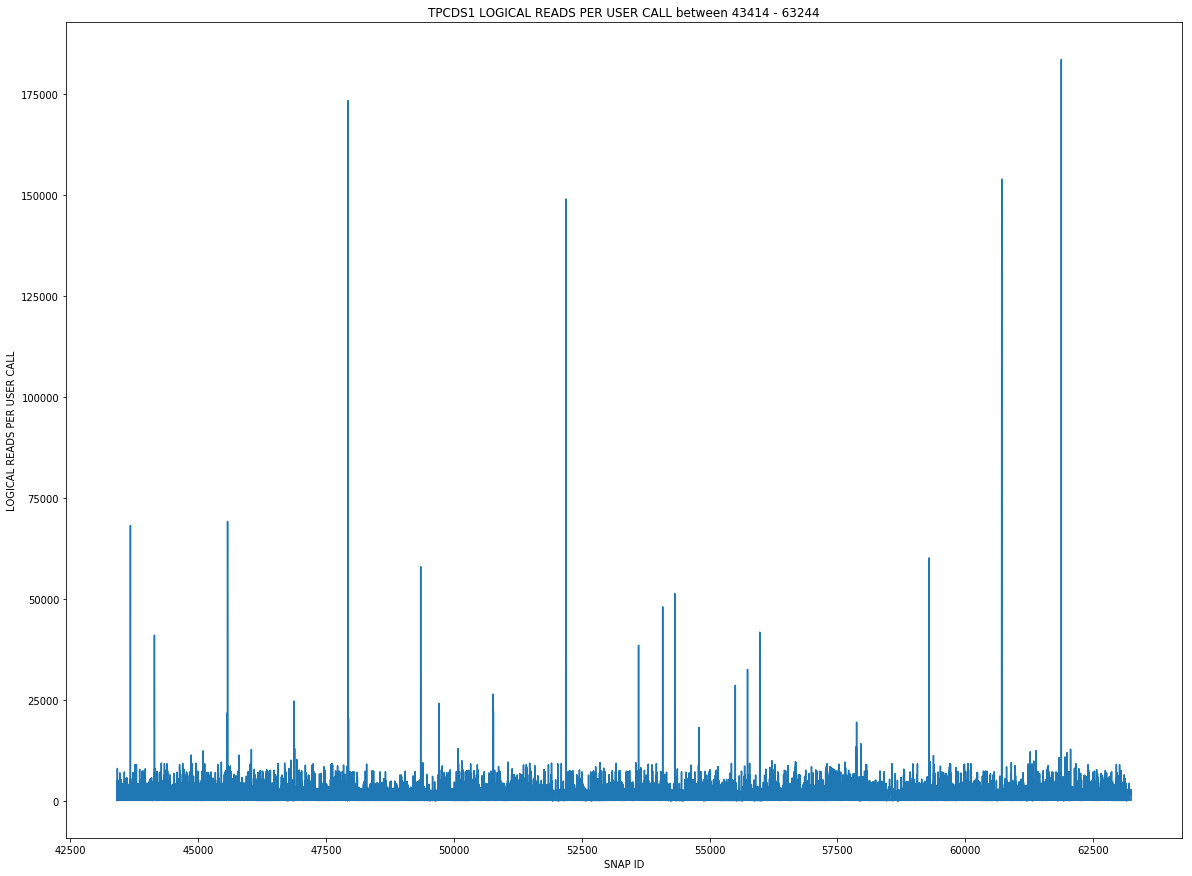

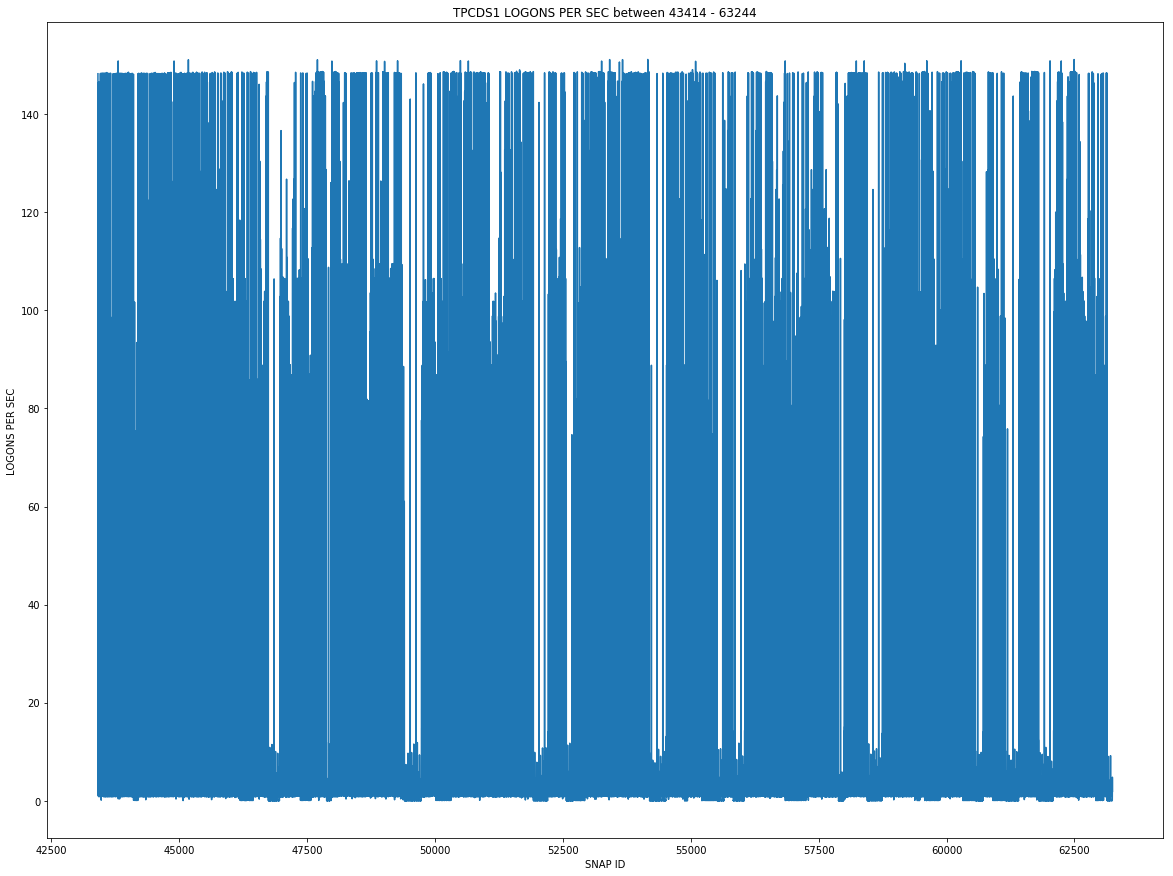

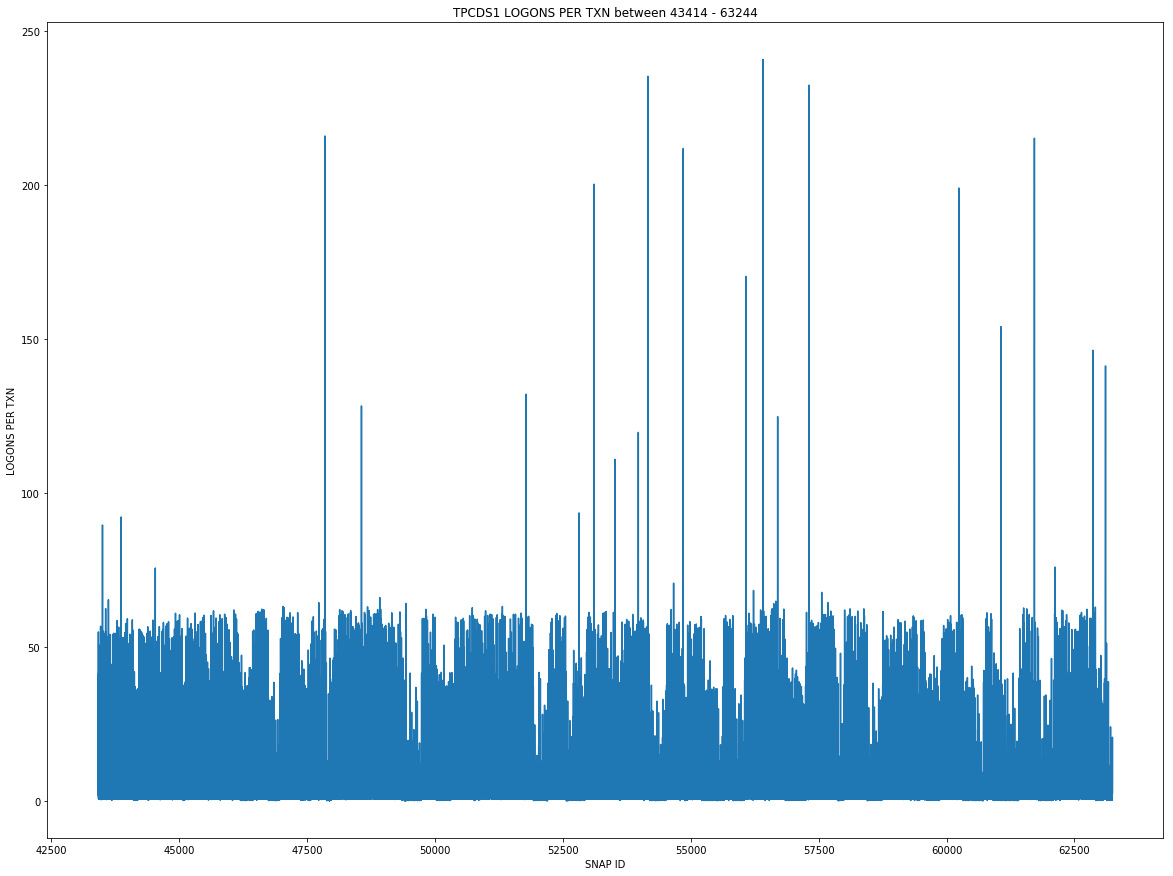

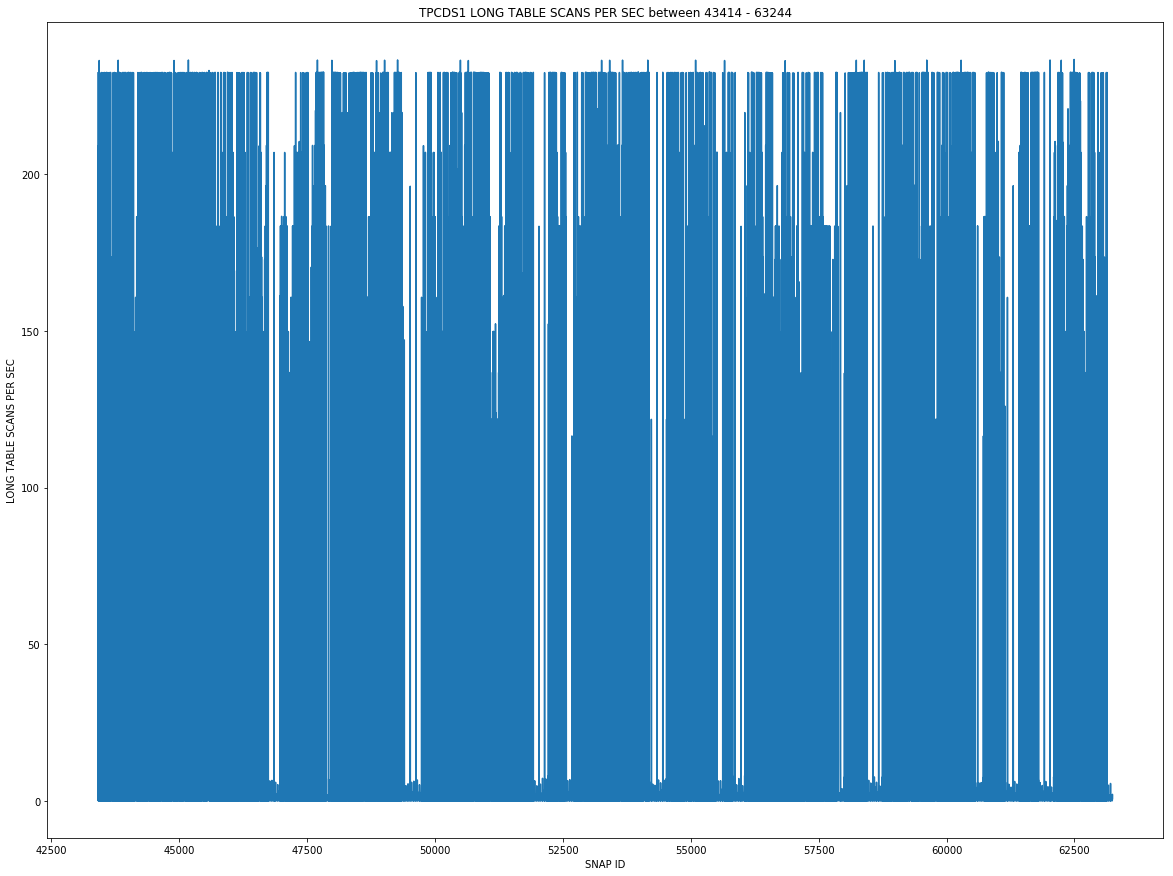

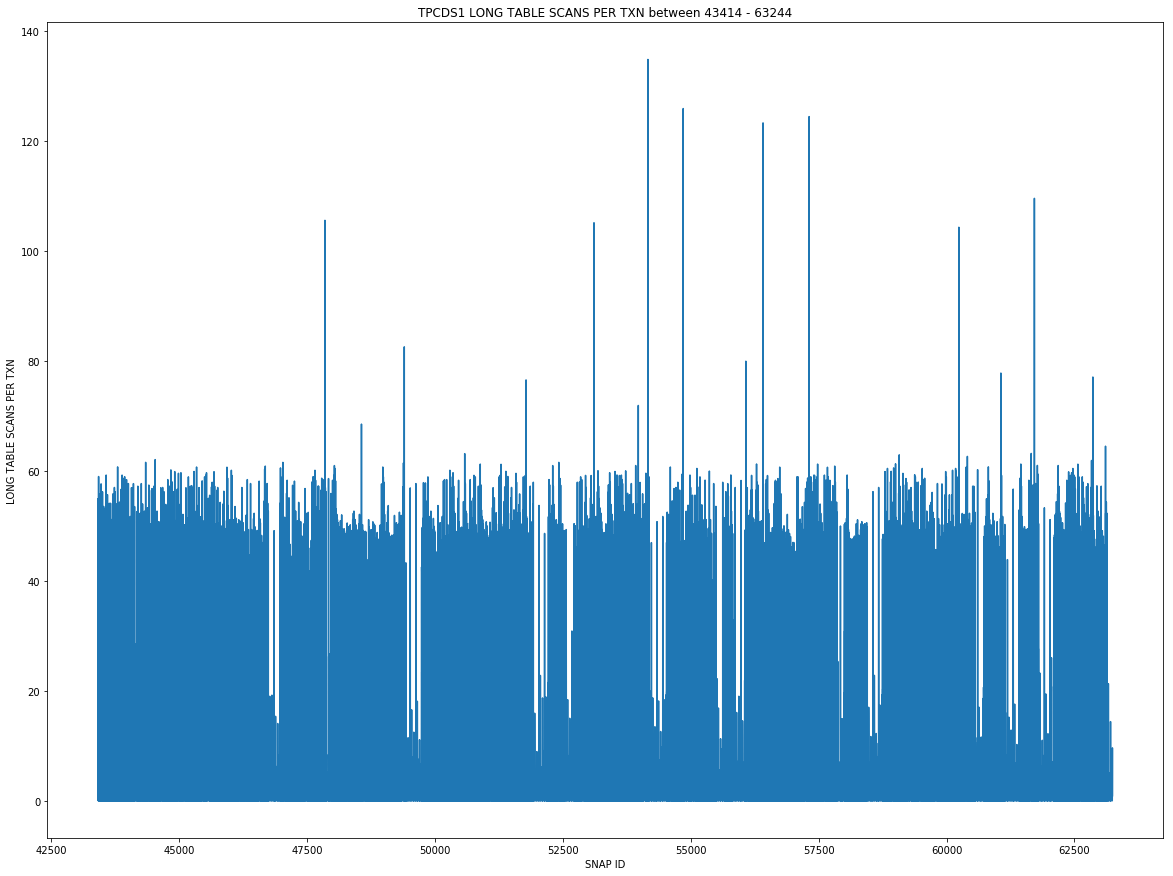

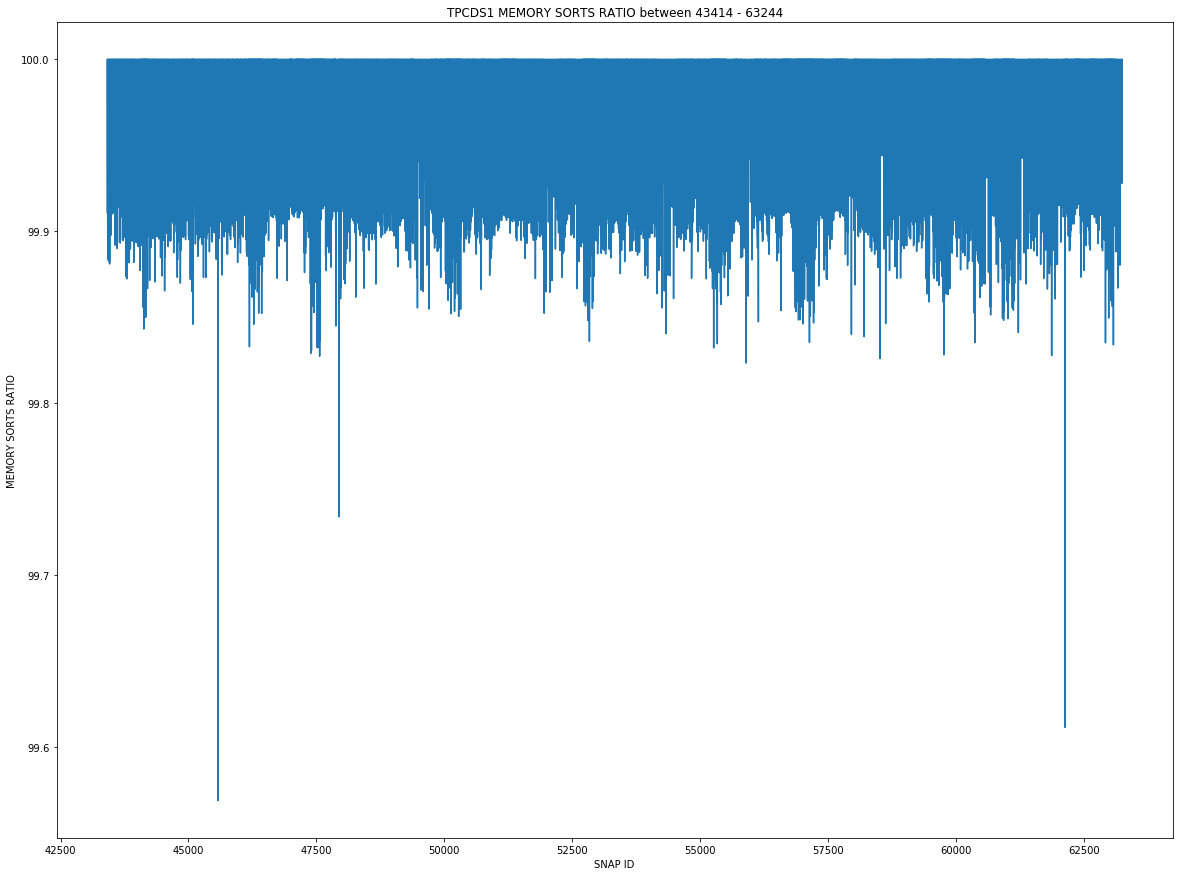

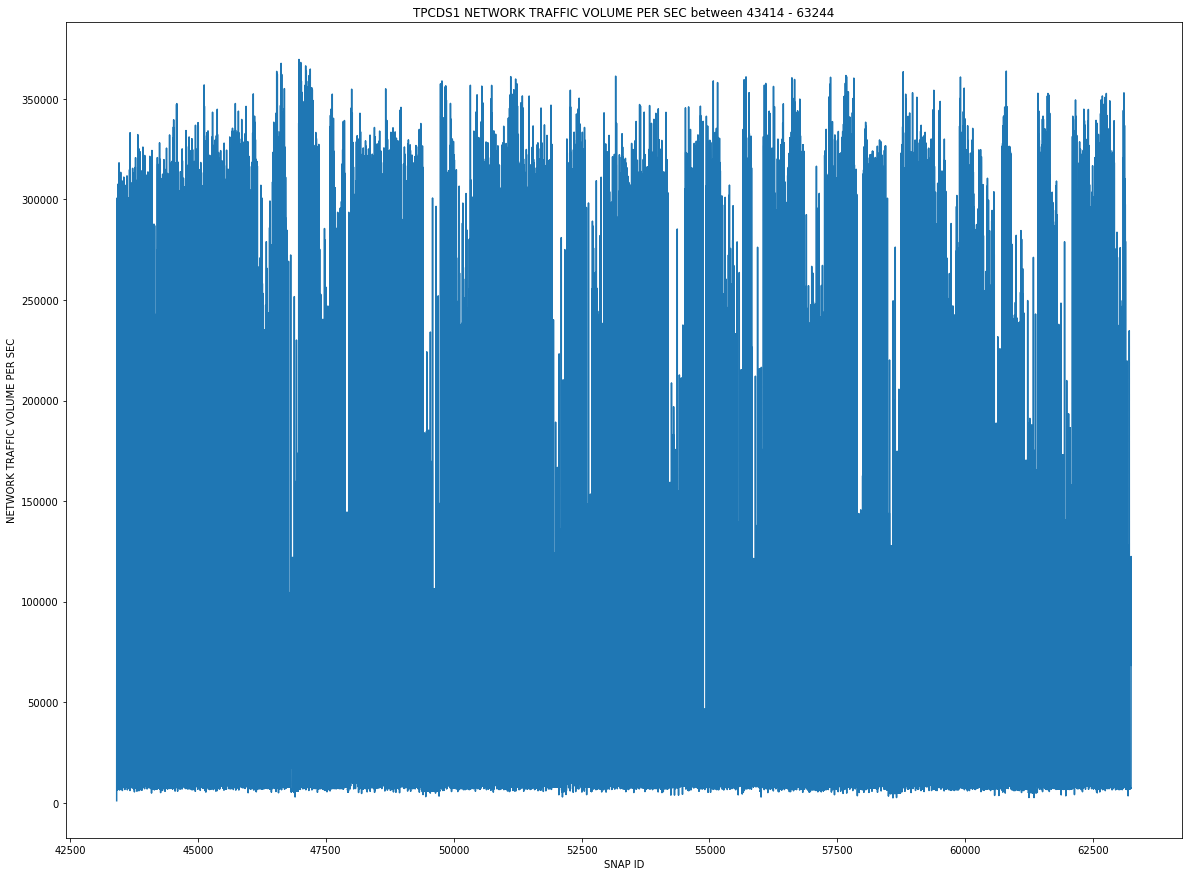

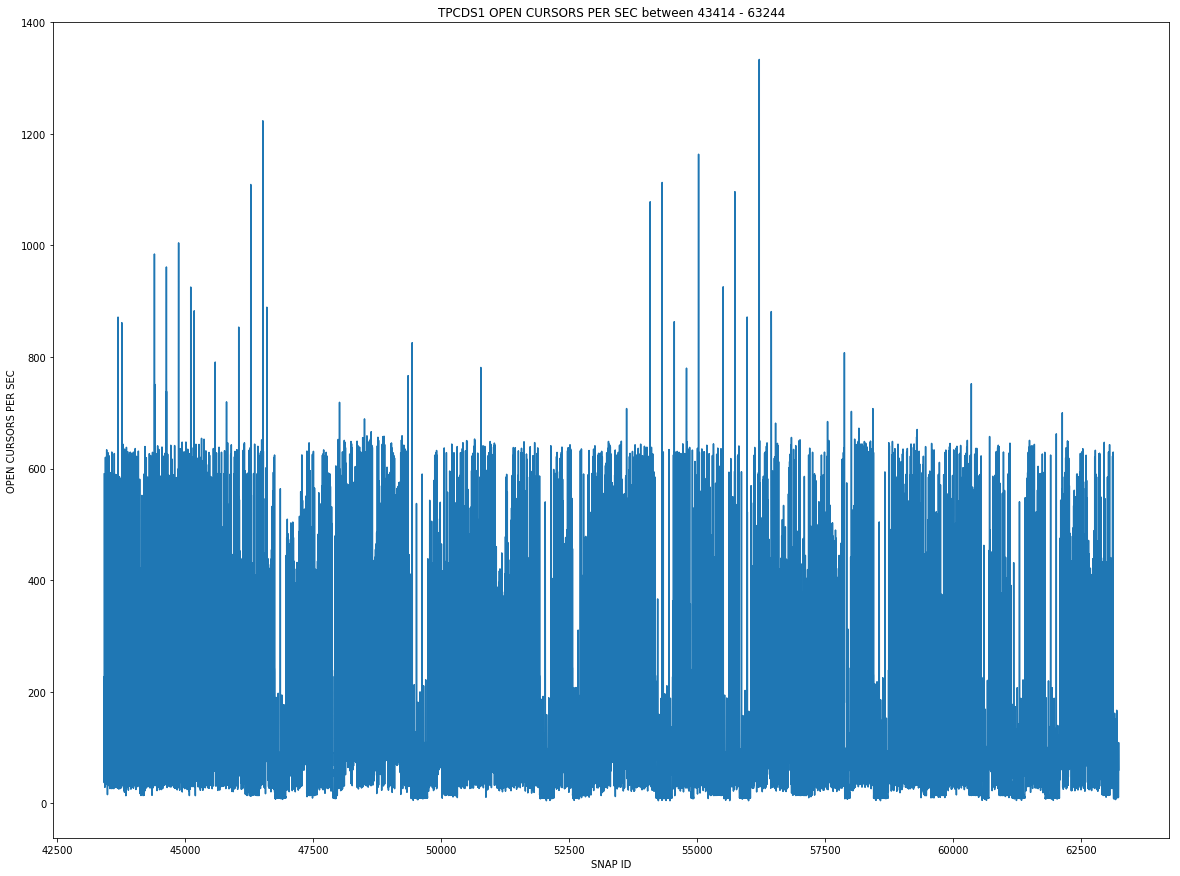

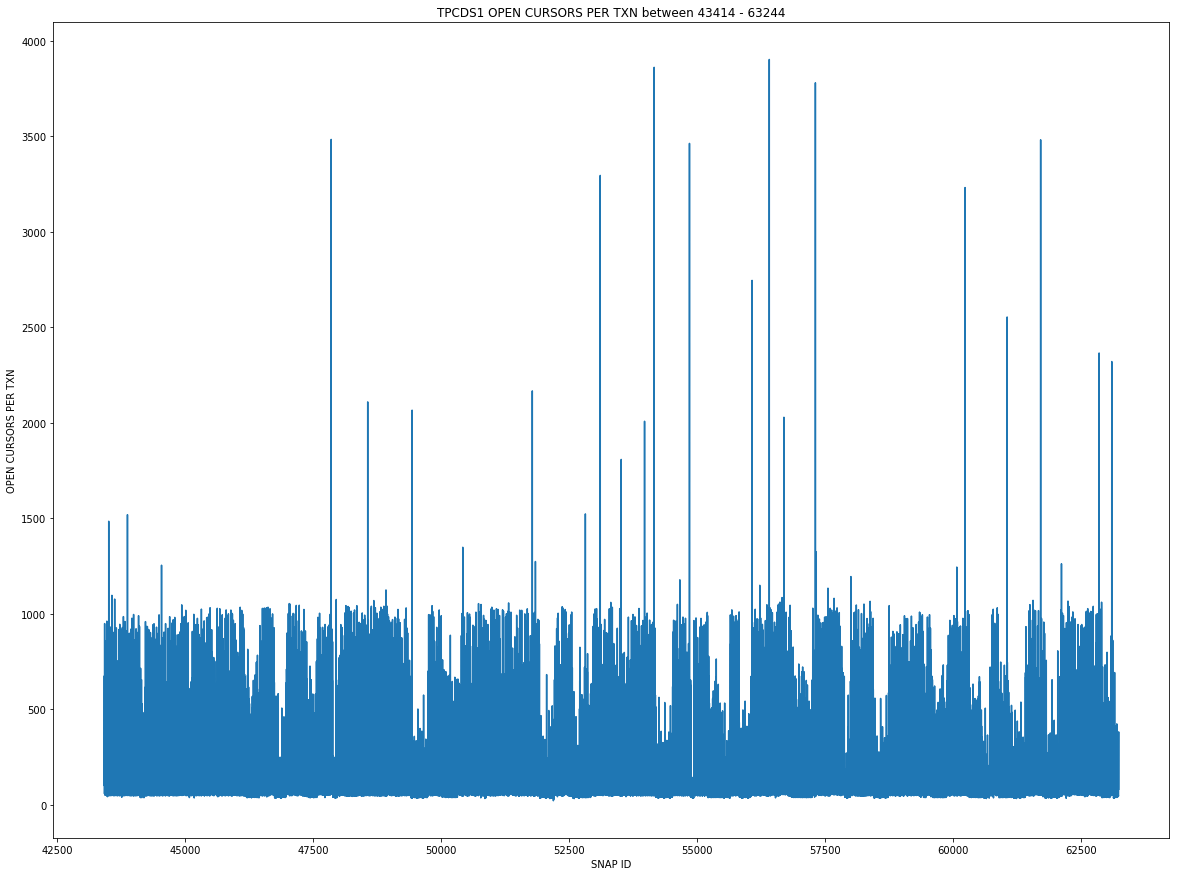

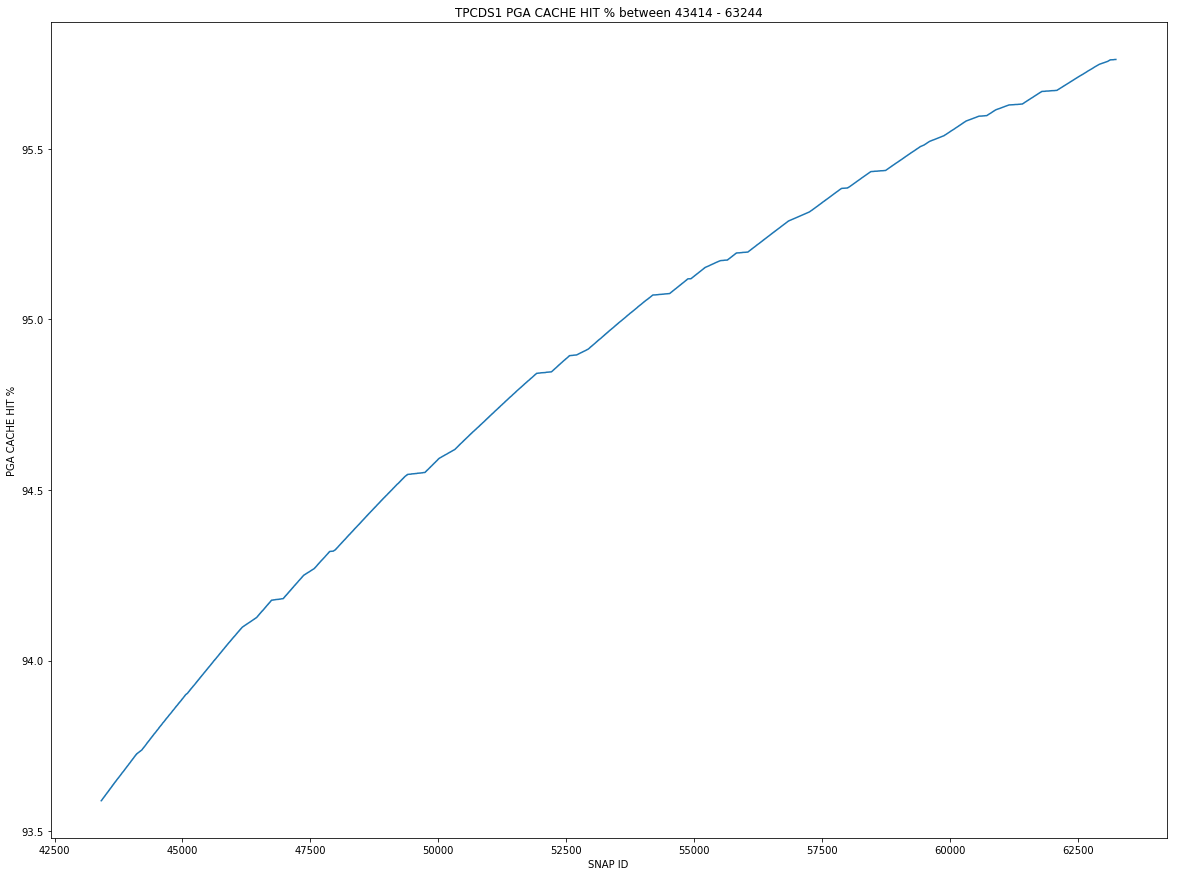

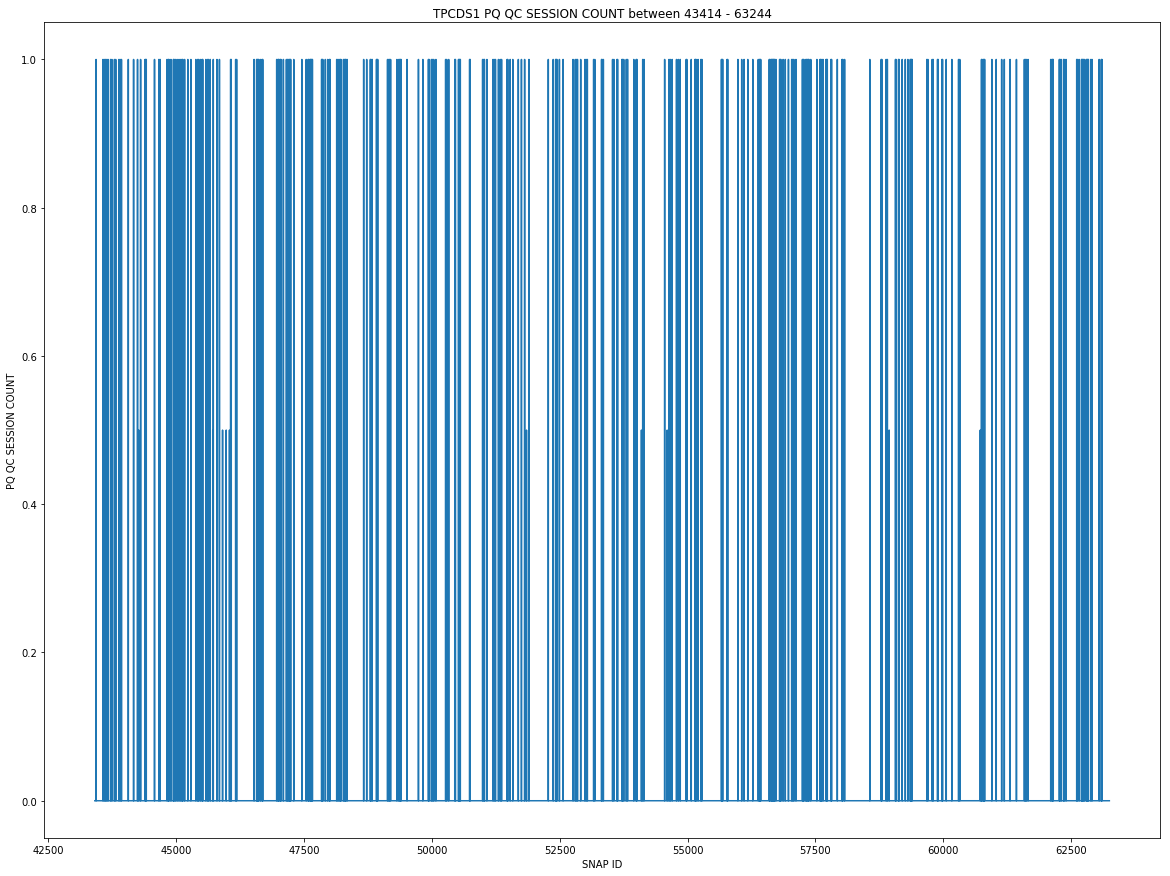

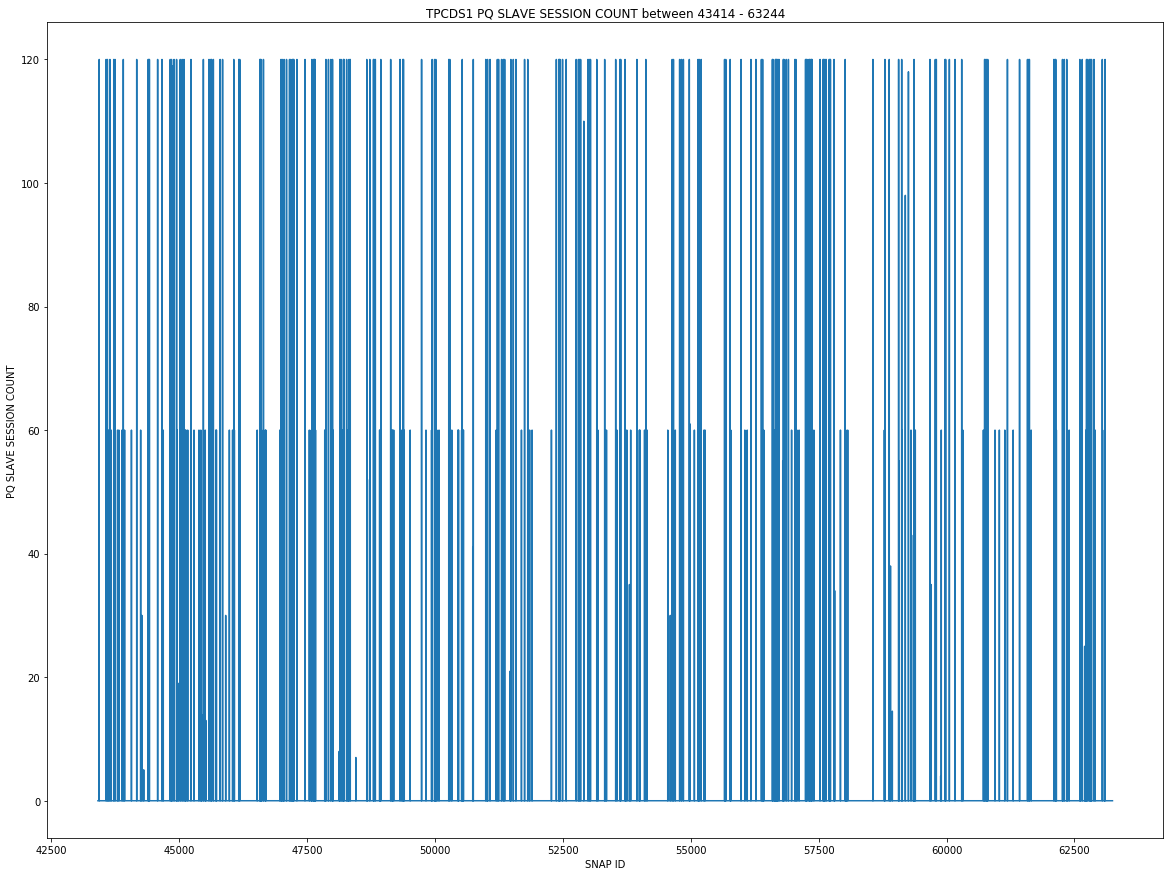

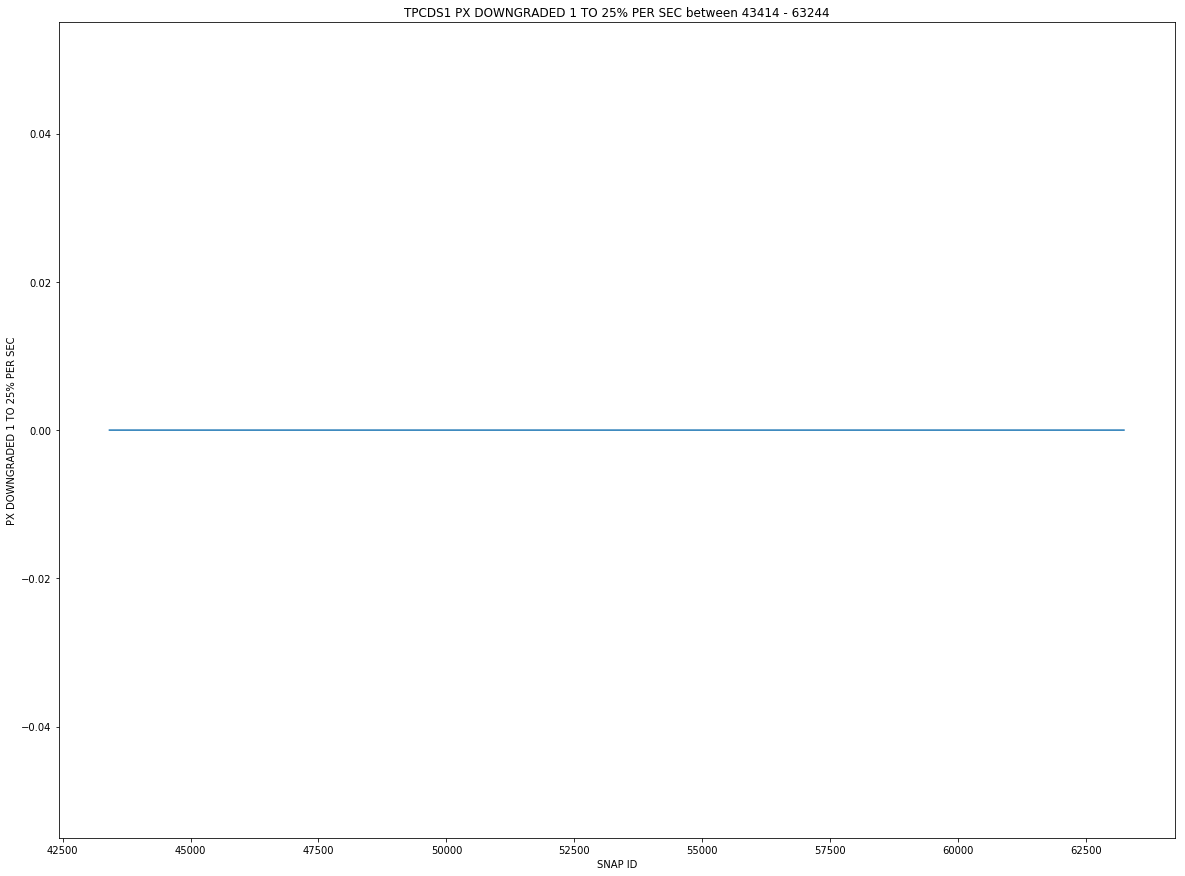

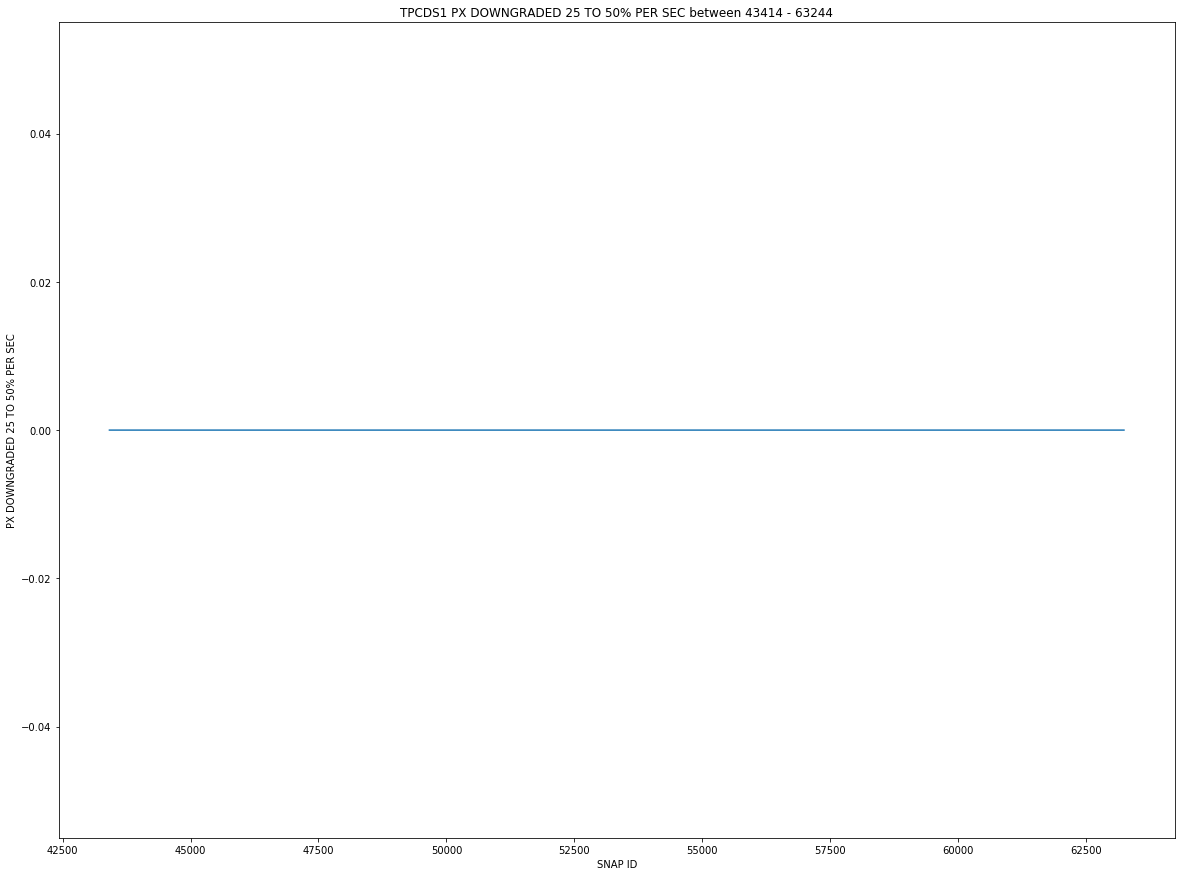

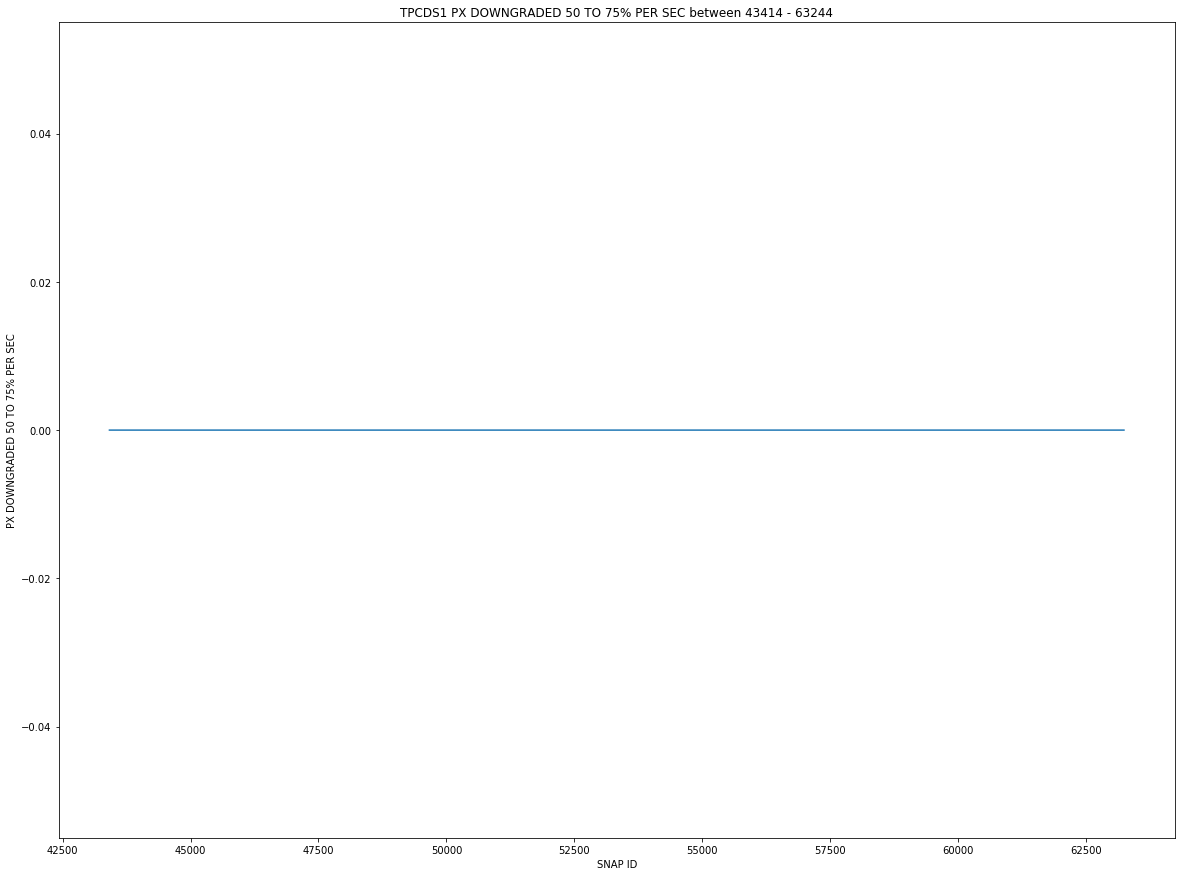

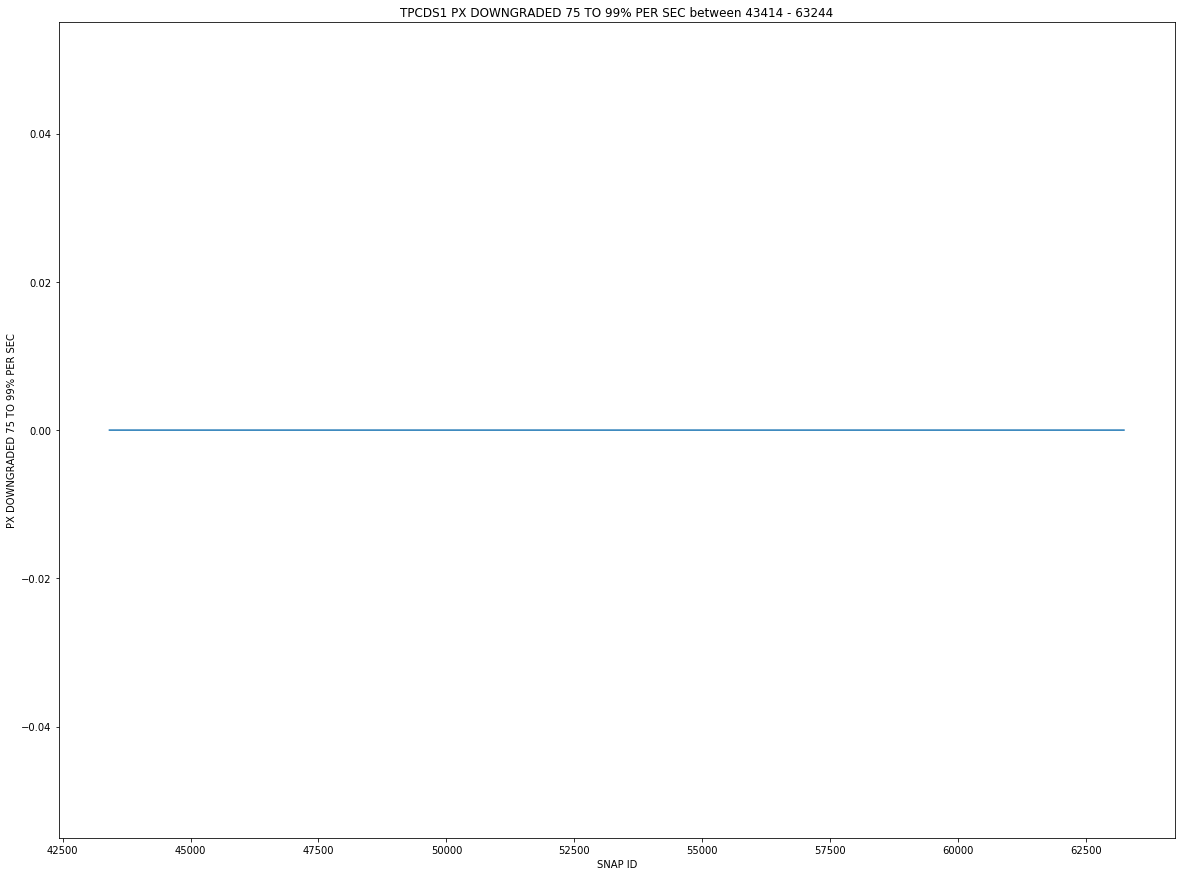

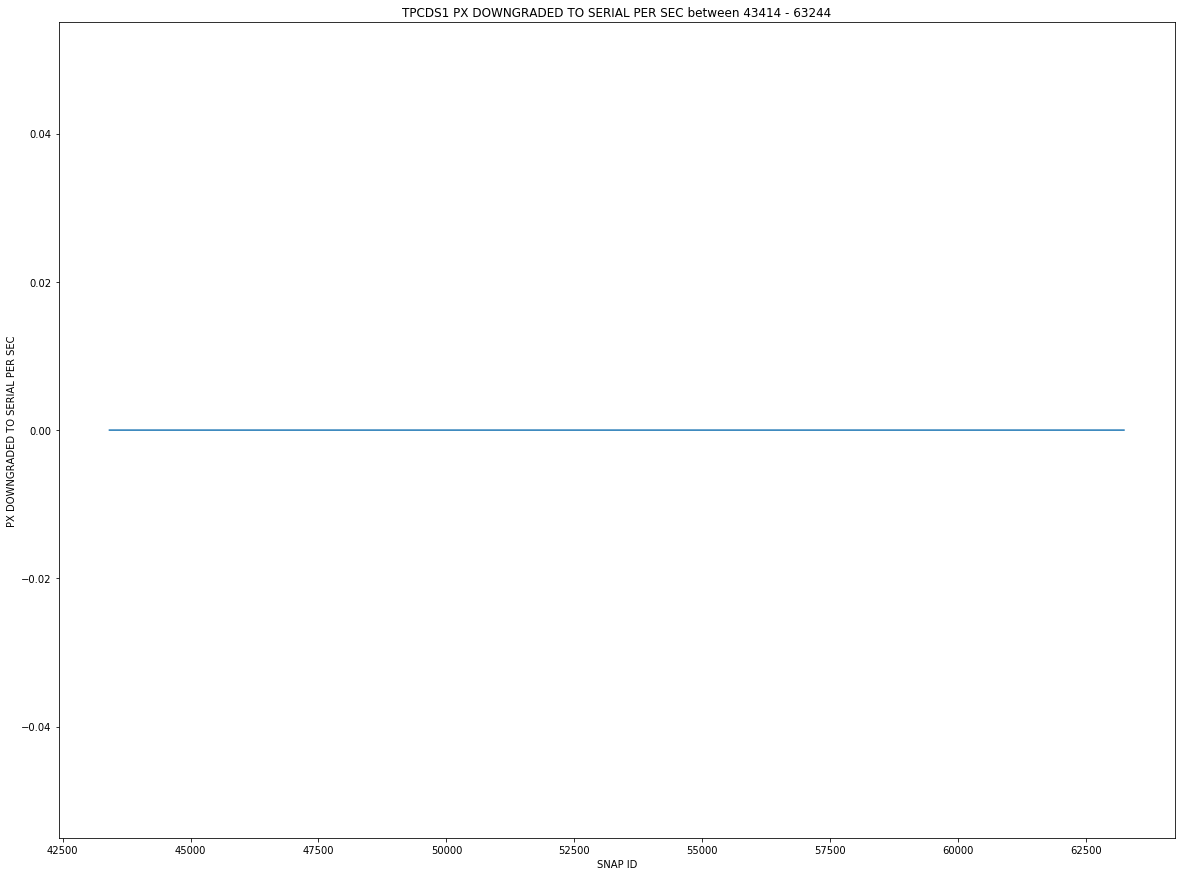

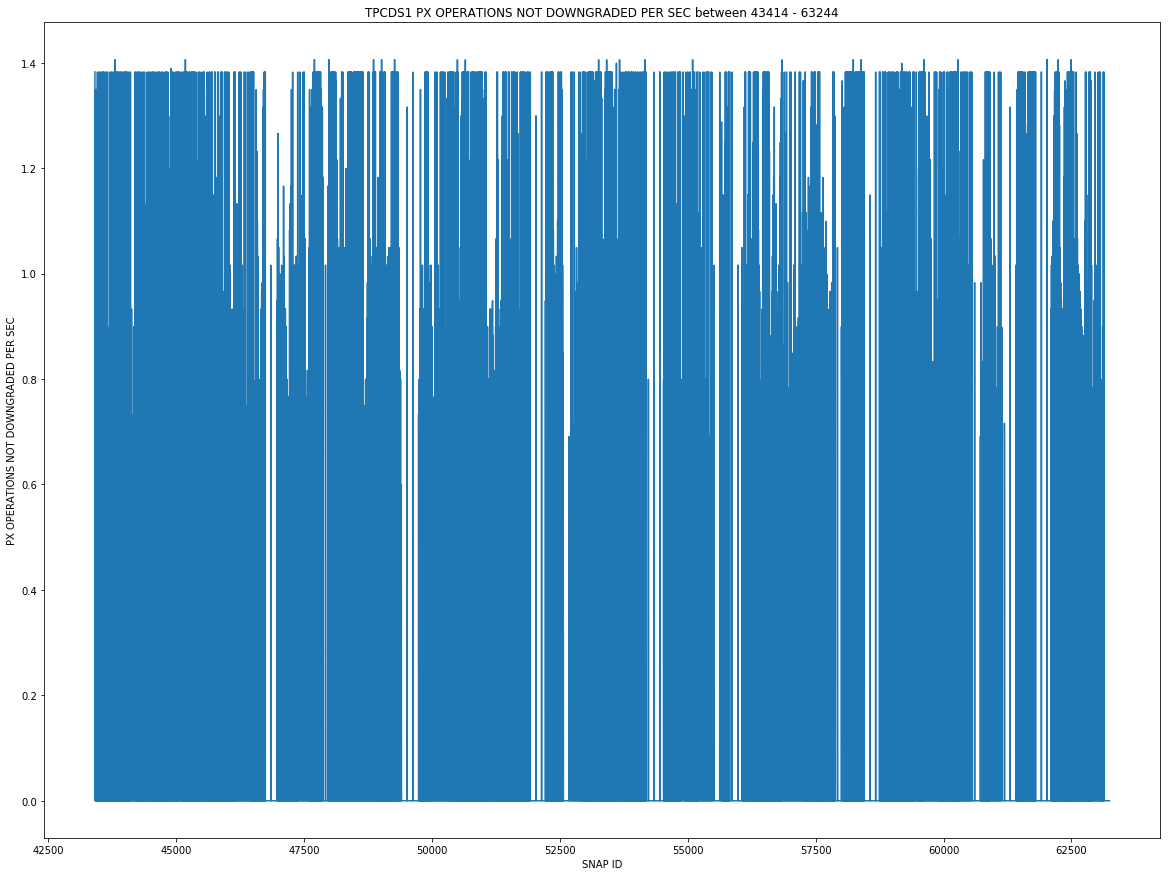

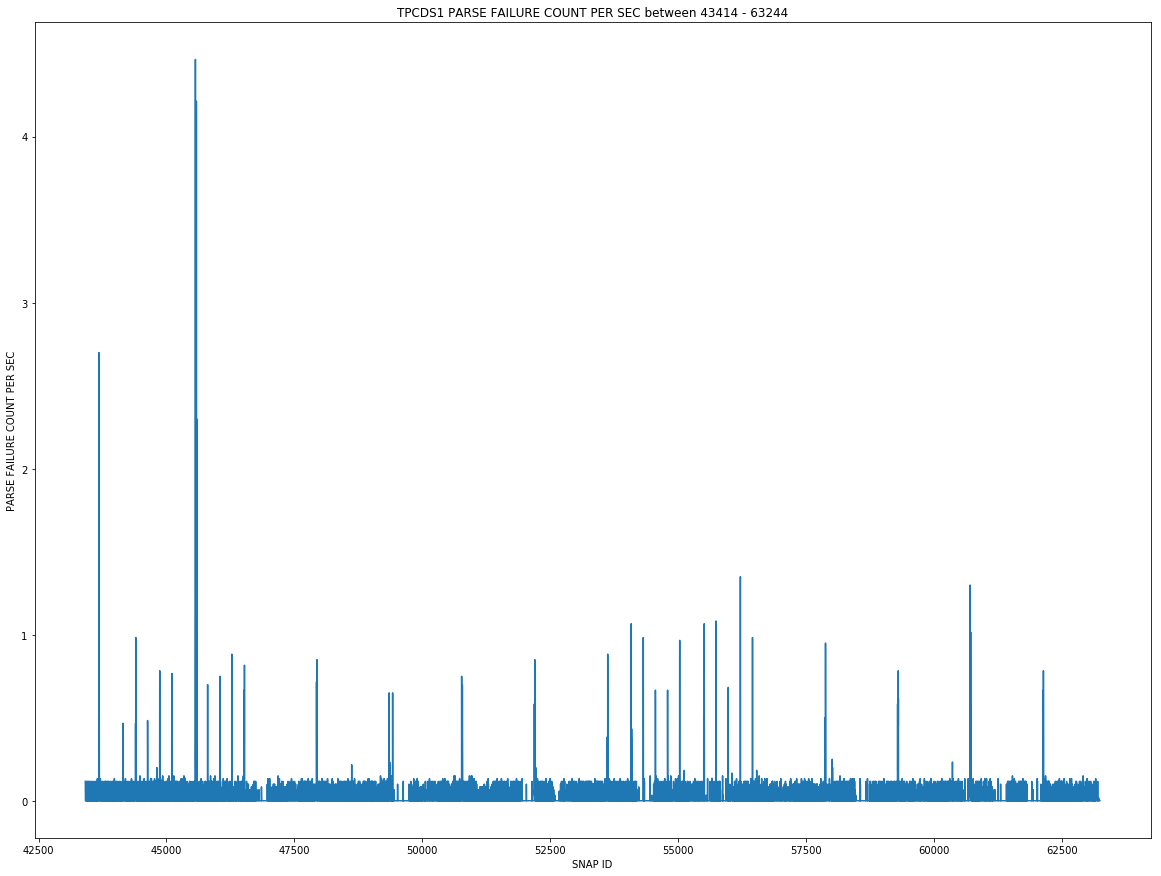

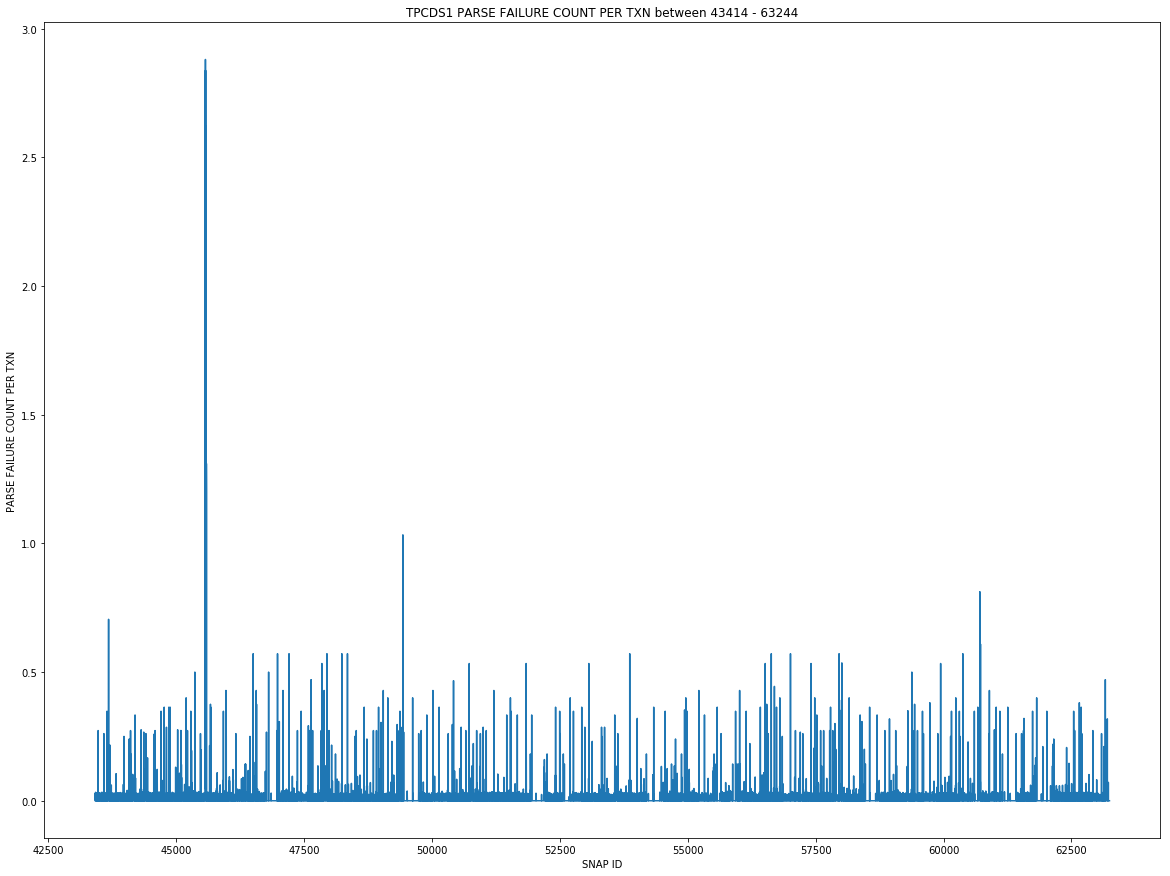

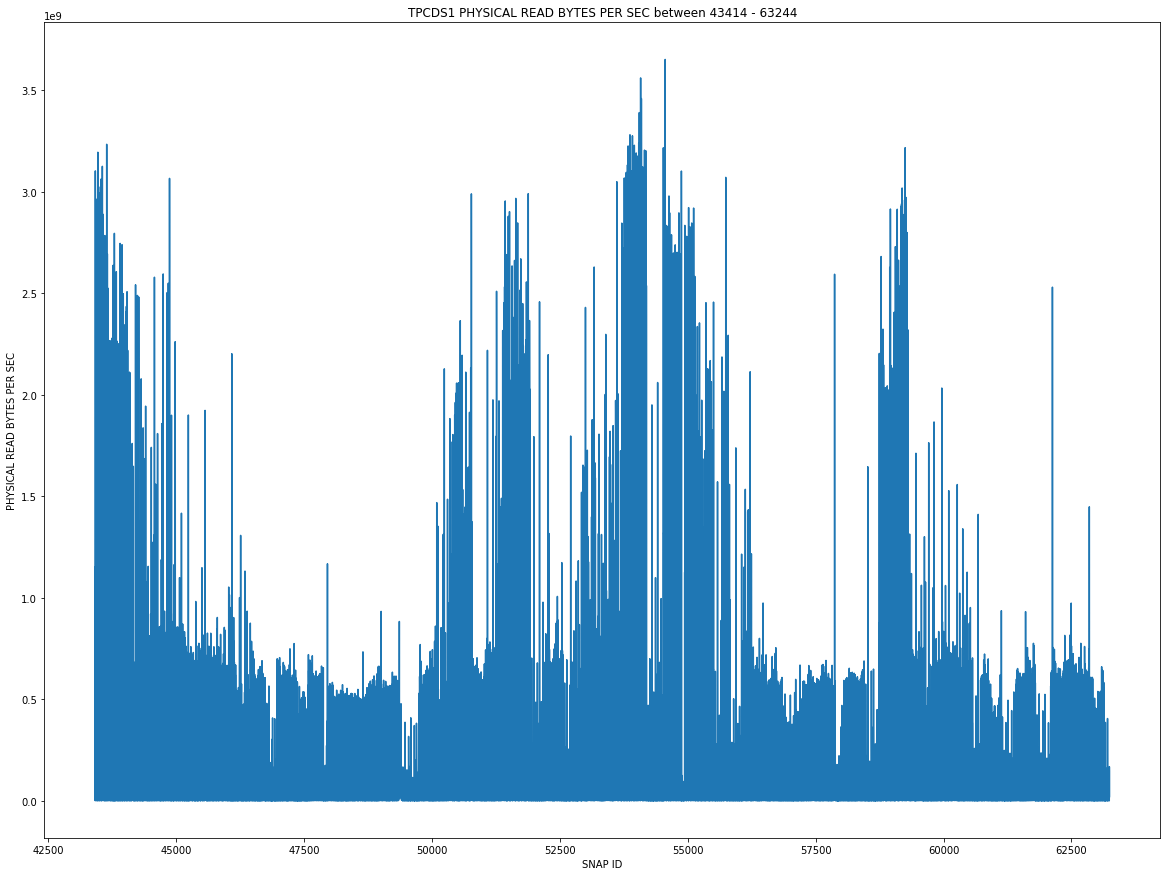

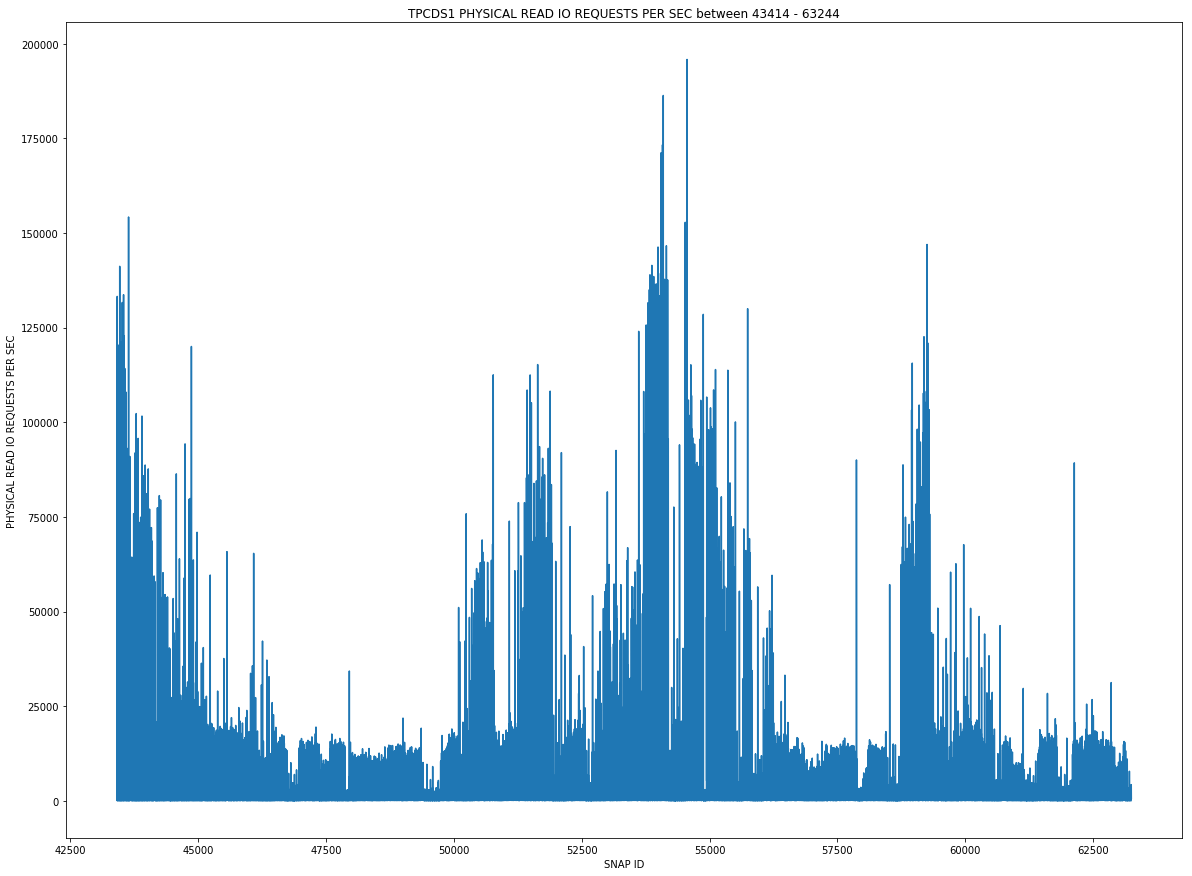

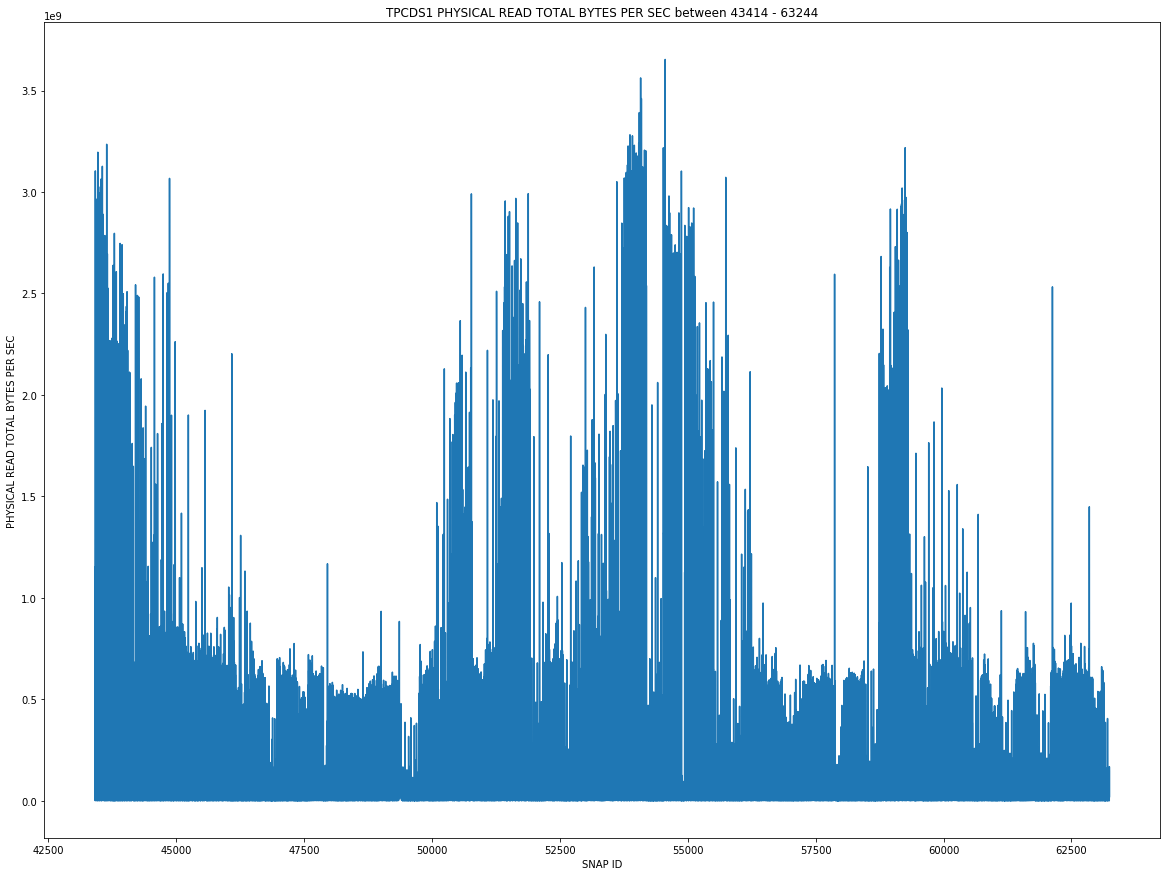

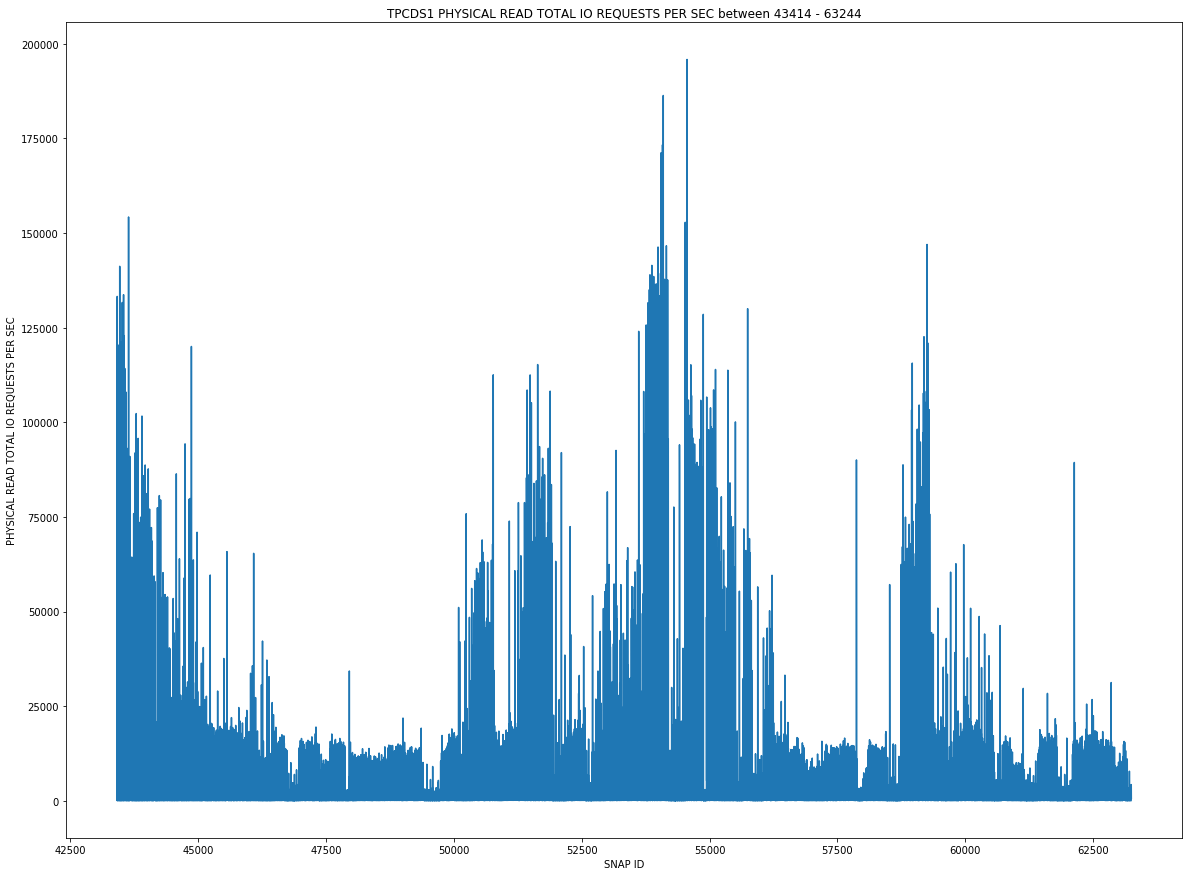

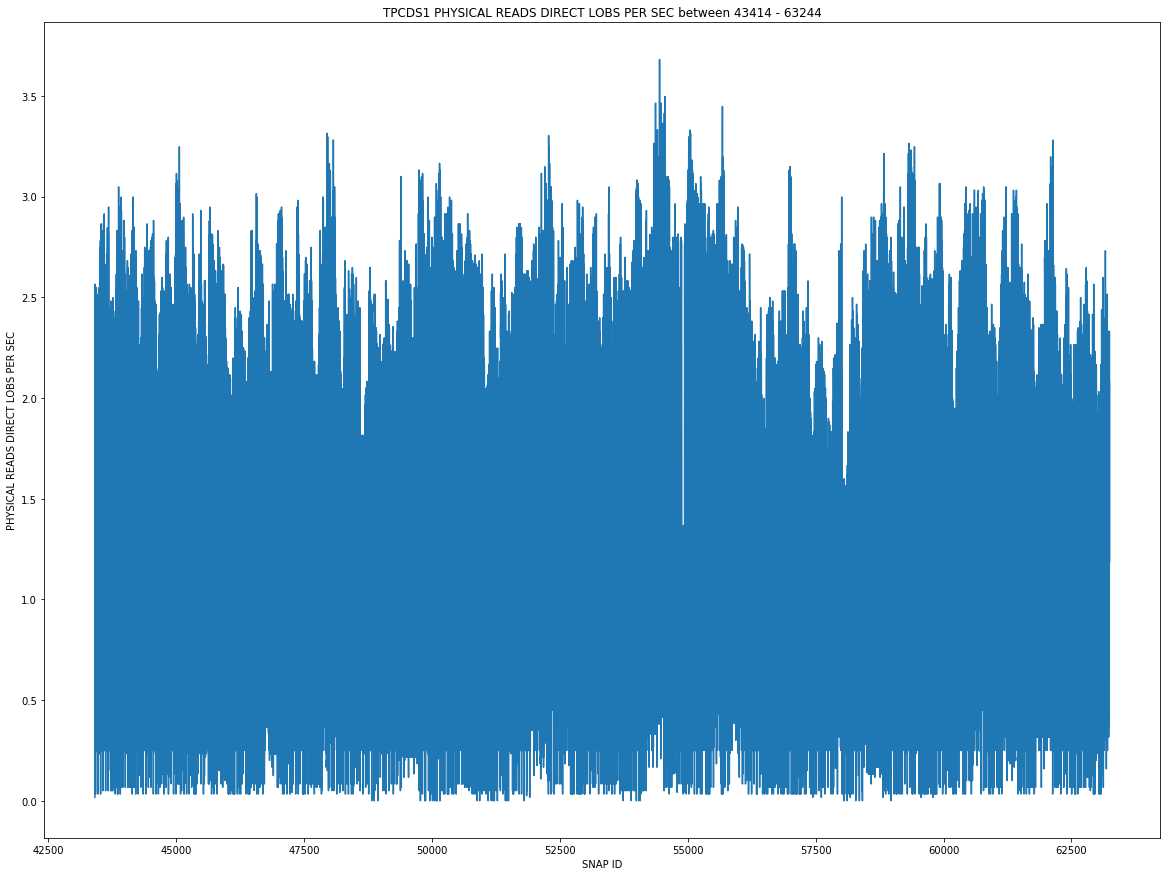

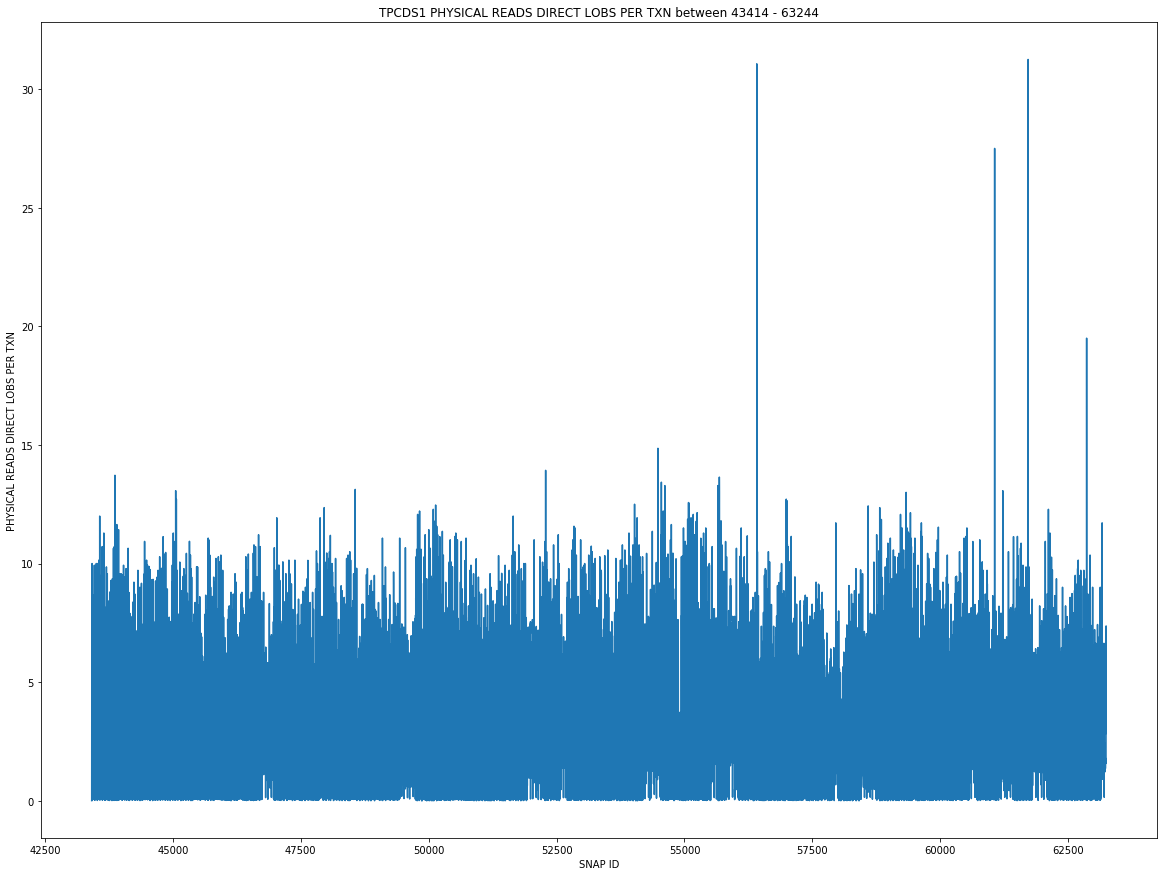

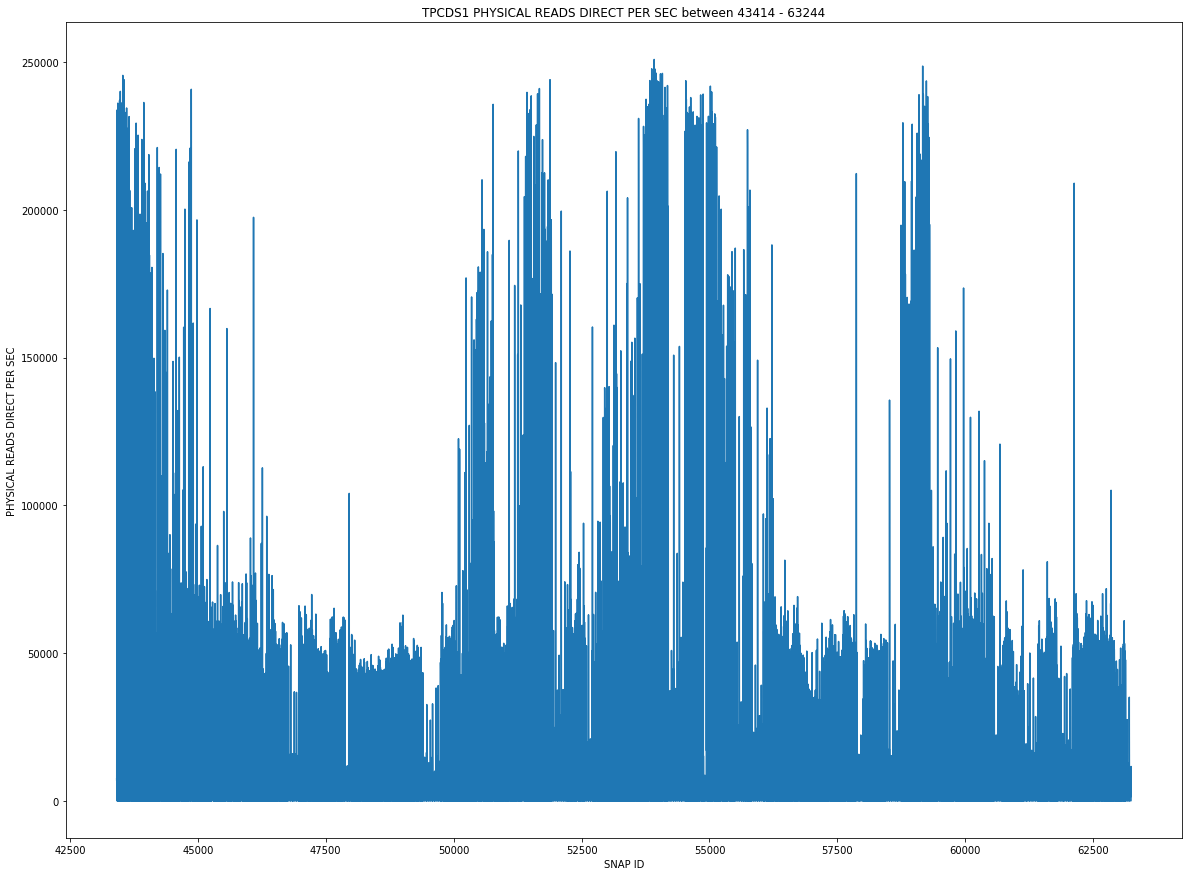

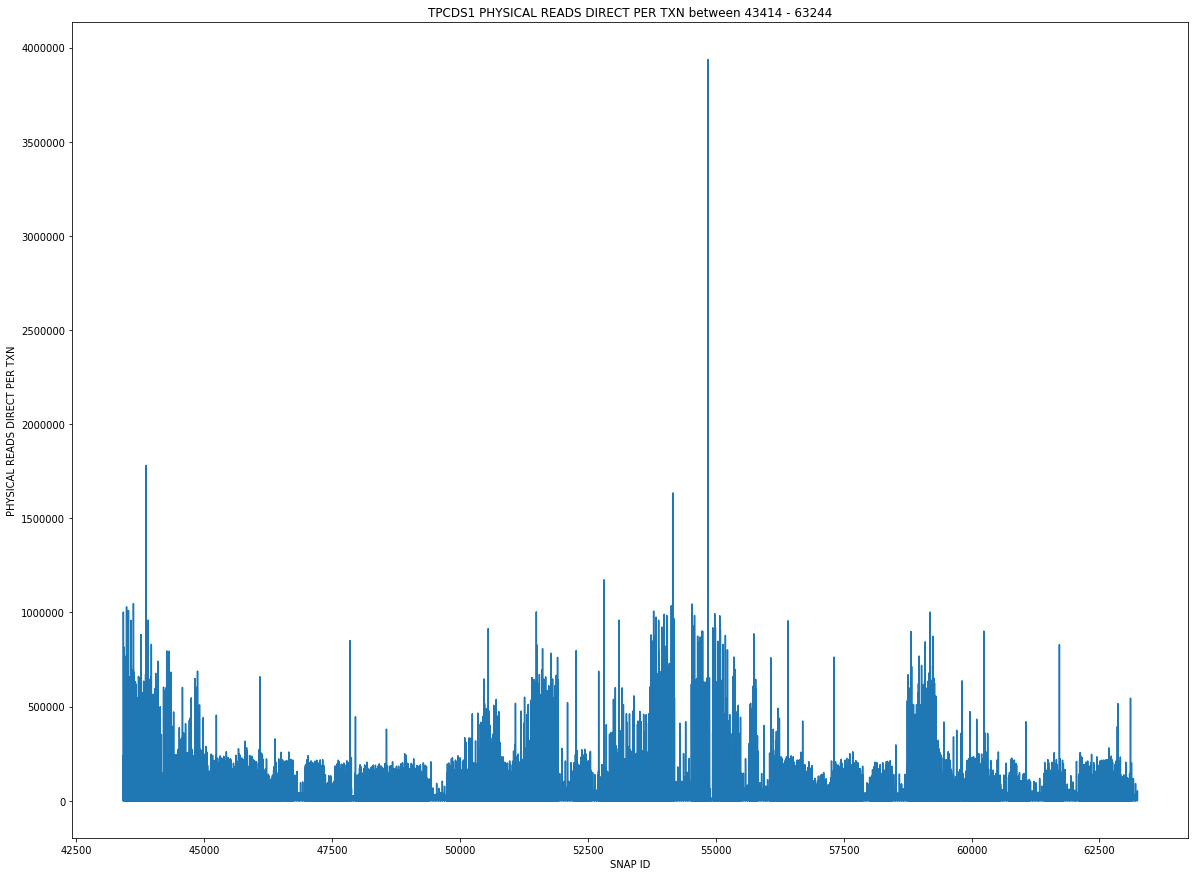

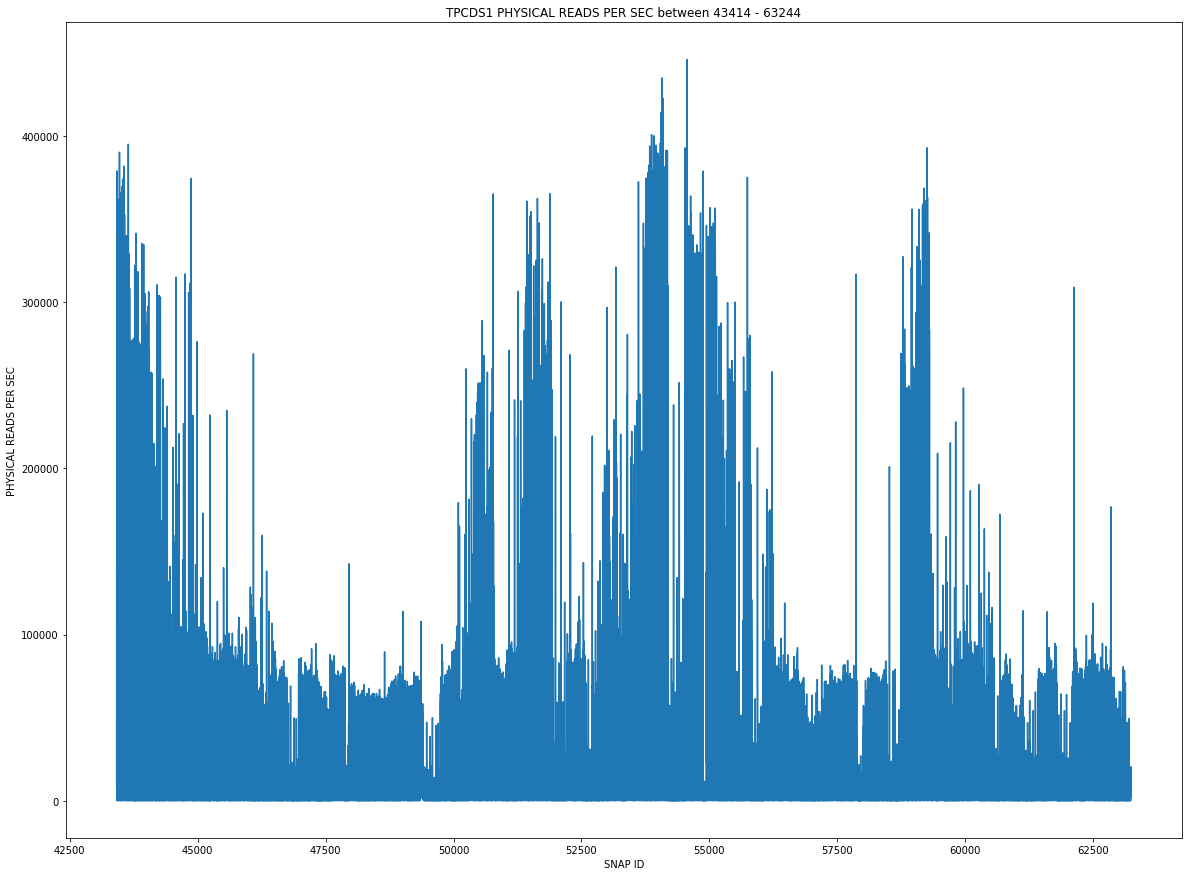

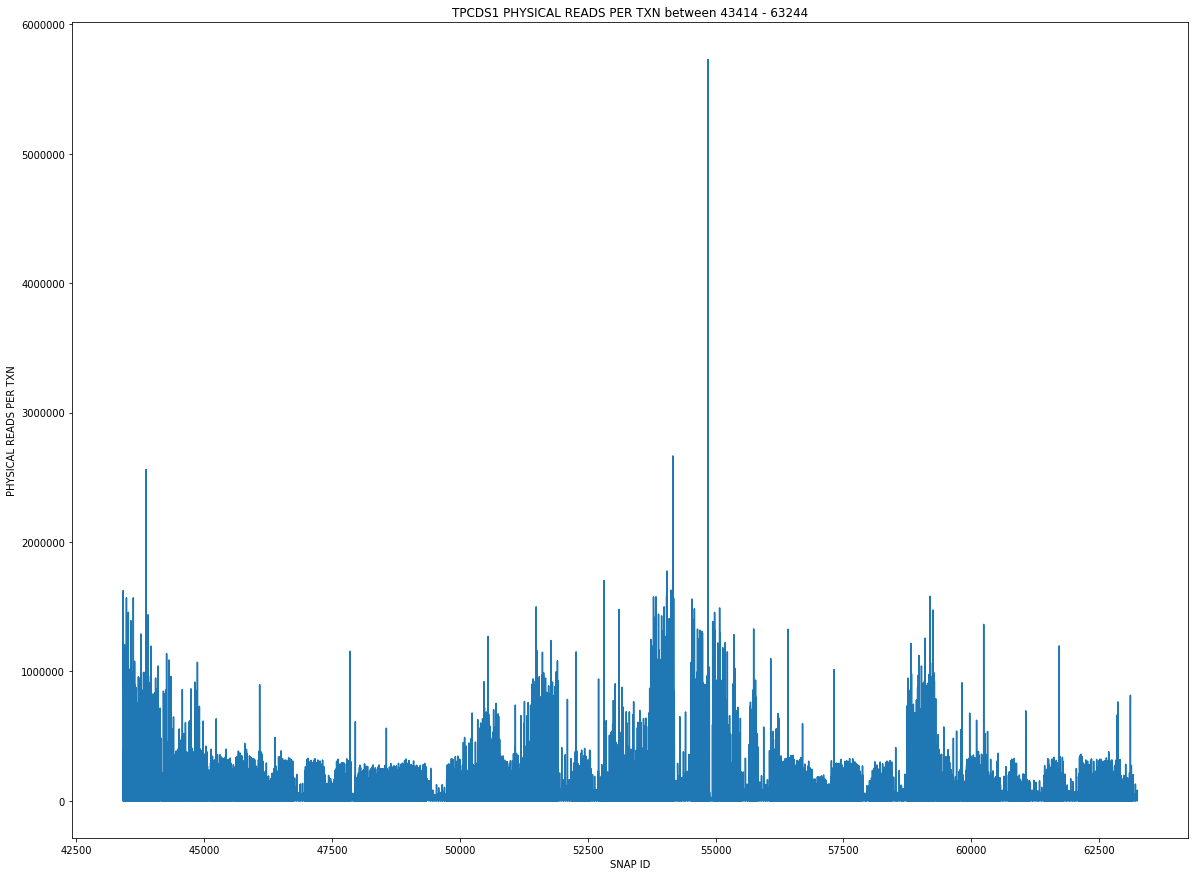

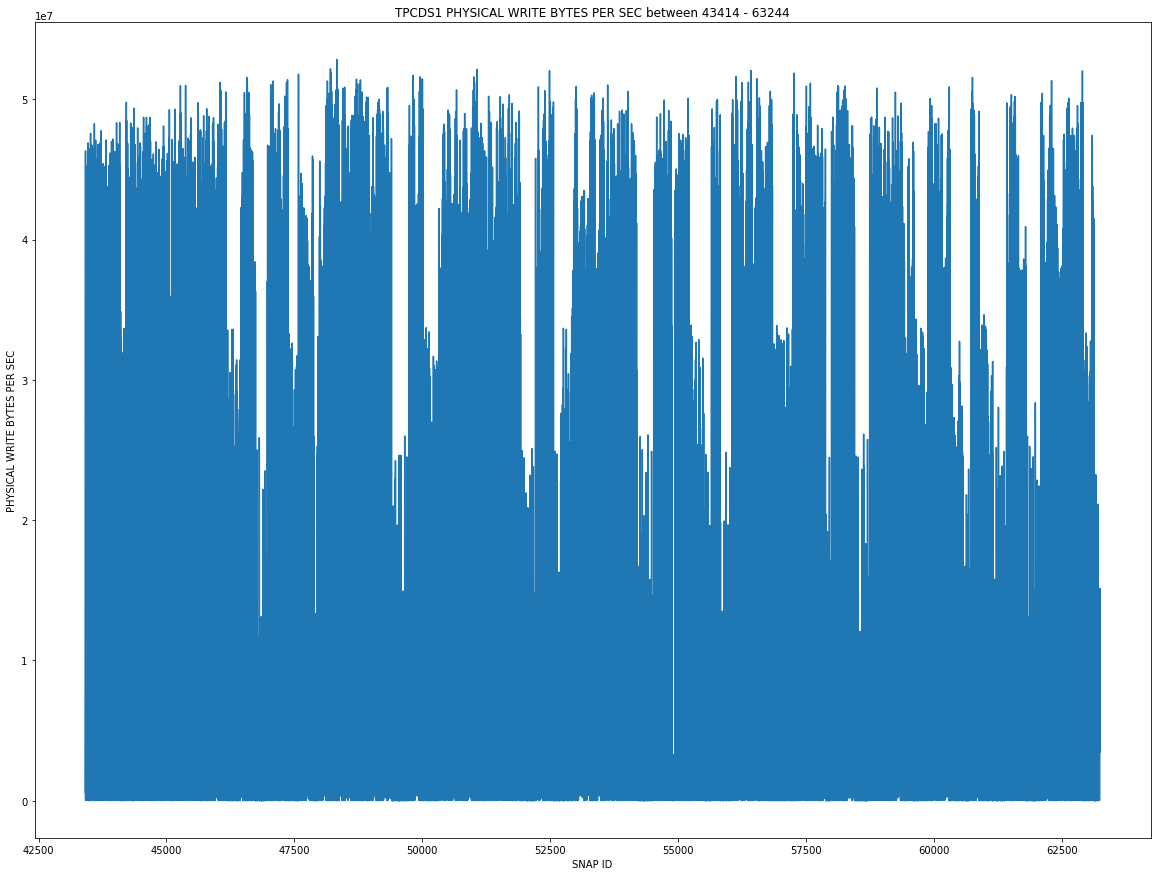

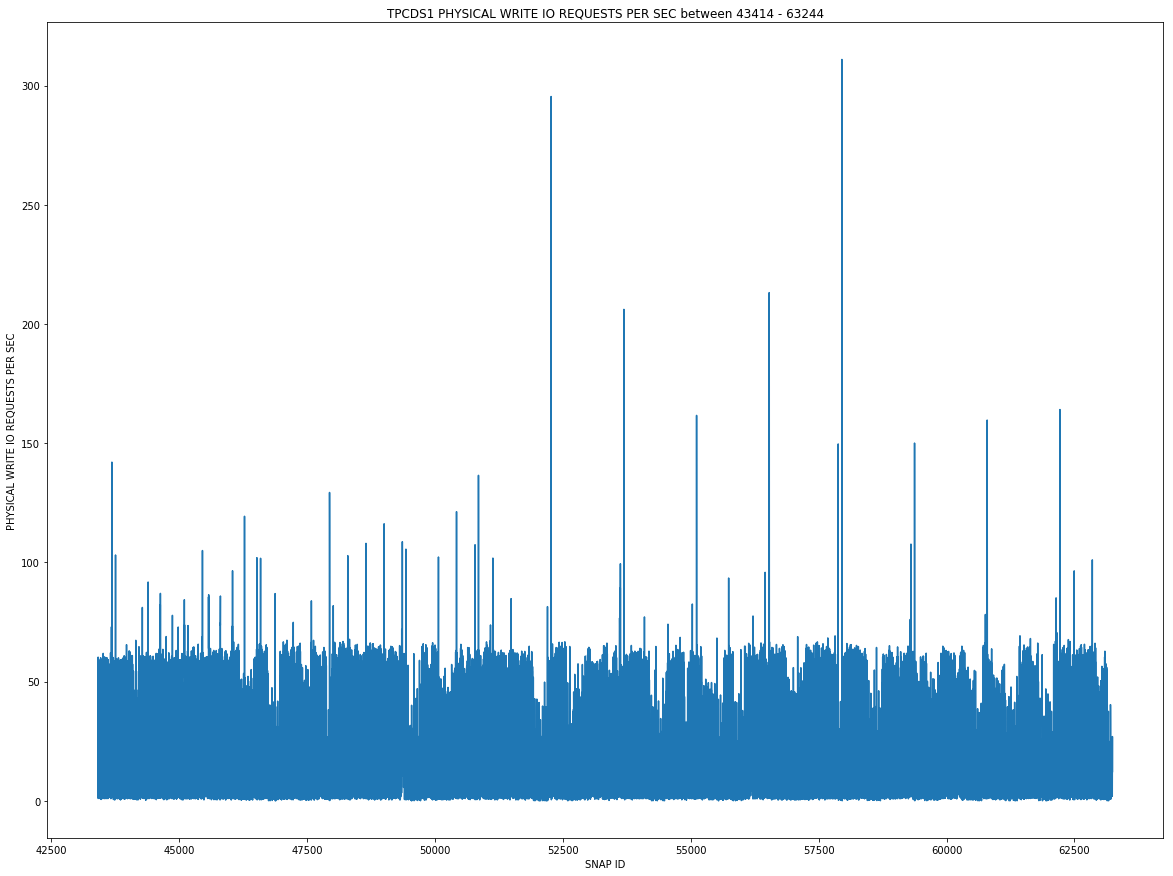

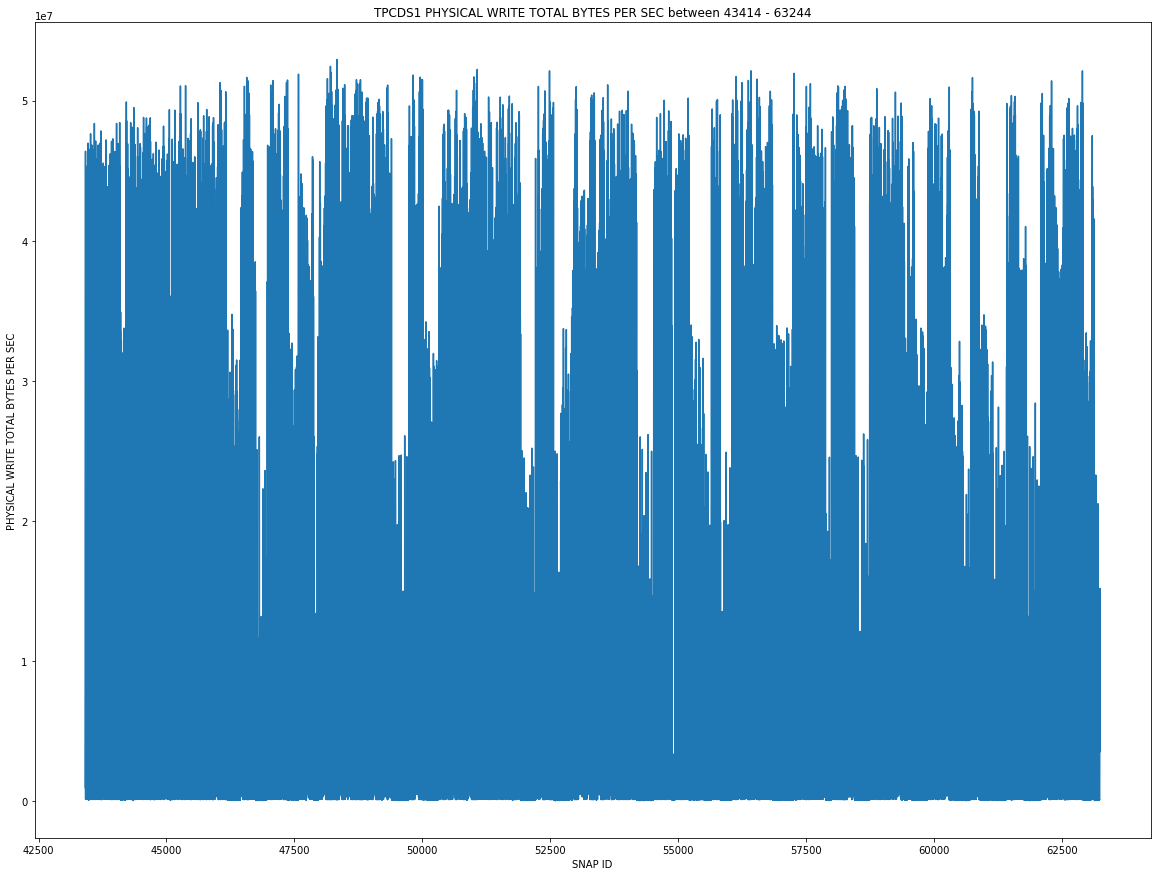

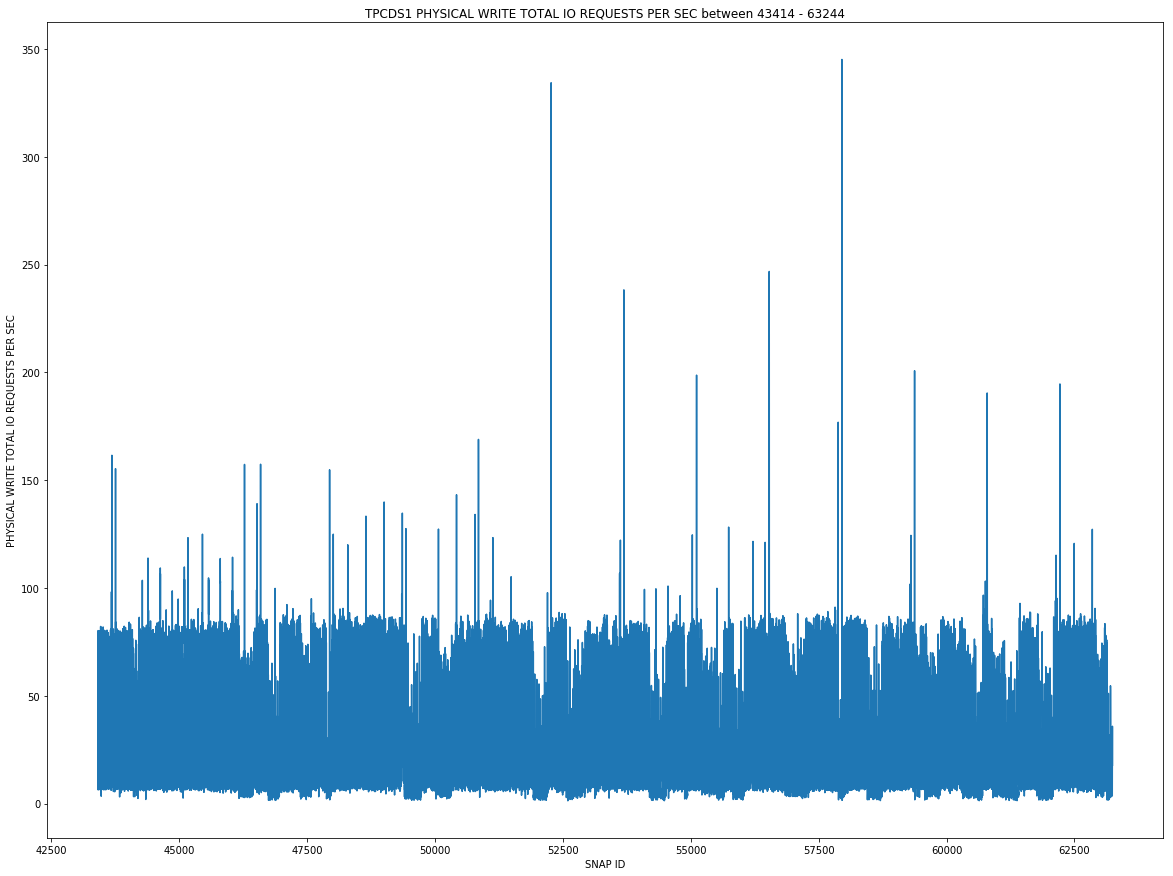

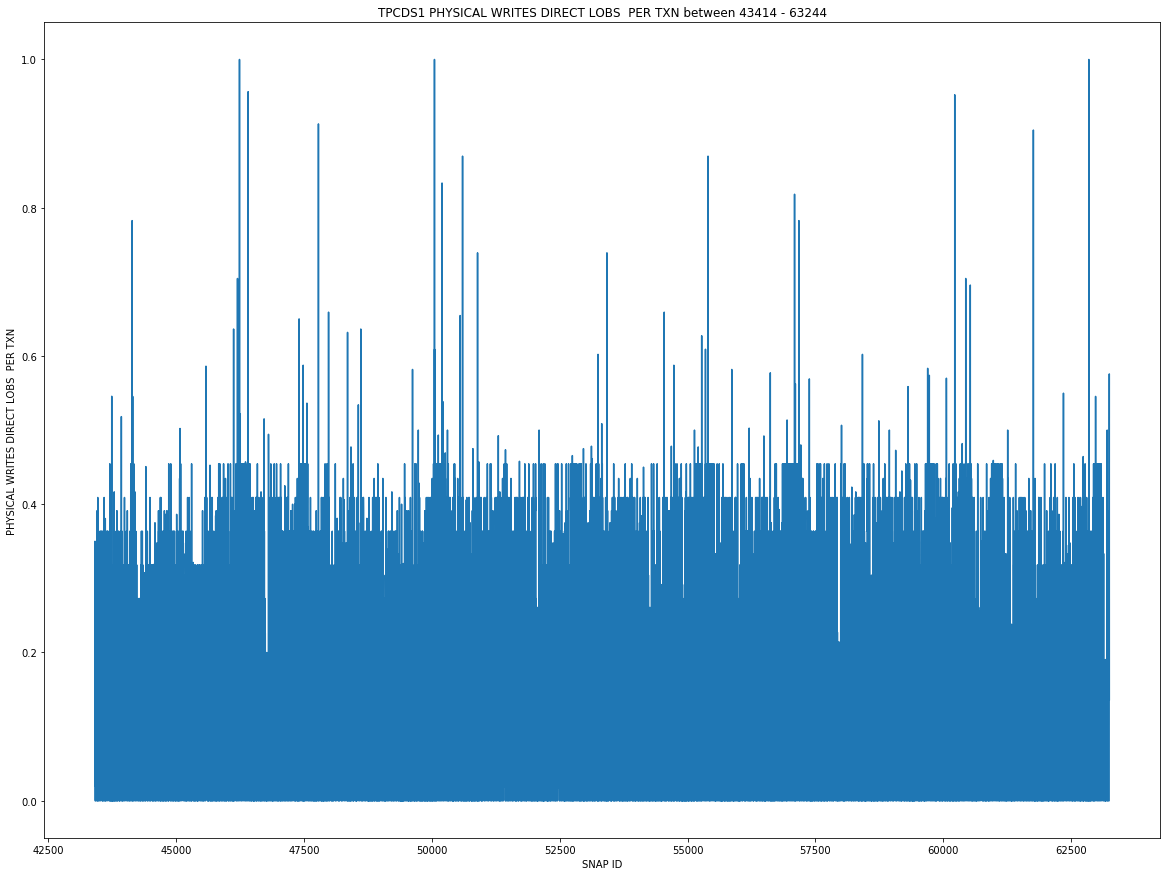

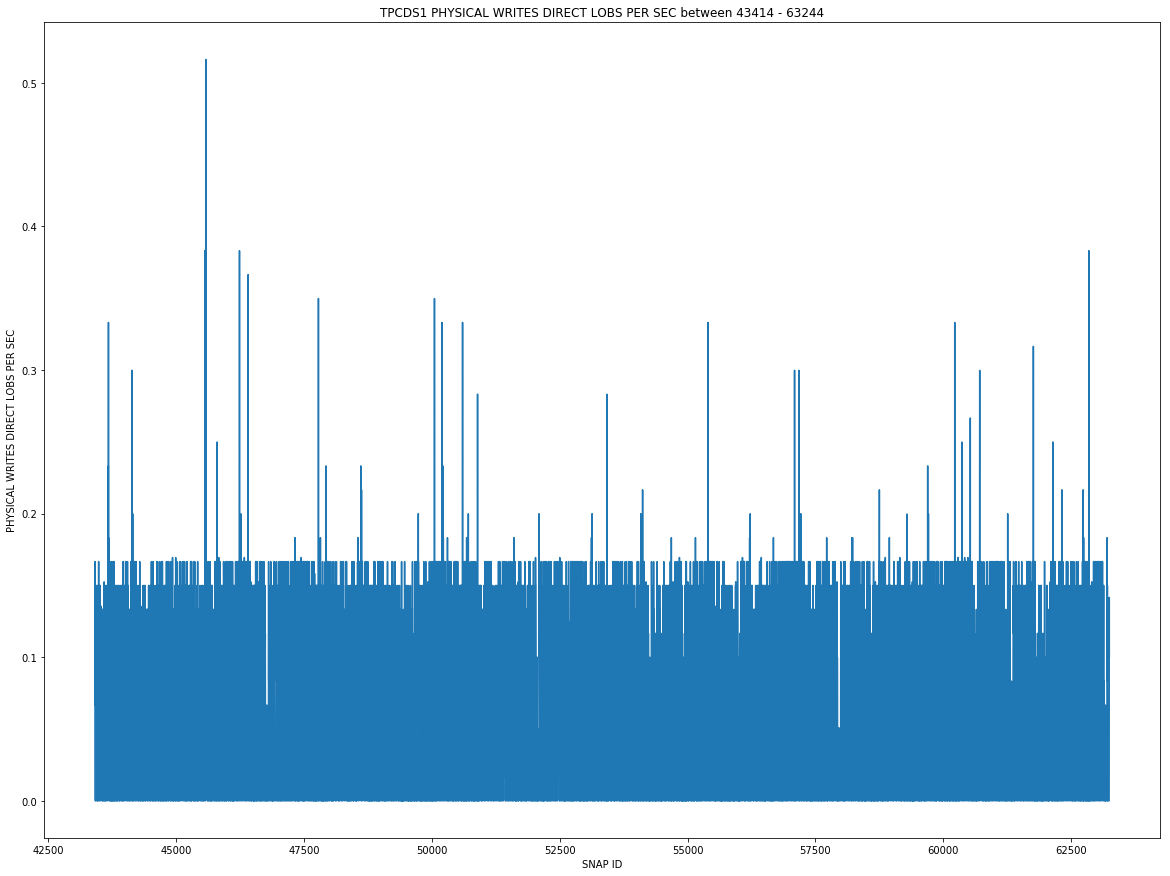

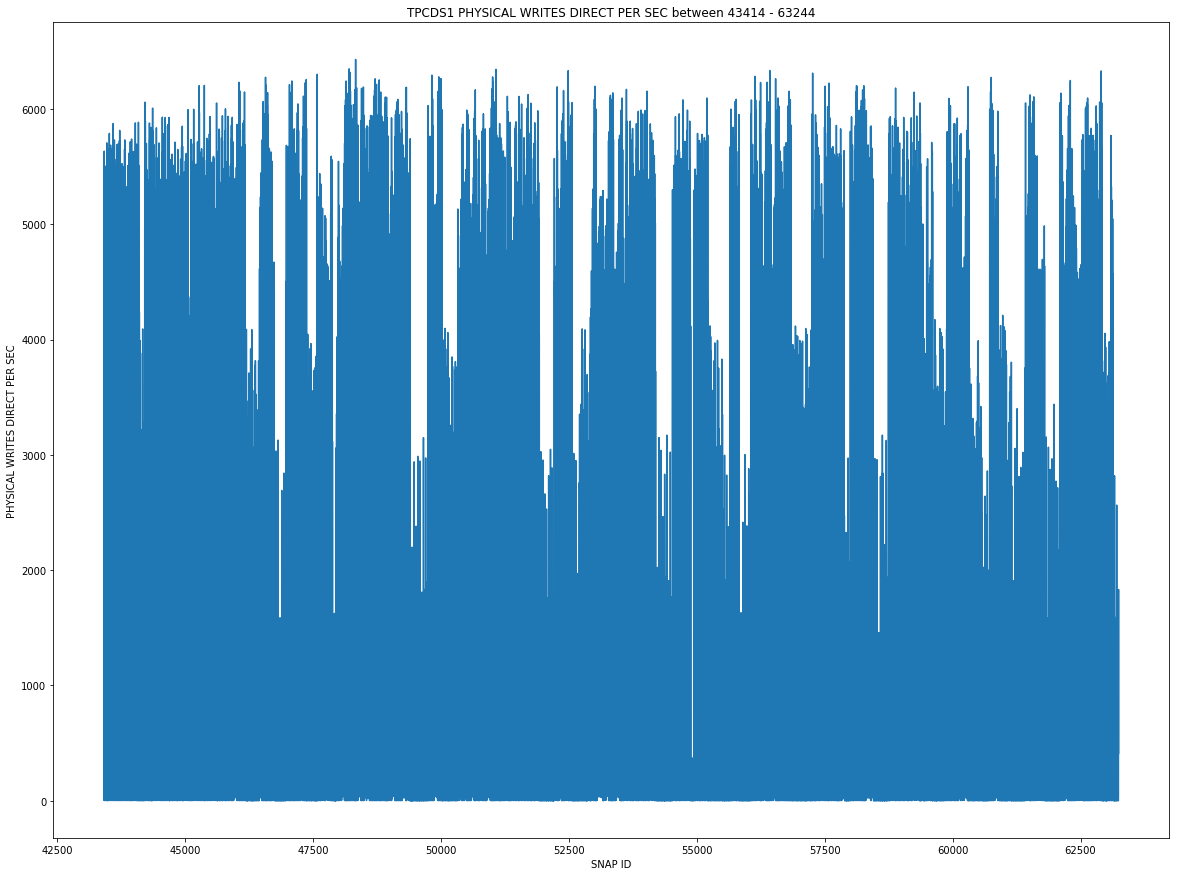

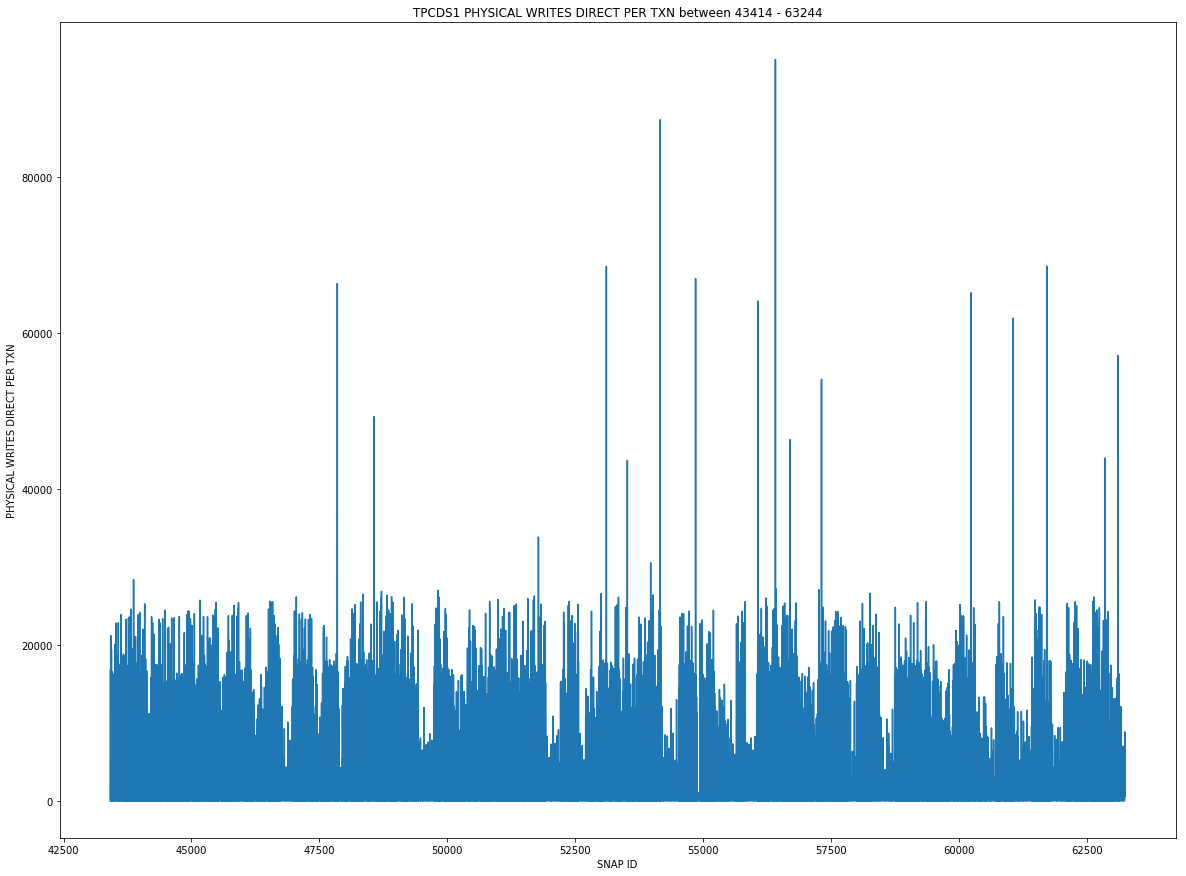

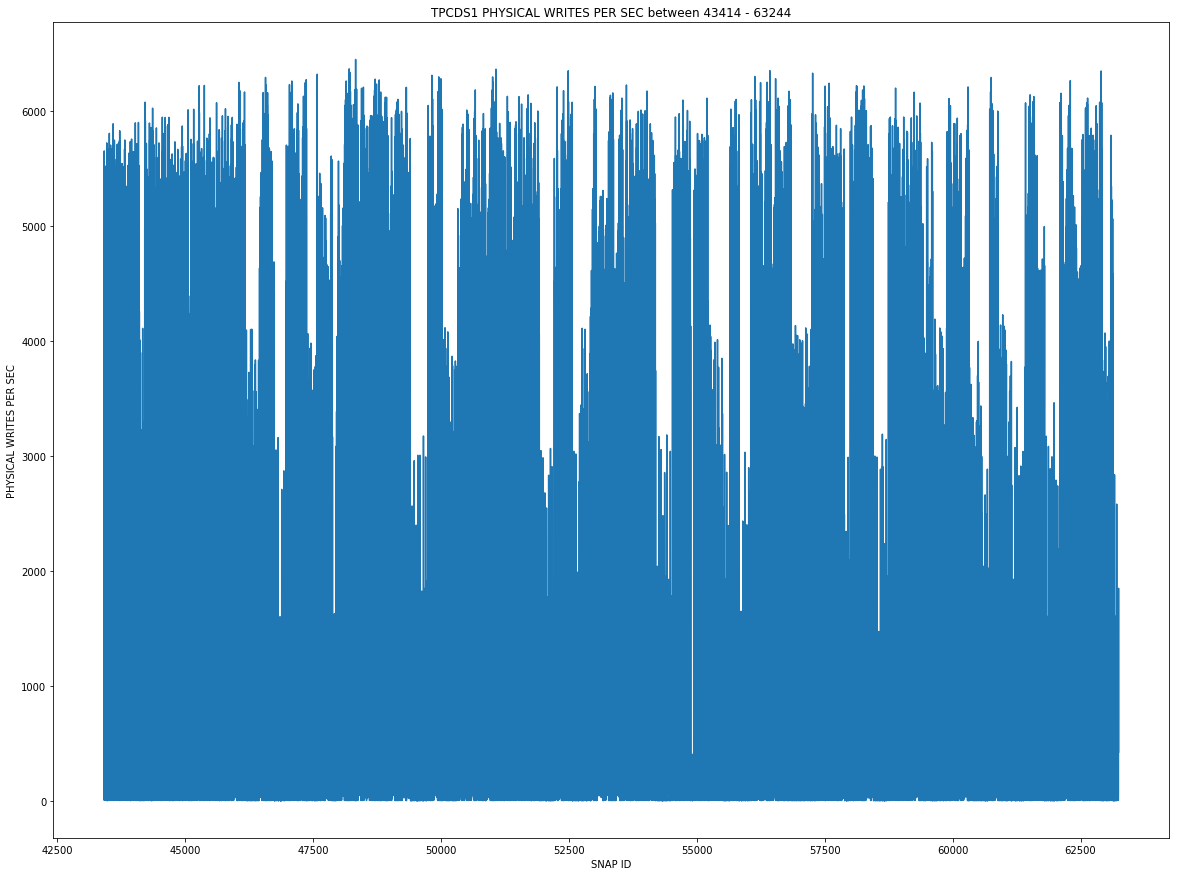

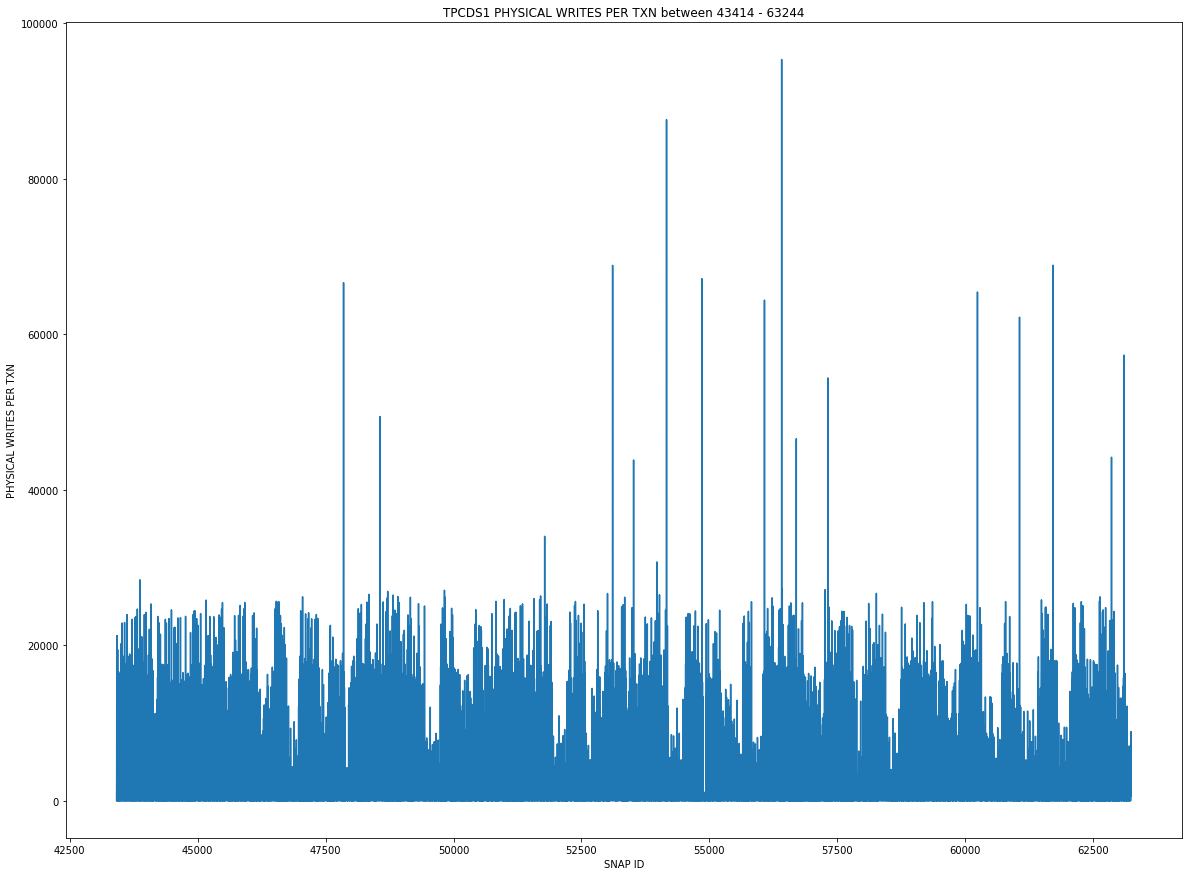

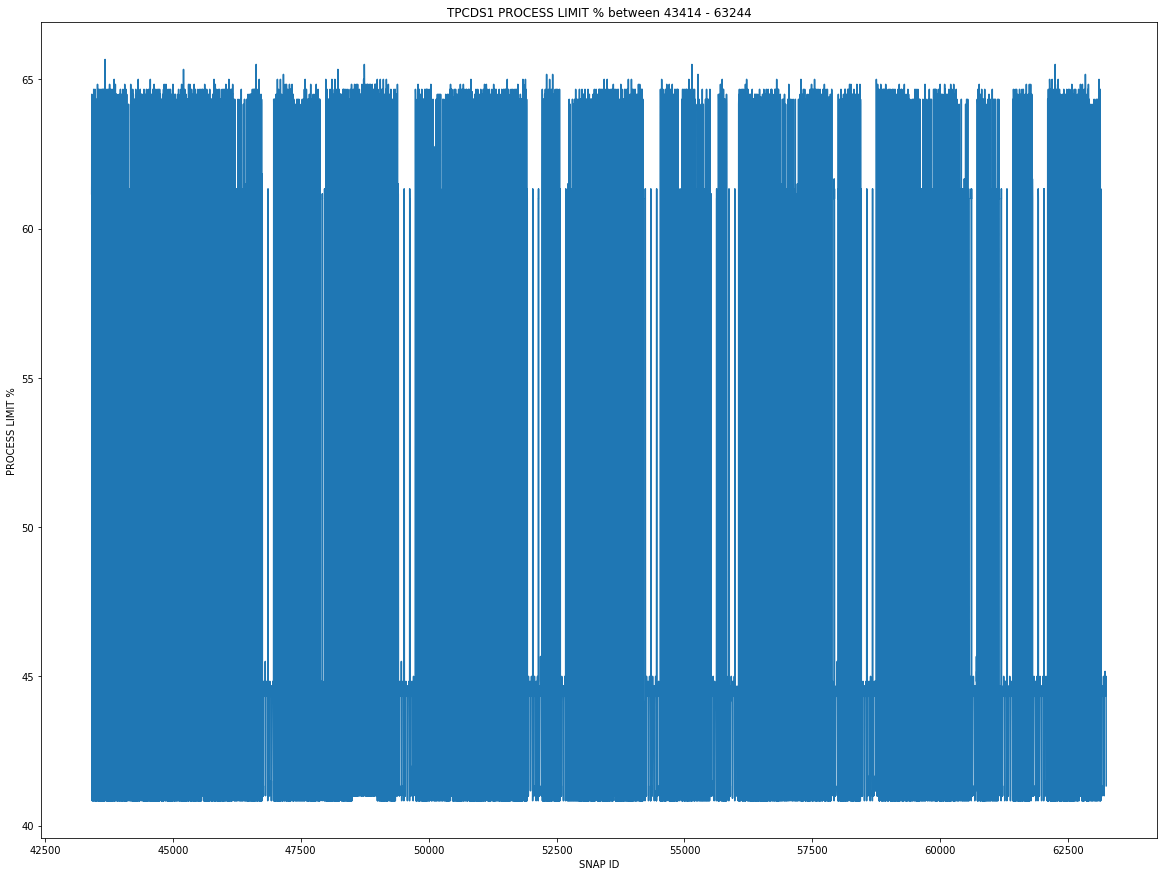

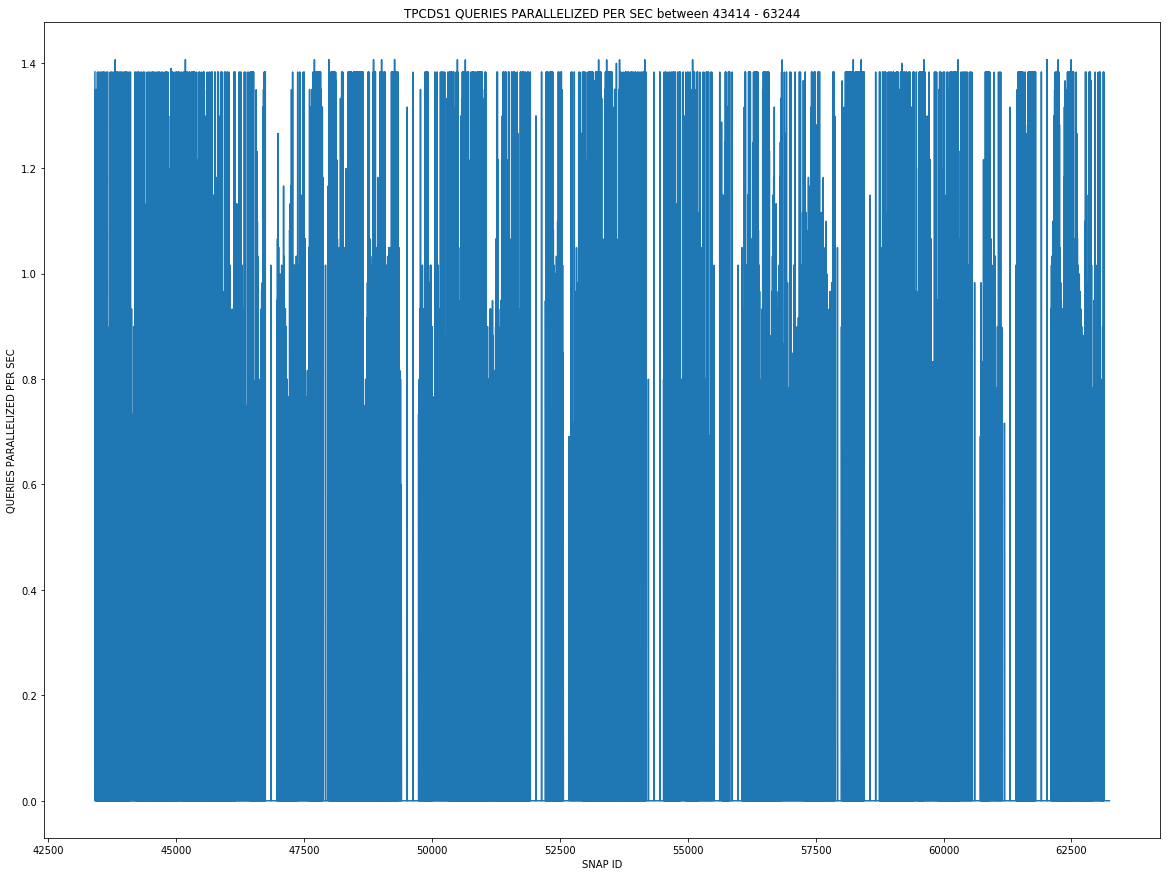

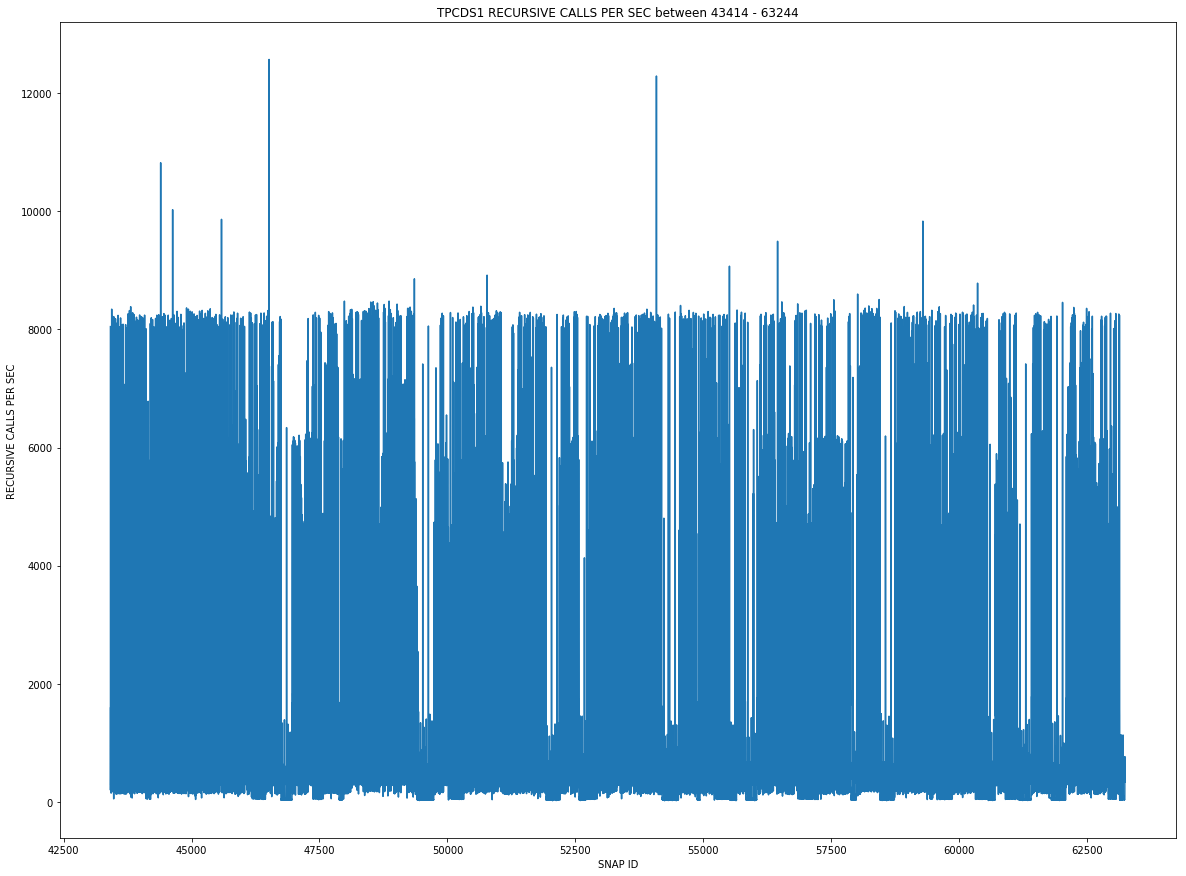

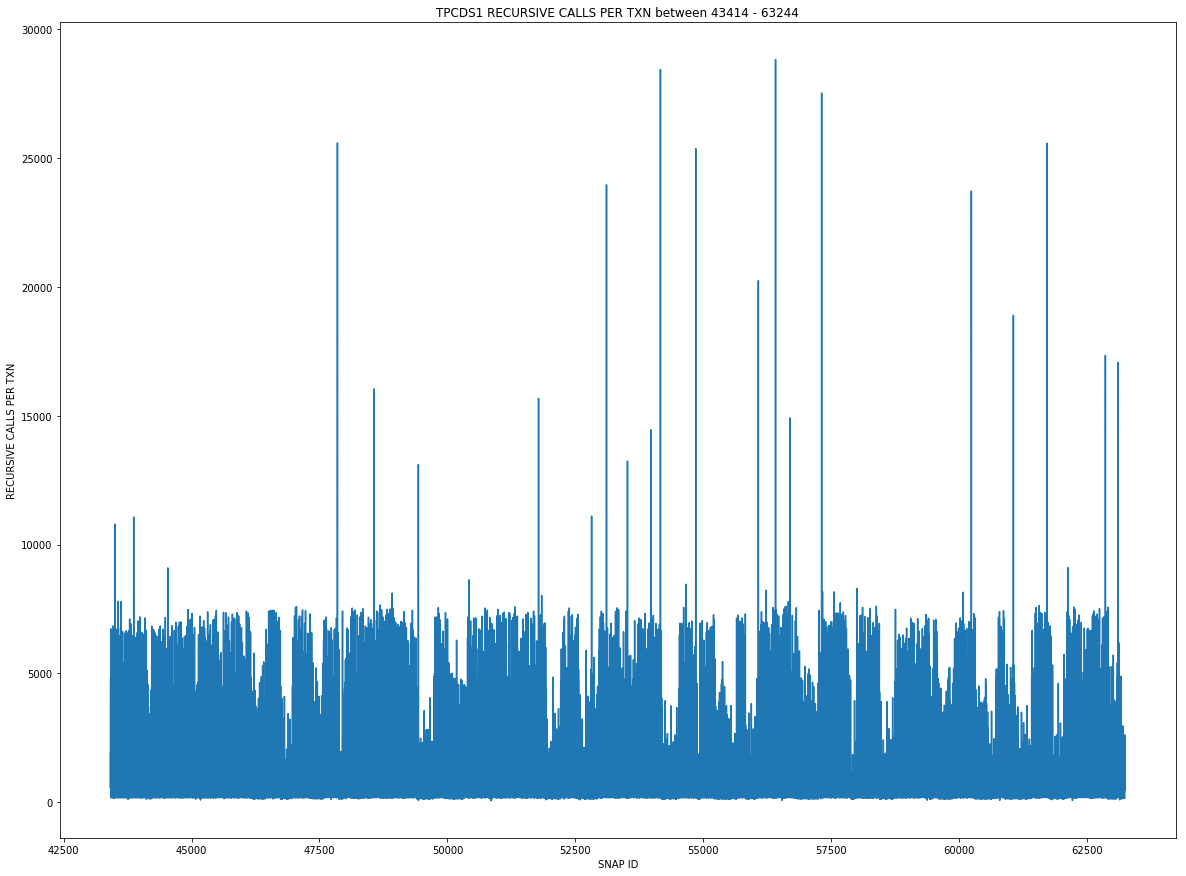

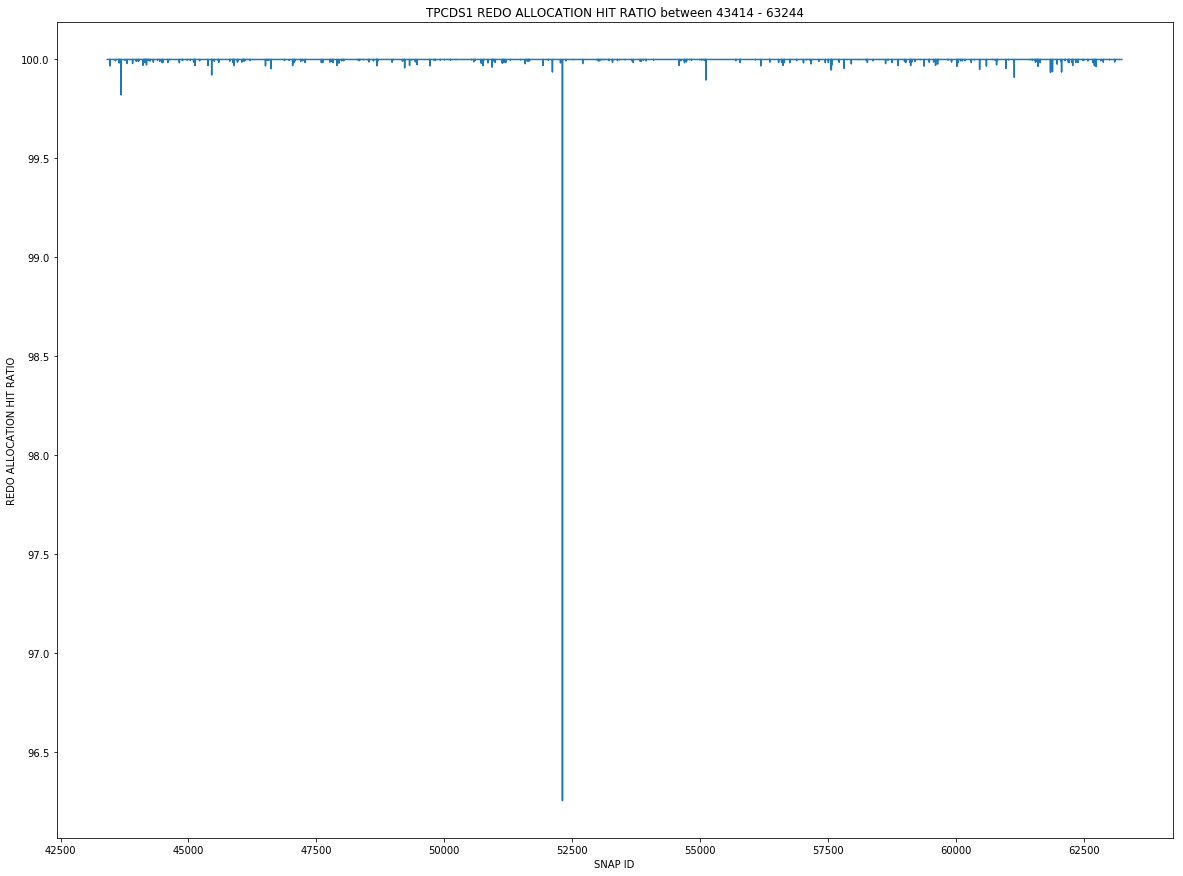

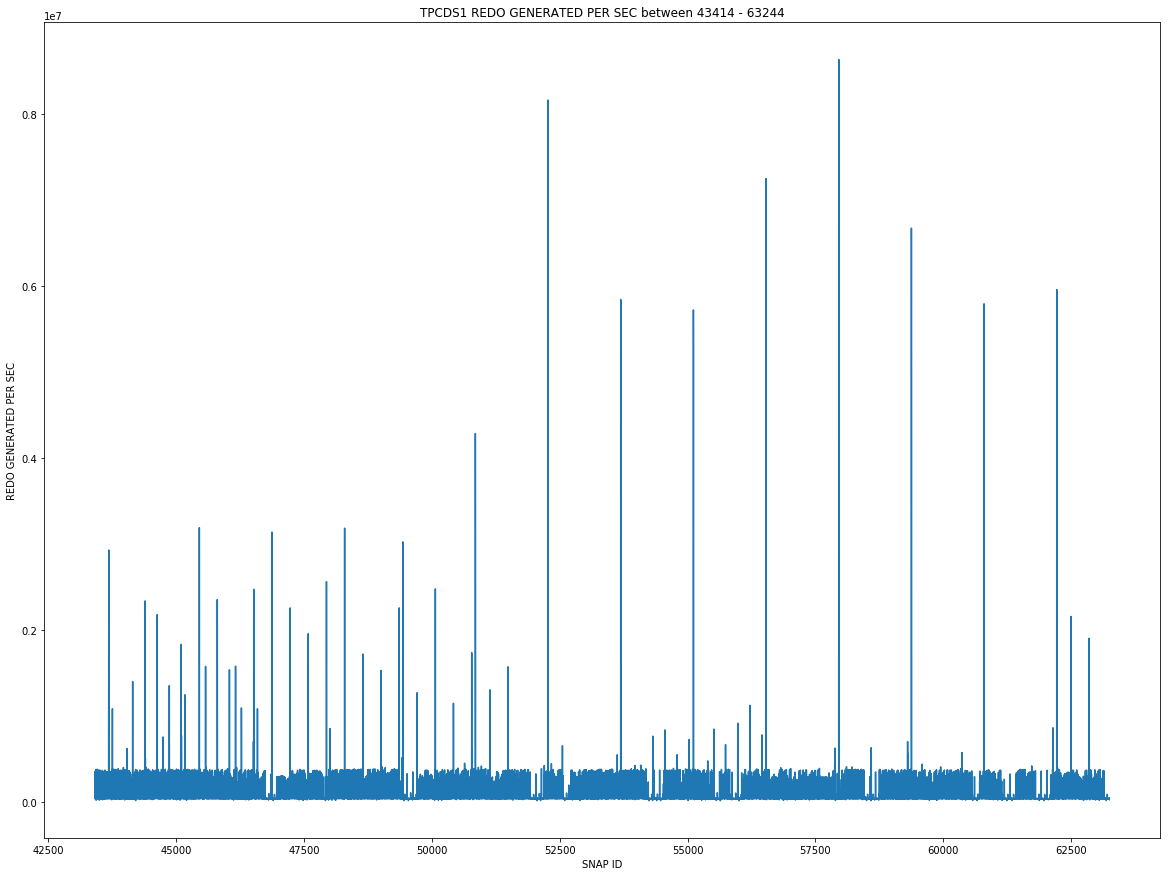

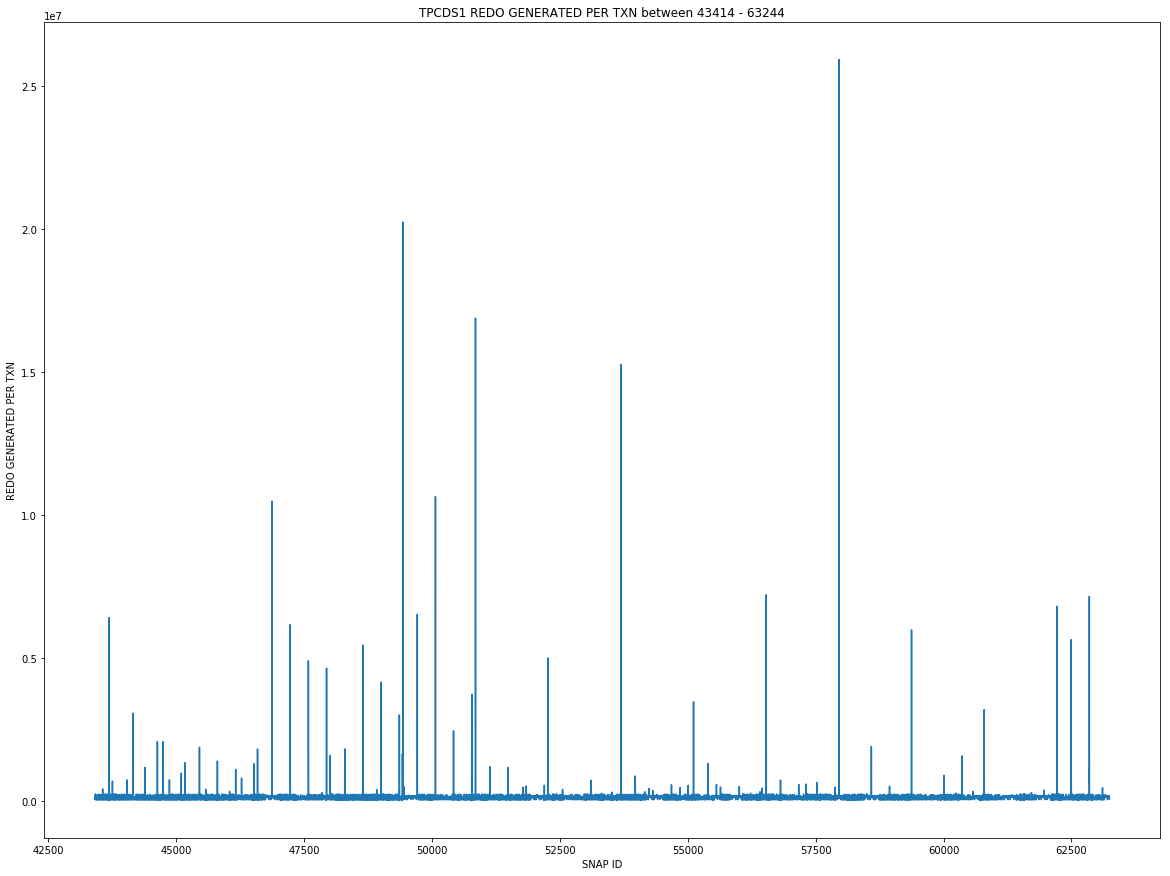

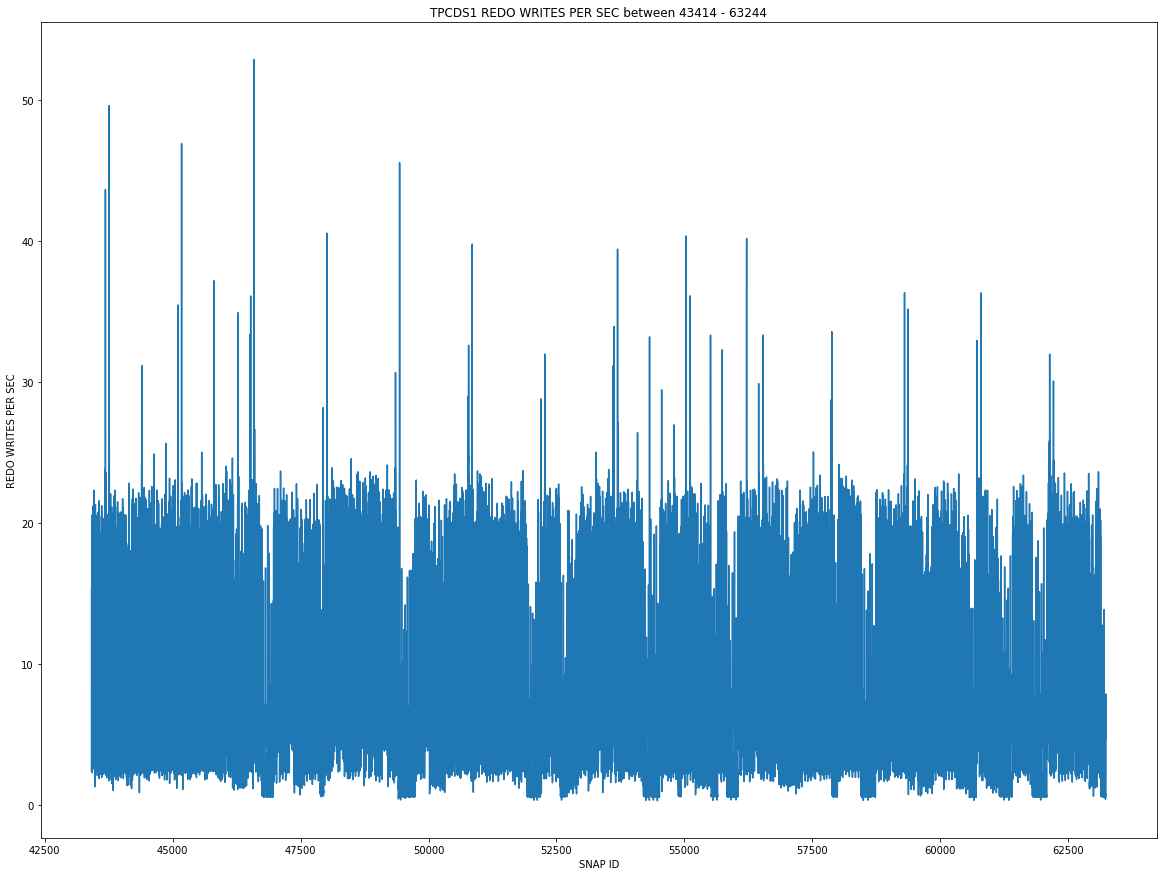

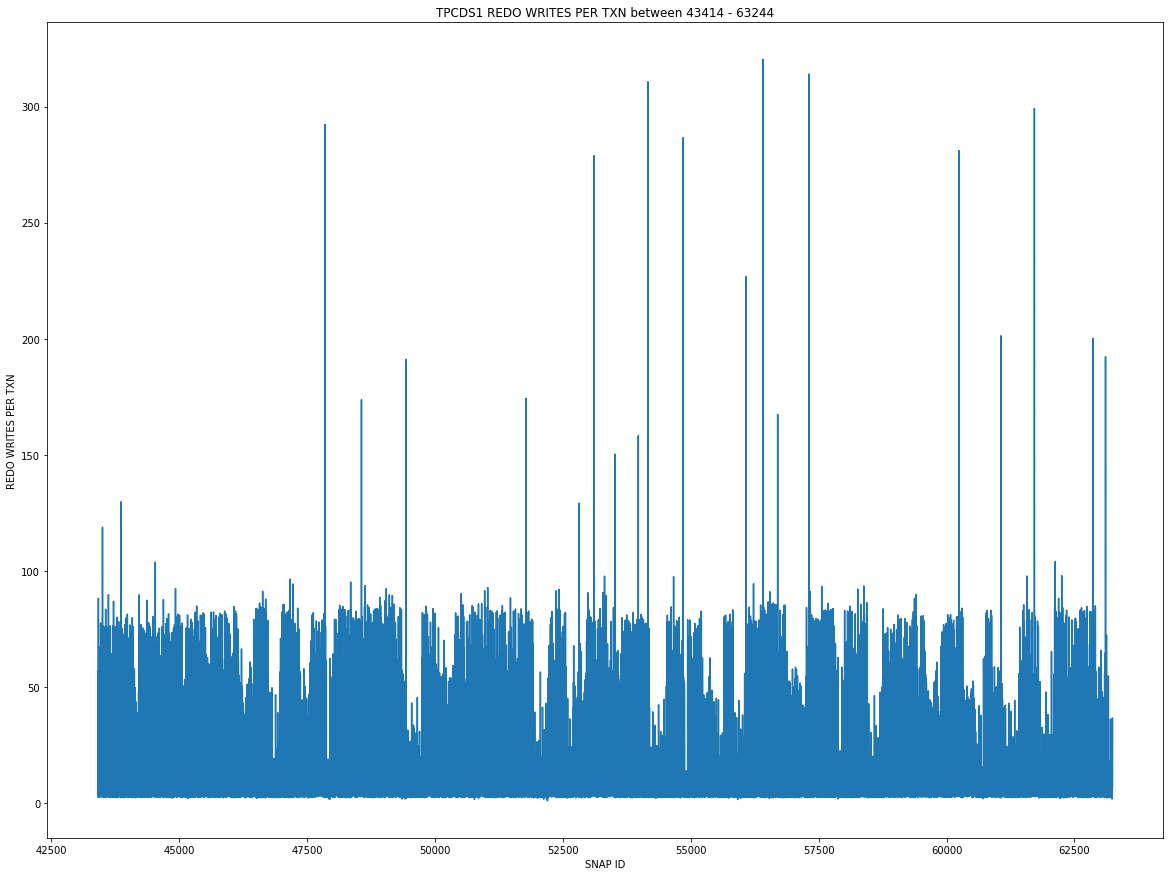

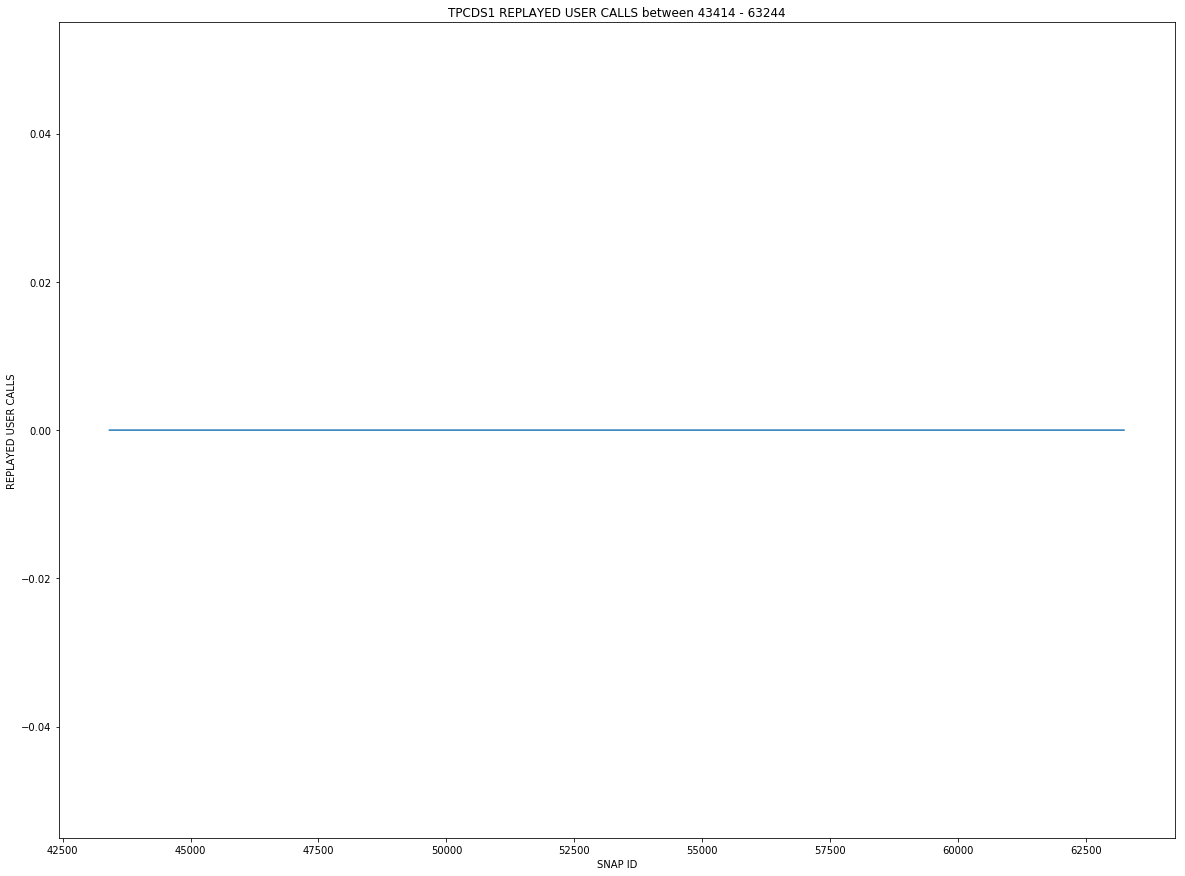

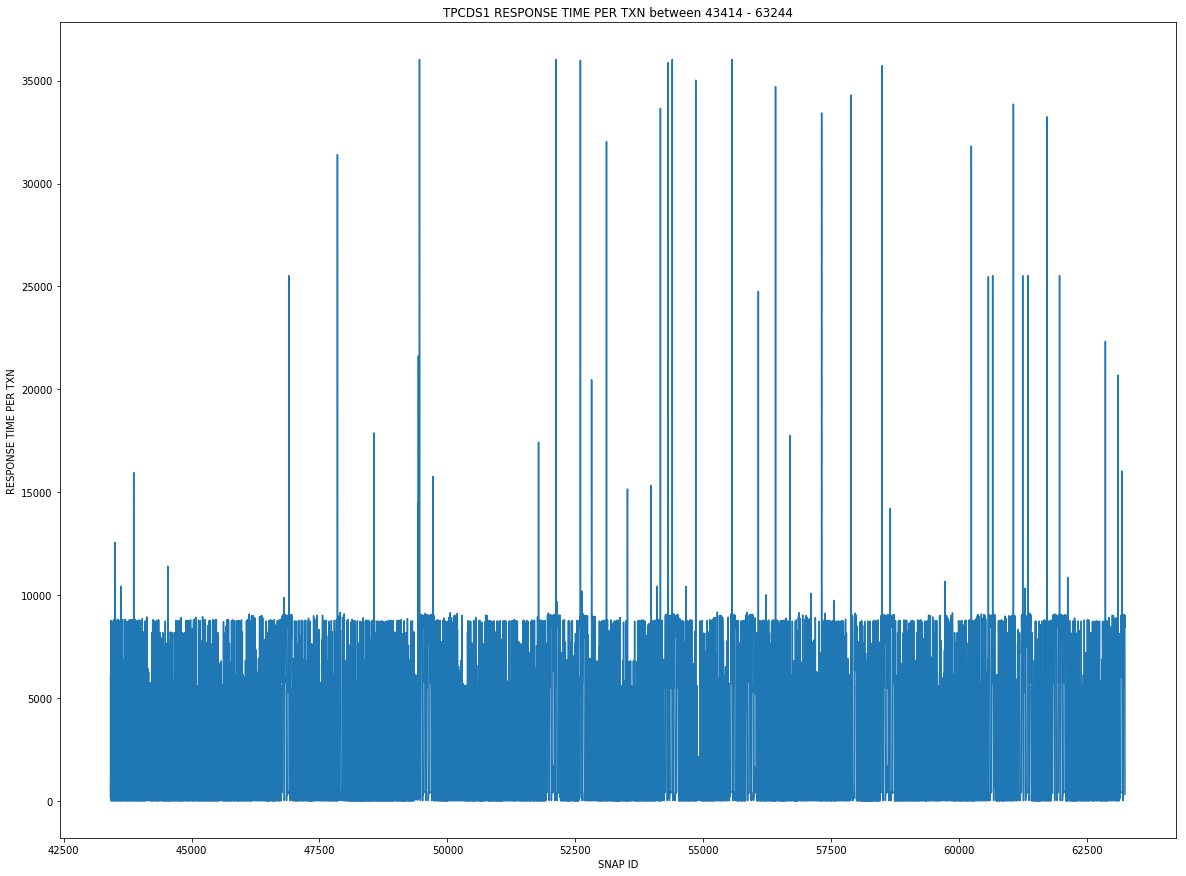

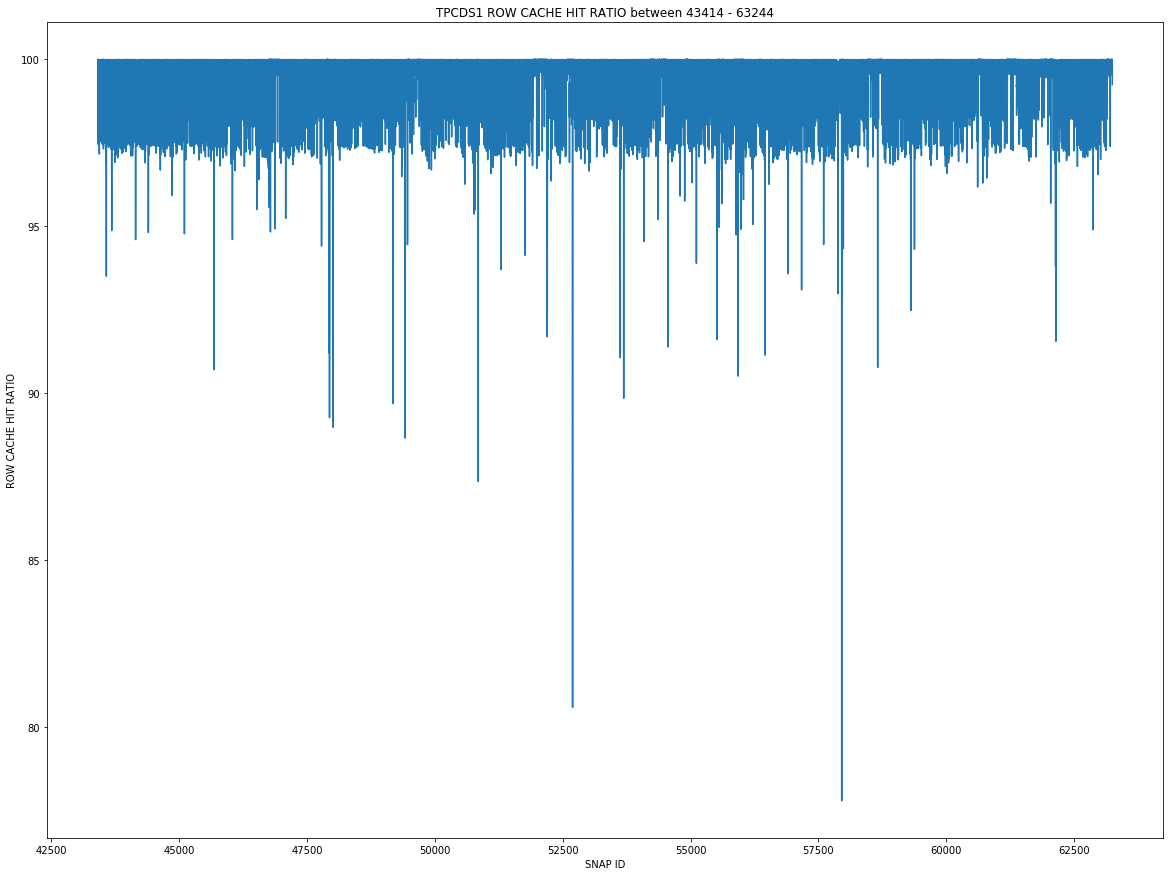

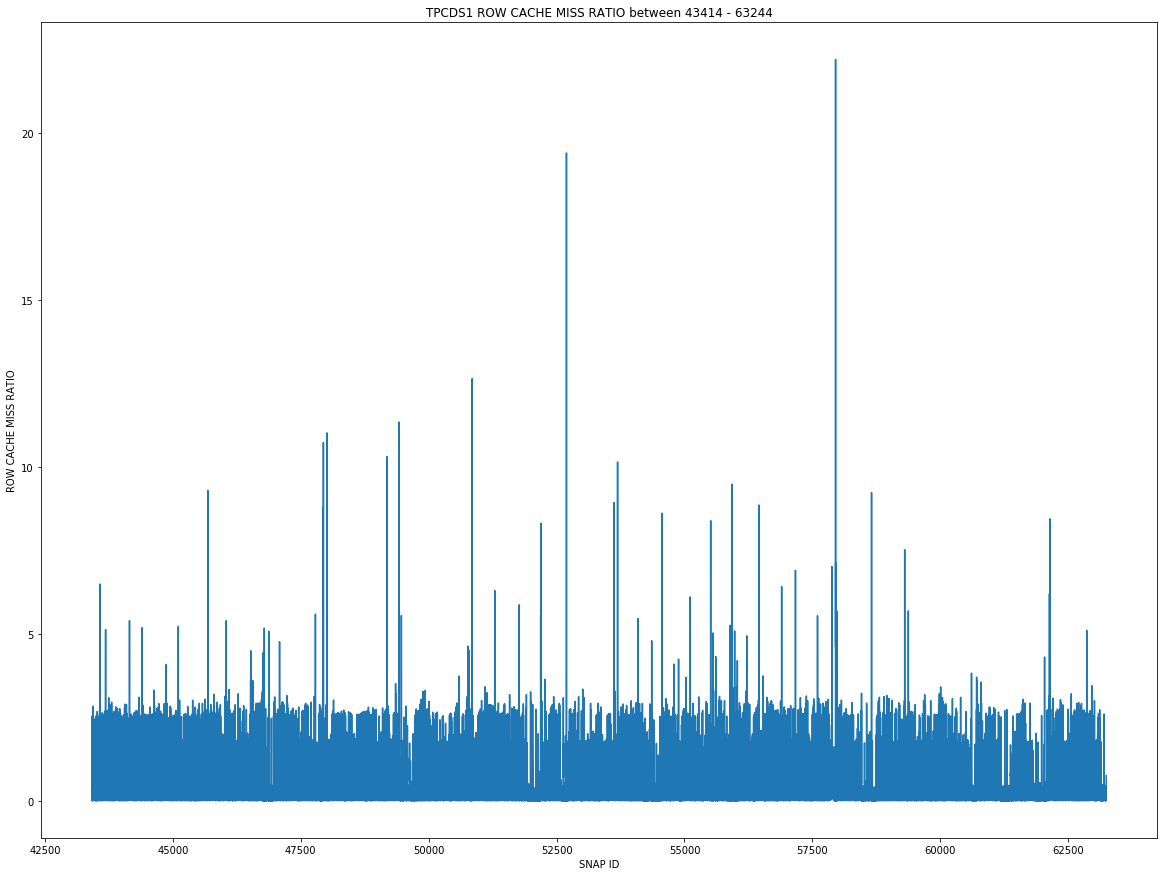

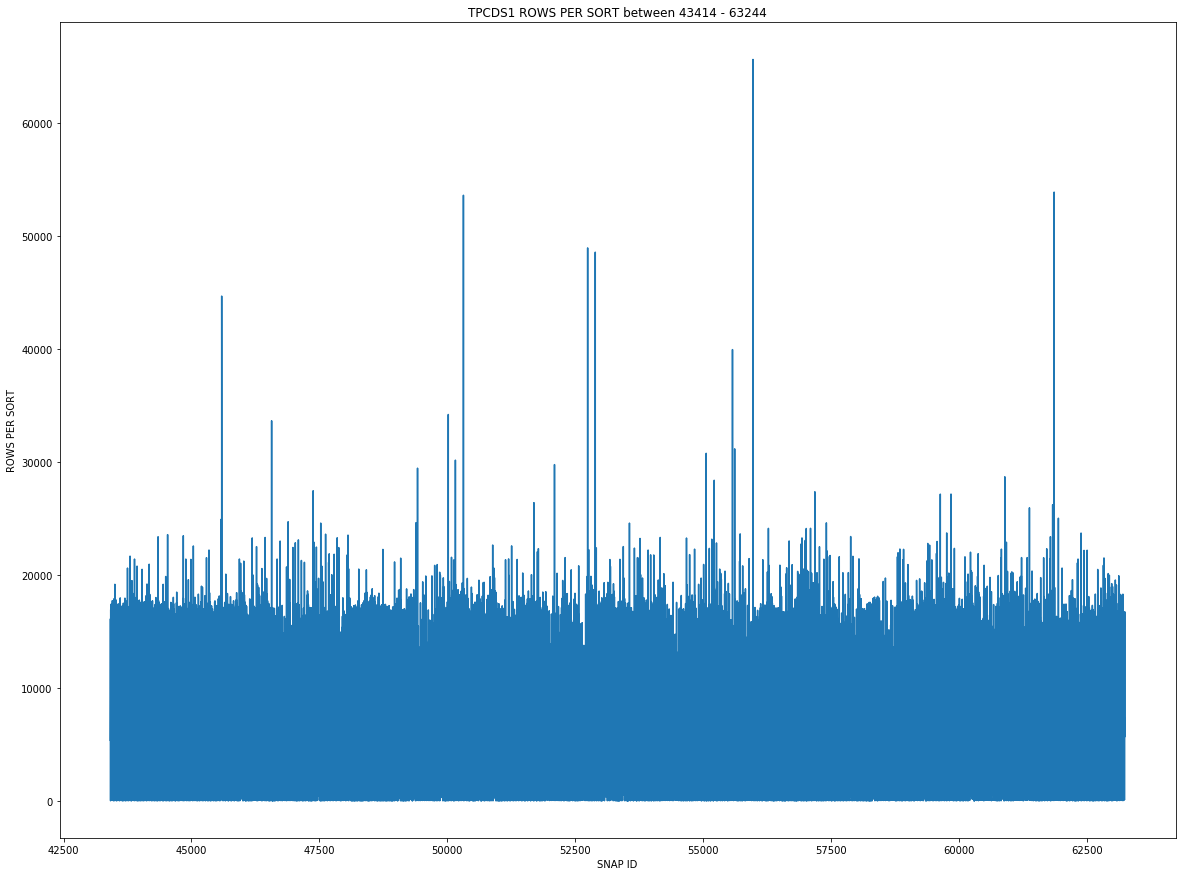

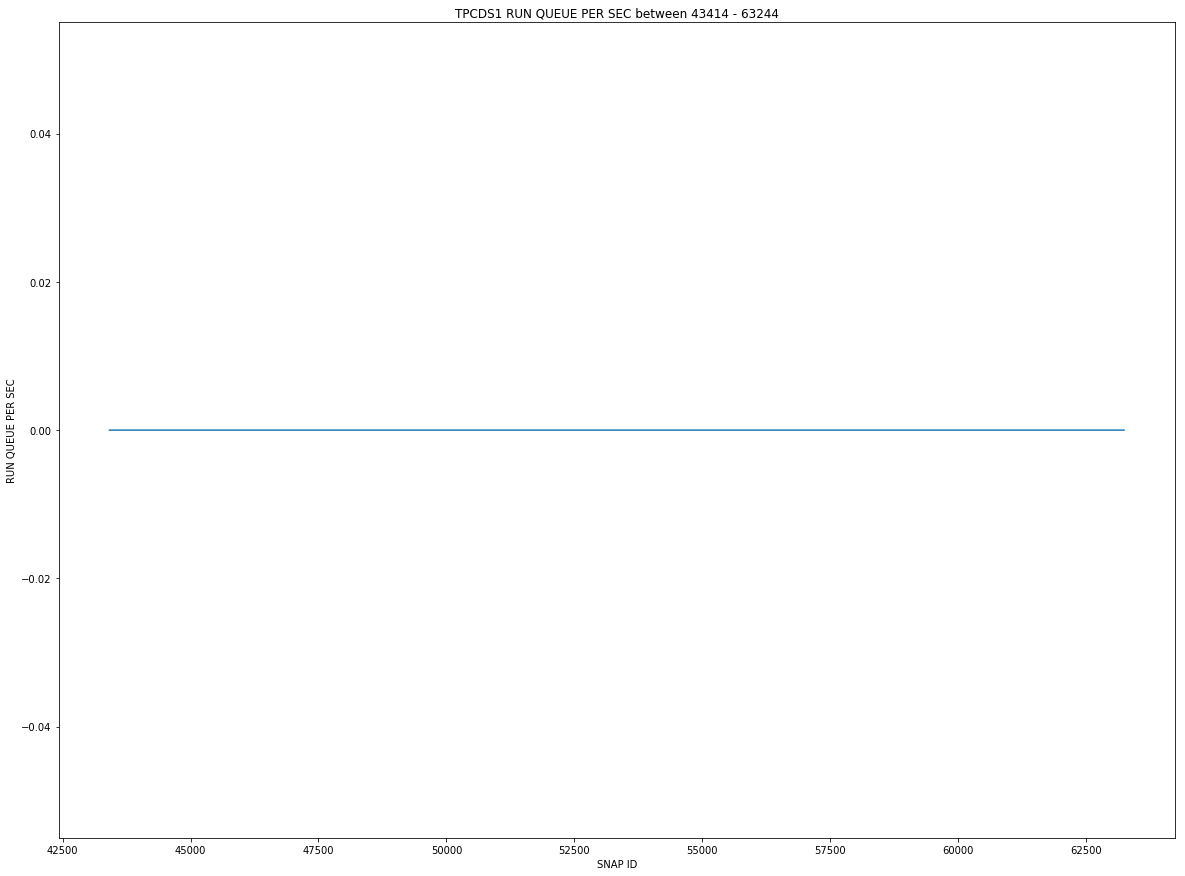

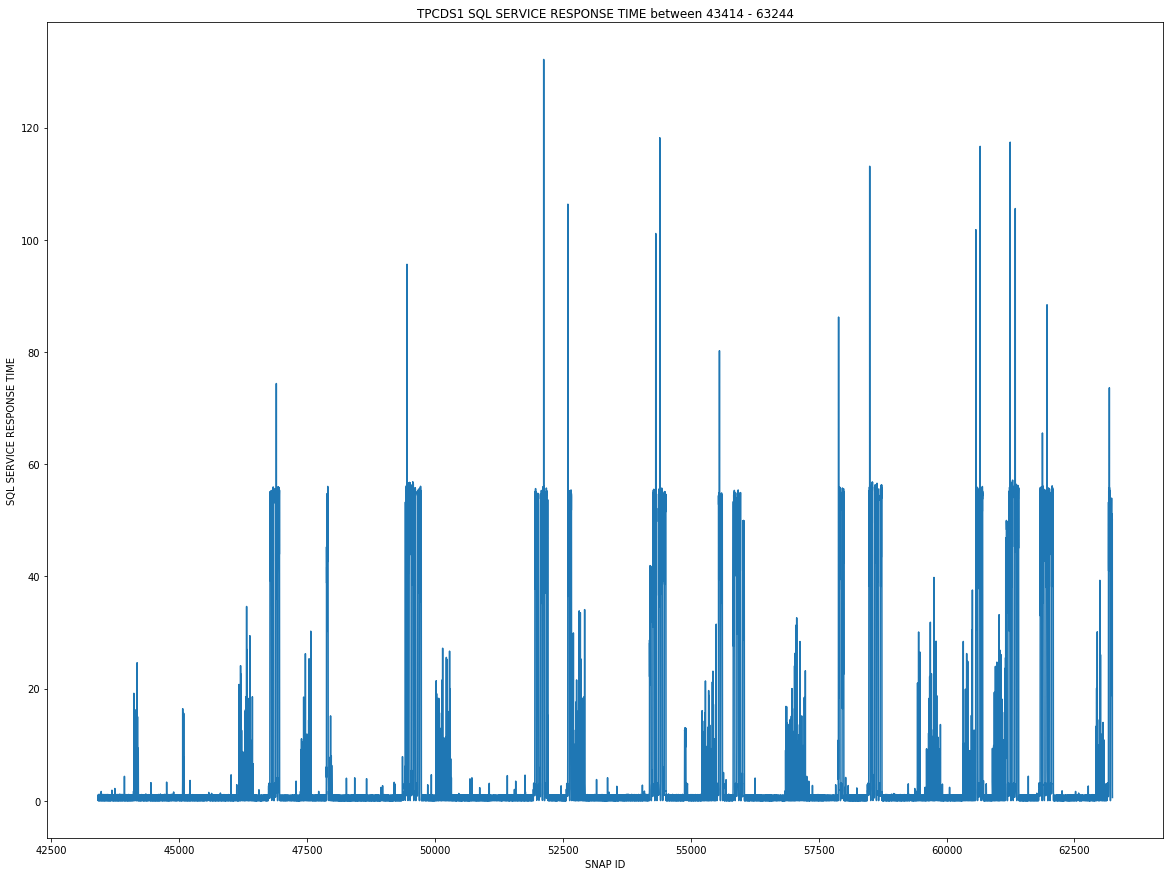

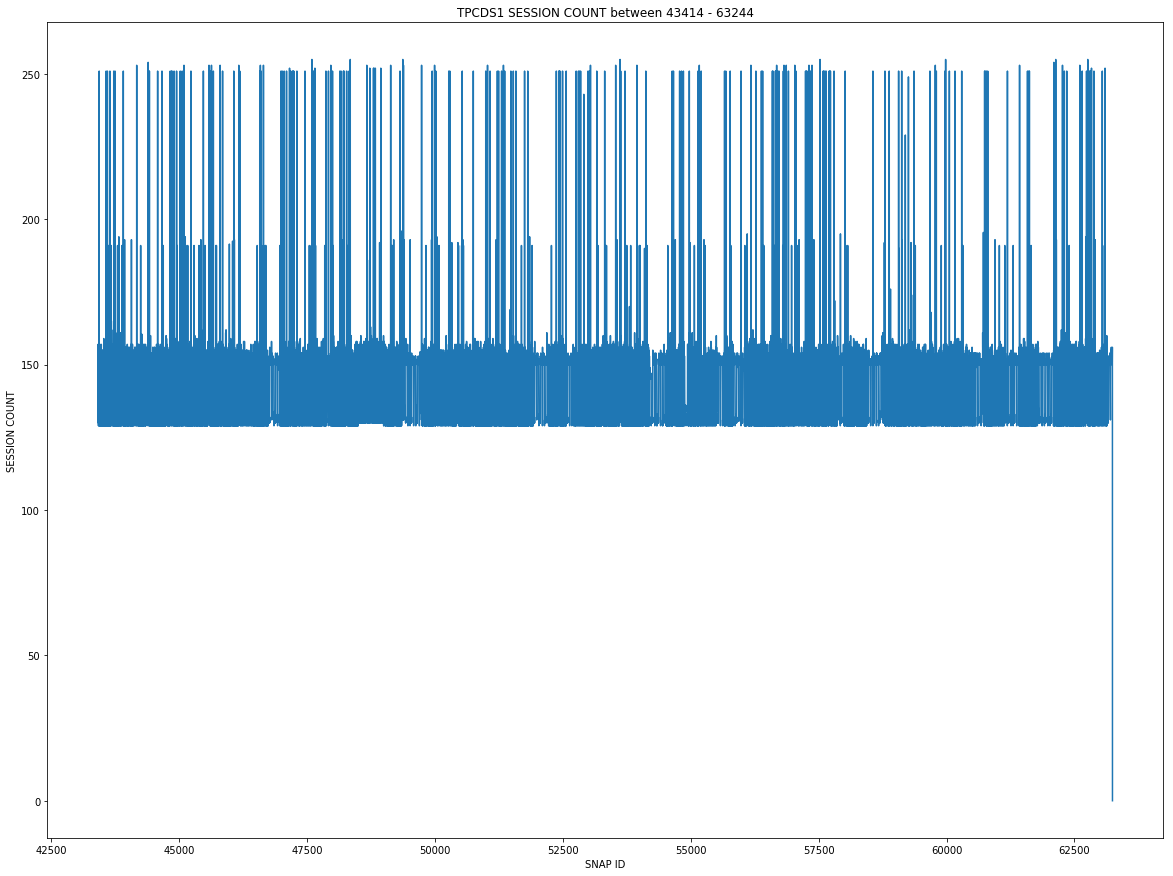

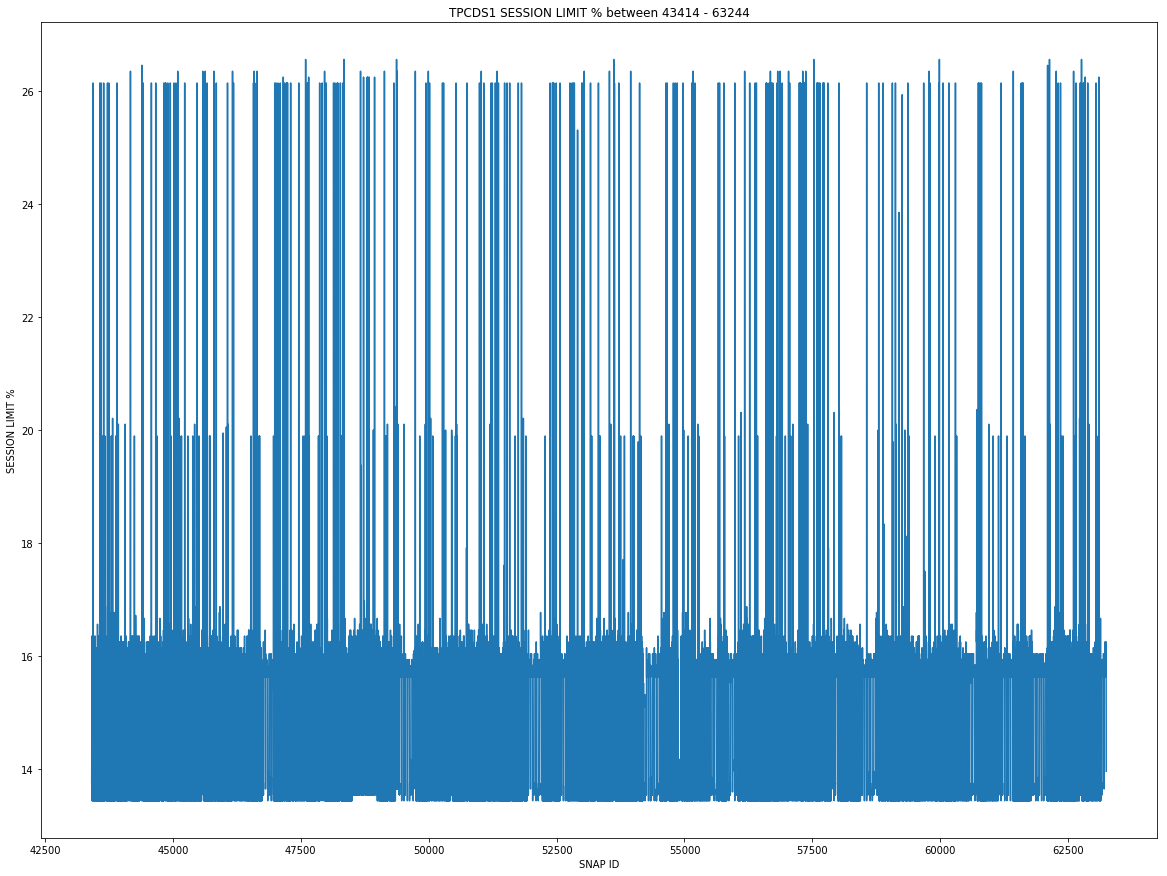

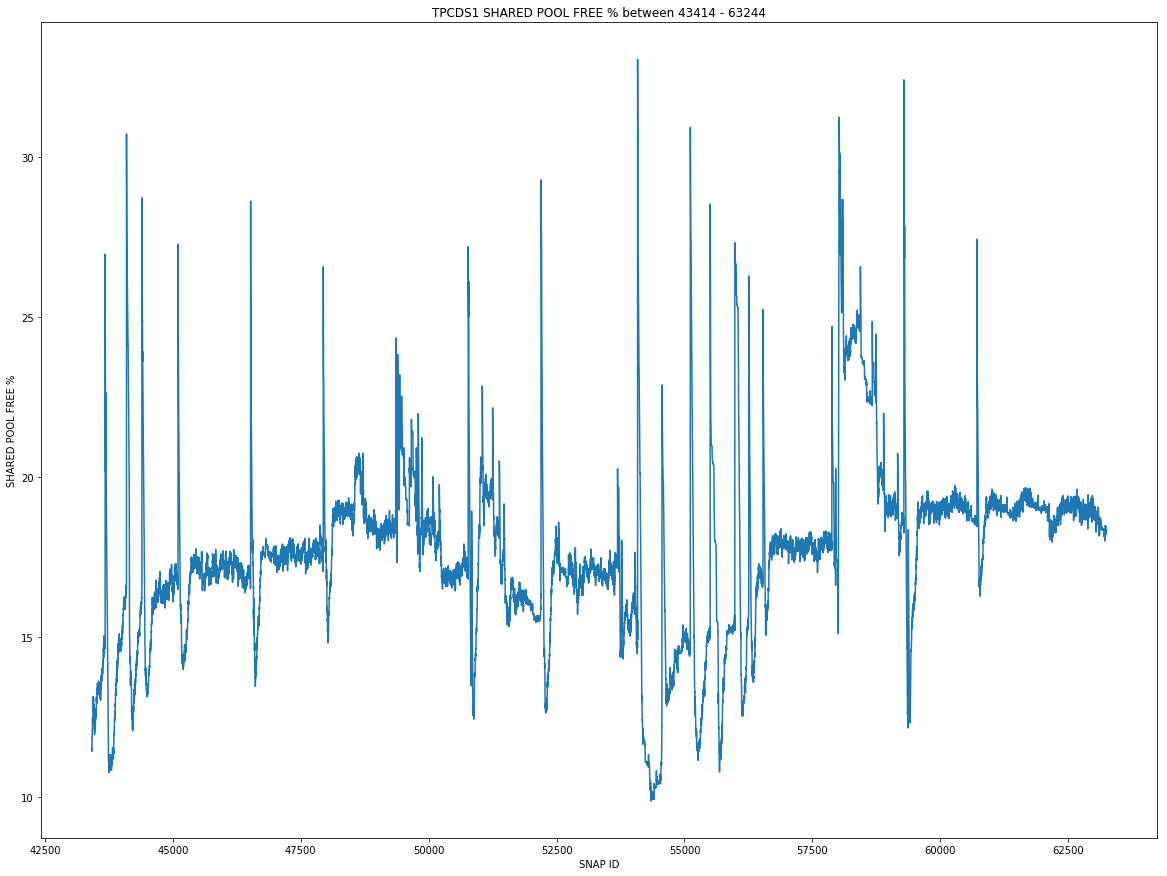

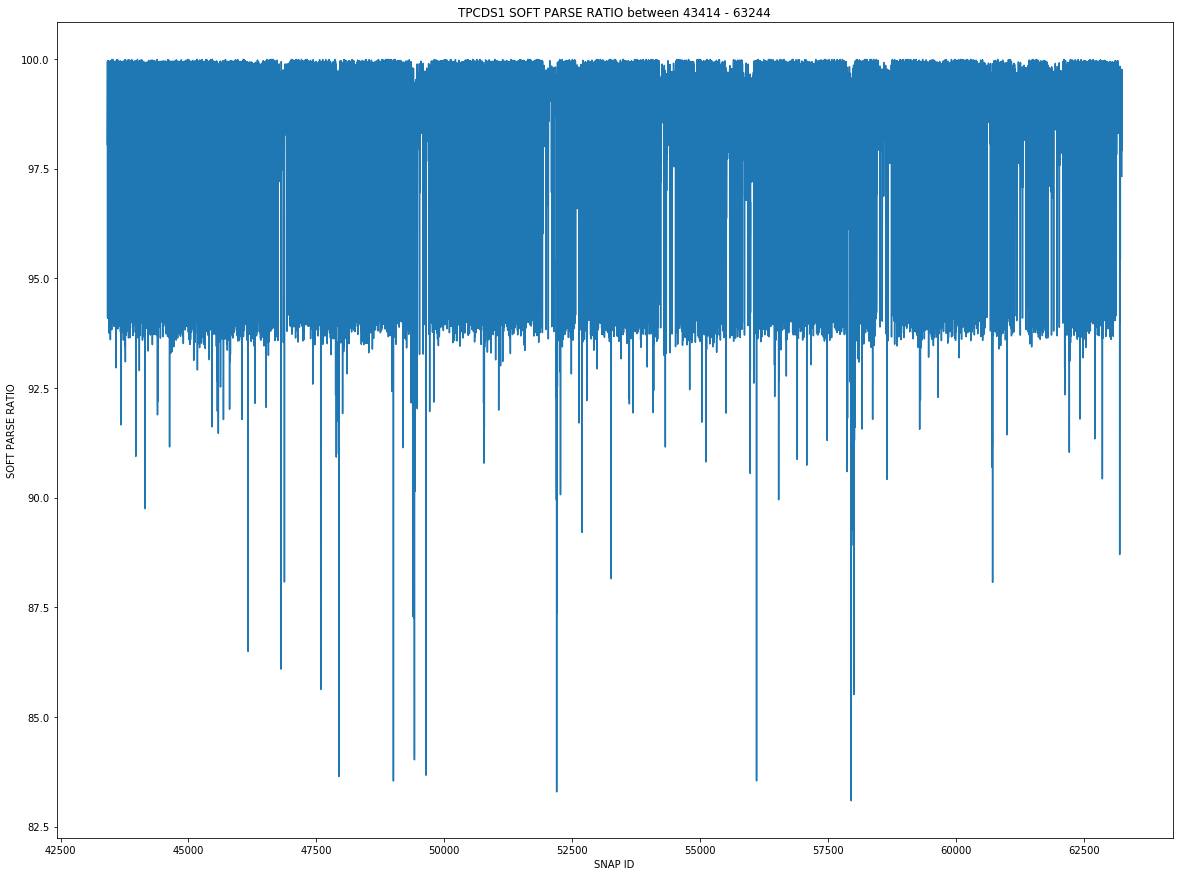

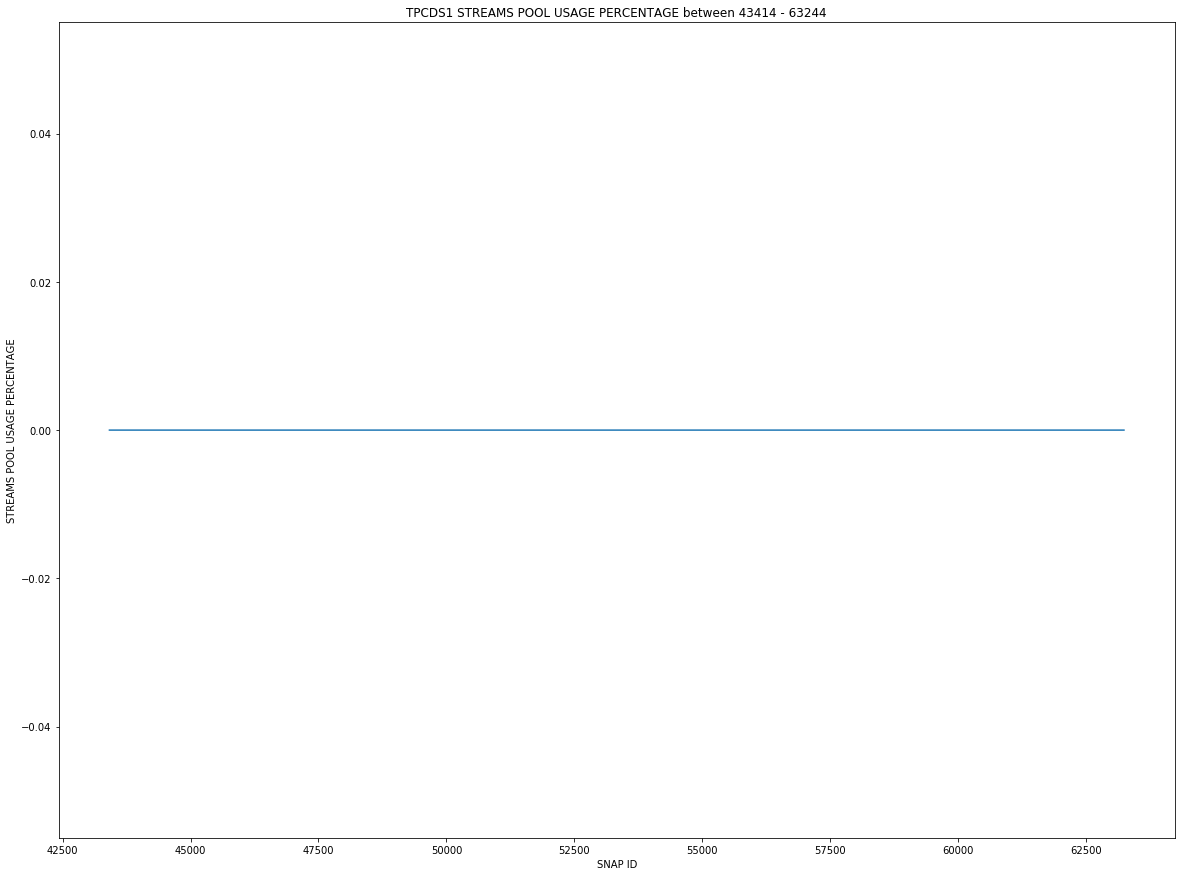

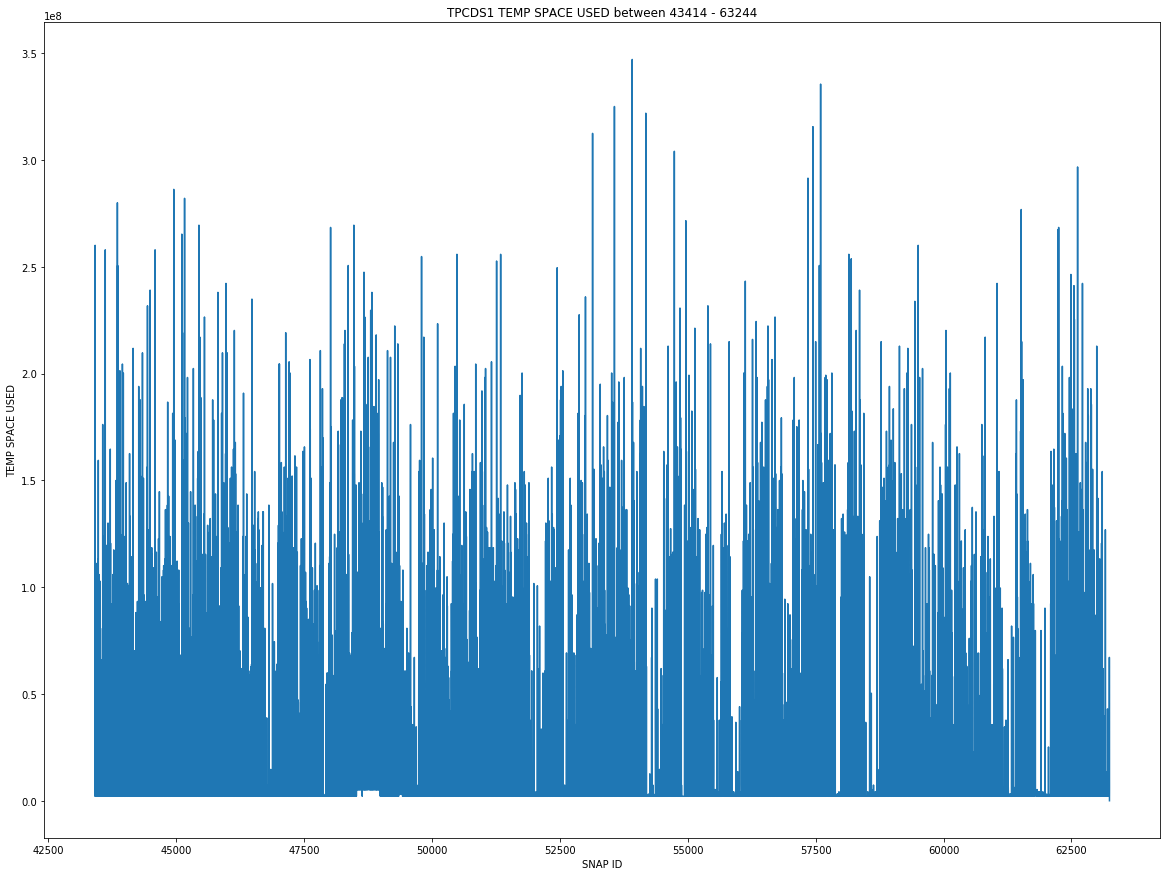

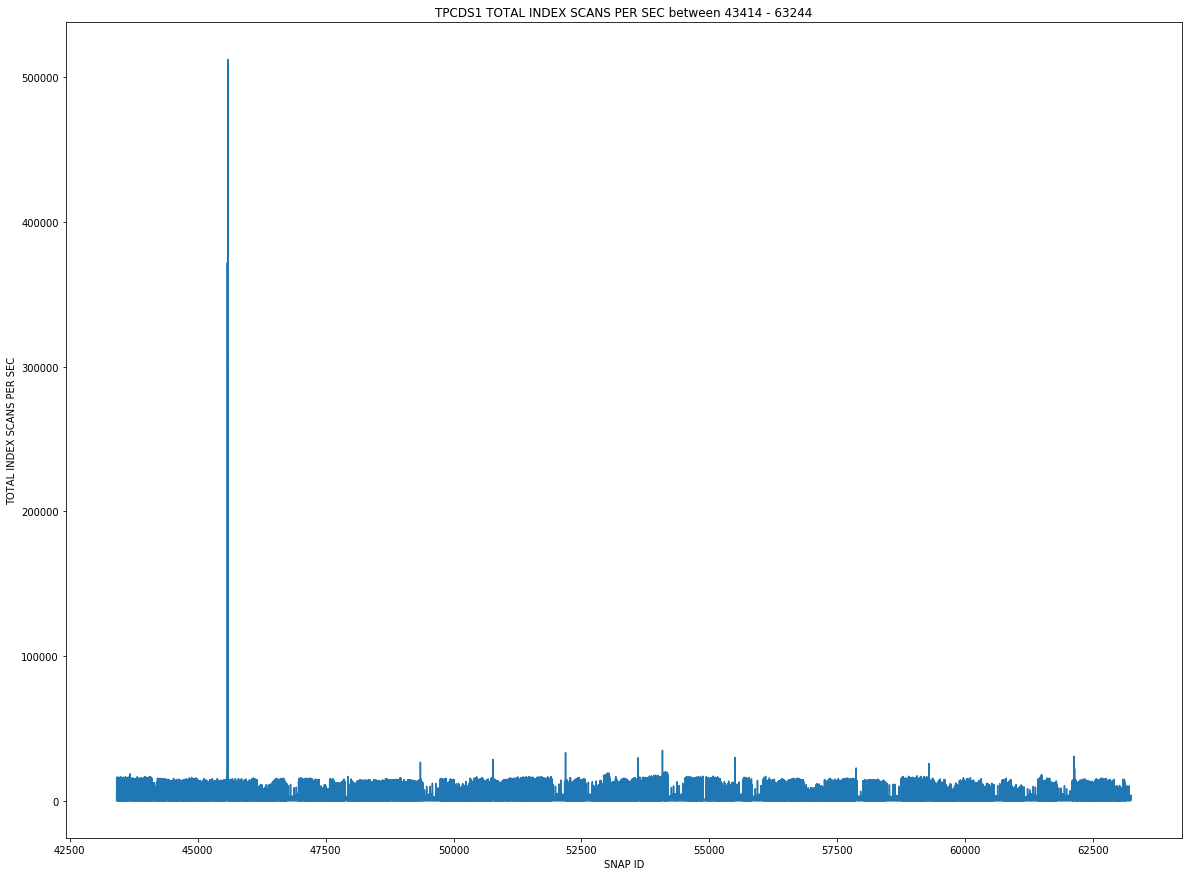

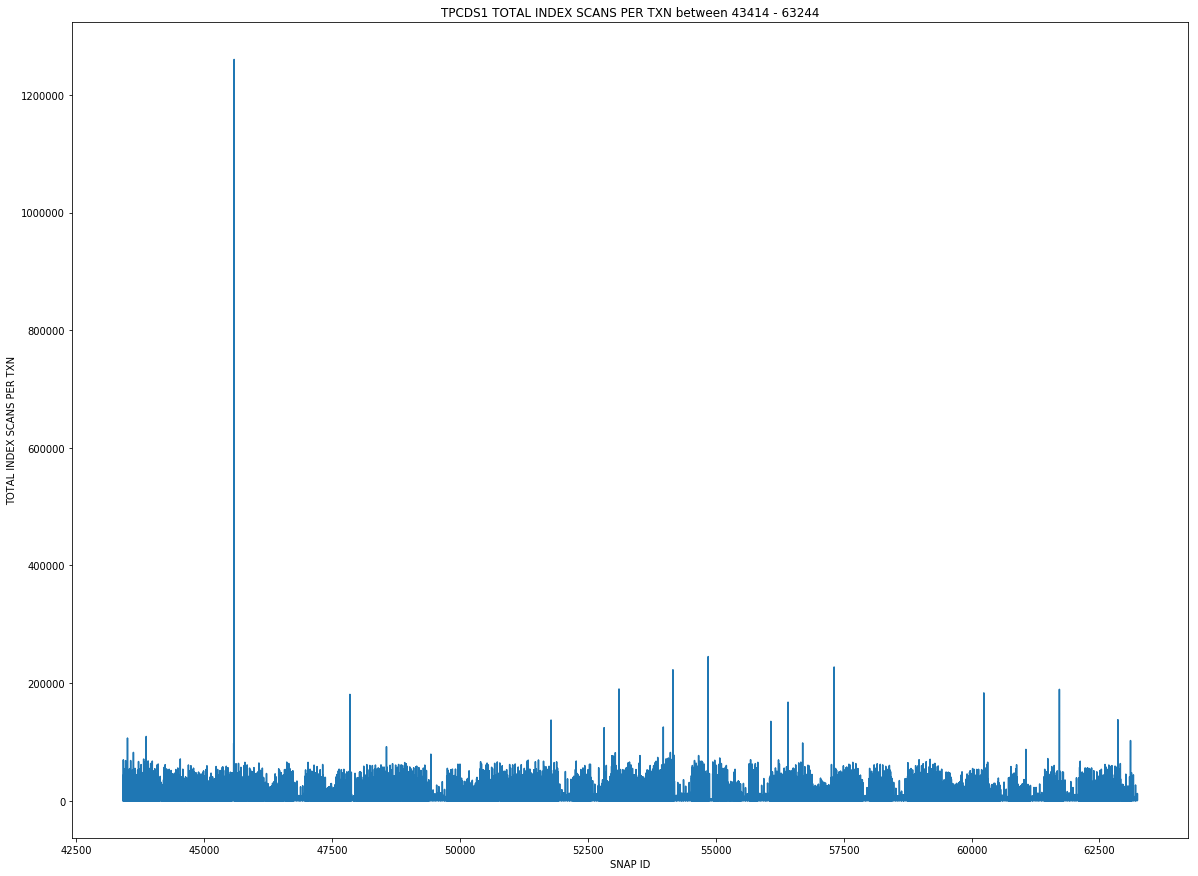

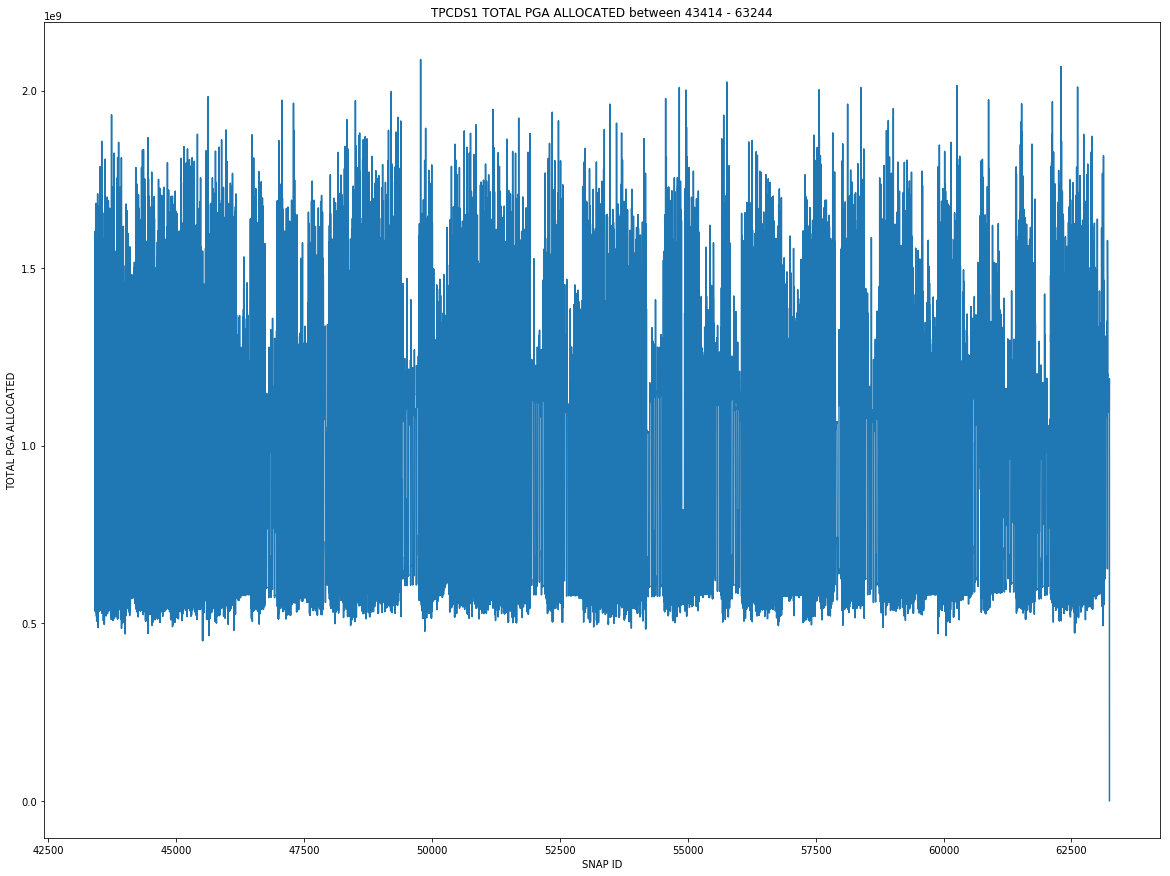

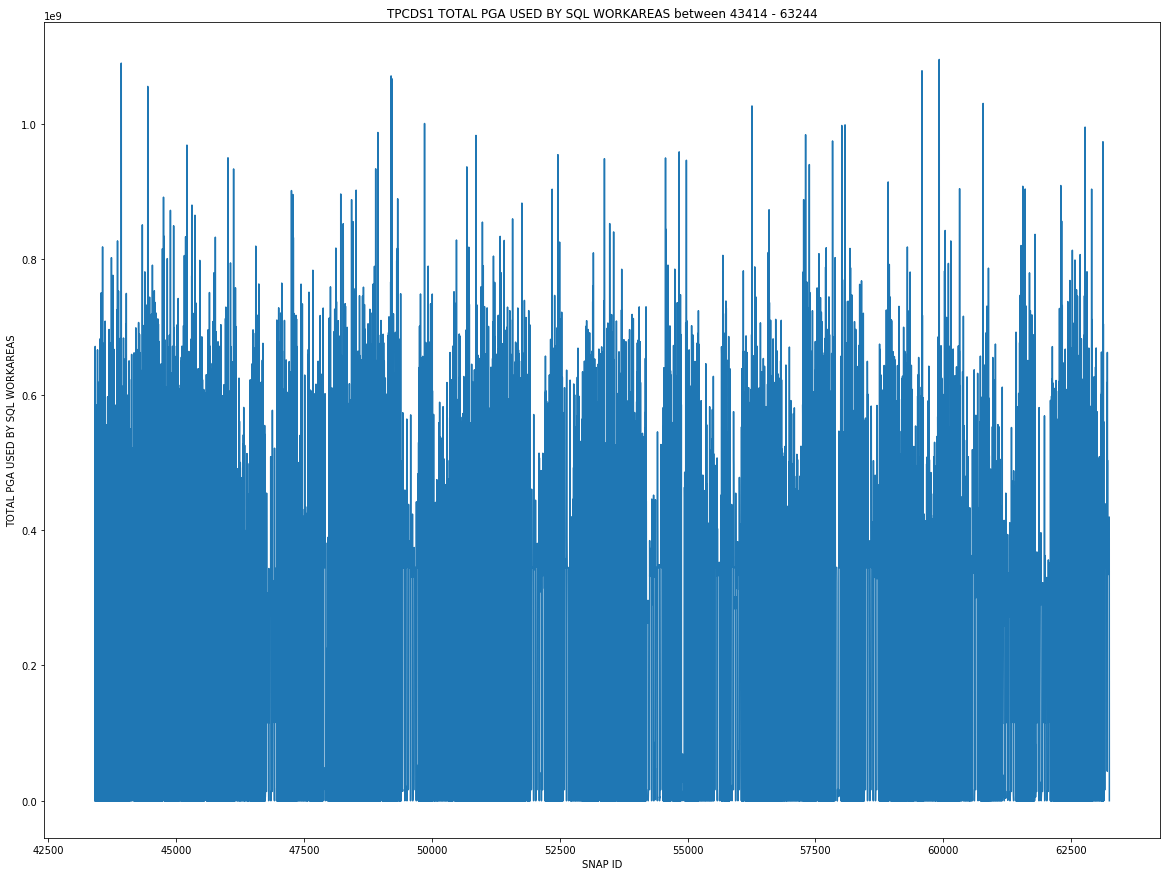

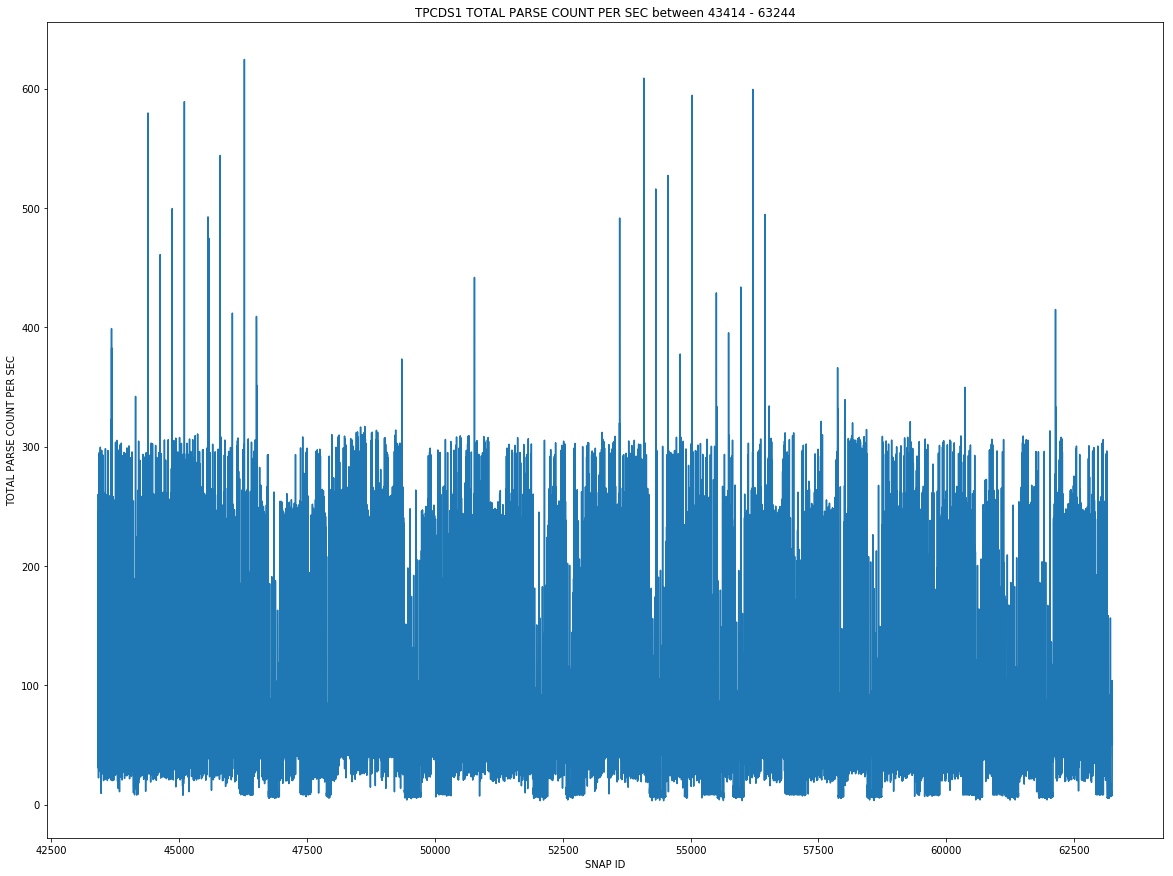

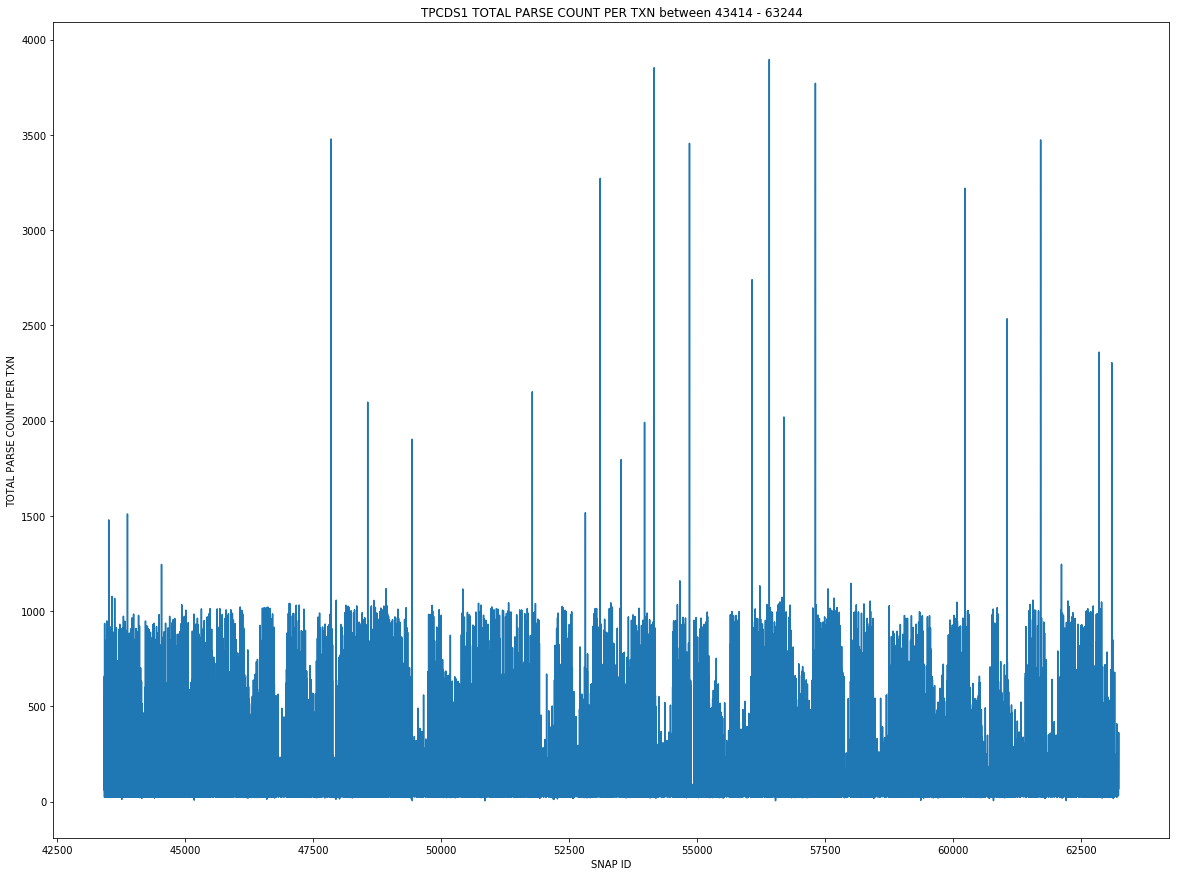

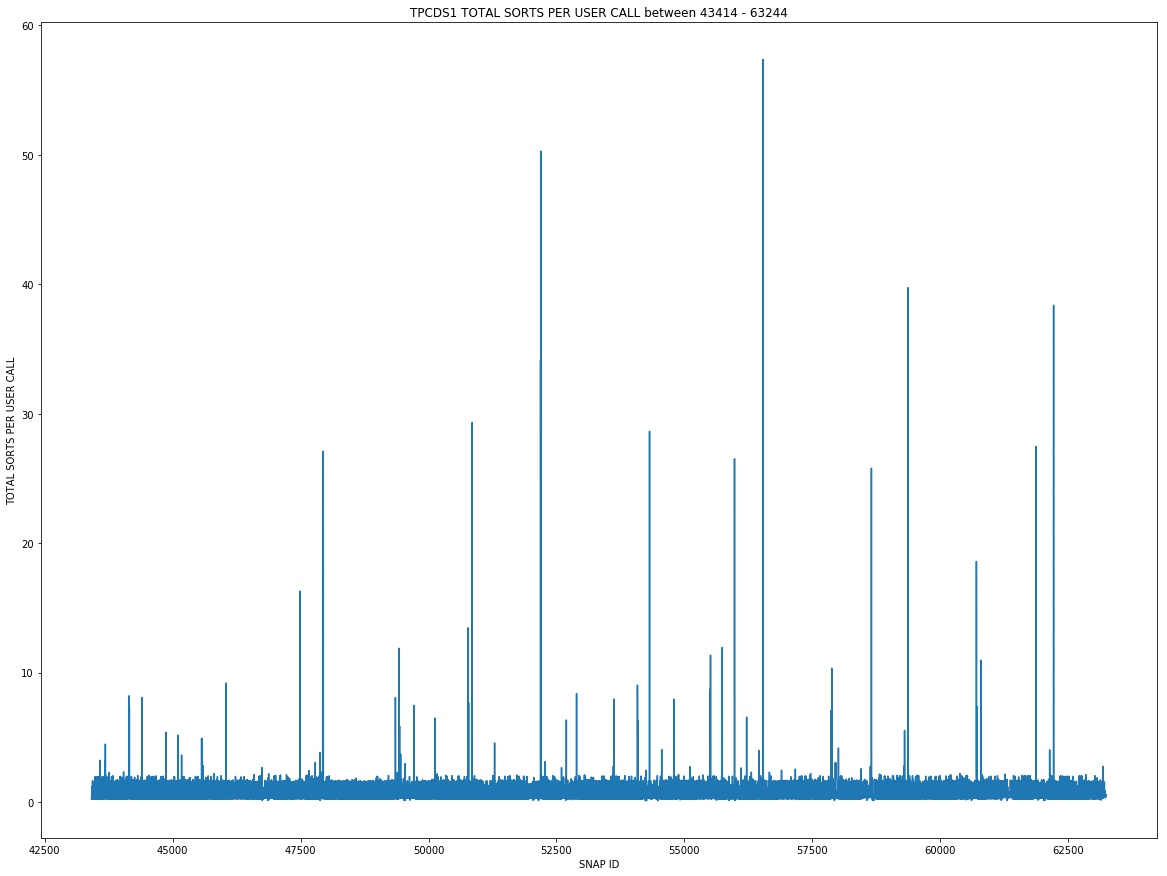

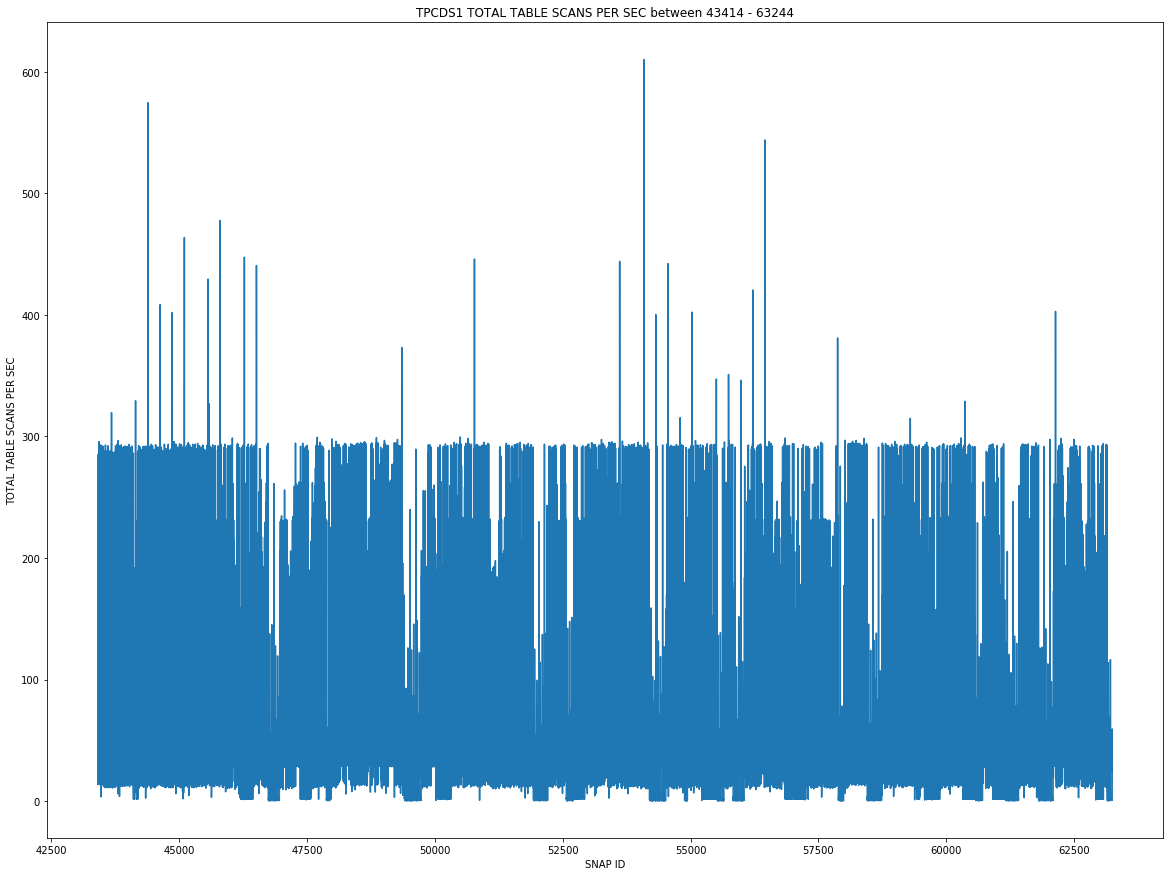

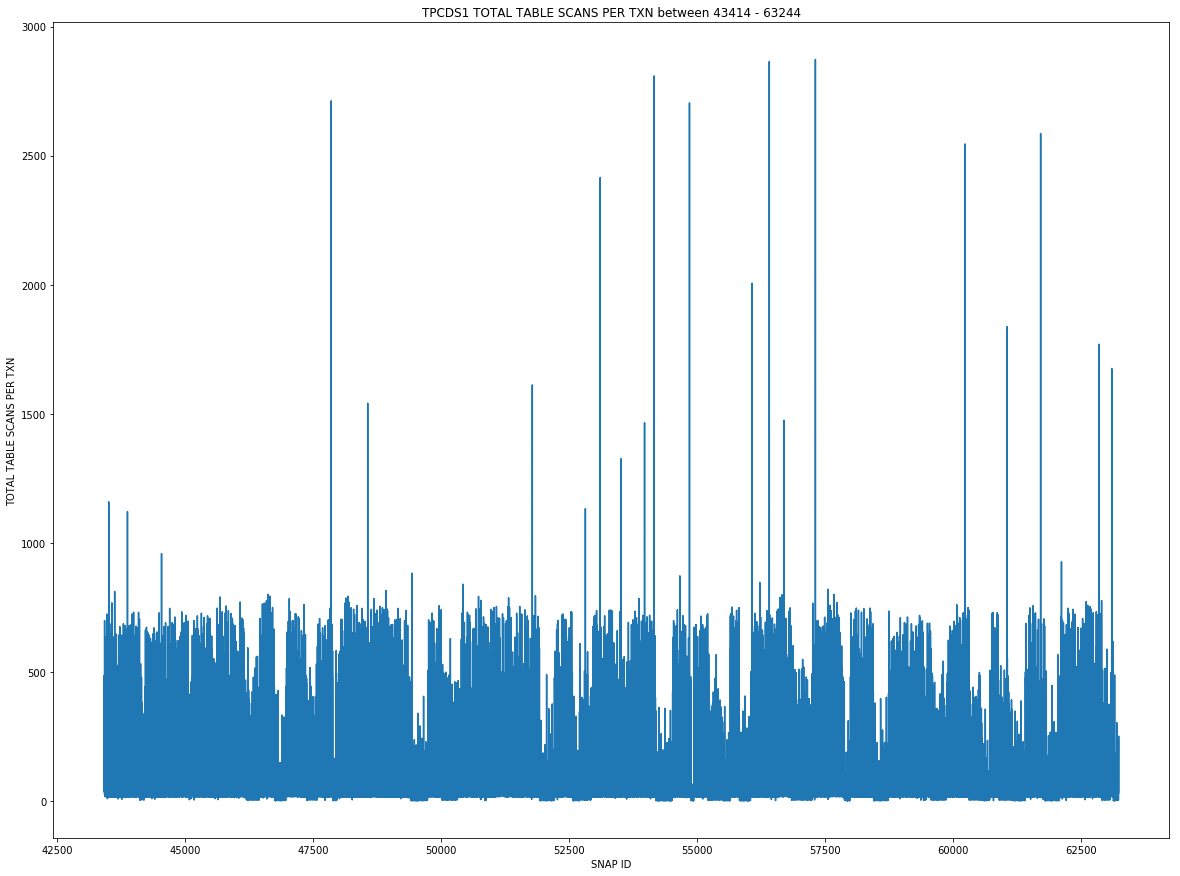

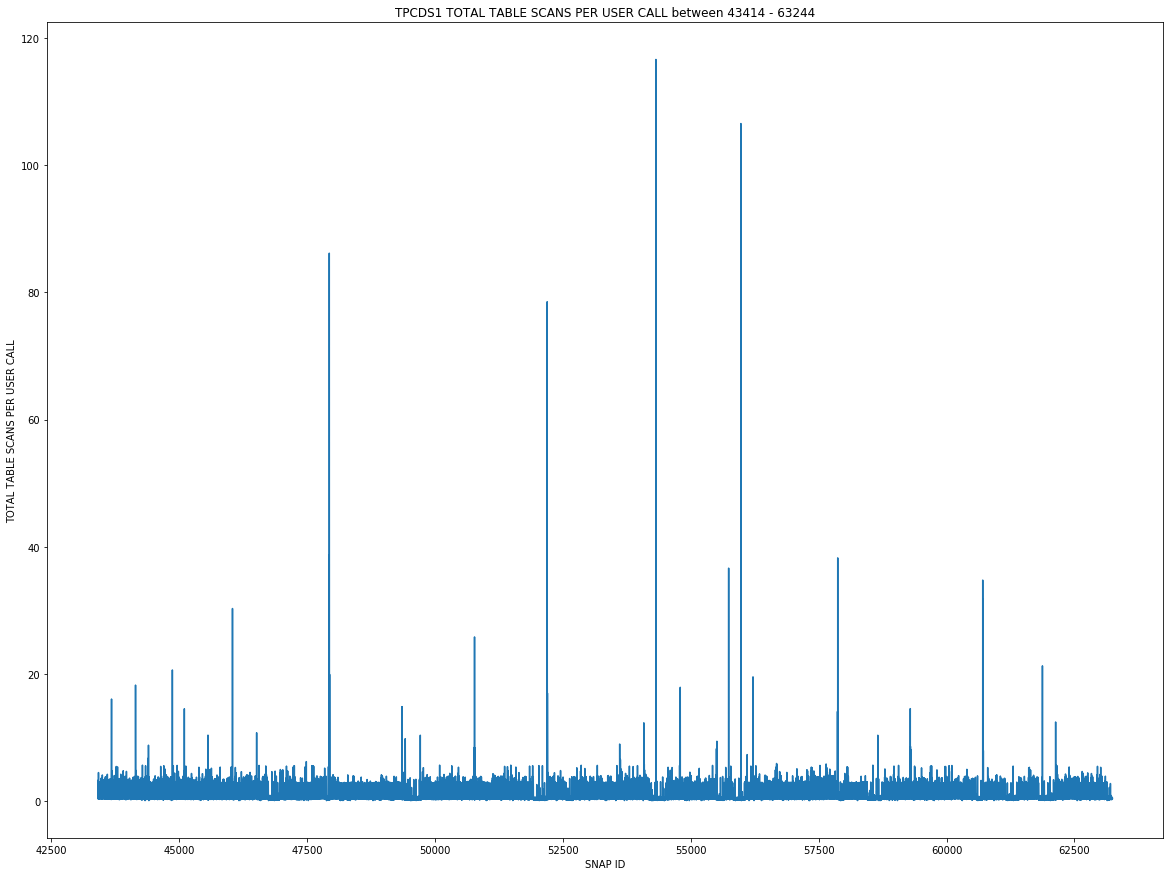

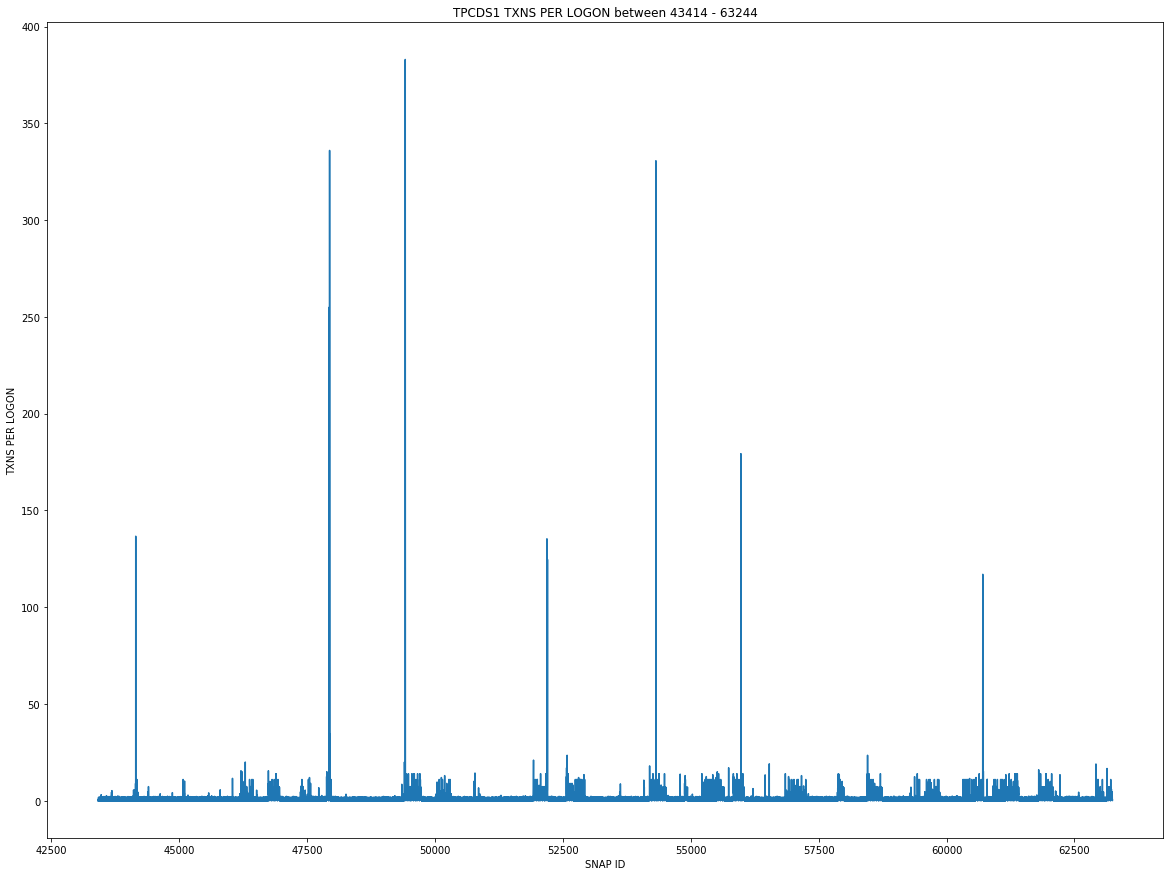

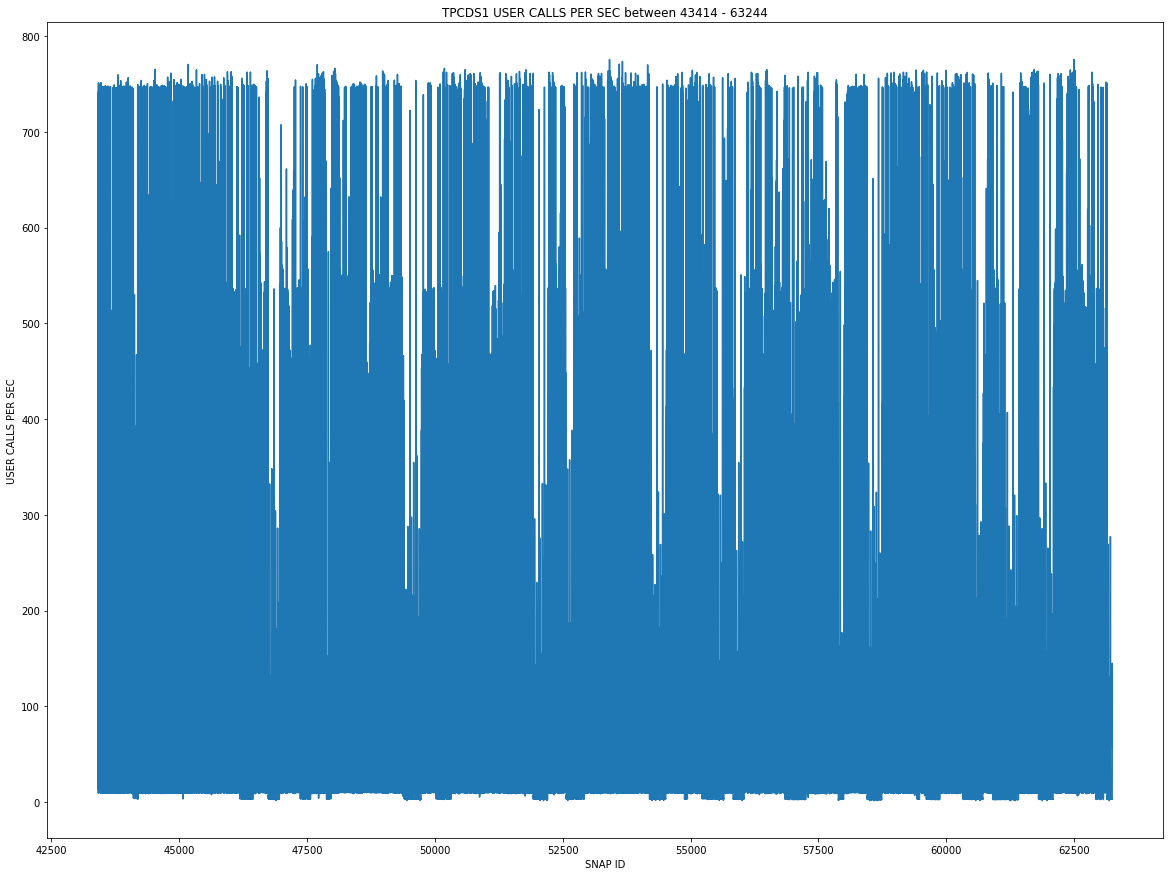

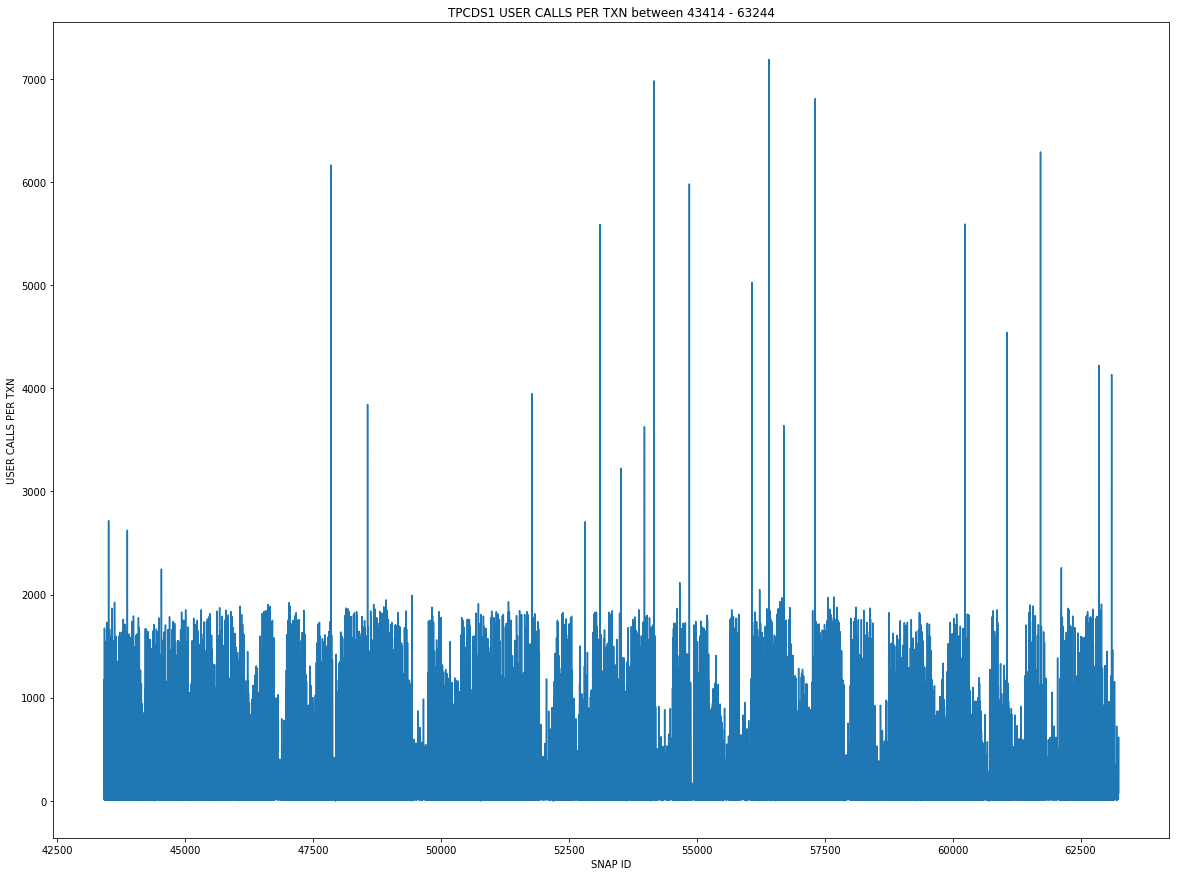

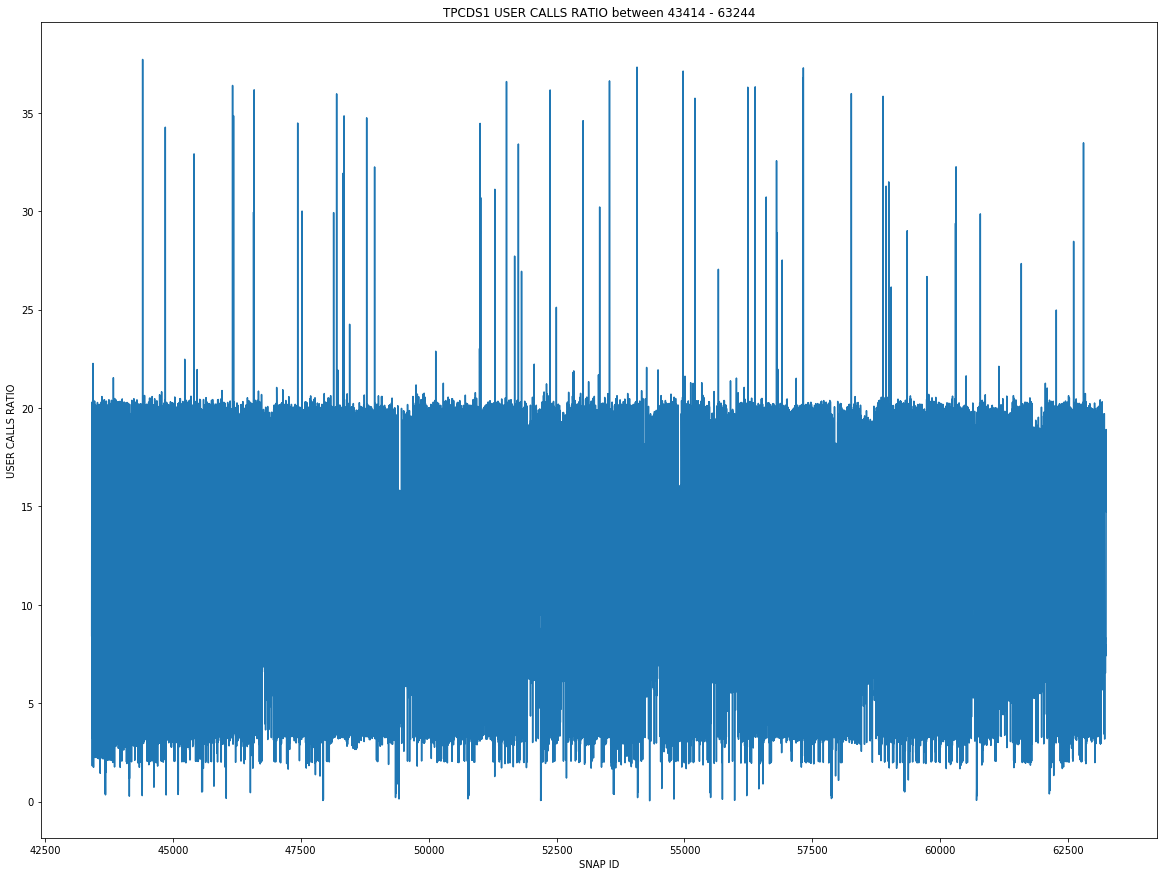

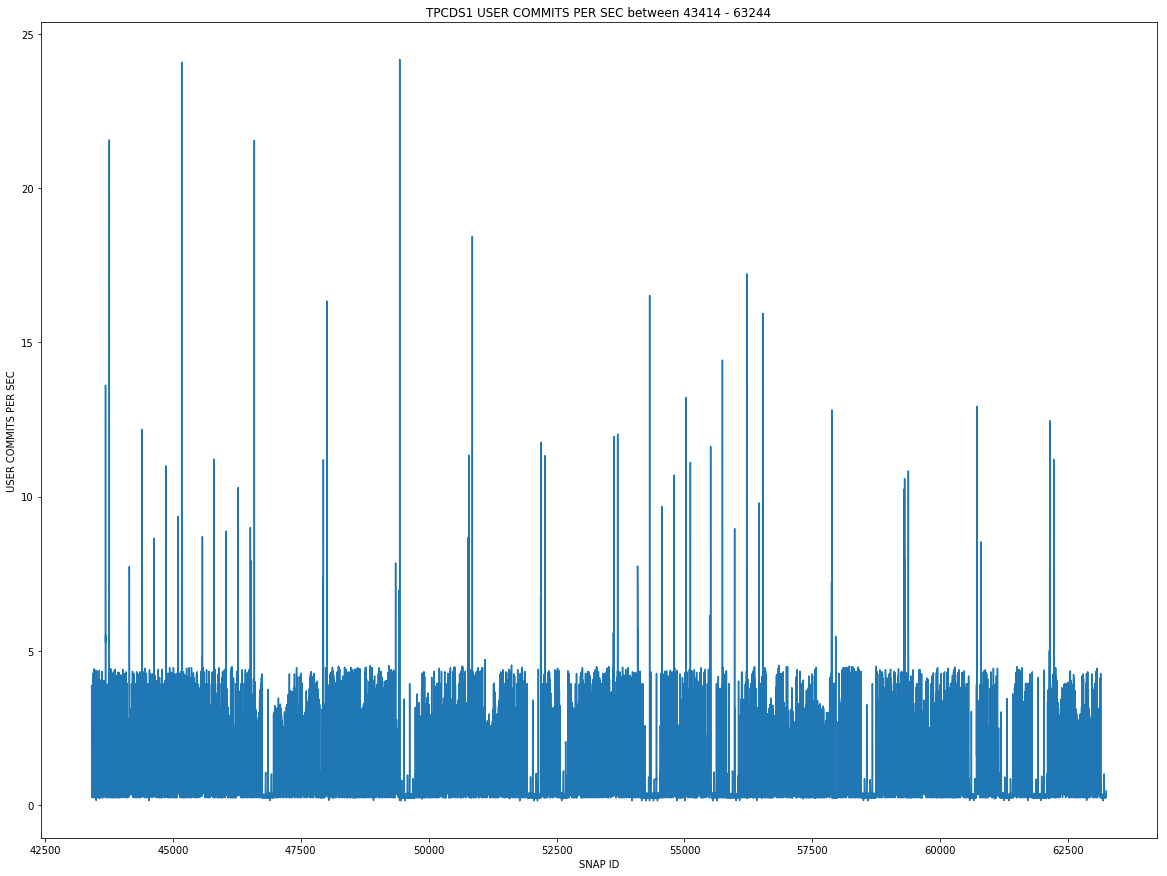

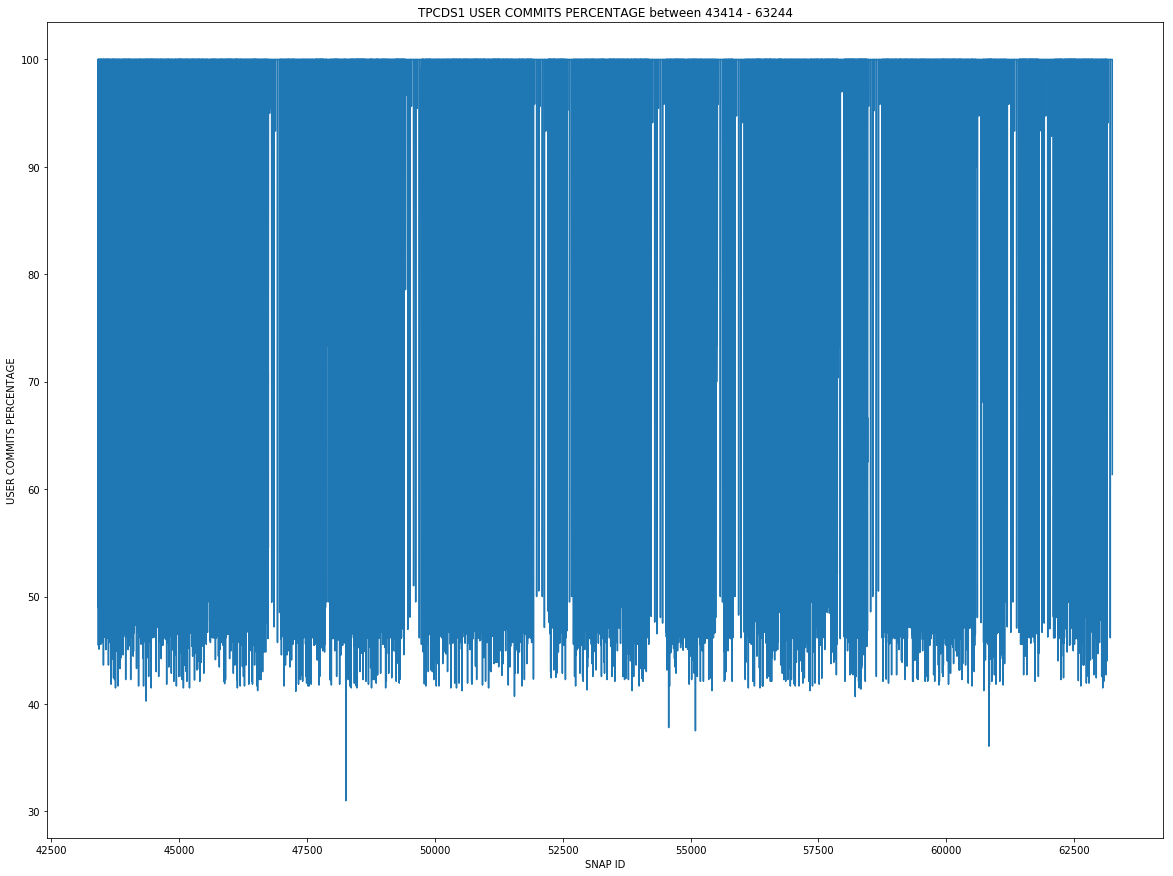

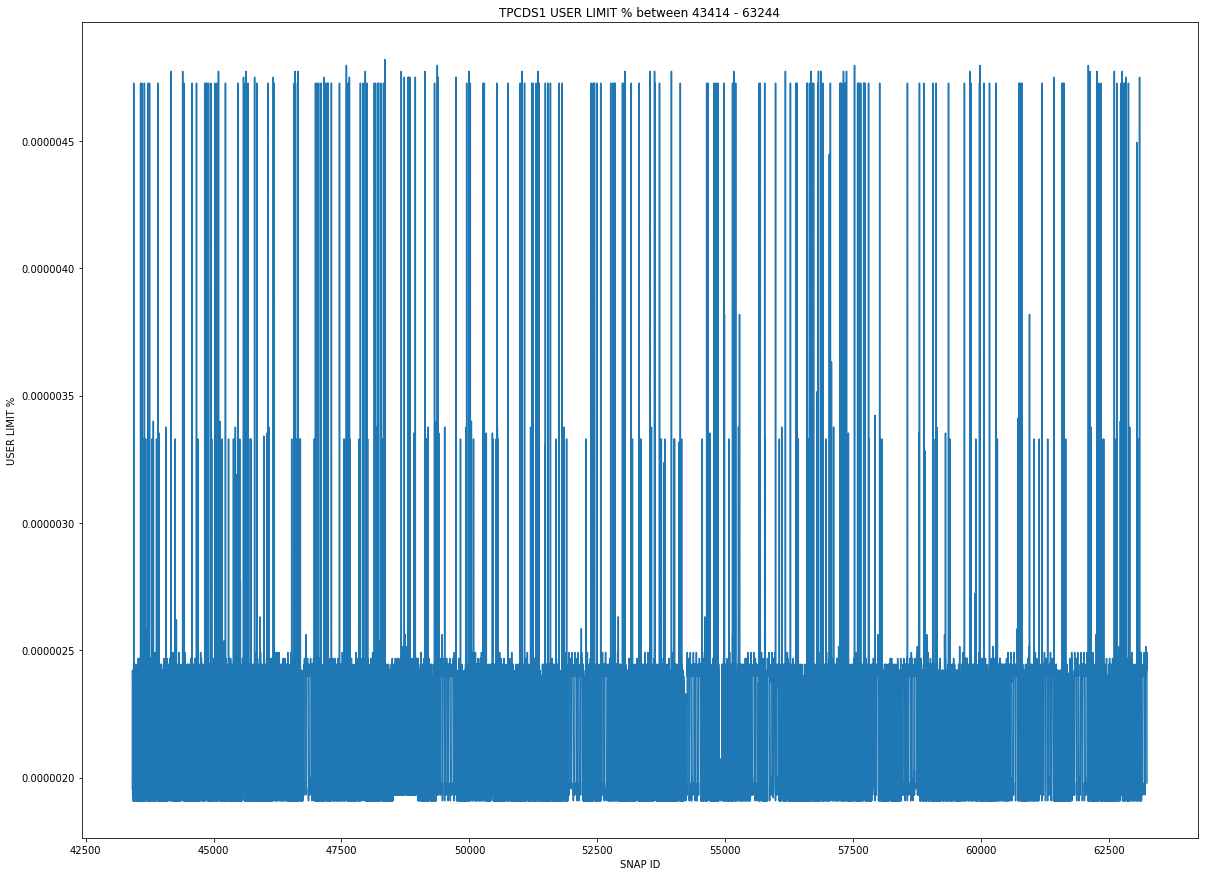

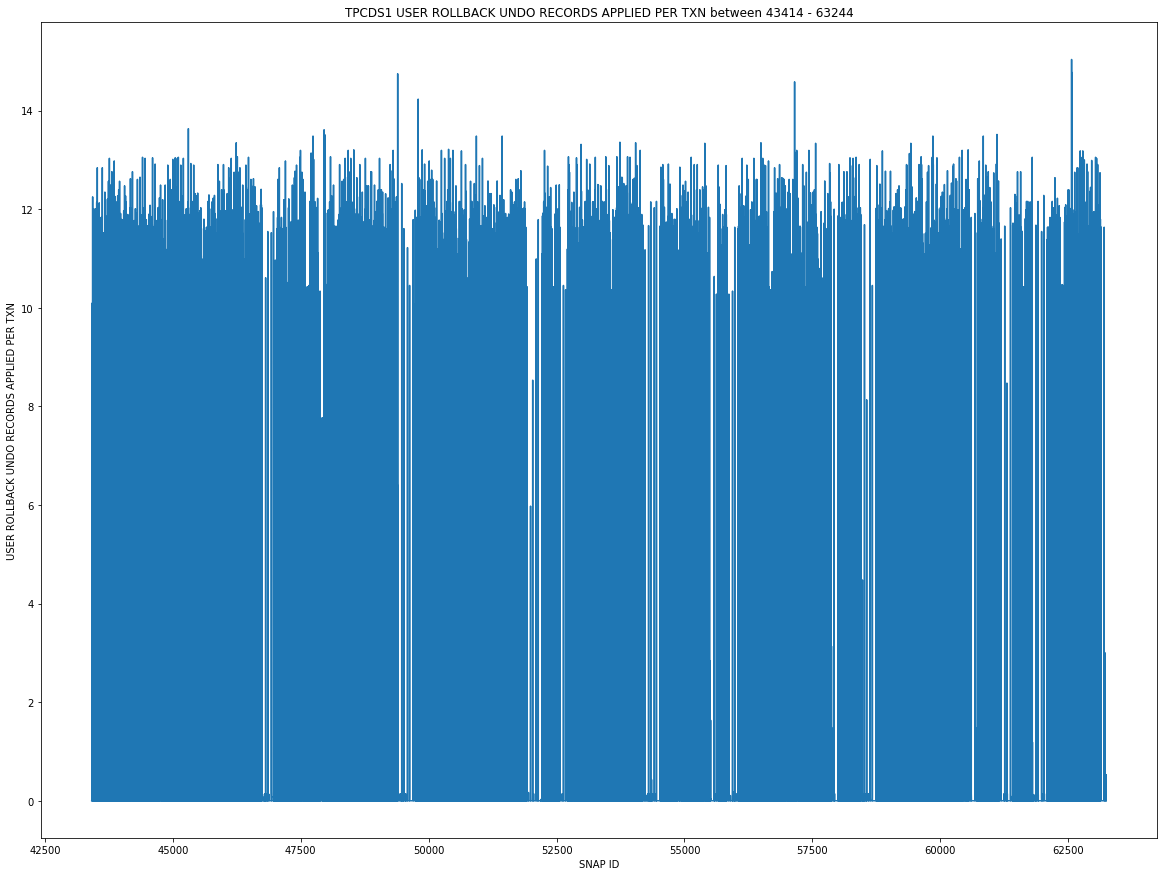

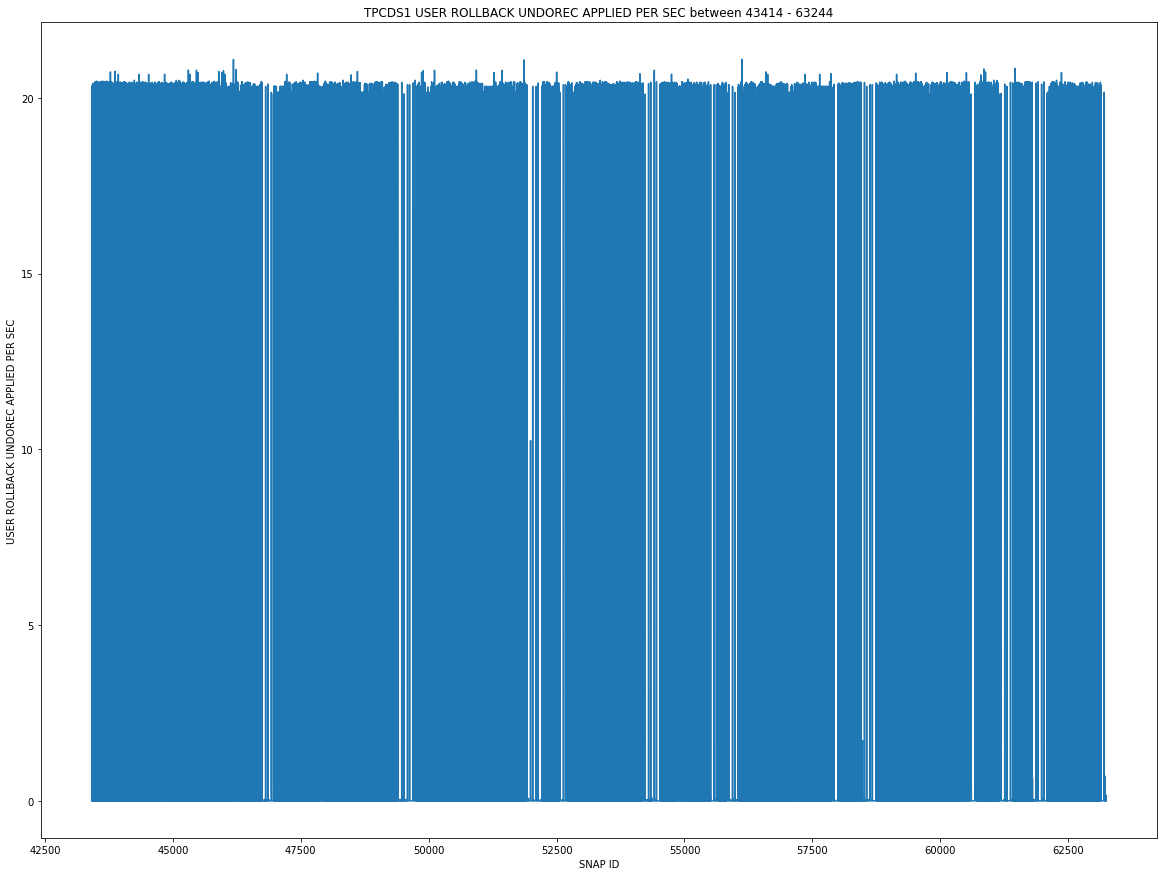

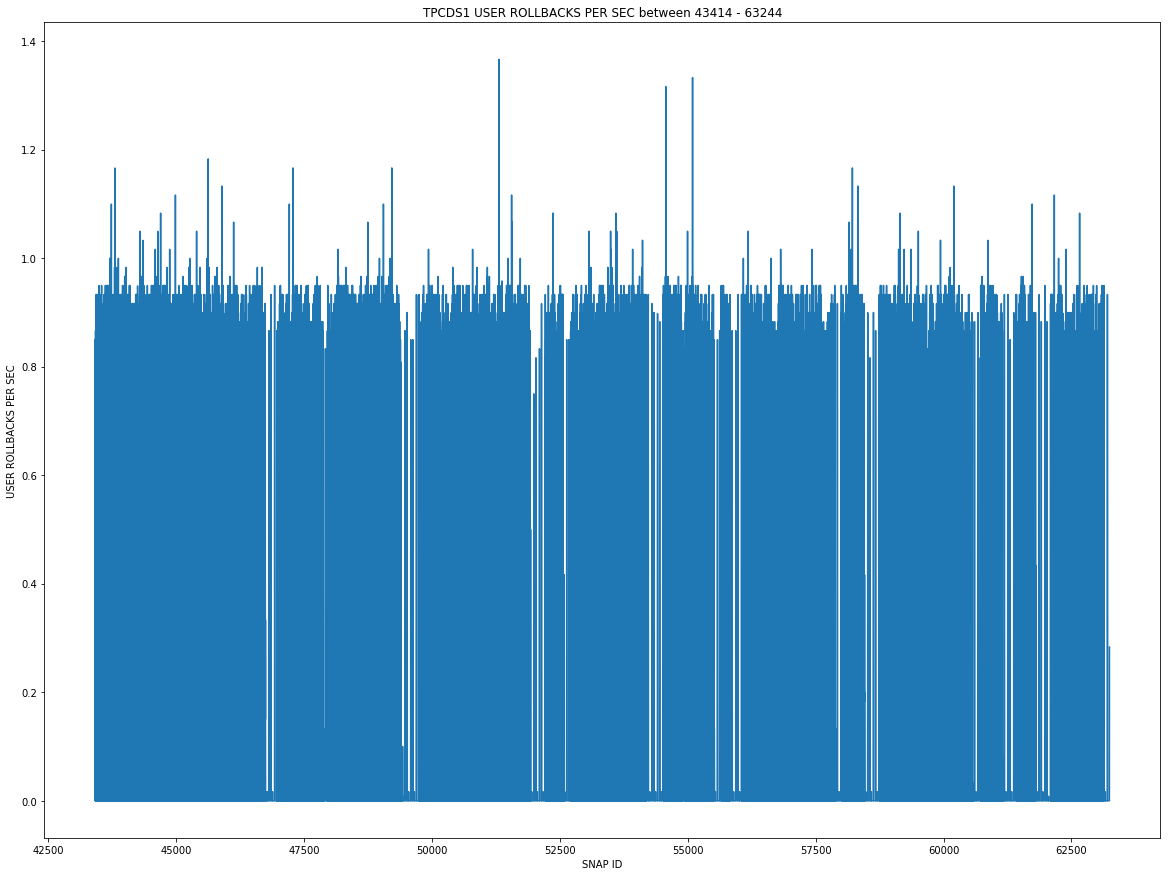

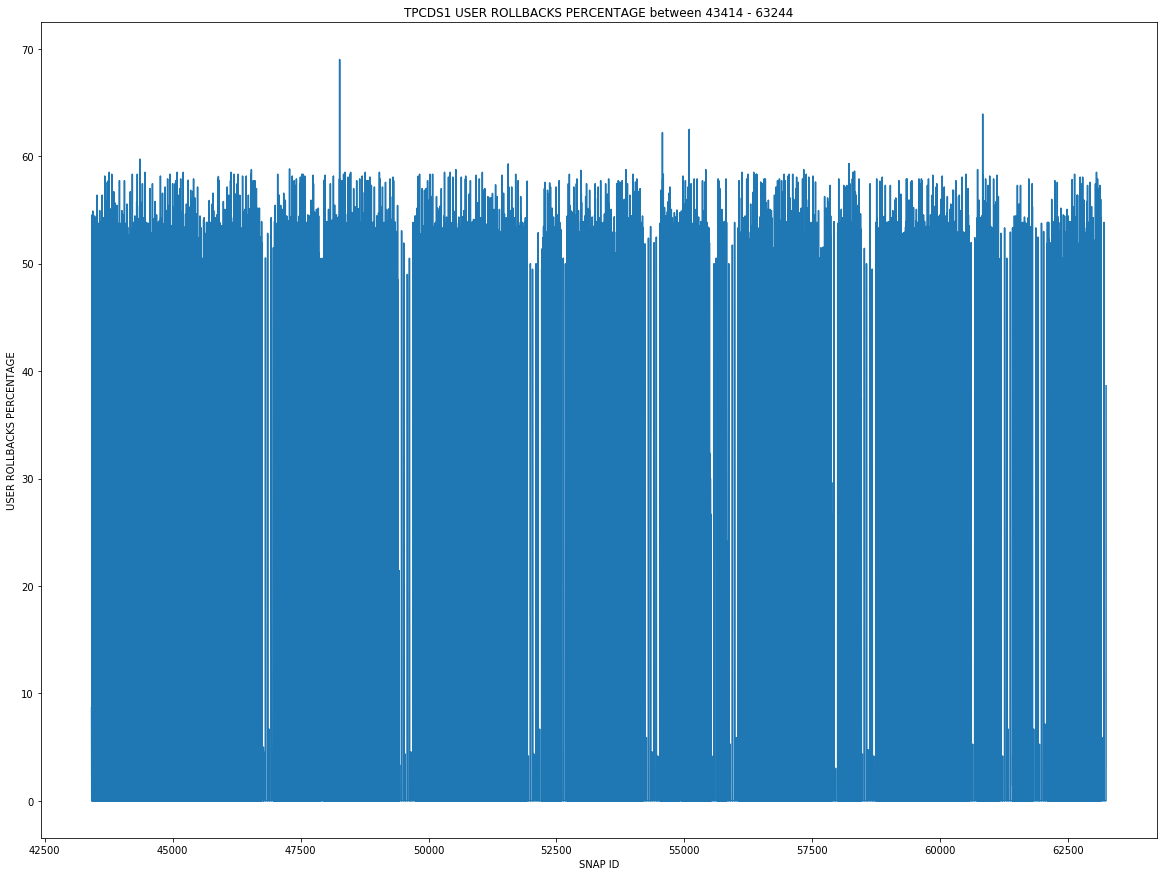

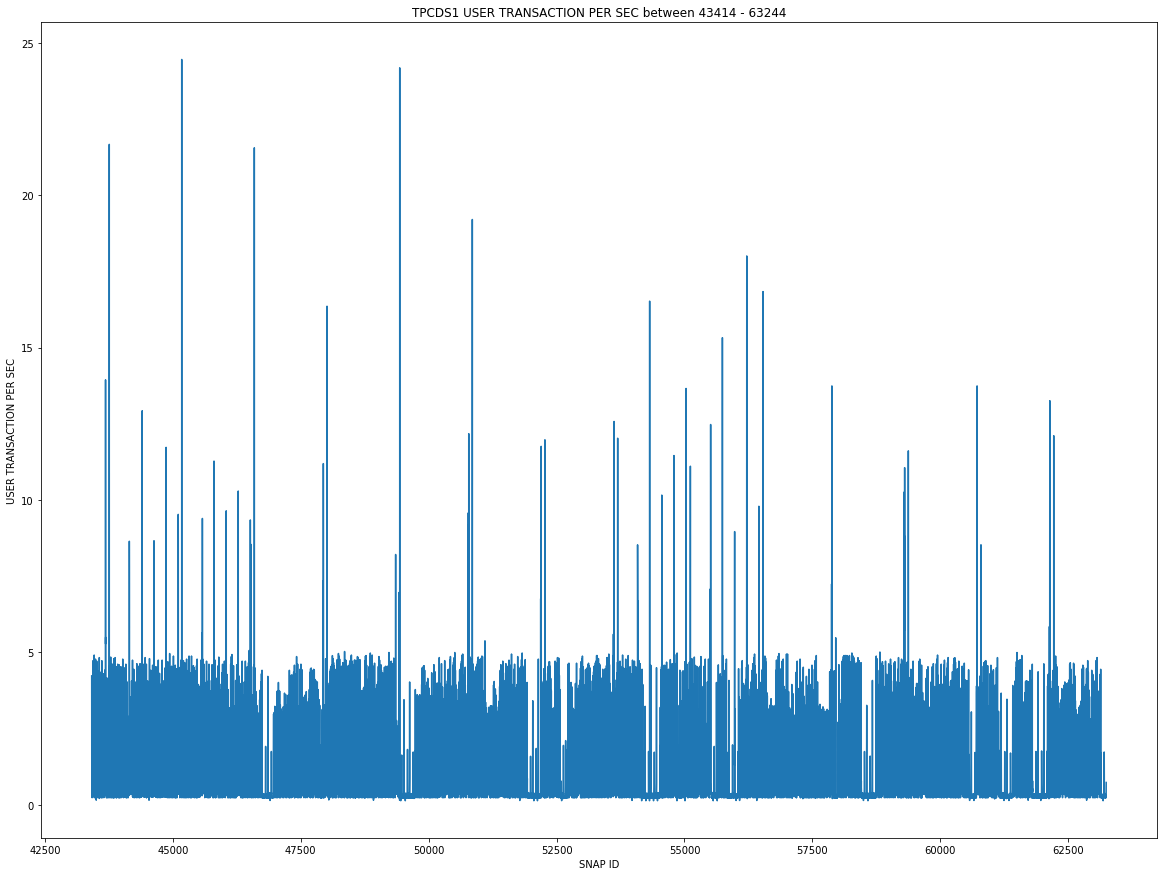

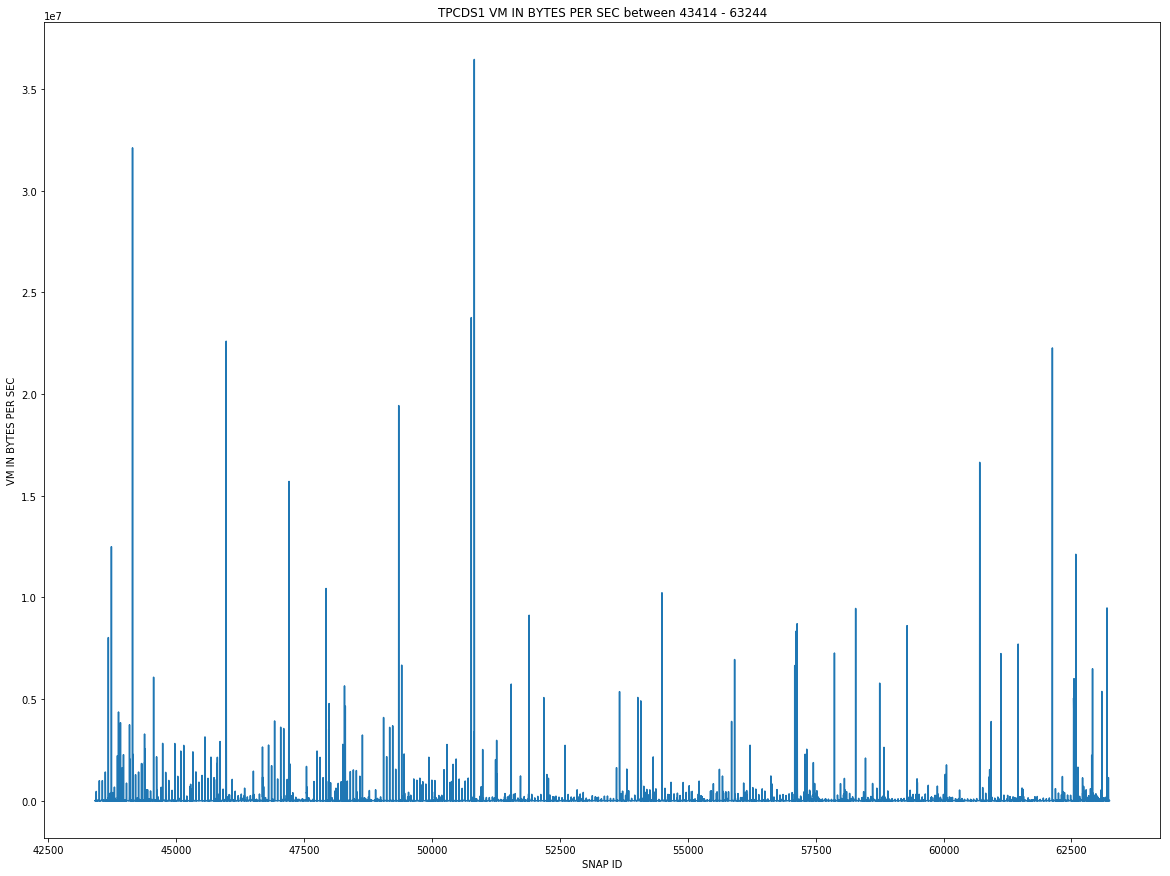

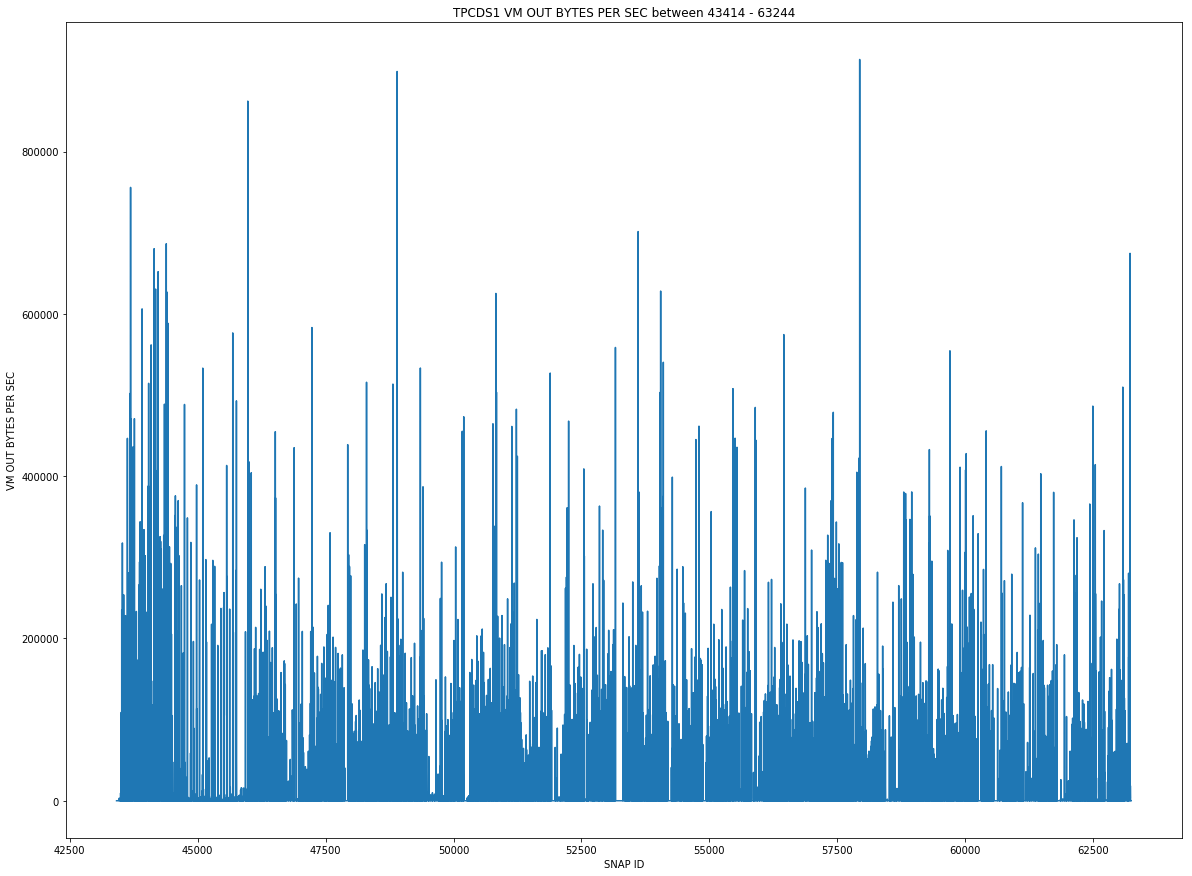

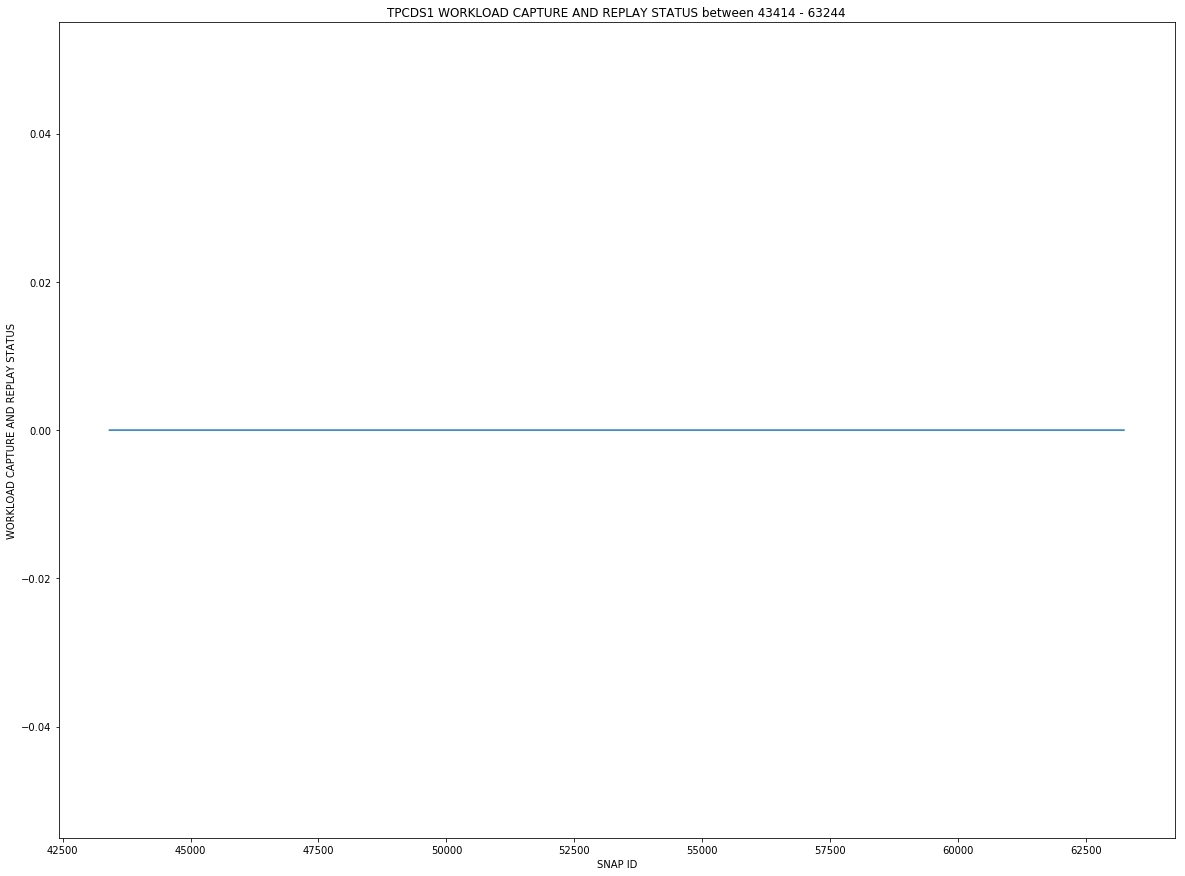

In [14]:
ssv = SnapShotVisualization(table='rep_hist_sysmetric_summary', 
                            tpc_type=tpcds, 
                            df=rep_hist_sysmetric_summary_df)
# Invocation
for header in rep_hist_sysmetric_summary_df.columns:
    ssv.plot_snapshot_distribution(column=header)